# Q1

In [111]:
import numpy as np
import math
import pandas as pd
import datetime
from datetime import datetime, date
from copy import deepcopy
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
from scipy.stats import norm
import cvxpy as cvx
import seaborn as sns
%matplotlib inline
import pypfopt
from pypfopt import risk_models
from pypfopt import plotting
from pypfopt import expected_returns
from pypfopt import EfficientFrontier

In [112]:
start_date = '2020-01-01'
end_date = '2020-10-31'

def get_data_for_multiple_stocks(tickers, start_date = start_date, end_date = end_date):
    #retrieve stock data
    #date: YYYY-MM-DD
    s = DataReader(tickers[0], 'yahoo', start_date, end_date)[["Adj Close"]]
    #get log returns
    s[tickers[0]] = s['Adj Close']

    stocks = s[[tickers[0]]]

    for ticker in tickers[1:]:
        s = DataReader(ticker, 'yahoo', start_date, end_date)
        s[ticker] = s['Adj Close']
        stocks[ticker] = s[ticker]
        
    return stocks.iloc[1:].fillna(0)

In [113]:
#calculation of Best and Worst Fund value between Jan 2020 and Oct 2020
#top 30 holdings (best_tickers and worst_tickers) obtained from midterm report
#number of shares for each stock (best_holdings_shares and worst_holding_shares) obtained from mid term report

#best fund: ROGSX
best_tickers = ["GOOGL", "GOOG", "FB", "IAC", "AMZN", "EBAY", "CSCO", "JNPR", "QCOM", "ACN", 
                "AKAM", "GPN", "IBM", "V", "INTC", "KLAC", "NXPI", "SWKS", "XLNX", "CHKP", "CTXS", "MSFT", 
                "ORCL", "SNPS", "VMW", "AAPL", "HPQ", "NTAP", "STX", "WDC"] 
best_holdings_shares = [18300, 26276, 143225, 98885, 15400, 336300, 598000, 447000, 159000, 101275, 136200, 128157, 
                        80900, 60000, 557800, 215400, 133550, 113970, 197800, 169700, 129280, 280200, 439641, 
                        159000, 140600, 161720, 480500, 321700, 329400, 204600]
rogsx = get_data_for_multiple_stocks(best_tickers, start_date="2020-01-01", end_date="2020-10-31")

b = rogsx.to_numpy() #convert the share price to a numpy array for matrix multiplication
bf = [float(item) for item in best_holdings_shares] #convert number of shares to float type for matrix multiplication
best_value = np.dot(b,bf) #dot product of share price and number of shares to get daily portfolio value

rogsx['portfolio_value'] = best_value
rogsx['Prev portfolio_value'] = rogsx['portfolio_value'].shift(1)
rogsx['Log Return'] = np.log(rogsx['portfolio_value']/rogsx['Prev portfolio_value'])



#worst fund: FSDCX
worst_tickers = ["ACIA", "ANET", "CASA", "CIEN", "CSCO", "COMM", "CMTL", "SATS", "ERIC", "EXTR", 
                 "FFIV", "INFN", "IDCC", "JNPR", "LITE", "MSI", "NTCT", "NOK", "PLT", "SWIR", "VSAT", 
                 "VIAV", "CLNXF", "ORA.VI", "GOOGL", "FSLY", "CRWD", "RPD"]
worst_holdings_shares = [29366, 26004, 58869, 247265, 690263, 484767, 49300, 139168, 1803310, 591691, 
                         59426, 14814, 18846, 79735, 87704, 124921, 67791, 1314859, 70800, 163900, 99451, 
                         274212, 37200, 179900, 6, 75502, 20000, 41201]
fsdcx = get_data_for_multiple_stocks(worst_tickers, start_date="2020-01-01", end_date="2020-10-31")

w = fsdcx.to_numpy()
wf = [float(item) for item in worst_holdings_shares]
worst_value = np.dot(w,wf)
fsdcx['portfolio_value'] = worst_value
fsdcx['Prev portfolio_value'] = fsdcx['portfolio_value'].shift(1)
fsdcx['Log Return'] = np.log(fsdcx['portfolio_value']/fsdcx['Prev portfolio_value'])


rogsx.head()

GOOGL         GOOG          FB        IAC         AMZN  \
Date                                                                       
2020-01-02  1368.680054  1367.369995  209.779999  83.588737  1898.010010   
2020-01-03  1361.520020  1360.660034  208.669998  83.140144  1874.969971   
2020-01-06  1397.810059  1394.209961  212.600006  83.248199  1902.880005   
2020-01-07  1395.109985  1393.339966  213.059998  83.775375  1906.859985   
2020-01-08  1405.040039  1404.319946  215.220001  84.760971  1891.969971   

                 EBAY       CSCO       JNPR       QCOM         ACN  ...  \
Date                                                                ...   
2020-01-02  35.897388  47.155396  24.074448  86.849091  206.829712  ...   
2020-01-03  35.561157  46.386028  23.713964  85.213745  206.485229  ...   
2020-01-06  35.383152  46.551586  23.665251  84.714340  205.136902  ...   
2020-01-07  35.224926  46.249683  23.567825  87.123276  200.707962  ...   
2020-01-08  35.205151  46.278904  23.489882  86.868675  201.101685  ...   

                  SNPS         VMW       AAPL        HPQ       NTAP  \
Date                                                                  
2020-01-02  142.869995  155.639999  73.840042  20.210819  60.676422   
2020-01-03  141.759995  154.020004  73.122154  19.958061  59.642109   
2020-01-06  141.979996  154.059998  73.704819  20.035835  59.497108   
2020-01-07  142.960007  150.339996  73.358185  20.084440  59.883770   
2020-01-08  145.860001  151.550003  74.538239  20.346918  61.034077   

                  STX        WDC  portfolio_value  Prev portfolio_value  \
Date                                                                      
2020-01-02  57.983425  64.771545     6.136037e+08                   NaN   
2020-01-03  56.459568  63.774597     6.069204e+08          6.136037e+08   
2020-01-06  55.788685  62.550629     6.081482e+08          6.069204e+08   
2020-01-07  56.459568  66.785164     6.089520e+08          6.081482e+08   
2020-01-08  56.900433  67.752487     6.130067e+08          6.089520e+08   

            Log Return  
Date                    
2020-01-02         NaN  
2020-01-03   -0.010952  
2020-01-06    0.002021  
2020-01-07    0.001321  
2020-01-08    0.006636  

[5 rows x 33 columns]

In [114]:
#tickers and weights retrieved from mid term report, pre adjustment
optimised_tickers = ["GOOGL", "GOOG", "FB", "AMZN", "EBAY", "CSCO", "JNPR", "QCOM", "ACN", "AKAM", "GPN", "IBM", 
                     "V", "INTC", "KLAC", "NXPI", "SWKS", "XLNX", "CHKP", "CTXS", "MSFT", "ORCL", "SNPS", 
                     "VMW", "AAPL", "IAC","HPQ", "NTAP", "STX", "WDC"] 

optimised_weights = [0.025,  0.025, 0.0336, 0.07, 0.0,
             0.00181, 0.0, 0.0, 0.03346, 0.0,
             0.0104, 0.0, 0.02808, 0.1, 0.00104,
             0.0, 0.0, 0.0, 0.0, 0.0,
             0.08871, 0.0, 0.02998, 0.14565, 0.025,
             0.17315, 0.01975, 0.18938, 0.0, 0.0]

optimised_stocks = get_data_for_multiple_stocks(optimised_tickers)
optimised_stocks.head()

GOOGL         GOOG          FB         AMZN       EBAY  \
Date                                                                       
2020-01-02  1368.680054  1367.369995  209.779999  1898.010010  35.897388   
2020-01-03  1361.520020  1360.660034  208.669998  1874.969971  35.561157   
2020-01-06  1397.810059  1394.209961  212.600006  1902.880005  35.383152   
2020-01-07  1395.109985  1393.339966  213.059998  1906.859985  35.224926   
2020-01-08  1405.040039  1404.319946  215.220001  1891.969971  35.205151   

                 CSCO       JNPR       QCOM         ACN       AKAM  ...  \
Date                                                                ...   
2020-01-02  47.155396  24.074448  86.849091  206.829712  87.639999  ...   
2020-01-03  46.386028  23.713964  85.213745  206.485229  87.239998  ...   
2020-01-06  46.551586  23.665251  84.714340  205.136902  87.550003  ...   
2020-01-07  46.249683  23.567825  87.123276  200.707962  90.199997  ...   
2020-01-08  46.278904  23.489882  86.868675  201.101685  91.400002  ...   

                  MSFT       ORCL        SNPS         VMW       AAPL  \
Date                                                                   
2020-01-02  159.352386  53.017254  142.869995  155.639999  73.840042   
2020-01-03  157.368179  52.830540  141.759995  154.020004  73.122154   
2020-01-06  157.774948  53.105701  141.979996  154.059998  73.704819   
2020-01-07  156.336395  53.223625  142.960007  150.339996  73.358185   
2020-01-08  158.826569  53.430916  145.860001  151.550003  74.538239   

                  IAC        HPQ       NTAP        STX        WDC  
Date                                                               
2020-01-02  83.588737  20.210819  60.676422  57.983425  64.771545  
2020-01-03  83.140144  19.958061  59.642109  56.459568  63.774597  
2020-01-06  83.248199  20.035835  59.497108  55.788685  62.550629  
2020-01-07  83.775375  20.084440  59.883770  56.459568  66.785164  
2020-01-08  84.760971  20.346918  61.034077  56.900433  67.752487  

[5 rows x 30 columns]

In [115]:
#calculation of optimised portfolio value
#Optimization was done on 02 Jan 2020 --> first trading day of the year
rogsx_fund = float(664311647.77) #ROGSX portfolio value on 02 Jan 2020, obtained from midterm report 
stocks = {}

for i in range(30):
    s = optimised_tickers[i] #optimised tickers is the list of top 30 holdings
    w = optimised_weights[i]*rogsx_fund #optimised weights for each stock * rogsx_fund will give the value of each stock 
    x = math.floor(w/optimised_stocks[s][0]) #value of each stock/price per share will give number of shares for each stock
    stocks[s] = x #this dictionary will store number of shares for each stock

s = optimised_stocks.to_numpy() #convert share price for top 3o holdings to numpy array 
p = list(stocks.values()) #list of number of shares for each stock
portfolio_value = np.dot(s,p) #matrix multiplication to give daily portfolio value 
optimised_stocks['portfolio_value'] = portfolio_value
optimised_stocks.head()

GOOGL         GOOG          FB         AMZN       EBAY  \
Date                                                                       
2020-01-02  1368.680054  1367.369995  209.779999  1898.010010  35.897388   
2020-01-03  1361.520020  1360.660034  208.669998  1874.969971  35.561157   
2020-01-06  1397.810059  1394.209961  212.600006  1902.880005  35.383152   
2020-01-07  1395.109985  1393.339966  213.059998  1906.859985  35.224926   
2020-01-08  1405.040039  1404.319946  215.220001  1891.969971  35.205151   

                 CSCO       JNPR       QCOM         ACN       AKAM  ...  \
Date                                                                ...   
2020-01-02  47.155396  24.074448  86.849091  206.829712  87.639999  ...   
2020-01-03  46.386028  23.713964  85.213745  206.485229  87.239998  ...   
2020-01-06  46.551586  23.665251  84.714340  205.136902  87.550003  ...   
2020-01-07  46.249683  23.567825  87.123276  200.707962  90.199997  ...   
2020-01-08  46.278904  23.489882  86.868675  201.101685  91.400002  ...   

                 ORCL        SNPS         VMW       AAPL        IAC  \
Date                                                                  
2020-01-02  53.017254  142.869995  155.639999  73.840042  83.588737   
2020-01-03  52.830540  141.759995  154.020004  73.122154  83.140144   
2020-01-06  53.105701  141.979996  154.059998  73.704819  83.248199   
2020-01-07  53.223625  142.960007  150.339996  73.358185  83.775375   
2020-01-08  53.430916  145.860001  151.550003  74.538239  84.760971   

                  HPQ       NTAP        STX        WDC  portfolio_value  
Date                                                                     
2020-01-02  20.210819  60.676422  57.983425  64.771545     6.643154e+08  
2020-01-03  19.958061  59.642109  56.459568  63.774597     6.574079e+08  
2020-01-06  20.035835  59.497108  55.788685  62.550629     6.593445e+08  
2020-01-07  20.084440  59.883770  56.459568  66.785164     6.565789e+08  
2020-01-08  20.346918  61.034077  56.900433  67.752487     6.634106e+08  

[5 rows x 31 columns]

In [116]:
stocks #number of shares for each stock

{'GOOGL': 12134,
 'GOOG': 12145,
 'FB': 106401,
 'AMZN': 24500,
 'EBAY': 0,
 'CSCO': 25498,
 'JNPR': 0,
 'QCOM': 0,
 'ACN': 107469,
 'AKAM': 0,
 'GPN': 37334,
 'IBM': 0,
 'V': 98203,
 'INTC': 1119049,
 'KLAC': 3837,
 'NXPI': 0,
 'SWKS': 0,
 'XLNX': 0,
 'CHKP': 0,
 'CTXS': 0,
 'MSFT': 369816,
 'ORCL': 0,
 'SNPS': 139399,
 'VMW': 621671,
 'AAPL': 224915,
 'IAC': 1376089,
 'HPQ': 649164,
 'NTAP': 2073413,
 'STX': 0,
 'WDC': 0}

In [117]:
optimised_portfolio = pd.DataFrame(optimised_stocks['portfolio_value'])
optimised_portfolio['Prev portfolio_value'] = optimised_portfolio['portfolio_value'].shift(1)
optimised_portfolio['Log Return'] = np.log(optimised_portfolio['portfolio_value']/optimised_portfolio['Prev portfolio_value'])
optimised_portfolio.head()

portfolio_value  Prev portfolio_value  Log Return
Date                                                         
2020-01-02     6.643154e+08                   NaN         NaN
2020-01-03     6.574079e+08          6.643154e+08   -0.010452
2020-01-06     6.593445e+08          6.574079e+08    0.002941
2020-01-07     6.565789e+08          6.593445e+08   -0.004203
2020-01-08     6.634106e+08          6.565789e+08    0.010351

In [118]:
#optimised portfolio post adjustment October 2020
#obtained from Mid Term Report Qn 7
optimised_weights_adj = [0.02, 0.02336, 0.02525, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02539, 0.17293, 0.0, 0.02457, 0.0, 
                            0.12594, 0.02066, 0.04934, 0.0, 0.0, 0.0, 0.15917, 0.0, 0.08398, 0.0, 0.20344, 0.0, 0.0,
                         0.0, 0.0, 0.04597]
optimised_stocks_adj = get_data_for_multiple_stocks(optimised_tickers, start_date = '10-01-2020', end_date = '10-31-2020')
optimised_stocks_adj.head()

GOOGL         GOOG          FB         AMZN       EBAY  \
Date                                                                       
2020-10-01  1487.900024  1490.089966  266.630005  3221.260010  52.380001   
2020-10-02  1455.599976  1458.420044  259.940002  3125.000000  51.680000   
2020-10-05  1482.829956  1486.020020  264.649994  3199.199951  51.770000   
2020-10-06  1451.020020  1453.439941  258.660004  3099.959961  49.660000   
2020-10-07  1459.140015  1460.290039  258.119995  3195.689941  50.939999   

                 CSCO       JNPR        QCOM         ACN        AKAM  ...  \
Date                                                                  ...   
2020-10-01  38.799999  21.350000  119.519997  224.301666  109.930000  ...   
2020-10-02  38.270000  21.320000  115.470001  221.532516  108.610001  ...   
2020-10-05  38.570000  21.959999  120.519997  222.618271  109.099998  ...   
2020-10-06  38.570000  21.740000  119.540001  219.490524  108.160004  ...   
2020-10-07  39.400002  22.290001  123.029999  222.578430  109.680000  ...   

                  MSFT       ORCL        SNPS         VMW        AAPL  \
Date                                                                    
2020-10-01  212.460007  59.439316  217.089996  144.699997  116.588860   
2020-10-02  206.190002  58.592747  212.050003  142.949997  112.825348   
2020-10-05  210.380005  59.319801  216.639999  145.059998  116.299355   
2020-10-06  205.910004  59.270000  214.339996  147.000000  112.965111   
2020-10-07  209.830002  60.590000  219.529999  147.750000  114.881805   

                   IAC        HPQ       NTAP        STX        WDC  
Date                                                                
2020-10-01  124.779999  19.000000  42.428299  49.060001  36.330002  
2020-10-02  123.500000  19.090000  42.299698  48.740002  35.959999  
2020-10-05  126.639999  19.309999  42.883347  49.110001  36.570000  
2020-10-06  126.470001  18.959999  42.893242  49.599998  36.259998  
2020-10-07  128.059998  19.230000  44.110001  50.450001  37.549999  

[5 rows x 30 columns]

In [119]:
#calculation of re adjusted optimised portfolio value
#Adjustment was done on 01 Oct 2020
optimised_fund_oct = optimised_portfolio.loc['2020-10-01'][0] #optimised portfolio fund price on 01 Oct 2020 
stocks_oct = {}

for i in range(30):
    s = optimised_tickers[i]
    w = optimised_weights_adj[i]*optimised_fund_oct #value of stock 
    x = w/optimised_stocks_adj[s][0] #number of stocks at adjustment
    stocks_oct[s] = x

s_adj = optimised_stocks_adj.to_numpy()
p_adj = list(stocks_oct.values())
portfolio_value_adj = np.dot(s_adj,p_adj)
optimised_stocks_adj['portfolio_value'] = portfolio_value_adj
optimised_stocks_adj.head()

GOOGL         GOOG          FB         AMZN       EBAY  \
Date                                                                       
2020-10-01  1487.900024  1490.089966  266.630005  3221.260010  52.380001   
2020-10-02  1455.599976  1458.420044  259.940002  3125.000000  51.680000   
2020-10-05  1482.829956  1486.020020  264.649994  3199.199951  51.770000   
2020-10-06  1451.020020  1453.439941  258.660004  3099.959961  49.660000   
2020-10-07  1459.140015  1460.290039  258.119995  3195.689941  50.939999   

                 CSCO       JNPR        QCOM         ACN        AKAM  ...  \
Date                                                                  ...   
2020-10-01  38.799999  21.350000  119.519997  224.301666  109.930000  ...   
2020-10-02  38.270000  21.320000  115.470001  221.532516  108.610001  ...   
2020-10-05  38.570000  21.959999  120.519997  222.618271  109.099998  ...   
2020-10-06  38.570000  21.740000  119.540001  219.490524  108.160004  ...   
2020-10-07  39.400002  22.290001  123.029999  222.578430  109.680000  ...   

                 ORCL        SNPS         VMW        AAPL         IAC  \
Date                                                                    
2020-10-01  59.439316  217.089996  144.699997  116.588860  124.779999   
2020-10-02  58.592747  212.050003  142.949997  112.825348  123.500000   
2020-10-05  59.319801  216.639999  145.059998  116.299355  126.639999   
2020-10-06  59.270000  214.339996  147.000000  112.965111  126.470001   
2020-10-07  60.590000  219.529999  147.750000  114.881805  128.059998   

                  HPQ       NTAP        STX        WDC  portfolio_value  
Date                                                                     
2020-10-01  19.000000  42.428299  49.060001  36.330002     7.509939e+08  
2020-10-02  19.090000  42.299698  48.740002  35.959999     7.330607e+08  
2020-10-05  19.309999  42.883347  49.110001  36.570000     7.475651e+08  
2020-10-06  18.959999  42.893242  49.599998  36.259998     7.352749e+08  
2020-10-07  19.230000  44.110001  50.450001  37.549999     7.475226e+08  

[5 rows x 31 columns]

In [120]:
optimised_portfolio_adj = pd.DataFrame(optimised_stocks_adj['portfolio_value'])
optimised_portfolio_adj['Prev portfolio_value'] = optimised_portfolio_adj['portfolio_value'].shift(1)
optimised_portfolio_adj['Log Return'] = np.log(optimised_portfolio_adj['portfolio_value']/optimised_portfolio_adj['Prev portfolio_value'])
optimised_portfolio_adj.head()

portfolio_value  Prev portfolio_value  Log Return
Date                                                         
2020-10-01     7.509939e+08                   NaN         NaN
2020-10-02     7.330607e+08          7.509939e+08   -0.024169
2020-10-05     7.475651e+08          7.330607e+08    0.019593
2020-10-06     7.352749e+08          7.475651e+08   -0.016577
2020-10-07     7.475226e+08          7.352749e+08    0.016520

## Monthly Return


In [121]:
# get monthly return for ROGSX

#get fund value at the start and end of each month

rogsx_monthstart = rogsx.resample('BMS', convention = 'start').ffill().drop(['Log Return', 'Prev portfolio_value'], 1)
replace = rogsx.loc['2020-01-02'].drop(['Log Return', 'Prev portfolio_value'])
rogsx_monthstart= rogsx_monthstart.drop(rogsx_monthstart.index[0]) 
rogsx_monthstart = rogsx_monthstart.append(replace)

rogsx_monthend = rogsx.resample('M', convention = 'end').ffill().drop(['Log Return', 'Prev portfolio_value'], 1)

rogsx_monthlyreturn = rogsx_monthstart.append(rogsx_monthend, ignore_index = False)
rogsx_monthlyreturn.sort_index(inplace=True)

#calculate monthly log return using start month and end month
rogsx_monthlyreturn['Prev portfolio_value'] = rogsx_monthlyreturn['portfolio_value'].shift(1)
rogsx_monthlyreturn['Log Return'] = np.log(rogsx_monthlyreturn['portfolio_value']/rogsx_monthlyreturn['Prev portfolio_value'])

#remove values that calculated using 'end of prev month' and 'start of this month'
for i in range(2,20,2):
    rogsx_monthlyreturn['Log Return'][i] = np.nan
    
#Monthly Log Return as a percentage
rogsx_monthlyreturn['Monthly Log Return (%)'] = round((rogsx_monthlyreturn['Log Return'])*100, 2)

rogsx_monthlyreturn.head(10)

GOOGL         GOOG          FB        IAC         AMZN  \
Date                                                                       
2020-01-02  1368.680054  1367.369995  209.779999  83.588737  1898.010010   
2020-01-31  1432.780029  1434.229980  201.910004  79.760971  2008.719971   
2020-02-03  1482.599976  1485.939941  204.190002  81.254089  2004.199951   
2020-02-29  1339.250000  1339.329956  192.470001  66.778000  1883.750000   
2020-03-02  1386.319946  1389.109985  196.440002  68.814667  1953.949951   
2020-03-31  1161.949951  1162.810059  166.800003  58.686970  1949.719971   
2020-04-01  1102.099976  1105.619995  159.600006  54.941059  1907.699951   
2020-04-30  1346.699951  1348.660034  204.710007  73.176163  2474.000000   
2020-05-01  1317.319946  1320.609985  202.270004  71.146034  2286.040039   
2020-05-31  1433.520020  1428.920044  225.089996  88.529800  2442.370117   

                 EBAY       CSCO       JNPR       QCOM         ACN  ...  \
Date                                                                ...   
2020-01-02  35.897388  47.155396  24.074448  86.849091  206.829712  ...   
2020-01-31  33.187778  44.769386  22.349976  83.539238  202.748596  ...   
2020-02-03  34.008572  45.314754  22.554573  84.684967  205.307526  ...   
2020-02-29  34.412933  38.887131  20.866173  76.674751  178.423889  ...   
2020-03-02  35.724281  40.094746  21.515169  78.887840  187.276413  ...   
2020-03-31  29.862955  38.283325  18.820856  66.772789  161.301758  ...   
2020-04-01  28.591347  37.328922  18.899521  65.045479  152.824661  ...   
2020-04-30  39.568913  41.664463  21.239840  77.649887  183.794296  ...   
2020-05-01  38.992714  40.229111  21.456169  74.659180  178.732727  ...   
2020-05-31  45.405739  47.012615  24.058338  79.831230  200.100464  ...   

                   VMW       AAPL        HPQ       NTAP        STX        WDC  \
Date                                                                            
2020-01-02  155.639999  73.840042  20.210819  60.676422  57.983425  64.771545   
2020-01-31  148.059998  76.091995  20.726053  51.618938  54.619431  64.653091   
2020-02-03  149.320007  75.883018  20.706612  52.237591  55.539501  66.370590   
2020-02-29  120.519997  67.364128  20.210819  45.161739  45.955463  54.841614   
2020-03-02  121.739998  73.635773  21.251009  45.983383  48.274796  59.263687   
2020-03-31  121.099998  62.664707  17.034502  40.299503  47.527657  41.081856   
2020-04-01  116.000000  59.367474  14.561749  38.675537  46.612167  38.169998   
2020-04-30  131.520004  72.401154  15.219188  42.823887  48.647675  46.080002   
2020-05-01  125.339996  71.235542  14.434188  40.583385  46.466076  40.480000   
2020-05-31  156.270004  79.205299  14.856125  43.577244  51.657108  44.369999   

            portfolio_value  Prev portfolio_value  Log Return  \
Date                                                            
2020-01-02     6.136037e+08                   NaN         NaN   
2020-01-31     6.093325e+08          6.136037e+08   -0.006985   
2020-02-03     6.180703e+08          6.093325e+08         NaN   
2020-02-29     5.572702e+08          6.180703e+08   -0.103552   
2020-03-02     5.792575e+08          5.572702e+08         NaN   
2020-03-31     5.186791e+08          5.792575e+08   -0.110462   
2020-04-01     4.972725e+08          5.186791e+08         NaN   
2020-04-30     5.896419e+08          4.972725e+08    0.170377   
2020-05-01     5.674293e+08          5.896419e+08         NaN   
2020-05-31     6.281180e+08          5.674293e+08    0.101612   

            Monthly Log Return (%)  
Date                                
2020-01-02                     NaN  
2020-01-31                   -0.70  
2020-02-03                     NaN  
2020-02-29                  -10.36  
2020-03-02                     NaN  
2020-03-31                  -11.05  
2020-04-01                     NaN  
2020-04-30                   17.04  
2020-05-01                     NaN  
2020-05-31                   10.16  

[10 r

In [122]:
#get monthly return for FSDCX

#get fund price at the start and end of each month

fsdcx_monthstart = fsdcx.resample('BMS', convention = 'start').ffill().drop(['Log Return', 'Prev portfolio_value'], 1)
replace_f = fsdcx.loc['2020-01-02'].drop(['Log Return', 'Prev portfolio_value'])
fsdcx_monthstart= fsdcx_monthstart.drop(fsdcx_monthstart.index[0]) 
fsdcx_monthstart = fsdcx_monthstart.append(replace_f)

fsdcx_monthend = fsdcx.resample('M', convention = 'end').ffill().drop(['Log Return', 'Prev portfolio_value'], 1)

fsdcx_monthlyreturn = fsdcx_monthstart.append(fsdcx_monthend, ignore_index = False)
fsdcx_monthlyreturn.sort_index(inplace=True)

#calculate monthly log return using start month and end month
fsdcx_monthlyreturn['Prev portfolio_value'] = fsdcx_monthlyreturn['portfolio_value'].shift(1)                                                                       
fsdcx_monthlyreturn['Log Return'] = np.log(fsdcx_monthlyreturn['portfolio_value']/fsdcx_monthlyreturn['Prev portfolio_value'])

#remove values that calculated using 'end of prev month' and 'start of this month'
for i in range(2,20,2):
    fsdcx_monthlyreturn['Log Return'][i] = np.nan
    
#Monthly Log Return as a percentage
fsdcx_monthlyreturn['Monthly Log Return (%)'] = round((fsdcx_monthlyreturn['Log Return'])*100, 2)

fsdcx_monthlyreturn.head(10)

ACIA        ANET   CASA       CIEN       CSCO    COMM  \
Date                                                                     
2020-01-02  68.089996  204.720001  4.040  42.860001  47.155396  14.060   
2020-01-31  68.550003  223.339996  4.010  40.669998  44.769386  12.185   
2020-02-03  68.550003  225.270004  3.960  41.830002  45.314754  12.220   
2020-02-29  68.510002  193.119995  3.280  38.450001  38.887131  11.010   
2020-03-02  68.599998  196.589996  3.370  39.660000  40.094746  11.160   
2020-03-31  67.180000  202.550003  3.500  39.810001  38.283325   9.110   
2020-04-01  66.699997  192.770004  3.150  39.970001  37.328922   8.500   
2020-04-30  67.690002  219.300003  5.130  46.250000  41.664463  11.010   
2020-05-01  67.730003  207.639999  4.665  46.340000  40.229111  10.270   
2020-05-31  67.500000  233.460007  4.350  55.259998  47.012615  10.310   

                 CMTL       SATS      ERIC  EXTR  ...      CLNXF     ORA.VI  \
Date                                              ...                         
2020-01-02  35.182701  43.209999  8.853482  7.34  ...  44.250000  12.985790   
2020-01-31  28.385487  39.910000  7.723459  5.90  ...  49.886700  12.563728   
2020-02-03  28.876415  39.459999  7.752938  5.86  ...  50.810001  12.573545   
2020-02-29  27.511635  34.919998  7.900332  5.03  ...  50.299999  11.852111   
2020-03-02  27.747280  35.299999  7.939637  5.12  ...  51.200001  12.077866   
2020-03-31  13.048881  31.969999  7.949464  3.09  ...  46.700001  10.885293   
2020-04-01  11.487727  30.549999  7.709352  2.75  ...  44.786301  10.649723   
2020-04-30  18.279165  31.549999  8.393967  3.40  ...  52.599998  10.900016   
2020-05-01  17.982906  30.309999  8.255059  3.20  ...  52.599998   0.000000   
2020-05-31  17.587894  31.160000  9.068660  3.30  ...  54.650002  10.635000   

                  GOOGL       FSLY       CRWD        RPD  portfolio_value  \
Date                                                                        
2020-01-02  1368.680054  21.500000  49.439999  57.700001     1.550050e+08   
2020-01-31  1432.780029  22.510000  61.090000  59.380001     1.480621e+08   
2020-02-03  1482.599976  22.430000  61.080002  60.939999     1.490753e+08   
2020-02-29  1339.250000  19.799999  59.639999  46.299999     1.364941e+08   
2020-03-02  1386.319946  20.490000  59.130001  46.480000     1.399187e+08   
2020-03-31  1161.949951  18.980000  55.680000  43.330002     1.230541e+08   
2020-04-01  1102.099976  17.610001  54.580002  39.939999     1.181924e+08   
2020-04-30  1346.699951  21.650000  67.660004  45.549999     1.373635e+08   
2020-05-01  1317.319946  21.530001  69.209999  44.340000     1.316192e+08   
2020-05-31  1433.520020  43.139999  87.809998  48.889999     1.454981e+08   

            Prev portfolio_value  Log Return  Monthly Log Return (%)  
Date                                                                  
2020-01-02                   NaN         NaN                     NaN  
2020-01-31          1.550050e+08   -0.045826                   -4.58  
2020-02-03          1.480621e+08         NaN                     NaN  
2020-02-29          1.490753e+08   -0.088170                   -8.82  
2020-03-02          1.364941e+08         NaN                     NaN  
2020-03-31          1.399187e+08   -0.128437                  -12.84  
2020-04-01          1.230541e+08         NaN                     NaN  
2020-04-30          1.181924e+08    0.150317                   15.03  
2020-05-01          1.373635e+08         NaN                     NaN  
2020-05-31          1.316192e+08    0.100250                   10.03  

[10 rows x 32 columns]

In [123]:
#get monthly return for optimised portfolio before adjustment

#get fund price at the start and end of each month

opt_monthstart = optimised_portfolio.resample('BMS', convention = 'start').ffill().drop(['Log Return', 'Prev portfolio_value'], 1)
replace_o = optimised_portfolio.loc['2020-01-02'].drop(['Log Return', 'Prev portfolio_value'])
opt_monthstart= opt_monthstart.drop(opt_monthstart.index[0]) 
opt_monthstart = opt_monthstart.append(replace_o)

opt_monthend = optimised_portfolio.resample('M', convention = 'end').ffill().drop(['Log Return', 'Prev portfolio_value'], 1)
opt_monthlyreturn = opt_monthstart.append(opt_monthend, ignore_index = False)
opt_monthlyreturn.sort_index(inplace=True)

#calculate monthly log return using start month and end month
opt_monthlyreturn['Prev portfolio_value'] = opt_monthlyreturn['portfolio_value'].shift(1)
opt_monthlyreturn['Log Return'] = np.log(opt_monthlyreturn['portfolio_value']/opt_monthlyreturn['Prev portfolio_value'])

#remove values that calculated using 'end of prev month' and 'start of this month'
for i in range(2,20,2):
    opt_monthlyreturn['Log Return'][i] = np.nan
    
#Monthly Log Return as a percentage
opt_monthlyreturn['Monthly Log Return (%)'] = round((opt_monthlyreturn['Log Return'])*100, 2)

opt_monthlyreturn.head(10)

portfolio_value  Prev portfolio_value  Log Return  \
Date                                                            
2020-01-02     6.643154e+08                   NaN         NaN   
2020-01-31     6.479753e+08          6.643154e+08   -0.024904   
2020-02-03     6.564232e+08          6.479753e+08         NaN   
2020-02-29     5.729879e+08          6.564232e+08   -0.135941   
2020-03-02     5.934047e+08          5.729879e+08         NaN   
2020-03-31     5.338282e+08          5.934047e+08   -0.105803   
2020-04-01     5.094813e+08          5.338282e+08         NaN   
2020-04-30     6.112692e+08          5.094813e+08    0.182144   
2020-05-01     5.870465e+08          6.112692e+08         NaN   
2020-05-31     6.667650e+08          5.870465e+08    0.127334   

            Monthly Log Return (%)  
Date                                
2020-01-02                     NaN  
2020-01-31                   -2.49  
2020-02-03                     NaN  
2020-02-29                  -13.59  
2020-03-02                     NaN  
2020-03-31                  -10.58  
2020-04-01                     NaN  
2020-04-30                   18.21  
2020-05-01                     NaN  
2020-05-31                   12.73

In [124]:
#get October return for optimised portfolio after adjustment
opt_adj_monthstart = optimised_portfolio_adj.resample('BMS', convention = 'start').ffill().drop(['Log Return', 'Prev portfolio_value'], 1)

opt_adj_monthend = optimised_portfolio_adj.resample('M', convention = 'end').ffill().drop(['Log Return', 'Prev portfolio_value'], 1)
opt_adj_monthlyreturn = opt_adj_monthstart.append(opt_adj_monthend, ignore_index = False)

#calculate monthly log return using start month and end month
opt_adj_monthlyreturn['Prev portfolio_value'] = opt_adj_monthlyreturn['portfolio_value'].shift(1)
opt_adj_monthlyreturn['Log Return'] = np.log(opt_adj_monthlyreturn['portfolio_value']/opt_adj_monthlyreturn['Prev portfolio_value'])

#remove values that calculated using 'end of prev month' and 'start of this month'
opt_adj_monthlyreturn['Log Return'][0] = np.nan
    
#Monthly Log Return as a percentage
opt_adj_monthlyreturn['Monthly Log Return (%)'] = round((opt_adj_monthlyreturn['Log Return'])*100, 2)

opt_adj_monthlyreturn

portfolio_value  Prev portfolio_value  Log Return  \
Date                                                            
2020-10-01     7.509939e+08                   NaN         NaN   
2020-10-31     7.140033e+08          7.509939e+08    -0.05051   

            Monthly Log Return (%)  
Date                                
2020-10-01                     NaN  
2020-10-31                   -5.05

In [125]:
#reporting table
data = {'ROGSX': rogsx_monthlyreturn['Monthly Log Return (%)'].dropna(), 'FSDCX': fsdcx_monthlyreturn['Monthly Log Return (%)'].dropna(), 
        'Opt_Portfolio': opt_monthlyreturn['Monthly Log Return (%)'].dropna()}
monthly_return = pd.DataFrame(data)

optimised_postadj = []
for i in range(9):
    optimised_postadj.append(np.nan)
optimised_postadj.append(opt_adj_monthlyreturn['Monthly Log Return (%)'][1])

monthly_return['Opt_Portfolio_adj'] = optimised_postadj
monthly_return

ROGSX  FSDCX  Opt_Portfolio  Opt_Portfolio_adj
Date                                                      
2020-01-31  -0.70  -4.58          -2.49                NaN
2020-02-29 -10.36  -8.82         -13.59                NaN
2020-03-31 -11.05 -12.84         -10.58                NaN
2020-04-30  17.04  15.03          18.21                NaN
2020-05-31  10.16  10.03          12.73                NaN
2020-06-30   4.15   2.34           6.10                NaN
2020-07-31   3.61   9.08           4.53                NaN
2020-08-31   4.77  -3.89           5.66                NaN
2020-09-30  -5.93  -9.38          -7.27                NaN
2020-10-31  -3.64  -2.28          -4.56              -5.05

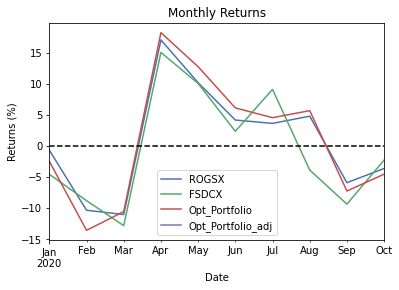

In [126]:
monthly_return.plot()
plt.title("Monthly Returns")
plt.ylabel("Returns (%)")
plt.axhline(y=0, color='black', linestyle='--')


## Annualised Daily Std. by month
formula used: std of daily log return by month*sqrt(252) to annualise

In [127]:
rogsx_risk = pd.DataFrame(rogsx['Log Return'].resample('M').std())
rogsx_risk['Annualised Std'] = rogsx_risk['Log Return']*math.sqrt(252)
rogsx_risk.columns = ['Monthly Std', 'Annualised Monthly Std']
rogsx_risk

Monthly Std  Annualised Monthly Std
Date                                           
2020-01-31     0.010014                0.158968
2020-02-29     0.017958                0.285073
2020-03-31     0.059090                0.938022
2020-04-30     0.028277                0.448884
2020-05-31     0.016408                0.260469
2020-06-30     0.017086                0.271237
2020-07-31     0.013475                0.213904
2020-08-31     0.008284                0.131512
2020-09-30     0.020320                0.322574
2020-10-31     0.015843                0.251499

In [128]:
fsdcx_risk = pd.DataFrame(fsdcx['Log Return'].resample('M').std())
fsdcx_risk['Annualised Std'] = fsdcx_risk['Log Return']*math.sqrt(252)
fsdcx_risk.columns = ['Monthly Std', 'Annualised Monthly Std']
fsdcx_risk

Monthly Std  Annualised Monthly Std
Date                                           
2020-01-31     0.010720                0.170172
2020-02-29     0.016086                0.255353
2020-03-31     0.056858                0.902587
2020-04-30     0.030503                0.484214
2020-05-31     0.018904                0.300090
2020-06-30     0.021775                0.345669
2020-07-31     0.015906                0.252499
2020-08-31     0.008209                0.130319
2020-09-30     0.021231                0.337027
2020-10-31     0.013884                0.220398

In [129]:
opt_risk = pd.DataFrame(optimised_portfolio['Log Return'].resample('M').std())
opt_risk['Annualised Std'] = opt_risk['Log Return']*math.sqrt(252)
opt_risk.columns = ['Monthly Std', 'Annualised Monthly Std']
opt_risk

Monthly Std  Annualised Monthly Std
Date                                           
2020-01-31     0.010053                0.159593
2020-02-29     0.018981                0.301319
2020-03-31     0.058084                0.922057
2020-04-30     0.028850                0.457986
2020-05-31     0.017223                0.273413
2020-06-30     0.017123                0.271820
2020-07-31     0.016100                0.255580
2020-08-31     0.010868                0.172527
2020-09-30     0.021223                0.336911
2020-10-31     0.016252                0.257990

In [130]:
optimised_portfolio_adj_risk = optimised_portfolio_adj['Log Return'].std()*math.sqrt(252)
optimised_portfolio_adj_risk

0.27852790954975487

In [131]:
#to build the reporting table
opt_adj_risk = []
for i in range(9):
    opt_adj_risk.append(np.nan)
    
opt_adj_risk.append(optimised_portfolio_adj_risk)

risk_data = {'ROGSX': rogsx_risk['Annualised Monthly Std'], 'FSDCX': fsdcx_risk['Annualised Monthly Std'], 
             'Opt_Portfolio_pre': opt_risk['Annualised Monthly Std'], 'Opt_Portfolio_post': opt_adj_risk}
monthly_risk = pd.DataFrame(risk_data)
monthly_risk

ROGSX     FSDCX  Opt_Portfolio_pre  Opt_Portfolio_post
Date                                                                 
2020-01-31  0.158968  0.170172           0.159593                 NaN
2020-02-29  0.285073  0.255353           0.301319                 NaN
2020-03-31  0.938022  0.902587           0.922057                 NaN
2020-04-30  0.448884  0.484214           0.457986                 NaN
2020-05-31  0.260469  0.300090           0.273413                 NaN
2020-06-30  0.271237  0.345669           0.271820                 NaN
2020-07-31  0.213904  0.252499           0.255580                 NaN
2020-08-31  0.131512  0.130319           0.172527                 NaN
2020-09-30  0.322574  0.337027           0.336911                 NaN
2020-10-31  0.251499  0.220398           0.257990            0.278528

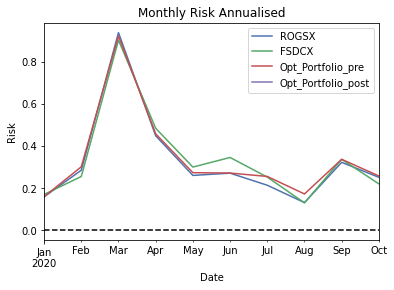

In [132]:
monthly_risk.plot()
plt.title("Monthly Risk Annualised")
plt.ylabel("Risk")
plt.axhline(y=0, color='black', linestyle='--')

## For Presentation and Appendix 

In [133]:
#YTD return and volatility 2020
funds = [rogsx, fsdcx, optimised_portfolio]
ytd_return = []
for f in funds:
    a = f['portfolio_value'].loc['2020-01-02']
    z = f['portfolio_value'].loc['2020-10-30']
    r = np.log(z/a)*100
    ytd_return.append(r)
    
ytd_risk = []
for f in funds:
    r = f['Log Return'].std()*math.sqrt(252)
    ytd_risk.append(r)

In [134]:
ytd_return

[8.0672307282604, -9.925600020482124, 7.701894934180673]

In [135]:
ytd_risk

[0.3944524860481529, 0.3992200149702064, 0.40055859901733454]

In [136]:
#YTD volatility of VGT
benchmark_tickers = ['AAPL', 'MSFT', 'NVDA', 'V', 'MA', 'ADBE',
                    'CRM', 'PYPL', 'INTC', 'CSCO', 'AVGO', 'ACN',
                    'QCOM', 'TXN', 'ORCL', 'IBM', 'AMD', 'NOW',
                    'FIS', 'INTU', 'ZM', 'ADP', 'SQ', 'FISV',
                    'AMAT', 'GPN', 'MU', 'ADSK', 'LRCX', 'ADI']
benchmark_holdings_shares = [78421584, 32586021, 2781900, 7131880, 4043283, 2179448, 
                             4068206, 5045671, 19150246, 19110044, 1807986, 2880908, 
                             5088711, 4151110, 9272786, 4016406, 5301937, 862518, 
                             2794877, 1179582, 719897, 1945777, 1642650, 2577667, 
                             4153299, 1355699, 5036264, 991619, 657449, 1667802]
benchmark_holdings = pd.DataFrame(columns=benchmark_tickers)
benchmark_holdings.loc[0] = benchmark_holdings_shares
benchmark_returns_df = get_data_for_multiple_stocks(benchmark_tickers, start_date="2020-01-01", end_date="2020-10-31")
b = benchmark_returns_df.to_numpy()
pv = np.dot(b,benchmark_holdings_shares)

benchmark_returns_df['value'] = pv
benchmark_returns_df['prev value'] = benchmark_returns_df['value'].shift(1)
benchmark_returns_df['log returns'] = np.log(benchmark_returns_df['value']/benchmark_returns_df['prev value'])
a = benchmark_returns_df['log returns'].std()*math.sqrt(252)
a

0.4455415711439123

In [137]:
sector_mapper = {"GOOGL": "Communication Services", "GOOG":"Communication Services", "FB":"Communication Services", "AMZN" : "Consumer Cyclical", "EBAY":"Consumer Cyclical", "CSCO":"Communication Equipment", "JNPR": "Communication Equipment", "QCOM":"Semiconductors", "ACN":"Information Technology Services", "AKAM" : "Software", 
                 "GPN" : "Consumer Defensive","IBM":" Information Technology Services", "V":"Financial Services", "INTC":"Semiconductors", "KLAC":"Semiconductors", "NXPI":"Semiconductors","SWKS":"Semiconductors","XLNX":"Semiconductors", "CHKP":"Software","CTXS":"Software", "MSFT":"Software",
                "ORCL":"Software","SNPS":"Software","VMW":"Software","AAPL":"Consumer Electronics","IAC":"Communication Services","HPQ":"Computer Hardware", "NTAP":"Computer Hardware","STX":"Computer Hardware","WDC":"Computer Hardware"}

def get_logre(tickers, start_date='2020-01-01',end_date= '2020-10-31'):
    result = {}
    for ticker in tickers:
        s = DataReader(ticker, 'yahoo', start_date, end_date)
        for c in s['Adj Close']:
            if c is None:
                c = np.nan
            else:
                continue
        s['log returns'] = np.log(s['Adj Close']/s['Adj Close'].shift(1))
        result[ticker] = s['log returns']
    return result

<AxesSubplot:title={'center':'Asset Returns'}, xlabel='Date', ylabel='Returns (%)'>

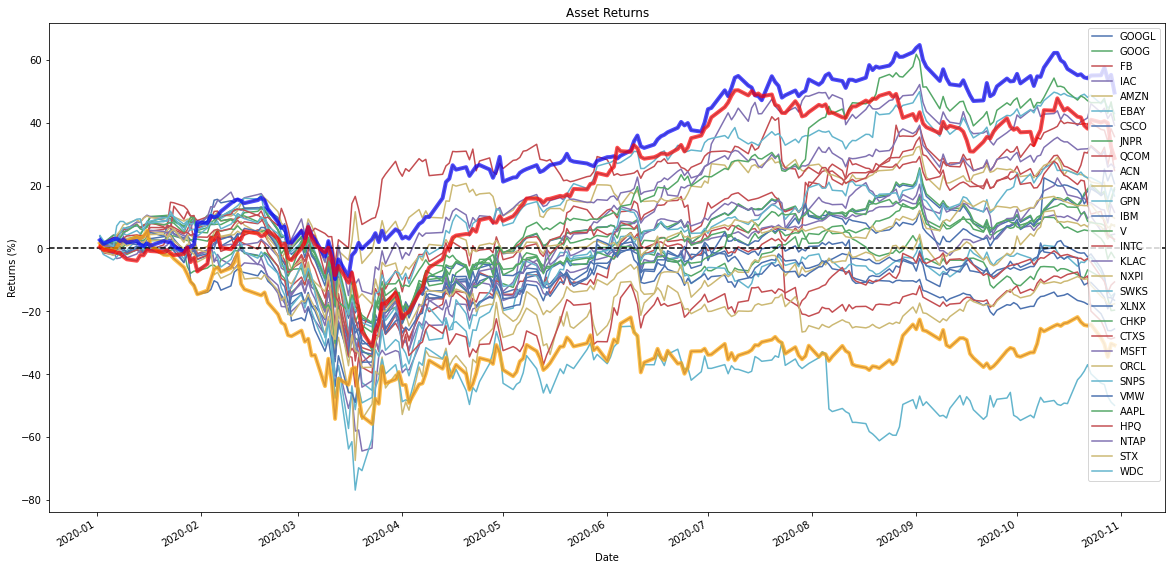

In [138]:
#Plot of daily returns for top 30 holdings in 2020
holdings = pd.DataFrame(get_logre(best_tickers))
holdings[1:].expanding().apply(lambda x: sum(x) * 100, raw = True).plot(figsize = (20, 10))
#portfolio_logre.plot(figsize = (20, 10))
plt.title("Asset Returns")
plt.ylabel("Returns (%)")
plt.axhline(y=0, color='black', linestyle='--')
holdings['NTAP'][1:].expanding().apply(lambda x: sum(x) * 100, raw = True).plot( marker='', color='orange', linewidth=4, alpha=0.7)
holdings['AMZN'][1:].expanding().apply(lambda x: sum(x) * 100, raw = True).plot( marker='', color='blue', linewidth=4, alpha=0.7)
holdings['EBAY'][1:].expanding().apply(lambda x: sum(x) * 100, raw = True).plot( marker='', color='red', linewidth=4, alpha=0.7)

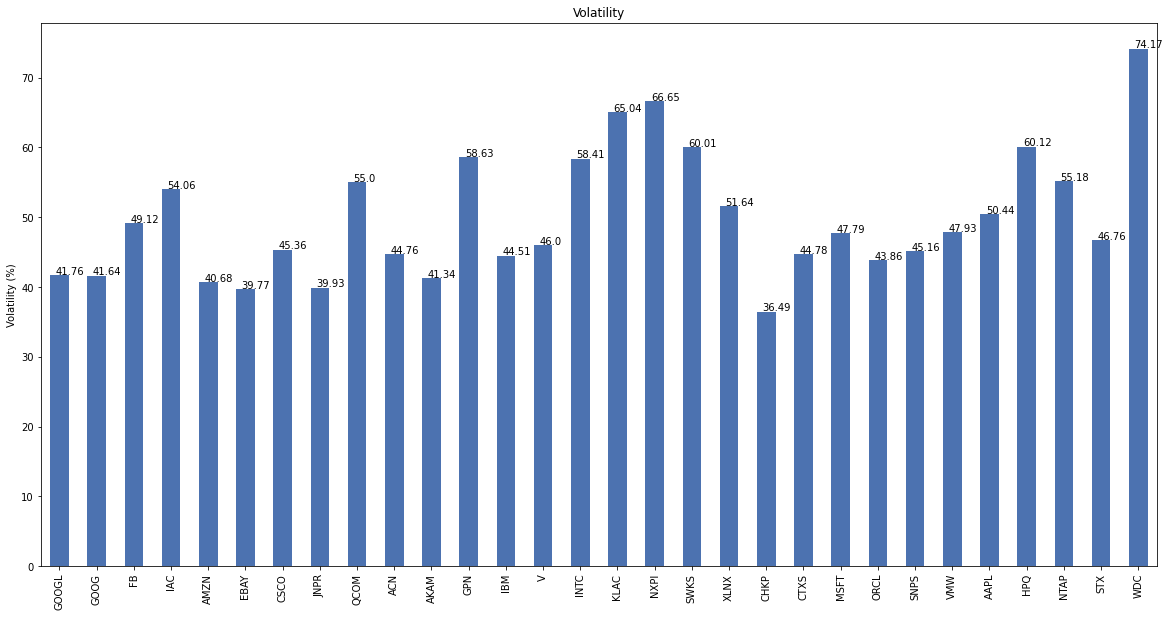

In [139]:
#Plot of annualised volatility for top 30 holdings in 2020
ax = round(holdings.std() * 260 ** 0.5 * 100, 2).plot(figsize = (20, 10), kind = "bar")
plt.title("Volatility")
plt.ylabel("Volatility (%)")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.15, p.get_height() + 0.1))

In [140]:
sectors = deepcopy(holdings)
#rename columns to their sectors
sectors.columns = sector_mapper.values()
#each sector, mean log return
sectors = sectors.groupby(level = 0, axis = 1).mean()
sectors.head()

Information Technology Services  Communication Equipment  \
Date                                                                    
2019-12-31                               NaN                      NaN   
2020-01-02                          0.016892                 0.011059   
2020-01-03                         -0.006864                -0.012930   
2020-01-06                          0.019175                -0.000728   
2020-01-07                         -0.003197                -0.005494   

            Communication Services  Computer Hardware  Consumer Cyclical  \
Date                                                                       
2019-12-31                     NaN                NaN                NaN   
2020-01-02                0.022117           0.021390           0.025628   
2020-01-03               -0.006310          -0.017981          -0.008797   
2020-01-06                0.019315          -0.007469           0.008037   
2020-01-07               -0.001278           0.021590           0.004201   

            Consumer Defensive  Consumer Electronics  Financial Services  \
Date                                                                       
2019-12-31                 NaN                   NaN                 NaN   
2020-01-02            0.014481              0.025048            0.010243   
2020-01-03           -0.004575             -0.010463           -0.008007   
2020-01-06            0.003547              0.000260           -0.001788   
2020-01-07            0.029819             -0.024443            0.000671   

            Information Technology Services  Semiconductors  Software  
Date                                                                   
2019-12-31                              NaN             NaN       NaN  
2020-01-02                         0.005200        0.012926  0.016857  
2020-01-03                        -0.019009       -0.014906 -0.006743  
2020-01-06                        -0.005878       -0.009114 -0.000453  
2020-01-07                         0.028039        0.001113 -0.001641

<AxesSubplot:title={'center':'Sector Returns'}, xlabel='Date', ylabel='Returns (%)'>

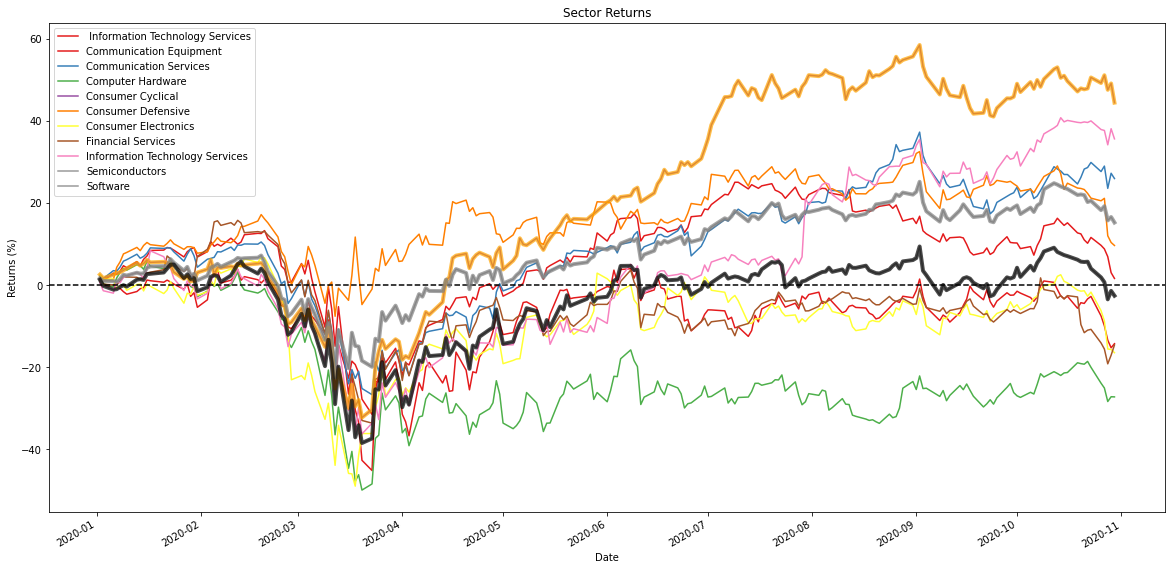

In [141]:
#plot of daily returns for sectors in 2020
from matplotlib import cm
cmap = cm.get_cmap('Set1')
sectors[1:].expanding(0).apply(lambda x: sum(x) * 100, raw = True).plot(figsize = (20, 10), cmap=cmap )
plt.title("Sector Returns")
plt.ylabel("Returns (%)")
plt.axhline(y=0, color='black', linestyle='--')
sectors['Consumer Cyclical'][1:].expanding().apply(lambda x: sum(x) * 100, raw = True).plot( marker='', color='orange', linewidth=4, alpha=0.7)
sectors['Software'][1:].expanding().apply(lambda x: sum(x) * 100, raw = True).plot( marker='', color='grey', linewidth=4, alpha=0.7)
sectors['Semiconductors'][1:].expanding().apply(lambda x: sum(x) * 100, raw = True).plot( marker='', color='black', linewidth=4, alpha=0.7)


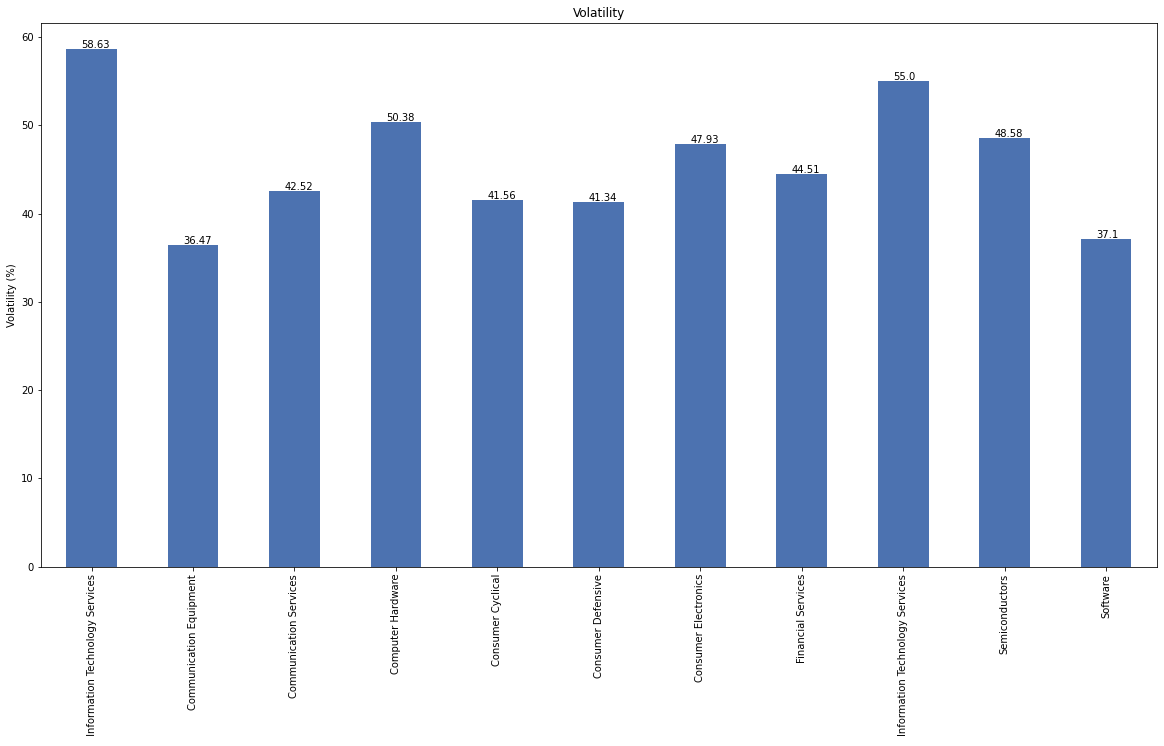

In [142]:
#plot of annualised volatility for sectors in 2020
ax = round(sectors.std() * 260 ** 0.5 * 100, 2).plot(figsize = (20, 10), kind = "bar")
plt.title("Volatility")
plt.ylabel("Volatility (%)")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.15, p.get_height() + 0.1))

# Q3

In [64]:
from __future__ import division
import cvxpy as cvx
import numpy as np
import pandas as pd
from pandas_datareader.data import DataReader
import datetime
from datetime import datetime, date
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as dt
from functools import reduce
import math as math
from math import sqrt, exp
import seaborn as sns
from copy import deepcopy
from scipy.stats import norm
%matplotlib inline
import collections
from collections import OrderedDict

# Extra: VAR & ES for 4 Portfolios (for Presentation)

In [65]:
#obtain portfolio of stocks
#code taken from tutorial 3 optimisation
def get_data_for_multiple_stocks(tickers, start_date, end_date):
    #read in stock data
    #date: YYYY-MM-DD
    s = DataReader(tickers[0], 'yahoo', start_date, end_date)[["Adj Close"]]
    #get log returns
    s[tickers[0]] = s['Adj Close']

    stocks = s[[tickers[0]]]

    for ticker in tickers[1:]:
        s = DataReader(ticker, 'yahoo', start_date, end_date)
        s[ticker] = s['Adj Close']
        stocks[ticker] = s[ticker]
        
    return stocks.iloc[1:].fillna(0)

In [66]:
#took the top 30 stocks from VGT's 2020 adjusted portfolio: https://investor.vanguard.com/etf/profile/portfolio/VGT/portfolio-holdings
benchmark_tickers = ['AAPL', 'MSFT', 'NVDA', 'V', 'MA', 'ADBE',
                    'CRM', 'PYPL', 'INTC', 'CSCO', 'AVGO', 'ACN',
                    'QCOM', 'TXN', 'ORCL', 'IBM', 'AMD', 'NOW',
                    'FIS', 'INTU', 'ZM', 'ADP', 'SQ', 'FISV',
                    'AMAT', 'GPN', 'MU', 'ADSK', 'LRCX', 'ADI']
benchmark_holdings_shares = [78421584, 32586021, 2781900, 7131880, 4043283, 2179448, 
                             4068206, 5045671, 19150246, 19110044, 1807986, 2880908, 
                             5088711, 4151110, 9272786, 4016406, 5301937, 862518, 
                             2794877, 1179582, 719897, 1945777, 1642650, 2577667, 
                             4153299, 1355699, 5036264, 991619, 657449, 1667802]
benchmark_holdings = pd.DataFrame(columns=benchmark_tickers)
benchmark_holdings.loc[0] = benchmark_holdings_shares
benchmark_returns_df = get_data_for_multiple_stocks(benchmark_tickers, start_date="2015-01-01", end_date="2020-11-02")
benchmark_returns_df

AAPL        MSFT        NVDA           V          MA  \
Date                                                                     
2015-01-02   24.696352   41.647892   19.380514   63.475796   82.406281   
2015-01-05   24.000614   41.264908   19.053175   62.074650   80.088356   
2015-01-06   24.002876   40.659245   18.475513   61.674656   79.915245   
2015-01-07   24.339447   41.175831   18.427374   62.500984   81.158363   
2015-01-08   25.274624   42.387146   19.120564   63.339291   82.420746   
...                ...         ...         ...         ...         ...   
2020-10-27  116.399178  213.250000  535.869995  189.774063  317.109985   
2020-10-28  111.008476  202.679993  505.079987  180.597885  291.380005   
2020-10-29  115.121384  204.720001  520.960022  184.591858  293.179993   
2020-10-30  108.672516  202.470001  501.359985  181.436630  288.640015   
2020-11-02  108.582664  202.330002  503.230011  184.462067  289.970001   

                  ADBE         CRM        PYPL       INTC       CSCO  ...  \
Date                                                                  ...   
2015-01-02   72.339996   59.240002    0.000000  30.858051  22.964809  ...   
2015-01-05   71.980003   58.169998    0.000000  30.510092  22.507343  ...   
2015-01-06   70.529999   57.200001    0.000000  29.941477  22.499020  ...   
2015-01-07   71.110001   56.930000    0.000000  30.569496  22.706963  ...   
2015-01-08   72.919998   58.590000    0.000000  31.138117  22.881630  ...   
...                ...         ...         ...        ...        ...  ...   
2020-10-27  478.559998  250.300003  200.429993  45.310432  36.869999  ...   
2020-10-28  456.970001  238.429993  192.309998  43.930473  35.709999  ...   
2020-10-29  461.109985  237.139999  195.039993  43.791485  35.689999  ...   
2020-10-30  447.100006  232.270004  186.130005  43.960255  35.900002  ...   
2020-11-02  444.940002  232.449997  187.759995  44.138954  35.900002  ...   

                    ZM         ADP          SQ       FISV       AMAT  \
Date                                                                   
2015-01-02    0.000000   73.123955    0.000000  35.310001  22.730707   
2015-01-05    0.000000   73.071297    0.000000  34.910000  22.002159   
2015-01-06    0.000000   72.465508    0.000000  34.945000  21.173439   
2015-01-07    0.000000   73.097610    0.000000  35.419998  21.373787   
2015-01-08    0.000000   74.774498    0.000000  36.139999  22.056805   
...                ...         ...         ...        ...        ...   
2020-10-27  538.989990  146.029999  171.020004  96.610001  58.830002   
2020-10-28  516.010010  155.080002  167.130005  93.519997  57.320000   
2020-10-29  489.679993  158.190002  169.860001  95.769997  59.500000   
2020-10-30  460.910004  157.960007  154.880005  95.470001  59.230000   
2020-11-02  453.000000  161.460007  155.229996  97.290001  60.330002   

                   GPN         MU        ADSK        LRCX         ADI  
Date                                                                   
2015-01-02   40.040497  34.750000   59.529999   72.036148   48.616539  
2015-01-05   39.360336  33.779999   58.660000   71.156654   47.732426  
2015-01-06   38.908539  32.869999   57.500000   69.968918   46.611992  
2015-01-07   39.365299  32.099998   57.380001   70.331581   47.102192  
2015-01-08   42.090927  33.669998   58.799999   72.154015   47.933762  
...                ...        ...         ...         ...         ...  
2020-10-27  164.759995  51.959999  250.600006  343.829987  120.290001  
2020-10-28  159.100006  50.000000  237.619995  338.899994  116.470001  
2020-10-29  156.169998  50.480000  242.839996  353.260010  118.480003  
2020-10-30  157.740005  50.340000  235.539993  342.079987  118.529999  
2020-11-02  160.360001  49.709999  240.740005  350.950012  118.480003  

[1470 rows x 30 columns]

In [67]:
#tickers not included but are in the holdings, not top 30: GLW, DELL, HPE
#retrieved from October 21, 2019 data from https://www.oakfunds.com/assets/files/h/oak-10.31.19-annual-report.pdf
best_tickers = ["GOOGL", "GOOG", "FB", "IAC", "AMZN", "EBAY", "CSCO", "JNPR", "QCOM", "ACN", "AKAM", "GPN", "IBM", "V", "INTC", "KLAC", "NXPI", "SWKS", "XLNX", "CHKP", "CTXS", "MSFT", "ORCL", "SNPS", "VMW", "AAPL", "HPQ", "NTAP", "STX", "WDC"] 
best_holdings_shares = [18300, 26276, 143225, 98885, 15400, 336300, 598000, 447000, 159000, 101275, 136200, 128157, 80900, 60000, 557800, 215400, 133550, 113970, 197800, 169700, 129280, 280200, 439641, 159000, 140600, 161720, 480500, 321700, 329400, 204600]
best_holdings = pd.DataFrame(columns=best_tickers)
best_holdings.loc[0] = best_holdings_shares
best_returns_df = get_data_for_multiple_stocks(best_tickers, start_date="2015-01-01", end_date="2020-11-02")
best_returns_df

GOOGL         GOOG          FB         IAC         AMZN  \
Date                                                                        
2015-01-02   529.549988   523.373108   78.449997   19.352539   308.519989   
2015-01-05   519.460022   512.463013   77.190002   19.240211   302.190002   
2015-01-06   506.640015   500.585632   76.150002   19.310818   295.290009   
2015-01-07   505.149994   499.727997   76.150002   19.275517   298.420013   
2015-01-08   506.910004   501.303680   78.180000   19.747293   300.459991   
...                 ...          ...         ...         ...          ...   
2020-10-27  1598.880005  1604.260010  283.290009  127.470001  3286.330078   
2020-10-28  1510.800049  1516.619995  267.670013  123.370003  3162.780029   
2020-10-29  1556.880005  1567.239990  280.829987  125.349998  3211.010010   
2020-10-30  1616.109985  1621.010010  263.109985  120.720001  3036.149902   
2020-11-02  1624.319946  1626.030029  261.359985  123.419998  3004.479980   

                 EBAY       CSCO       JNPR        QCOM         ACN  ...  \
Date                                                                 ...   
2015-01-02  23.046915  22.964809  19.757004   60.774788   78.904068  ...   
2015-01-05  22.854210  22.507343  19.536995   60.488415   77.571823  ...   
2015-01-06  22.558998  22.499020  19.264179   59.629311   77.012268  ...   
2015-01-07  22.522099  22.706963  19.695400   60.324776   78.628738  ...   
2015-01-08  23.128920  22.881630  20.267429   60.962967   79.827751  ...   
...               ...        ...        ...         ...         ...  ...   
2020-10-27  53.549999  36.869999  21.850000  125.910004  220.660004  ...   
2020-10-28  53.250000  35.709999  20.480000  121.580002  213.940002  ...   
2020-10-29  49.279999  35.689999  19.690001  126.440002  216.440002  ...   
2020-10-30  47.630001  35.900002  19.719999  123.360001  216.910004  ...   
2020-11-02  47.869999  35.900002  19.670000  123.970001  220.190002  ...   

                  CTXS        MSFT       ORCL        SNPS         VMW  \
Date                                                                    
2015-01-02   49.282051   41.647892  40.292976   43.099998   68.177483   
2015-01-05   48.187405   41.264908  39.727905   42.540001   67.313530   
2015-01-06   46.836571   40.659245  39.317783   42.160000   65.452713   
2015-01-07   47.535278   41.175831  39.326889   42.209999   65.502556   
2015-01-08   47.752651   42.387146  39.563850   42.860001   66.275124   
...                ...         ...        ...         ...         ...   
2020-10-27  119.470001  213.250000  57.080002  222.910004  139.100006   
2020-10-28  114.820000  202.679993  55.590000  217.820007  129.889999   
2020-10-29  113.919998  204.720001  56.020000  219.460007  129.759995   
2020-10-30  113.269997  202.470001  56.110001  213.860001  128.729996   
2020-11-02  114.430000  202.330002  56.450001  215.779999  127.000000   

                  AAPL        HPQ       NTAP        STX        WDC  
Date                                                                
2015-01-02   24.696352  15.134839  35.532898  47.154106  91.047844  
2015-01-05   24.000614  14.882843  34.324467  46.904118  89.844086  
2015-01-06   24.002876  14.770003  34.015938  45.611343  87.840591  
2015-01-07   24.339447  14.943014  34.192368  45.904182  89.159760  
2015-01-08   25.274624  15.300328  34.898075  46.732704  91.006638  
...                ...        ...        ...        ...        ...  
2020-10-27  116.399178  17.980000  44.049999  48.560001  40.320000  
2020-10-28  111.008476  17.350000  42.290001  47.740002  38.810001  
2020-10-29  115.121384  17.780001  44.110001  47.660000  38.110001  
2020-10-30  108.672516  17.959999  43.889999  47.820000  37.730000  
2020-11-02  108.582664  18.410000  44.939999  48.570000  37.029999  

[1470 rows x 30 columns]

In [68]:
#adjusted best portfolio, contains 29 stocks, IAC & WDC was dropped
#retrieved from April 20, 2020 data from https://www.oakfunds.com/assets/files/i/oak-4.30.20-semi-annual-report.pdf
#1% turnover according to the semi annual report
adj_best_tickers = ["GOOGL", "GOOG", "FB", "AMZN", "EBAY", 
                    "CSCO", "JNPR", "QCOM", "ACN", "AKAM", 
                    "GPN", "IBM", "V", "INTC", "KLAC", 
                    "NXPI", "SWKS", "XLNX", "CHKP", "CTXS", 
                    "MSFT", "ORCL", "SNPS", "VMW", "AAPL", 
                    "HPE", "HPQ", "NTAP", "STX"] 
adj_best_holdings_shares = [17630, 22426, 143225, 15400, 324030, 
                            576180, 303865, 153200, 47580, 116780, 
                            118157, 80900, 80000, 537450, 152400, 
                            113550, 145135, 190585, 129700, 129280, 
                            269975, 423601, 99295, 135470, 133720, 
                            78930, 462970, 290690, 229400]
adj_best_holdings = pd.DataFrame(columns=adj_best_tickers)
adj_best_holdings.loc[0] = adj_best_holdings_shares
adj_best_returns_df = get_data_for_multiple_stocks(adj_best_tickers, start_date="2015-01-01", end_date="2020-11-02")
adj_best_returns_df

GOOGL         GOOG          FB         AMZN       EBAY  \
Date                                                                       
2015-01-02   529.549988   523.373108   78.449997   308.519989  23.046915   
2015-01-05   519.460022   512.463013   77.190002   302.190002  22.854210   
2015-01-06   506.640015   500.585632   76.150002   295.290009  22.558998   
2015-01-07   505.149994   499.727997   76.150002   298.420013  22.522099   
2015-01-08   506.910004   501.303680   78.180000   300.459991  23.128920   
...                 ...          ...         ...          ...        ...   
2020-10-27  1598.880005  1604.260010  283.290009  3286.330078  53.549999   
2020-10-28  1510.800049  1516.619995  267.670013  3162.780029  53.250000   
2020-10-29  1556.880005  1567.239990  280.829987  3211.010010  49.279999   
2020-10-30  1616.109985  1621.010010  263.109985  3036.149902  47.630001   
2020-11-02  1624.319946  1626.030029  261.359985  3004.479980  47.869999   

                 CSCO       JNPR        QCOM         ACN        AKAM  ...  \
Date                                                                  ...   
2015-01-02  22.964809  19.757004   60.774788   78.904068   63.250000  ...   
2015-01-05  22.507343  19.536995   60.488415   77.571823   61.939999  ...   
2015-01-06  22.499020  19.264179   59.629311   77.012268   60.669998  ...   
2015-01-07  22.706963  19.695400   60.324776   78.628738   60.160000  ...   
2015-01-08  22.881630  20.267429   60.962967   79.827751   61.570000  ...   
...               ...        ...         ...         ...         ...  ...   
2020-10-27  36.869999  21.850000  125.910004  220.660004  106.709999  ...   
2020-10-28  35.709999  20.480000  121.580002  213.940002   97.400002  ...   
2020-10-29  35.689999  19.690001  126.440002  216.440002   95.820000  ...   
2020-10-30  35.900002  19.719999  123.360001  216.910004   95.120003  ...   
2020-11-02  35.900002  19.670000  123.970001  220.190002   95.809998  ...   

                  CTXS        MSFT       ORCL        SNPS         VMW  \
Date                                                                    
2015-01-02   49.282051   41.647892  40.292976   43.099998   68.177483   
2015-01-05   48.187405   41.264908  39.727905   42.540001   67.313530   
2015-01-06   46.836571   40.659245  39.317783   42.160000   65.452713   
2015-01-07   47.535278   41.175831  39.326889   42.209999   65.502556   
2015-01-08   47.752651   42.387146  39.563850   42.860001   66.275124   
...                ...         ...        ...         ...         ...   
2020-10-27  119.470001  213.250000  57.080002  222.910004  139.100006   
2020-10-28  114.820000  202.679993  55.590000  217.820007  129.889999   
2020-10-29  113.919998  204.720001  56.020000  219.460007  129.759995   
2020-10-30  113.269997  202.470001  56.110001  213.860001  128.729996   
2020-11-02  114.430000  202.330002  56.450001  215.779999  127.000000   

                  AAPL   HPE        HPQ       NTAP        STX  
Date                                                           
2015-01-02   24.696352  0.00  15.134839  35.532898  47.154106  
2015-01-05   24.000614  0.00  14.882843  34.324467  46.904118  
2015-01-06   24.002876  0.00  14.770003  34.015938  45.611343  
2015-01-07   24.339447  0.00  14.943014  34.192368  45.904182  
2015-01-08   25.274624  0.00  15.300328  34.898075  46.732704  
...                ...   ...        ...        ...        ...  
2020-10-27  116.399178  8.80  17.980000  44.049999  48.560001  
2020-10-28  111.008476  8.37  17.350000  42.290001  47.740002  
2020-10-29  115.121384  8.53  17.780001  44.110001  47.660000  
2020-10-30  108.672516  8.64  17.959999  43.889999  47.820000  
2020-11-02  108.582664  8.91  18.410000  44.939999  48.570000  

[1470 rows x 29 columns]

In [69]:
#worst unable to access: Fidelity Cash Central Fund & Fidelity Securities Lending Cash Central Fund (6.4% of a 101.5% portfolio)
#retrieved from February 29 2020 data from annual report: https://www.actionsxchangerepository.fidelity.com/ShowDocument/documentPDF.htm?_fax=-18%2342%23-61%23-110%23114%2378%23117%2320%23-1%2396%2339%23-62%23-21%2386%23-100%2337%2316%2335%23-68%2391%23-66%2354%23103%23-16%2369%23-30%2358%23-20%2376%23-84%23-11%23-87%230%23-50%23-20%23-92%23-98%23-116%23-28%2358%23-38%23-43%23-39%23-42%23-96%23-88%2388%23-45%23106%23114%2374%23124%23-65%23-39%23120%23-89%23-74%235%23-89%23-105%23-67%23126%2377%23-126%2318%23120%2345%23-53%23-98%2364%23-49%23-12%236%23-33%23-50%2340%23-82%2388%23-13%2368%23-79%23-117%2317%23-98%23-87%23-35%23-28%2318%2364%23-76%2355%23-35%2314%23100%2316%23119%2345%23-114%23-115%2326%23-73%23122%23-43%23110%23-17%23-104%23-82%23-116%2314%232%23-71%2388%23-66%23-49%23109%23-101%2357%23-68%2330%23-78%23-22%23100%2362%23-56%23-118%2384%2326%2336%23-75%23-54%2324%2343%23-48%23-44%2368%234%23111%236%23-102%234%23-50%2378%2348%23-38%2396%23-58%23122%23-6%2392%23-52%23-1%2336%2367%2379%23-48%23-119%2354%232%2311%23-64%23
worst_tickers = ["ACIA", "ANET", "CASA", "CIEN", "CSCO", "COMM", "CMTL", "SATS", "ERIC", "EXTR", "FFIV", "INFN", "IDCC", "JNPR", "LITE", "MSI", "NTCT", "NOK", "PLT", "SWIR", "VSAT", "VIAV", "CLNXF", "ORA.VI", "GOOGL", "FSLY", "CRWD", "RPD"]
worst_holdings = pd.DataFrame(columns=worst_tickers)
worst_holdings_shares = [29366, 26004, 58869, 247265, 690263, 484767, 49300, 139168, 1803310, 591691, 59426, 14814, 18846, 79735, 87704, 124921, 67791, 1314859, 70800, 163900, 99451, 274212, 37200, 179900, 6, 75502, 20000, 41201]
worst_holdings.loc[0] = worst_holdings_shares
worst_returns_df = get_data_for_multiple_stocks(worst_tickers, start_date="2015-01-01", end_date="2020-11-02")
worst_returns_df #only returns data from May 16 2016

ACIA        ANET  CASA       CIEN       CSCO       COMM  \
Date                                                                       
2016-05-16  28.120001   68.010002  0.00  15.860000  23.352606  30.110001   
2016-05-17  28.450001   66.900002  0.00  16.160000  23.075531  29.709999   
2016-05-18  28.000000   68.029999  0.00  16.309999  23.136143  29.690001   
2016-05-19  28.379999   68.199997  0.00  15.890000  23.872135  29.500000   
2016-05-20  29.379999   70.120003  0.00  16.100000  24.218481  29.879999   
...               ...         ...   ...        ...        ...        ...   
2020-10-27  67.500000  210.550003  4.55  39.540001  36.869999   8.960000   
2020-10-28  67.510002  204.380005  4.61  38.439999  35.709999   8.500000   
2020-10-29  67.809998  203.160004  4.64  38.810001  35.689999   8.850000   
2020-10-30  67.739998  208.899994  4.17  39.389999  35.900002   8.900000   
2020-11-02  67.779999  216.119995  4.21  39.150002  35.900002   9.130000   

                 CMTL       SATS       ERIC  EXTR  ...        PLT       SWIR  \
Date                                               ...                         
2016-05-16  19.922659  32.836304   7.157005  3.41  ...  40.259090  19.180000   
2016-05-17  19.711184  32.196110   7.054093  3.40  ...  39.486317  19.059999   
2016-05-18  20.063635  32.115074   7.091516  3.40  ...  39.807892  18.940001   
2016-05-19  19.922659  31.782820   7.026027  3.45  ...  39.486320  18.860001   
2016-05-20  20.186998  32.374393   7.091516  3.51  ...  40.337528  19.260000   
...               ...        ...        ...   ...  ...        ...        ...   
2020-10-27  15.680000  24.270000  11.780000  4.72  ...  18.180000  11.220000   
2020-10-28  14.390000  23.010000  11.380000  4.60  ...  16.809999  10.940000   
2020-10-29  14.980000  23.299999  11.330000  4.48  ...  18.990000  11.150000   
2020-10-30  14.400000  23.160000  11.210000  4.06  ...  19.520000  11.100000   
2020-11-02  14.700000  23.670000  11.260000  3.95  ...  21.870001  11.200000   

                 VSAT   VIAV      CLNXF    ORA.VI        GOOGL       FSLY  \
Date                                                                        
2016-05-16  75.000000   6.26   0.000000   0.00000   730.299988   0.000000   
2016-05-17  73.800003   6.23   0.000000  14.21285   720.190002   0.000000   
2016-05-18  73.440002   6.28   0.000000  14.21285   721.780029   0.000000   
2016-05-19  72.699997   6.16   0.000000  14.21285   715.309998   0.000000   
2016-05-20  74.000000   6.19   0.000000  14.21285   721.710022   0.000000   
...               ...    ...        ...       ...          ...        ...   
2020-10-27  34.369999  12.73  60.500000   9.19600  1598.880005  74.459999   
2020-10-28  33.610001  12.05  63.234798   9.08000  1510.800049  71.610001   
2020-10-29  33.799999  12.52  63.234798   9.62800  1556.880005  68.379997   
2020-10-30  33.900002  12.35  63.234798   9.57400  1616.109985  63.509998   
2020-11-02  34.680000  12.21  63.234798   9.68200  1624.319946  65.110001   

                  CRWD        RPD  
Date                               
2016-05-16    0.000000  11.530000  
2016-05-17    0.000000  11.140000  
2016-05-18    0.000000  11.490000  
2016-05-19    0.000000  11.380000  
2016-05-20    0.000000  11.580000  
...                ...        ...  
2020-10-27  133.479996  64.809998  
2020-10-28  131.570007  63.900002  
2020-10-29  127.360001  63.869999  
2020-10-30  123.839996  61.930000  
2020-11-02  124.470001  62.279999  

[1126 rows x 28 columns]

In [70]:
#adjusted worst unable to access: Fidelity Cash Central Fund & Fidelity Securities Lending Cash Central Fund (6.4% of a 101.5% portfolio)
#36 stocks in the fund, only taking top 30 into consideration, 
#not in top 30: CASA, EVTZF, RDWR, Sonus Networks (Private), CTXS, FTNT
#retrieved from August 31 2020 data from semi-annual report: https://www.actionsxchangerepository.fidelity.com/ShowDocument/ComplianceEnvelope.htm?_fax=-18%2342%23-61%23-110%23114%2378%23117%2320%23-1%2396%2339%23-62%23-21%2386%23-100%2337%2316%2335%23-68%2391%23-66%2354%23103%23-16%2369%23-30%2358%23-20%2376%23-84%23-11%23-87%230%23-50%23-20%23-92%23-98%23-116%23-28%2358%23-38%23-43%23-39%23-42%23-96%23-88%2388%23-45%23106%23114%2374%23124%23-65%23-39%23120%23-89%23-74%235%23-89%23-105%23-67%23126%2377%23-126%23100%2345%23-44%23-73%23-15%238%23-21%23-37%23-17%23-14%23-98%23123%23-18%2345%23-59%23-82%2367%2383%23112%2317%2370%23-78%2378%23-50%2336%23-86%23-90%2381%23-21%23-119%23-30%23120%2349%2328%23-98%2333%2351%23-78%23-119%23-16%2350%23-58%2350%23102%2348%23-17%2352%23-99%23#
adj_worst_tickers = ["ACIA", "ADTN", "ANET", "CALX", "CIEN", 
                 "CSCO", "COMM", "SATS", "ERIC", "EXTR", 
                 "FFIV", "HLIT", "INSG", "IDCC", "JNPR", 
                 "LITE", "MSI", "NTCT", "NOK", "SWIR", 
                 "VSAT", "VIAV", "GLW", "RXT", "NET", 
                 "CVLT", "PANW", "PING", "RPD", "TENB"] 
adj_worst_holdings = pd.DataFrame(columns=adj_worst_tickers)
adj_worst_holdings_shares = [64446, 81825, 15371, 171619, 127319, 
                         617614, 193714, 156578, 2904956, 202678, 
                         56662, 163768, 75731, 54324, 287529, 
                         60938, 43456, 124959, 1902290, 64211, 
                         77068, 334169, 49900, 25600, 39413, 
                         29230, 6000, 48500, 13098, 34000]
                        
adj_worst_holdings.loc[0] = adj_worst_holdings_shares
adj_worst_returns_df = get_data_for_multiple_stocks(adj_worst_tickers, start_date="2015-01-01", end_date="2020-11-02")
adj_worst_returns_df #only returns data from May 16 2016

ACIA       ADTN        ANET       CALX       CIEN       CSCO  \
Date                                                                            
2016-05-16  28.120001  16.875278   68.010002   6.900000  15.860000  23.352606   
2016-05-17  28.450001  16.461493   66.900002   6.650000  16.160000  23.075531   
2016-05-18  28.000000  16.605421   68.029999   6.680000  16.309999  23.136143   
2016-05-19  28.379999  16.443501   68.199997   6.280000  15.890000  23.872135   
2016-05-20  29.379999  16.659393   70.120003   6.460000  16.100000  24.218481   
...               ...        ...         ...        ...        ...        ...   
2020-10-27  67.500000  11.530000  210.550003  24.840000  39.540001  36.869999   
2020-10-28  67.510002  10.900000  204.380005  24.059999  38.439999  35.709999   
2020-10-29  67.809998  10.980000  203.160004  24.200001  38.810001  35.689999   
2020-10-30  67.739998  10.690000  208.899994  23.410000  39.389999  35.900002   
2020-11-02  67.779999  11.310000  216.119995  23.780001  39.150002  35.900002   

                 COMM       SATS       ERIC  EXTR  ...       VSAT   VIAV  \
Date                                               ...                     
2016-05-16  30.110001  32.836304   7.157005  3.41  ...  75.000000   6.26   
2016-05-17  29.709999  32.196110   7.054093  3.40  ...  73.800003   6.23   
2016-05-18  29.690001  32.115074   7.091516  3.40  ...  73.440002   6.28   
2016-05-19  29.500000  31.782820   7.026027  3.45  ...  72.699997   6.16   
2016-05-20  29.879999  32.374393   7.091516  3.51  ...  74.000000   6.19   
...               ...        ...        ...   ...  ...        ...    ...   
2020-10-27   8.960000  24.270000  11.780000  4.72  ...  34.369999  12.73   
2020-10-28   8.500000  23.010000  11.380000  4.60  ...  33.610001  12.05   
2020-10-29   8.850000  23.299999  11.330000  4.48  ...  33.799999  12.52   
2020-10-30   8.900000  23.160000  11.210000  4.06  ...  33.900002  12.35   
2020-11-02   9.130000  23.670000  11.260000  3.95  ...  34.680000  12.21   

                  GLW        RXT        NET       CVLT        PANW       PING  \
Date                                                                            
2016-05-16  17.012850   0.000000   0.000000  44.240002  134.740005   0.000000   
2016-05-17  16.924294   0.000000   0.000000  43.720001  134.070007   0.000000   
2016-05-18  16.809164   0.000000   0.000000  44.049999  136.750000   0.000000   
2016-05-19  16.773737   0.000000   0.000000  43.340000  139.210007   0.000000   
2016-05-20  17.278536   0.000000   0.000000  44.279999  141.759995   0.000000   
...               ...        ...        ...        ...         ...        ...   
2020-10-27  32.649139  16.049999  55.980000  42.459999  231.539993  31.629999   
2020-10-28  31.535988  16.139999  54.759998  40.000000  225.929993  31.230000   
2020-10-29  31.903723  16.170000  54.000000  40.169998  228.770004  30.230000   
2020-10-30  31.774519  15.750000  51.970001  39.590000  221.190002  27.690001   
2020-11-02  32.271465  16.240000  52.049999  40.279999  221.850006  26.639999   

                  RPD       TENB  
Date                              
2016-05-16  11.530000   0.000000  
2016-05-17  11.140000   0.000000  
2016-05-18  11.490000   0.000000  
2016-05-19  11.380000   0.000000  
2016-05-20  11.580000   0.000000  
...               ...        ...  
2020-10-27  64.809998  37.259998  
2020-10-28  63.900002  35.900002  
2020-10-29  63.869999  34.919998  
2020-10-30  61.930000  34.110001  
2020-11-02  62.279999  34.459999  

[1126 rows x 30 columns]

In [71]:
#calculating portfolio value & log return for best portfolio
best_returns_df['portfolio_value'] = 0
for i in range(len(best_returns_df)):
    portfolio_value = 0
    for j in range(30): #set to 30 otherwise it will include the portfolio_value column
        stock_price = best_returns_df.iloc[i, j]
        stock_holdings = best_holdings.iloc[0, j]
        stock_value = stock_price * stock_holdings
        portfolio_value += stock_value
        best_returns_df.iloc[i, 30] = round(portfolio_value,2)
best_returns_df['prev_close_value'] = best_returns_df['portfolio_value'].shift(1)
best_returns_df['log_return'] = np.log(best_returns_df['portfolio_value']/best_returns_df['prev_close_value'])
best_returns_df.reset_index(inplace=True)
best_returns_df['Date'] = pd.to_datetime(best_returns_df['Date'], infer_datetime_format=True)
best_returns_df

Date        GOOGL         GOOG          FB         IAC  \
0    2015-01-02   529.549988   523.373108   78.449997   19.352539   
1    2015-01-05   519.460022   512.463013   77.190002   19.240211   
2    2015-01-06   506.640015   500.585632   76.150002   19.310818   
3    2015-01-07   505.149994   499.727997   76.150002   19.275517   
4    2015-01-08   506.910004   501.303680   78.180000   19.747293   
...         ...          ...          ...         ...         ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  127.470001   
1466 2020-10-28  1510.800049  1516.619995  267.670013  123.370003   
1467 2020-10-29  1556.880005  1567.239990  280.829987  125.349998   
1468 2020-10-30  1616.109985  1621.010010  263.109985  120.720001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  123.419998   

             AMZN       EBAY       CSCO       JNPR        QCOM  ...  \
0      308.519989  23.046915  22.964809  19.757004   60.774788  ...   
1      302.190002  22.854210  22.507343  19.536995   60.488415  ...   
2      295.290009  22.558998  22.499020  19.264179   59.629311  ...   
3      298.420013  22.522099  22.706963  19.695400   60.324776  ...   
4      300.459991  23.128920  22.881630  20.267429   60.962967  ...   
...           ...        ...        ...        ...         ...  ...   
1465  3286.330078  53.549999  36.869999  21.850000  125.910004  ...   
1466  3162.780029  53.250000  35.709999  20.480000  121.580002  ...   
1467  3211.010010  49.279999  35.689999  19.690001  126.440002  ...   
1468  3036.149902  47.630001  35.900002  19.719999  123.360001  ...   
1469  3004.479980  47.869999  35.900002  19.670000  123.970001  ...   

            SNPS         VMW        AAPL        HPQ       NTAP        STX  \
0      43.099998   68.177483   24.696352  15.134839  35.532898  47.154106   
1      42.540001   67.313530   24.000614  14.882843  34.324467  46.904118   
2      42.160000   65.452713   24.002876  14.770003  34.015938  45.611343   
3      42.209999   65.502556   24.339447  14.943014  34.192368  45.904182   
4      42.860001   66.275124   25.274624  15.300328  34.898075  46.732704   
...          ...         ...         ...        ...        ...        ...   
1465  222.910004  139.100006  116.399178  17.980000  44.049999  48.560001   
1466  217.820007  129.889999  111.008476  17.350000  42.290001  47.740002   
1467  219.460007  129.759995  115.121384  17.780001  44.110001  47.660000   
1468  213.860001  128.729996  108.672516  17.959999  43.889999  47.820000   
1469  215.779999  127.000000  108.582664  18.410000  44.939999  48.570000   

            WDC  portfolio_value  prev_close_value  log_return  
0     91.047844     2.947197e+08               NaN         NaN  
1     89.844086     2.902461e+08      2.947197e+08   -0.015296  
2     87.840591     2.852071e+08      2.902461e+08   -0.017514  
3     89.159760     2.876121e+08      2.852071e+08    0.008397  
4     91.006638     2.933383e+08      2.876121e+08    0.019714  
...         ...              ...               ...         ...  
1465  40.320000     6.915985e+08      6.893803e+08    0.003213  
1466  38.810001     6.637215e+08      6.915985e+08   -0.041143  
1467  38.110001     6.745660e+08      6.637215e+08    0.016207  
1468  37.730000     6.651560e+08      6.745660e+08   -0.014048  
1469  37.029999     6.689948e+08      6.651560e+08    0.005755  

[1470 rows x 34 columns]

In [72]:
#calculating portfolio value & log return for benchmark portfolio
benchmark_returns_df['portfolio_value'] = 0
for i in range(len(benchmark_returns_df)):
    portfolio_value = 0
    for j in range(30): #set to 30 otherwise it will include the portfolio_value column
        stock_price = benchmark_returns_df.iloc[i, j]
        stock_holdings = best_holdings.iloc[0, j]
        stock_value = stock_price * stock_holdings
        portfolio_value += stock_value
        benchmark_returns_df.iloc[i, 30] = round(portfolio_value,2)
benchmark_returns_df['prev_close_value'] = benchmark_returns_df['portfolio_value'].shift(1)
benchmark_returns_df['log_return'] = np.log(benchmark_returns_df['portfolio_value']/benchmark_returns_df['prev_close_value'])
benchmark_returns_df.reset_index(inplace=True)
benchmark_returns_df['Date'] = pd.to_datetime(benchmark_returns_df['Date'], infer_datetime_format=True)
benchmark_returns_df

Date        AAPL        MSFT        NVDA           V          MA  \
0    2015-01-02   24.696352   41.647892   19.380514   63.475796   82.406281   
1    2015-01-05   24.000614   41.264908   19.053175   62.074650   80.088356   
2    2015-01-06   24.002876   40.659245   18.475513   61.674656   79.915245   
3    2015-01-07   24.339447   41.175831   18.427374   62.500984   81.158363   
4    2015-01-08   25.274624   42.387146   19.120564   63.339291   82.420746   
...         ...         ...         ...         ...         ...         ...   
1465 2020-10-27  116.399178  213.250000  535.869995  189.774063  317.109985   
1466 2020-10-28  111.008476  202.679993  505.079987  180.597885  291.380005   
1467 2020-10-29  115.121384  204.720001  520.960022  184.591858  293.179993   
1468 2020-10-30  108.672516  202.470001  501.359985  181.436630  288.640015   
1469 2020-11-02  108.582664  202.330002  503.230011  184.462067  289.970001   

            ADBE         CRM        PYPL       INTC  ...       FISV  \
0      72.339996   59.240002    0.000000  30.858051  ...  35.310001   
1      71.980003   58.169998    0.000000  30.510092  ...  34.910000   
2      70.529999   57.200001    0.000000  29.941477  ...  34.945000   
3      71.110001   56.930000    0.000000  30.569496  ...  35.419998   
4      72.919998   58.590000    0.000000  31.138117  ...  36.139999   
...          ...         ...         ...        ...  ...        ...   
1465  478.559998  250.300003  200.429993  45.310432  ...  96.610001   
1466  456.970001  238.429993  192.309998  43.930473  ...  93.519997   
1467  461.109985  237.139999  195.039993  43.791485  ...  95.769997   
1468  447.100006  232.270004  186.130005  43.960255  ...  95.470001   
1469  444.940002  232.449997  187.759995  44.138954  ...  97.290001   

           AMAT         GPN         MU        ADSK        LRCX         ADI  \
0     22.730707   40.040497  34.750000   59.529999   72.036148   48.616539   
1     22.002159   39.360336  33.779999   58.660000   71.156654   47.732426   
2     21.173439   38.908539  32.869999   57.500000   69.968918   46.611992   
3     21.373787   39.365299  32.099998   57.380001   70.331581   47.102192   
4     22.056805   42.090927  33.669998   58.799999   72.154015   47.933762   
...         ...         ...        ...         ...         ...         ...   
1465  58.830002  164.759995  51.959999  250.600006  343.829987  120.290001   
1466  57.320000  159.100006  50.000000  237.619995  338.899994  116.470001   
1467  59.500000  156.169998  50.480000  242.839996  353.260010  118.480003   
1468  59.230000  157.740005  50.340000  235.539993  342.079987  118.529999   
1469  60.330002  160.360001  49.709999  240.740005  350.950012  118.480003   

      portfolio_value  prev_close_value  log_return  
0        2.967587e+08               NaN         NaN  
1        2.927047e+08      2.967587e+08   -0.013755  
2        2.878213e+08      2.927047e+08   -0.016825  
3        2.891065e+08      2.878213e+08    0.004455  
4        2.962381e+08      2.891065e+08    0.024368  
...               ...               ...         ...  
1465     1.301133e+09      1.292749e+09    0.006464  
1466     1.255443e+09      1.301133e+09   -0.035747  
1467     1.271709e+09      1.255443e+09    0.012872  
1468     1.236322e+09      1.271709e+09   -0.028220  
1469     1.241146e+09      1.236322e+09    0.003894  

[1470 rows x 34 columns]

In [73]:
#From the optimised portfolio convert the weights into a df for easy calculation later
w2 = OrderedDict([('GOOGL', 0.03396), ('GOOG', 0.03778), ('FB', 0.04384), ('AMZN', 0.07259), ('EBAY', 0.02461),
             ('CSCO', 0.04521), ('JNPR', 0.00218), ('QCOM', 0.01357), ('ACN', 0.05716), ('AKAM', 0.00886),
             ('GPN', 0.03315), ('IBM', 0.0028), ('V', 0.04924), ('INTC', 0.05106), ('KLAC', 0.04109),
             ('NXPI', 0.00535), ('SWKS', 0.0), ('XLNX', 0.02289), ('CHKP', 0.01387), ('CTXS', 0.01143),
             ('MSFT', 0.05215), ('ORCL', 0.00482), ('SNPS', 0.05562), ('VMW', 0.07723), ('AAPL', 0.04494),
             ('IAC', 0.07781), ('HPQ', 0.0352), ('NTAP', 0.08157), ('STX', 0.0), ('WDC', 0.0)])
w2_df = pd.DataFrame(w2, index=[0])
w2_df = w2_df.loc[:, (w2_df != 0).any(axis=0)]
w2_df.loc[1] = 0
w2_df.loc[2] = 0
#Calculate the stocks holdings for optimised portfolio based on 2019-12-31 portfolio value
end_best_value = best_returns_df.iloc[len(best_returns_df.index)-1, best_returns_df.columns.get_loc("portfolio_value")]
for i in range(len(w2_df.columns)):
    #second row would be the total amount allocated to that stock based on optimised weightage
    w2_df.iloc[1, i] = end_best_value * w2_df.iloc[0, i]
    #third row would be the amount of stock owned based on the total amount allocated to it
    stock_price = best_returns_df.iloc[len(best_returns_df.index)-1, best_returns_df.columns.get_loc(w2_df.columns[i])]
    #used floor to ensure whole stocks are owned
    w2_df.iloc[2, i] = math.floor(w2_df.iloc[1, i]/stock_price)    
w2_df
#first row is the weights of each stock
#second row is the absolute value that is allocated to that stock
#third row is the number of stocks being held, also assumed that the number of stocks stays constant throughout
#get ticker prices for optimised portfolio
optimised_tickers = list(w2_df.columns.values)
optimised_names = optimised_tickers
optimised_holdings = (pd.DataFrame(w2_df.iloc[2])).transpose()
optimised_returns_df = get_data_for_multiple_stocks(optimised_tickers, start_date="2015-01-01", end_date="2020-11-02")
#calculating portfolio value & log return for optimised portfolio
optimised_returns_df['portfolio_value'] = 0
for i in range(len(optimised_returns_df)):
    portfolio_value = 0
    for j in range(27): #set to 27 otherwise it will include the portfolio_value column
        stock_price = optimised_returns_df.iloc[i, j]
        stock_holdings = optimised_holdings.iloc[0, j]
        stock_value = stock_price * stock_holdings
        portfolio_value += stock_value
        optimised_returns_df.iloc[i, 27] = round(portfolio_value,2)
optimised_returns_df['prev_close_value'] = optimised_returns_df['portfolio_value'].shift(1)
optimised_returns_df['log_return'] = np.log(optimised_returns_df['portfolio_value']/optimised_returns_df['prev_close_value'])
optimised_returns_df.reset_index(inplace=True)
optimised_returns_df['Date'] = pd.to_datetime(optimised_returns_df['Date'], infer_datetime_format=True)
optimised_returns_df

Date        GOOGL         GOOG          FB         AMZN       EBAY  \
0    2015-01-02   529.549988   523.373108   78.449997   308.519989  23.046915   
1    2015-01-05   519.460022   512.463013   77.190002   302.190002  22.854210   
2    2015-01-06   506.640015   500.585632   76.150002   295.290009  22.558998   
3    2015-01-07   505.149994   499.727997   76.150002   298.420013  22.522099   
4    2015-01-08   506.910004   501.303680   78.180000   300.459991  23.128920   
...         ...          ...          ...         ...          ...        ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  3286.330078  53.549999   
1466 2020-10-28  1510.800049  1516.619995  267.670013  3162.780029  53.250000   
1467 2020-10-29  1556.880005  1567.239990  280.829987  3211.010010  49.279999   
1468 2020-10-30  1616.109985  1621.010010  263.109985  3036.149902  47.630001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  3004.479980  47.869999   

           CSCO       JNPR        QCOM         ACN  ...       ORCL  \
0     22.964809  19.757004   60.774788   78.904068  ...  40.292976   
1     22.507343  19.536995   60.488415   77.571823  ...  39.727905   
2     22.499020  19.264179   59.629311   77.012268  ...  39.317783   
3     22.706963  19.695400   60.324776   78.628738  ...  39.326889   
4     22.881630  20.267429   60.962967   79.827751  ...  39.563850   
...         ...        ...         ...         ...  ...        ...   
1465  36.869999  21.850000  125.910004  220.660004  ...  57.080002   
1466  35.709999  20.480000  121.580002  213.940002  ...  55.590000   
1467  35.689999  19.690001  126.440002  216.440002  ...  56.020000   
1468  35.900002  19.719999  123.360001  216.910004  ...  56.110001   
1469  35.900002  19.670000  123.970001  220.190002  ...  56.450001   

            SNPS         VMW        AAPL         IAC        HPQ       NTAP  \
0      43.099998   68.177483   24.696352   19.352539  15.134839  35.532898   
1      42.540001   67.313530   24.000614   19.240211  14.882843  34.324467   
2      42.160000   65.452713   24.002876   19.310818  14.770003  34.015938   
3      42.209999   65.502556   24.339447   19.275517  14.943014  34.192368   
4      42.860001   66.275124   25.274624   19.747293  15.300328  34.898075   
...          ...         ...         ...         ...        ...        ...   
1465  222.910004  139.100006  116.399178  127.470001  17.980000  44.049999   
1466  217.820007  129.889999  111.008476  123.370003  17.350000  42.290001   
1467  219.460007  129.759995  115.121384  125.349998  17.780001  44.110001   
1468  213.860001  128.729996  108.672516  120.720001  17.959999  43.889999   
1469  215.779999  127.000000  108.582664  123.419998  18.410000  44.939999   

      portfolio_value  prev_close_value  log_return  
0        2.698539e+08               NaN         NaN  
1        2.648714e+08      2.698539e+08   -0.018636  
2        2.613603e+08      2.648714e+08   -0.013344  
3        2.634664e+08      2.613603e+08    0.008026  
4        2.684460e+08      2.634664e+08    0.018724  
...               ...               ...         ...  
1465     6.926783e+08      6.925171e+08    0.000233  
1466     6.644383e+08      6.926783e+08   -0.041624  
1467     6.750433e+08      6.644383e+08    0.015835  
1468     6.641570e+08      6.750433e+08   -0.016258  
1469     6.689766e+08      6.641570e+08    0.007231  

[1470 rows x 31 columns]

In [74]:
#calculating portfolio value & log return for adjusted best portfolio
adj_best_returns_df['portfolio_value'] = 0
for i in range(len(best_returns_df)):
    portfolio_value = 0
    for j in range(29): #set to 29 otherwise it will include the portfolio_value column
        stock_price = adj_best_returns_df.iloc[i, j]
        stock_holdings = adj_best_holdings.iloc[0, j]
        stock_value = stock_price * stock_holdings
        portfolio_value += stock_value
        adj_best_returns_df.iloc[i, 29] = round(portfolio_value,2)
adj_best_returns_df['prev_close_value'] = adj_best_returns_df['portfolio_value'].shift(1)
adj_best_returns_df['log_return'] = np.log(adj_best_returns_df['portfolio_value']/adj_best_returns_df['prev_close_value'])
adj_best_returns_df.reset_index(inplace=True)
adj_best_returns_df['Date'] = pd.to_datetime(adj_best_returns_df['Date'], infer_datetime_format=True)
adj_best_returns_df

Date        GOOGL         GOOG          FB         AMZN       EBAY  \
0    2015-01-02   529.549988   523.373108   78.449997   308.519989  23.046915   
1    2015-01-05   519.460022   512.463013   77.190002   302.190002  22.854210   
2    2015-01-06   506.640015   500.585632   76.150002   295.290009  22.558998   
3    2015-01-07   505.149994   499.727997   76.150002   298.420013  22.522099   
4    2015-01-08   506.910004   501.303680   78.180000   300.459991  23.128920   
...         ...          ...          ...         ...          ...        ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  3286.330078  53.549999   
1466 2020-10-28  1510.800049  1516.619995  267.670013  3162.780029  53.250000   
1467 2020-10-29  1556.880005  1567.239990  280.829987  3211.010010  49.279999   
1468 2020-10-30  1616.109985  1621.010010  263.109985  3036.149902  47.630001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  3004.479980  47.869999   

           CSCO       JNPR        QCOM         ACN  ...        SNPS  \
0     22.964809  19.757004   60.774788   78.904068  ...   43.099998   
1     22.507343  19.536995   60.488415   77.571823  ...   42.540001   
2     22.499020  19.264179   59.629311   77.012268  ...   42.160000   
3     22.706963  19.695400   60.324776   78.628738  ...   42.209999   
4     22.881630  20.267429   60.962967   79.827751  ...   42.860001   
...         ...        ...         ...         ...  ...         ...   
1465  36.869999  21.850000  125.910004  220.660004  ...  222.910004   
1466  35.709999  20.480000  121.580002  213.940002  ...  217.820007   
1467  35.689999  19.690001  126.440002  216.440002  ...  219.460007   
1468  35.900002  19.719999  123.360001  216.910004  ...  213.860001   
1469  35.900002  19.670000  123.970001  220.190002  ...  215.779999   

             VMW        AAPL   HPE        HPQ       NTAP        STX  \
0      68.177483   24.696352  0.00  15.134839  35.532898  47.154106   
1      67.313530   24.000614  0.00  14.882843  34.324467  46.904118   
2      65.452713   24.002876  0.00  14.770003  34.015938  45.611343   
3      65.502556   24.339447  0.00  14.943014  34.192368  45.904182   
4      66.275124   25.274624  0.00  15.300328  34.898075  46.732704   
...          ...         ...   ...        ...        ...        ...   
1465  139.100006  116.399178  8.80  17.980000  44.049999  48.560001   
1466  129.889999  111.008476  8.37  17.350000  42.290001  47.740002   
1467  129.759995  115.121384  8.53  17.780001  44.110001  47.660000   
1468  128.729996  108.672516  8.64  17.959999  43.889999  47.820000   
1469  127.000000  108.582664  8.91  18.410000  44.939999  48.570000   

      portfolio_value  prev_close_value  log_return  
0        2.452437e+08               NaN         NaN  
1        2.414314e+08      2.452437e+08   -0.015667  
2        2.372665e+08      2.414314e+08   -0.017401  
3        2.391153e+08      2.372665e+08    0.007762  
4        2.438823e+08      2.391153e+08    0.019740  
...               ...               ...         ...  
1465     6.029359e+08      6.011760e+08    0.002923  
1466     5.782103e+08      6.029359e+08   -0.041873  
1467     5.879212e+08      5.782103e+08    0.016655  
1468     5.795963e+08      5.879212e+08   -0.014261  
1469     5.825144e+08      5.795963e+08    0.005022  

[1470 rows x 33 columns]

In [75]:
#calculating portfolio value & log return for worst portfolio
worst_returns_df['portfolio_value'] = 0
for i in range(len(worst_returns_df)):
    portfolio_value = 0
    for j in range(28): #set to 28 otherwise it will include the portfolio_value column
        stock_price = worst_returns_df.iloc[i, j]
        stock_holdings = worst_holdings.iloc[0, j]
        stock_value = stock_price * stock_holdings
        portfolio_value += stock_value
        worst_returns_df.iloc[i, 28] = round(portfolio_value,2)
worst_returns_df['prev_close_value'] = worst_returns_df['portfolio_value'].shift(1)
worst_returns_df['log_return'] = np.log(worst_returns_df['portfolio_value']/worst_returns_df['prev_close_value'])
worst_returns_df.reset_index(inplace=True)
worst_returns_df['Date'] = pd.to_datetime(worst_returns_df['Date'], infer_datetime_format=True)
worst_returns_df

Date       ACIA        ANET  CASA       CIEN       CSCO       COMM  \
0    2016-05-16  28.120001   68.010002  0.00  15.860000  23.352606  30.110001   
1    2016-05-17  28.450001   66.900002  0.00  16.160000  23.075531  29.709999   
2    2016-05-18  28.000000   68.029999  0.00  16.309999  23.136143  29.690001   
3    2016-05-19  28.379999   68.199997  0.00  15.890000  23.872135  29.500000   
4    2016-05-20  29.379999   70.120003  0.00  16.100000  24.218481  29.879999   
...         ...        ...         ...   ...        ...        ...        ...   
1121 2020-10-27  67.500000  210.550003  4.55  39.540001  36.869999   8.960000   
1122 2020-10-28  67.510002  204.380005  4.61  38.439999  35.709999   8.500000   
1123 2020-10-29  67.809998  203.160004  4.64  38.810001  35.689999   8.850000   
1124 2020-10-30  67.739998  208.899994  4.17  39.389999  35.900002   8.900000   
1125 2020-11-02  67.779999  216.119995  4.21  39.150002  35.900002   9.130000   

           CMTL       SATS       ERIC  ...   VIAV      CLNXF    ORA.VI  \
0     19.922659  32.836304   7.157005  ...   6.26   0.000000   0.00000   
1     19.711184  32.196110   7.054093  ...   6.23   0.000000  14.21285   
2     20.063635  32.115074   7.091516  ...   6.28   0.000000  14.21285   
3     19.922659  31.782820   7.026027  ...   6.16   0.000000  14.21285   
4     20.186998  32.374393   7.091516  ...   6.19   0.000000  14.21285   
...         ...        ...        ...  ...    ...        ...       ...   
1121  15.680000  24.270000  11.780000  ...  12.73  60.500000   9.19600   
1122  14.390000  23.010000  11.380000  ...  12.05  63.234798   9.08000   
1123  14.980000  23.299999  11.330000  ...  12.52  63.234798   9.62800   
1124  14.400000  23.160000  11.210000  ...  12.35  63.234798   9.57400   
1125  14.700000  23.670000  11.260000  ...  12.21  63.234798   9.68200   

            GOOGL       FSLY        CRWD        RPD  portfolio_value  \
0      730.299988   0.000000    0.000000  11.530000     1.001581e+08   
1      720.190002   0.000000    0.000000  11.140000     1.013358e+08   
2      721.780029   0.000000    0.000000  11.490000     1.017555e+08   
3      715.309998   0.000000    0.000000  11.380000     1.014468e+08   
4      721.710022   0.000000    0.000000  11.580000     1.028390e+08   
...           ...        ...         ...        ...              ...   
1121  1598.880005  74.459999  133.479996  64.809998     1.473753e+08   
1122  1510.800049  71.610001  131.570007  63.900002     1.424938e+08   
1123  1556.880005  68.379997  127.360001  63.869999     1.418768e+08   
1124  1616.109985  63.509998  123.839996  61.930000     1.403588e+08   
1125  1624.319946  65.110001  124.470001  62.279999     1.413740e+08   

      prev_close_value  log_return  
0                  NaN         NaN  
1         1.001581e+08    0.011690  
2         1.013358e+08    0.004134  
3         1.017555e+08   -0.003039  
4         1.014468e+08    0.013631  
...                ...         ...  
1121      1.465592e+08    0.005553  
1122      1.473753e+08   -0.033684  
1123      1.424938e+08   -0.004340  
1124      1.418768e+08   -0.010757  
1125      1.403588e+08    0.007207  

[1126 rows x 32 columns]

In [76]:
#calculating portfolio value & log return for adjusted worst portfolio
adj_worst_returns_df['portfolio_value'] = 0
for i in range(len(worst_returns_df)):
    portfolio_value = 0
    for j in range(30): #set to 30 otherwise it will include the portfolio_value column
        stock_price = adj_worst_returns_df.iloc[i, j]
        stock_holdings = adj_worst_holdings.iloc[0, j]
        stock_value = stock_price * stock_holdings
        portfolio_value += stock_value
        adj_worst_returns_df.iloc[i, 30] = round(portfolio_value,2)
adj_worst_returns_df['prev_close_value'] = adj_worst_returns_df['portfolio_value'].shift(1)
adj_worst_returns_df['log_return'] = np.log(adj_worst_returns_df['portfolio_value']/adj_worst_returns_df['prev_close_value'])
adj_worst_returns_df.reset_index(inplace=True)
adj_worst_returns_df['Date'] = pd.to_datetime(adj_worst_returns_df['Date'], infer_datetime_format=True)
adj_worst_returns_df

Date       ACIA       ADTN        ANET       CALX       CIEN  \
0    2016-05-16  28.120001  16.875278   68.010002   6.900000  15.860000   
1    2016-05-17  28.450001  16.461493   66.900002   6.650000  16.160000   
2    2016-05-18  28.000000  16.605421   68.029999   6.680000  16.309999   
3    2016-05-19  28.379999  16.443501   68.199997   6.280000  15.890000   
4    2016-05-20  29.379999  16.659393   70.120003   6.460000  16.100000   
...         ...        ...        ...         ...        ...        ...   
1121 2020-10-27  67.500000  11.530000  210.550003  24.840000  39.540001   
1122 2020-10-28  67.510002  10.900000  204.380005  24.059999  38.439999   
1123 2020-10-29  67.809998  10.980000  203.160004  24.200001  38.810001   
1124 2020-10-30  67.739998  10.690000  208.899994  23.410000  39.389999   
1125 2020-11-02  67.779999  11.310000  216.119995  23.780001  39.150002   

           CSCO       COMM       SATS       ERIC  ...        RXT        NET  \
0     23.352606  30.110001  32.836304   7.157005  ...   0.000000   0.000000   
1     23.075531  29.709999  32.196110   7.054093  ...   0.000000   0.000000   
2     23.136143  29.690001  32.115074   7.091516  ...   0.000000   0.000000   
3     23.872135  29.500000  31.782820   7.026027  ...   0.000000   0.000000   
4     24.218481  29.879999  32.374393   7.091516  ...   0.000000   0.000000   
...         ...        ...        ...        ...  ...        ...        ...   
1121  36.869999   8.960000  24.270000  11.780000  ...  16.049999  55.980000   
1122  35.709999   8.500000  23.010000  11.380000  ...  16.139999  54.759998   
1123  35.689999   8.850000  23.299999  11.330000  ...  16.170000  54.000000   
1124  35.900002   8.900000  23.160000  11.210000  ...  15.750000  51.970001   
1125  35.900002   9.130000  23.670000  11.260000  ...  16.240000  52.049999   

           CVLT        PANW       PING        RPD       TENB  portfolio_value  \
0     44.240002  134.740005   0.000000  11.530000   0.000000     9.752851e+07   
1     43.720001  134.070007   0.000000  11.140000   0.000000     9.605912e+07   
2     44.049999  136.750000   0.000000  11.490000   0.000000     9.659349e+07   
3     43.340000  139.210007   0.000000  11.380000   0.000000     9.620495e+07   
4     44.279999  141.759995   0.000000  11.580000   0.000000     9.763122e+07   
...         ...         ...        ...        ...        ...              ...   
1121  42.459999  231.539993  31.629999  64.809998  37.259998     1.417855e+08   
1122  40.000000  225.929993  31.230000  63.900002  35.900002     1.369577e+08   
1123  40.169998  228.770004  30.230000  63.869999  34.919998     1.356998e+08   
1124  39.590000  221.190002  27.690001  61.930000  34.110001     1.344397e+08   
1125  40.279999  221.850006  26.639999  62.279999  34.459999     1.346569e+08   

      prev_close_value  log_return  
0                  NaN         NaN  
1         9.752851e+07   -0.015181  
2         9.605912e+07    0.005548  
3         9.659349e+07   -0.004031  
4         9.620495e+07    0.014717  
...                ...         ...  
1121      1.430227e+08   -0.008688  
1122      1.417855e+08   -0.034643  
1123      1.369577e+08   -0.009227  
1124      1.356998e+08   -0.009329  
1125      1.344397e+08    0.001615  

[1126 rows x 34 columns]

In [77]:
best_returns_df1 = deepcopy(best_returns_df)
adj_best_returns_df1 = deepcopy(adj_best_returns_df)  
worst_returns_df1 = deepcopy(worst_returns_df)
adj_worst_returns_df1 = deepcopy(adj_worst_returns_df)
best_quantiles05 = best_returns_df1['log_return'].quantile([0.05])
adj_best_quantiles05 = adj_best_returns_df1['log_return'].quantile([0.05])
worst_quantiles05 = worst_returns_df1['log_return'].quantile([0.05])
adj_worst_quantiles05 = adj_worst_returns_df1['log_return'].quantile([0.05])

In [78]:
#Historical simluation for best portfolio
for i in range(0, len(best_returns_df1)):
    past_250 = best_returns_df1.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        best_returns_df1.loc[i, 'VaR_HS'], best_returns_df1.loc[i, 'VaR_HS_Value'] = past_250.quantile(0.05), round(abs(best_returns_df1.loc[i, 'prev_close_value']*(1-math.exp(past_250.quantile(0.05)))), 2)
    else:
        best_returns_df1.loc[i, 'VaR_HS'], best_returns_df1.loc[i, 'VaR_HS_Value'] = np.NaN, np.NaN
best_returns_df1

Date        GOOGL         GOOG          FB         IAC  \
0    2015-01-02   529.549988   523.373108   78.449997   19.352539   
1    2015-01-05   519.460022   512.463013   77.190002   19.240211   
2    2015-01-06   506.640015   500.585632   76.150002   19.310818   
3    2015-01-07   505.149994   499.727997   76.150002   19.275517   
4    2015-01-08   506.910004   501.303680   78.180000   19.747293   
...         ...          ...          ...         ...         ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  127.470001   
1466 2020-10-28  1510.800049  1516.619995  267.670013  123.370003   
1467 2020-10-29  1556.880005  1567.239990  280.829987  125.349998   
1468 2020-10-30  1616.109985  1621.010010  263.109985  120.720001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  123.419998   

             AMZN       EBAY       CSCO       JNPR        QCOM  ...  \
0      308.519989  23.046915  22.964809  19.757004   60.774788  ...   
1      302.190002  22.854210  22.507343  19.536995   60.488415  ...   
2      295.290009  22.558998  22.499020  19.264179   59.629311  ...   
3      298.420013  22.522099  22.706963  19.695400   60.324776  ...   
4      300.459991  23.128920  22.881630  20.267429   60.962967  ...   
...           ...        ...        ...        ...         ...  ...   
1465  3286.330078  53.549999  36.869999  21.850000  125.910004  ...   
1466  3162.780029  53.250000  35.709999  20.480000  121.580002  ...   
1467  3211.010010  49.279999  35.689999  19.690001  126.440002  ...   
1468  3036.149902  47.630001  35.900002  19.719999  123.360001  ...   
1469  3004.479980  47.869999  35.900002  19.670000  123.970001  ...   

            AAPL        HPQ       NTAP        STX        WDC  portfolio_value  \
0      24.696352  15.134839  35.532898  47.154106  91.047844     2.947197e+08   
1      24.000614  14.882843  34.324467  46.904118  89.844086     2.902461e+08   
2      24.002876  14.770003  34.015938  45.611343  87.840591     2.852071e+08   
3      24.339447  14.943014  34.192368  45.904182  89.159760     2.876121e+08   
4      25.274624  15.300328  34.898075  46.732704  91.006638     2.933383e+08   
...          ...        ...        ...        ...        ...              ...   
1465  116.399178  17.980000  44.049999  48.560001  40.320000     6.915985e+08   
1466  111.008476  17.350000  42.290001  47.740002  38.810001     6.637215e+08   
1467  115.121384  17.780001  44.110001  47.660000  38.110001     6.745660e+08   
1468  108.672516  17.959999  43.889999  47.820000  37.730000     6.651560e+08   
1469  108.582664  18.410000  44.939999  48.570000  37.029999     6.689948e+08   

      prev_close_value  log_return    VaR_HS  VaR_HS_Value  
0                  NaN         NaN       NaN           NaN  
1         2.947197e+08   -0.015296       NaN           NaN  
2         2.902461e+08   -0.017514       NaN           NaN  
3         2.852071e+08    0.008397       NaN           NaN  
4         2.876121e+08    0.019714       NaN           NaN  
...                ...         ...       ...           ...  
1465      6.893803e+08    0.003213 -0.038844   26264646.68  
1466      6.915985e+08   -0.041143 -0.038844   26349158.48  
1467      6.637215e+08    0.016207 -0.039465   25683379.10  
1468      6.745660e+08   -0.014048 -0.039465   26103017.31  
1469      6.651560e+08    0.005755 -0.039465   25738887.27  

[1470 rows x 36 columns]

In [79]:
#Historical simluation for optimised portfolio
for i in range(0, len(optimised_returns_df)):
    past_250 = optimised_returns_df.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        optimised_returns_df.loc[i, 'VaR_HS'], optimised_returns_df.loc[i, 'VaR_HS_Value'] = past_250.quantile(0.05), round(abs(optimised_returns_df.loc[i, 'prev_close_value']*(1-math.exp(past_250.quantile(0.05)))), 2)
    else:
        optimised_returns_df.loc[i, 'VaR_HS'], optimised_returns_df.loc[i, 'VaR_HS_Value'] = np.NaN, np.NaN
optimised_returns_df

Date        GOOGL         GOOG          FB         AMZN       EBAY  \
0    2015-01-02   529.549988   523.373108   78.449997   308.519989  23.046915   
1    2015-01-05   519.460022   512.463013   77.190002   302.190002  22.854210   
2    2015-01-06   506.640015   500.585632   76.150002   295.290009  22.558998   
3    2015-01-07   505.149994   499.727997   76.150002   298.420013  22.522099   
4    2015-01-08   506.910004   501.303680   78.180000   300.459991  23.128920   
...         ...          ...          ...         ...          ...        ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  3286.330078  53.549999   
1466 2020-10-28  1510.800049  1516.619995  267.670013  3162.780029  53.250000   
1467 2020-10-29  1556.880005  1567.239990  280.829987  3211.010010  49.279999   
1468 2020-10-30  1616.109985  1621.010010  263.109985  3036.149902  47.630001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  3004.479980  47.869999   

           CSCO       JNPR        QCOM         ACN  ...         VMW  \
0     22.964809  19.757004   60.774788   78.904068  ...   68.177483   
1     22.507343  19.536995   60.488415   77.571823  ...   67.313530   
2     22.499020  19.264179   59.629311   77.012268  ...   65.452713   
3     22.706963  19.695400   60.324776   78.628738  ...   65.502556   
4     22.881630  20.267429   60.962967   79.827751  ...   66.275124   
...         ...        ...         ...         ...  ...         ...   
1465  36.869999  21.850000  125.910004  220.660004  ...  139.100006   
1466  35.709999  20.480000  121.580002  213.940002  ...  129.889999   
1467  35.689999  19.690001  126.440002  216.440002  ...  129.759995   
1468  35.900002  19.719999  123.360001  216.910004  ...  128.729996   
1469  35.900002  19.670000  123.970001  220.190002  ...  127.000000   

            AAPL         IAC        HPQ       NTAP  portfolio_value  \
0      24.696352   19.352539  15.134839  35.532898     2.698539e+08   
1      24.000614   19.240211  14.882843  34.324467     2.648714e+08   
2      24.002876   19.310818  14.770003  34.015938     2.613603e+08   
3      24.339447   19.275517  14.943014  34.192368     2.634664e+08   
4      25.274624   19.747293  15.300328  34.898075     2.684460e+08   
...          ...         ...        ...        ...              ...   
1465  116.399178  127.470001  17.980000  44.049999     6.926783e+08   
1466  111.008476  123.370003  17.350000  42.290001     6.644383e+08   
1467  115.121384  125.349998  17.780001  44.110001     6.750433e+08   
1468  108.672516  120.720001  17.959999  43.889999     6.641570e+08   
1469  108.582664  123.419998  18.410000  44.939999     6.689766e+08   

      prev_close_value  log_return    VaR_HS  VaR_HS_Value  
0                  NaN         NaN       NaN           NaN  
1         2.698539e+08   -0.018636       NaN           NaN  
2         2.648714e+08   -0.013344       NaN           NaN  
3         2.613603e+08    0.008026       NaN           NaN  
4         2.634664e+08    0.018724       NaN           NaN  
...                ...         ...       ...           ...  
1465      6.925171e+08    0.000233 -0.037174   25270898.66  
1466      6.926783e+08   -0.041624 -0.037174   25276780.09  
1467      6.644383e+08    0.015835 -0.038330   24985699.98  
1468      6.750433e+08   -0.016258 -0.038330   25384491.15  
1469      6.641570e+08    0.007231 -0.038330   24975120.03  

[1470 rows x 33 columns]

In [80]:
#Historical simluation for benchmark portfolio
for i in range(0, len(benchmark_returns_df)):
    past_250 = benchmark_returns_df.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        benchmark_returns_df.loc[i, 'VaR_HS'], benchmark_returns_df.loc[i, 'VaR_HS_Value'] = past_250.quantile(0.05), round(abs(benchmark_returns_df.loc[i, 'prev_close_value']*(1-math.exp(past_250.quantile(0.05)))), 2)
    else:
        benchmark_returns_df.loc[i, 'VaR_HS'], benchmark_returns_df.loc[i, 'VaR_HS_Value'] = np.NaN, np.NaN
benchmark_returns_df

Date        AAPL        MSFT        NVDA           V          MA  \
0    2015-01-02   24.696352   41.647892   19.380514   63.475796   82.406281   
1    2015-01-05   24.000614   41.264908   19.053175   62.074650   80.088356   
2    2015-01-06   24.002876   40.659245   18.475513   61.674656   79.915245   
3    2015-01-07   24.339447   41.175831   18.427374   62.500984   81.158363   
4    2015-01-08   25.274624   42.387146   19.120564   63.339291   82.420746   
...         ...         ...         ...         ...         ...         ...   
1465 2020-10-27  116.399178  213.250000  535.869995  189.774063  317.109985   
1466 2020-10-28  111.008476  202.679993  505.079987  180.597885  291.380005   
1467 2020-10-29  115.121384  204.720001  520.960022  184.591858  293.179993   
1468 2020-10-30  108.672516  202.470001  501.359985  181.436630  288.640015   
1469 2020-11-02  108.582664  202.330002  503.230011  184.462067  289.970001   

            ADBE         CRM        PYPL       INTC  ...         GPN  \
0      72.339996   59.240002    0.000000  30.858051  ...   40.040497   
1      71.980003   58.169998    0.000000  30.510092  ...   39.360336   
2      70.529999   57.200001    0.000000  29.941477  ...   38.908539   
3      71.110001   56.930000    0.000000  30.569496  ...   39.365299   
4      72.919998   58.590000    0.000000  31.138117  ...   42.090927   
...          ...         ...         ...        ...  ...         ...   
1465  478.559998  250.300003  200.429993  45.310432  ...  164.759995   
1466  456.970001  238.429993  192.309998  43.930473  ...  159.100006   
1467  461.109985  237.139999  195.039993  43.791485  ...  156.169998   
1468  447.100006  232.270004  186.130005  43.960255  ...  157.740005   
1469  444.940002  232.449997  187.759995  44.138954  ...  160.360001   

             MU        ADSK        LRCX         ADI  portfolio_value  \
0     34.750000   59.529999   72.036148   48.616539     2.967587e+08   
1     33.779999   58.660000   71.156654   47.732426     2.927047e+08   
2     32.869999   57.500000   69.968918   46.611992     2.878213e+08   
3     32.099998   57.380001   70.331581   47.102192     2.891065e+08   
4     33.669998   58.799999   72.154015   47.933762     2.962381e+08   
...         ...         ...         ...         ...              ...   
1465  51.959999  250.600006  343.829987  120.290001     1.301133e+09   
1466  50.000000  237.619995  338.899994  116.470001     1.255443e+09   
1467  50.480000  242.839996  353.260010  118.480003     1.271709e+09   
1468  50.340000  235.539993  342.079987  118.529999     1.236322e+09   
1469  49.709999  240.740005  350.950012  118.480003     1.241146e+09   

      prev_close_value  log_return    VaR_HS  VaR_HS_Value  
0                  NaN         NaN       NaN           NaN  
1         2.967587e+08   -0.013755       NaN           NaN  
2         2.927047e+08   -0.016825       NaN           NaN  
3         2.878213e+08    0.004455       NaN           NaN  
4         2.891065e+08    0.024368       NaN           NaN  
...                ...         ...       ...           ...  
1465      1.292749e+09    0.006464 -0.037252   47270991.97  
1466      1.301133e+09   -0.035747 -0.037252   47577552.90  
1467      1.255443e+09    0.012872 -0.037252   45906854.94  
1468      1.271709e+09   -0.028220 -0.037252   46501610.34  
1469      1.236322e+09    0.003894 -0.037252   45207667.27  

[1470 rows x 36 columns]

In [81]:
#Historical simluation for adjusted best portfolio
for i in range(0, len(adj_best_returns_df1)):
    past_250 = adj_best_returns_df1.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        adj_best_returns_df1.loc[i, 'VaR_HS'], adj_best_returns_df1.loc[i, 'VaR_HS_Value'] = past_250.quantile(0.05), round(abs(adj_best_returns_df1.loc[i, 'prev_close_value']*(1-math.exp(past_250.quantile(0.05)))), 2)
    else:
        adj_best_returns_df1.loc[i, 'VaR_HS'], adj_best_returns_df1.loc[i, 'VaR_HS_Value'] = np.NaN, np.NaN
adj_best_returns_df1

Date        GOOGL         GOOG          FB         AMZN       EBAY  \
0    2015-01-02   529.549988   523.373108   78.449997   308.519989  23.046915   
1    2015-01-05   519.460022   512.463013   77.190002   302.190002  22.854210   
2    2015-01-06   506.640015   500.585632   76.150002   295.290009  22.558998   
3    2015-01-07   505.149994   499.727997   76.150002   298.420013  22.522099   
4    2015-01-08   506.910004   501.303680   78.180000   300.459991  23.128920   
...         ...          ...          ...         ...          ...        ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  3286.330078  53.549999   
1466 2020-10-28  1510.800049  1516.619995  267.670013  3162.780029  53.250000   
1467 2020-10-29  1556.880005  1567.239990  280.829987  3211.010010  49.279999   
1468 2020-10-30  1616.109985  1621.010010  263.109985  3036.149902  47.630001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  3004.479980  47.869999   

           CSCO       JNPR        QCOM         ACN  ...        AAPL   HPE  \
0     22.964809  19.757004   60.774788   78.904068  ...   24.696352  0.00   
1     22.507343  19.536995   60.488415   77.571823  ...   24.000614  0.00   
2     22.499020  19.264179   59.629311   77.012268  ...   24.002876  0.00   
3     22.706963  19.695400   60.324776   78.628738  ...   24.339447  0.00   
4     22.881630  20.267429   60.962967   79.827751  ...   25.274624  0.00   
...         ...        ...         ...         ...  ...         ...   ...   
1465  36.869999  21.850000  125.910004  220.660004  ...  116.399178  8.80   
1466  35.709999  20.480000  121.580002  213.940002  ...  111.008476  8.37   
1467  35.689999  19.690001  126.440002  216.440002  ...  115.121384  8.53   
1468  35.900002  19.719999  123.360001  216.910004  ...  108.672516  8.64   
1469  35.900002  19.670000  123.970001  220.190002  ...  108.582664  8.91   

            HPQ       NTAP        STX  portfolio_value  prev_close_value  \
0     15.134839  35.532898  47.154106     2.452437e+08               NaN   
1     14.882843  34.324467  46.904118     2.414314e+08      2.452437e+08   
2     14.770003  34.015938  45.611343     2.372665e+08      2.414314e+08   
3     14.943014  34.192368  45.904182     2.391153e+08      2.372665e+08   
4     15.300328  34.898075  46.732704     2.438823e+08      2.391153e+08   
...         ...        ...        ...              ...               ...   
1465  17.980000  44.049999  48.560001     6.029359e+08      6.011760e+08   
1466  17.350000  42.290001  47.740002     5.782103e+08      6.029359e+08   
1467  17.780001  44.110001  47.660000     5.879212e+08      5.782103e+08   
1468  17.959999  43.889999  47.820000     5.795963e+08      5.879212e+08   
1469  18.410000  44.939999  48.570000     5.825144e+08      5.795963e+08   

      log_return    VaR_HS  VaR_HS_Value  
0            NaN       NaN           NaN  
1      -0.015667       NaN           NaN  
2      -0.017401       NaN           NaN  
3       0.007762       NaN           NaN  
4       0.019740       NaN           NaN  
...          ...       ...           ...  
1465    0.002923 -0.037304   22013165.57  
1466   -0.041873 -0.037304   22077608.52  
1467    0.016655 -0.038559   21870634.27  
1468   -0.014261 -0.038559   22237945.85  
1469    0.005022 -0.038559   21923060.04  

[1470 rows x 35 columns]

In [82]:
#Historical simluation for optimised portfolio
for i in range(0, len(optimised_returns_df)):
    past_250 = optimised_returns_df.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        optimised_returns_df.loc[i, 'VaR_HS'], optimised_returns_df.loc[i, 'VaR_HS_Value'] = past_250.quantile(0.05), round(abs(optimised_returns_df.loc[i, 'prev_close_value']*(1-math.exp(past_250.quantile(0.05)))),2)
    else:
        optimised_returns_df.loc[i, 'VaR_HS'], optimised_returns_df.loc[i, 'VaR_HS_Value'] = np.NaN, np.NaN
optimised_returns_df

Date        GOOGL         GOOG          FB         AMZN       EBAY  \
0    2015-01-02   529.549988   523.373108   78.449997   308.519989  23.046915   
1    2015-01-05   519.460022   512.463013   77.190002   302.190002  22.854210   
2    2015-01-06   506.640015   500.585632   76.150002   295.290009  22.558998   
3    2015-01-07   505.149994   499.727997   76.150002   298.420013  22.522099   
4    2015-01-08   506.910004   501.303680   78.180000   300.459991  23.128920   
...         ...          ...          ...         ...          ...        ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  3286.330078  53.549999   
1466 2020-10-28  1510.800049  1516.619995  267.670013  3162.780029  53.250000   
1467 2020-10-29  1556.880005  1567.239990  280.829987  3211.010010  49.279999   
1468 2020-10-30  1616.109985  1621.010010  263.109985  3036.149902  47.630001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  3004.479980  47.869999   

           CSCO       JNPR        QCOM         ACN  ...         VMW  \
0     22.964809  19.757004   60.774788   78.904068  ...   68.177483   
1     22.507343  19.536995   60.488415   77.571823  ...   67.313530   
2     22.499020  19.264179   59.629311   77.012268  ...   65.452713   
3     22.706963  19.695400   60.324776   78.628738  ...   65.502556   
4     22.881630  20.267429   60.962967   79.827751  ...   66.275124   
...         ...        ...         ...         ...  ...         ...   
1465  36.869999  21.850000  125.910004  220.660004  ...  139.100006   
1466  35.709999  20.480000  121.580002  213.940002  ...  129.889999   
1467  35.689999  19.690001  126.440002  216.440002  ...  129.759995   
1468  35.900002  19.719999  123.360001  216.910004  ...  128.729996   
1469  35.900002  19.670000  123.970001  220.190002  ...  127.000000   

            AAPL         IAC        HPQ       NTAP  portfolio_value  \
0      24.696352   19.352539  15.134839  35.532898     2.698539e+08   
1      24.000614   19.240211  14.882843  34.324467     2.648714e+08   
2      24.002876   19.310818  14.770003  34.015938     2.613603e+08   
3      24.339447   19.275517  14.943014  34.192368     2.634664e+08   
4      25.274624   19.747293  15.300328  34.898075     2.684460e+08   
...          ...         ...        ...        ...              ...   
1465  116.399178  127.470001  17.980000  44.049999     6.926783e+08   
1466  111.008476  123.370003  17.350000  42.290001     6.644383e+08   
1467  115.121384  125.349998  17.780001  44.110001     6.750433e+08   
1468  108.672516  120.720001  17.959999  43.889999     6.641570e+08   
1469  108.582664  123.419998  18.410000  44.939999     6.689766e+08   

      prev_close_value  log_return    VaR_HS  VaR_HS_Value  
0                  NaN         NaN       NaN           NaN  
1         2.698539e+08   -0.018636       NaN           NaN  
2         2.648714e+08   -0.013344       NaN           NaN  
3         2.613603e+08    0.008026       NaN           NaN  
4         2.634664e+08    0.018724       NaN           NaN  
...                ...         ...       ...           ...  
1465      6.925171e+08    0.000233 -0.037174   25270898.66  
1466      6.926783e+08   -0.041624 -0.037174   25276780.09  
1467      6.644383e+08    0.015835 -0.038330   24985699.98  
1468      6.750433e+08   -0.016258 -0.038330   25384491.15  
1469      6.641570e+08    0.007231 -0.038330   24975120.03  

[1470 rows x 33 columns]

In [83]:
#Historical simluation for worst portfolio
for i in range(0, len(worst_returns_df1)):
    past_250 = worst_returns_df1.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        worst_returns_df1.loc[i, 'VaR_HS'], worst_returns_df1.loc[i, 'VaR_HS_Value'] = past_250.quantile(0.05), round(abs(worst_returns_df1.loc[i, 'prev_close_value']*(1-math.exp(past_250.quantile(0.05)))),2)
    else:
        worst_returns_df1.loc[i, 'VaR_HS'], worst_returns_df1.loc[i, 'VaR_HS_Value'] = np.NaN, np.NaN
worst_returns_df1

Date       ACIA        ANET  CASA       CIEN       CSCO       COMM  \
0    2016-05-16  28.120001   68.010002  0.00  15.860000  23.352606  30.110001   
1    2016-05-17  28.450001   66.900002  0.00  16.160000  23.075531  29.709999   
2    2016-05-18  28.000000   68.029999  0.00  16.309999  23.136143  29.690001   
3    2016-05-19  28.379999   68.199997  0.00  15.890000  23.872135  29.500000   
4    2016-05-20  29.379999   70.120003  0.00  16.100000  24.218481  29.879999   
...         ...        ...         ...   ...        ...        ...        ...   
1121 2020-10-27  67.500000  210.550003  4.55  39.540001  36.869999   8.960000   
1122 2020-10-28  67.510002  204.380005  4.61  38.439999  35.709999   8.500000   
1123 2020-10-29  67.809998  203.160004  4.64  38.810001  35.689999   8.850000   
1124 2020-10-30  67.739998  208.899994  4.17  39.389999  35.900002   8.900000   
1125 2020-11-02  67.779999  216.119995  4.21  39.150002  35.900002   9.130000   

           CMTL       SATS       ERIC  ...    ORA.VI        GOOGL       FSLY  \
0     19.922659  32.836304   7.157005  ...   0.00000   730.299988   0.000000   
1     19.711184  32.196110   7.054093  ...  14.21285   720.190002   0.000000   
2     20.063635  32.115074   7.091516  ...  14.21285   721.780029   0.000000   
3     19.922659  31.782820   7.026027  ...  14.21285   715.309998   0.000000   
4     20.186998  32.374393   7.091516  ...  14.21285   721.710022   0.000000   
...         ...        ...        ...  ...       ...          ...        ...   
1121  15.680000  24.270000  11.780000  ...   9.19600  1598.880005  74.459999   
1122  14.390000  23.010000  11.380000  ...   9.08000  1510.800049  71.610001   
1123  14.980000  23.299999  11.330000  ...   9.62800  1556.880005  68.379997   
1124  14.400000  23.160000  11.210000  ...   9.57400  1616.109985  63.509998   
1125  14.700000  23.670000  11.260000  ...   9.68200  1624.319946  65.110001   

            CRWD        RPD  portfolio_value  prev_close_value  log_return  \
0       0.000000  11.530000     1.001581e+08               NaN         NaN   
1       0.000000  11.140000     1.013358e+08      1.001581e+08    0.011690   
2       0.000000  11.490000     1.017555e+08      1.013358e+08    0.004134   
3       0.000000  11.380000     1.014468e+08      1.017555e+08   -0.003039   
4       0.000000  11.580000     1.028390e+08      1.014468e+08    0.013631   
...          ...        ...              ...               ...         ...   
1121  133.479996  64.809998     1.473753e+08      1.465592e+08    0.005553   
1122  131.570007  63.900002     1.424938e+08      1.473753e+08   -0.033684   
1123  127.360001  63.869999     1.418768e+08      1.424938e+08   -0.004340   
1124  123.839996  61.930000     1.403588e+08      1.418768e+08   -0.010757   
1125  124.470001  62.279999     1.413740e+08      1.403588e+08    0.007207   

        VaR_HS  VaR_HS_Value  
0          NaN           NaN  
1          NaN           NaN  
2          NaN           NaN  
3          NaN           NaN  
4          NaN           NaN  
...        ...           ...  
1121 -0.035674    5136251.88  
1122 -0.035674    5164851.77  
1123 -0.035674    4993778.42  
1124 -0.035674    4972153.23  
1125 -0.035674    4918953.13  

[1126 rows x 34 columns]

In [84]:
#Historical simluation for adjusted worst portfolio
for i in range(0, len(adj_worst_returns_df1)):
    past_250 = adj_worst_returns_df1.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        adj_worst_returns_df1.loc[i, 'VaR_HS'], adj_worst_returns_df1.loc[i, 'VaR_HS_Value'] = past_250.quantile(0.05), round(abs(adj_worst_returns_df1.loc[i, 'prev_close_value']*(1-math.exp(past_250.quantile(0.05)))),2)
    else:
        adj_worst_returns_df1.loc[i, 'VaR_HS'], adj_worst_returns_df1.loc[i, 'VaR_HS_Value'] = np.NaN, np.NaN
adj_worst_returns_df1

Date       ACIA       ADTN        ANET       CALX       CIEN  \
0    2016-05-16  28.120001  16.875278   68.010002   6.900000  15.860000   
1    2016-05-17  28.450001  16.461493   66.900002   6.650000  16.160000   
2    2016-05-18  28.000000  16.605421   68.029999   6.680000  16.309999   
3    2016-05-19  28.379999  16.443501   68.199997   6.280000  15.890000   
4    2016-05-20  29.379999  16.659393   70.120003   6.460000  16.100000   
...         ...        ...        ...         ...        ...        ...   
1121 2020-10-27  67.500000  11.530000  210.550003  24.840000  39.540001   
1122 2020-10-28  67.510002  10.900000  204.380005  24.059999  38.439999   
1123 2020-10-29  67.809998  10.980000  203.160004  24.200001  38.810001   
1124 2020-10-30  67.739998  10.690000  208.899994  23.410000  39.389999   
1125 2020-11-02  67.779999  11.310000  216.119995  23.780001  39.150002   

           CSCO       COMM       SATS       ERIC  ...       CVLT        PANW  \
0     23.352606  30.110001  32.836304   7.157005  ...  44.240002  134.740005   
1     23.075531  29.709999  32.196110   7.054093  ...  43.720001  134.070007   
2     23.136143  29.690001  32.115074   7.091516  ...  44.049999  136.750000   
3     23.872135  29.500000  31.782820   7.026027  ...  43.340000  139.210007   
4     24.218481  29.879999  32.374393   7.091516  ...  44.279999  141.759995   
...         ...        ...        ...        ...  ...        ...         ...   
1121  36.869999   8.960000  24.270000  11.780000  ...  42.459999  231.539993   
1122  35.709999   8.500000  23.010000  11.380000  ...  40.000000  225.929993   
1123  35.689999   8.850000  23.299999  11.330000  ...  40.169998  228.770004   
1124  35.900002   8.900000  23.160000  11.210000  ...  39.590000  221.190002   
1125  35.900002   9.130000  23.670000  11.260000  ...  40.279999  221.850006   

           PING        RPD       TENB  portfolio_value  prev_close_value  \
0      0.000000  11.530000   0.000000     9.752851e+07               NaN   
1      0.000000  11.140000   0.000000     9.605912e+07      9.752851e+07   
2      0.000000  11.490000   0.000000     9.659349e+07      9.605912e+07   
3      0.000000  11.380000   0.000000     9.620495e+07      9.659349e+07   
4      0.000000  11.580000   0.000000     9.763122e+07      9.620495e+07   
...         ...        ...        ...              ...               ...   
1121  31.629999  64.809998  37.259998     1.417855e+08      1.430227e+08   
1122  31.230000  63.900002  35.900002     1.369577e+08      1.417855e+08   
1123  30.230000  63.869999  34.919998     1.356998e+08      1.369577e+08   
1124  27.690001  61.930000  34.110001     1.344397e+08      1.356998e+08   
1125  26.639999  62.279999  34.459999     1.346569e+08      1.344397e+08   

      log_return    VaR_HS  VaR_HS_Value  
0            NaN       NaN           NaN  
1      -0.015181       NaN           NaN  
2       0.005548       NaN           NaN  
3      -0.004031       NaN           NaN  
4       0.014717       NaN           NaN  
...          ...       ...           ...  
1121   -0.008688 -0.033362    4692858.56  
1122   -0.034643 -0.033362    4652263.13  
1123   -0.009227 -0.034249    4611306.37  
1124   -0.009329 -0.034249    4568953.23  
1125    0.001615 -0.034249    4526526.58  

[1126 rows x 36 columns]

In [85]:
#ES taken from tutorial 3
#ES for best portfolio
alpha = 0.05 
confidence = 0.95

for i in range(0, len(best_returns_df1)):
    past_250 = best_returns_df1.loc[(i-250):(i-1), 'log_return']
    T_days = len(past_250)
    if T_days == 250:
        VaR = [past_250.quantile(alpha)]
        log_returns_sorted = sorted(past_250.dropna())
        length = len(log_returns_sorted)
        cutoff_rt0_index = math.floor(length*alpha +1) - 1

        sum_rt0 = sum(log_returns_sorted[:cutoff_rt0_index])
        best_returns_df1.loc[i, 'sum_log_95'] = sum_rt0
        best_returns_df1.loc[i, 'ES_HS'] = sum_rt0/len(log_returns_sorted[:cutoff_rt0_index])
        best_returns_df1.loc[i, 'ES_HS_Value'] = round((abs(best_returns_df1.loc[i, 'prev_close_value']*(1-math.exp(best_returns_df1.loc[i, 'ES_HS'])))),2)
    else:
        best_returns_df1.loc[i, 'ES_HS'] = np.NaN
        best_returns_df1.loc[i, 'ES_HS_Value'] = np.NaN
                                                                                    
best_returns_df1

Date        GOOGL         GOOG          FB         IAC  \
0    2015-01-02   529.549988   523.373108   78.449997   19.352539   
1    2015-01-05   519.460022   512.463013   77.190002   19.240211   
2    2015-01-06   506.640015   500.585632   76.150002   19.310818   
3    2015-01-07   505.149994   499.727997   76.150002   19.275517   
4    2015-01-08   506.910004   501.303680   78.180000   19.747293   
...         ...          ...          ...         ...         ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  127.470001   
1466 2020-10-28  1510.800049  1516.619995  267.670013  123.370003   
1467 2020-10-29  1556.880005  1567.239990  280.829987  125.349998   
1468 2020-10-30  1616.109985  1621.010010  263.109985  120.720001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  123.419998   

             AMZN       EBAY       CSCO       JNPR        QCOM  ...  \
0      308.519989  23.046915  22.964809  19.757004   60.774788  ...   
1      302.190002  22.854210  22.507343  19.536995   60.488415  ...   
2      295.290009  22.558998  22.499020  19.264179   59.629311  ...   
3      298.420013  22.522099  22.706963  19.695400   60.324776  ...   
4      300.459991  23.128920  22.881630  20.267429   60.962967  ...   
...           ...        ...        ...        ...         ...  ...   
1465  3286.330078  53.549999  36.869999  21.850000  125.910004  ...   
1466  3162.780029  53.250000  35.709999  20.480000  121.580002  ...   
1467  3211.010010  49.279999  35.689999  19.690001  126.440002  ...   
1468  3036.149902  47.630001  35.900002  19.719999  123.360001  ...   
1469  3004.479980  47.869999  35.900002  19.670000  123.970001  ...   

            STX        WDC  portfolio_value  prev_close_value  log_return  \
0     47.154106  91.047844     2.947197e+08               NaN         NaN   
1     46.904118  89.844086     2.902461e+08      2.947197e+08   -0.015296   
2     45.611343  87.840591     2.852071e+08      2.902461e+08   -0.017514   
3     45.904182  89.159760     2.876121e+08      2.852071e+08    0.008397   
4     46.732704  91.006638     2.933383e+08      2.876121e+08    0.019714   
...         ...        ...              ...               ...         ...   
1465  48.560001  40.320000     6.915985e+08      6.893803e+08    0.003213   
1466  47.740002  38.810001     6.637215e+08      6.915985e+08   -0.041143   
1467  47.660000  38.110001     6.745660e+08      6.637215e+08    0.016207   
1468  47.820000  37.730000     6.651560e+08      6.745660e+08   -0.014048   
1469  48.570000  37.029999     6.689948e+08      6.651560e+08    0.005755   

        VaR_HS  VaR_HS_Value     ES_HS  ES_HS_Value  sum_log_95  
0          NaN           NaN       NaN          NaN         NaN  
1          NaN           NaN       NaN          NaN         NaN  
2          NaN           NaN       NaN          NaN         NaN  
3          NaN           NaN       NaN          NaN         NaN  
4          NaN           NaN       NaN          NaN         NaN  
...        ...           ...       ...          ...         ...  
1465 -0.038844   26264646.68 -0.058140  38937608.38   -0.697679  
1466 -0.038844   26349158.48 -0.058140  39062897.99   -0.697679  
1467 -0.039465   25683379.10 -0.058244  37553261.83   -0.698923  
1468 -0.039465   26103017.31 -0.058244  38166840.89   -0.698923  
1469 -0.039465   25738887.27 -0.058244  37634423.78   -0.698923  

[1470 rows x 39 columns]

In [86]:
#ES for optimised portfolio
alpha = 0.05 
confidence = 0.95

for i in range(0, len(optimised_returns_df)):
    past_250 = optimised_returns_df.loc[(i-250):(i-1), 'log_return']
    T_days = len(past_250)
    if T_days == 250:
        VaR = [past_250.quantile(alpha)]
        log_returns_sorted = sorted(past_250.dropna())
        length = len(log_returns_sorted)
        cutoff_rt0_index = math.floor(length*alpha +1) - 1

        sum_rt0 = sum(log_returns_sorted[:cutoff_rt0_index])
        optimised_returns_df.loc[i, 'sum_log_95'] = sum_rt0
        optimised_returns_df.loc[i, 'ES_HS'] = sum_rt0/len(log_returns_sorted[:cutoff_rt0_index])
        optimised_returns_df.loc[i, 'ES_HS_Value'] = round((abs(optimised_returns_df.loc[i, 'prev_close_value']*(1-math.exp(optimised_returns_df.loc[i, 'ES_HS'])))),2)
    else:
        optimised_returns_df.loc[i, 'ES_HS'] = np.NaN
        optimised_returns_df.loc[i, 'ES_HS_Value'] = np.NaN
                                                                                    
optimised_returns_df

Date        GOOGL         GOOG          FB         AMZN       EBAY  \
0    2015-01-02   529.549988   523.373108   78.449997   308.519989  23.046915   
1    2015-01-05   519.460022   512.463013   77.190002   302.190002  22.854210   
2    2015-01-06   506.640015   500.585632   76.150002   295.290009  22.558998   
3    2015-01-07   505.149994   499.727997   76.150002   298.420013  22.522099   
4    2015-01-08   506.910004   501.303680   78.180000   300.459991  23.128920   
...         ...          ...          ...         ...          ...        ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  3286.330078  53.549999   
1466 2020-10-28  1510.800049  1516.619995  267.670013  3162.780029  53.250000   
1467 2020-10-29  1556.880005  1567.239990  280.829987  3211.010010  49.279999   
1468 2020-10-30  1616.109985  1621.010010  263.109985  3036.149902  47.630001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  3004.479980  47.869999   

           CSCO       JNPR        QCOM         ACN  ...        HPQ       NTAP  \
0     22.964809  19.757004   60.774788   78.904068  ...  15.134839  35.532898   
1     22.507343  19.536995   60.488415   77.571823  ...  14.882843  34.324467   
2     22.499020  19.264179   59.629311   77.012268  ...  14.770003  34.015938   
3     22.706963  19.695400   60.324776   78.628738  ...  14.943014  34.192368   
4     22.881630  20.267429   60.962967   79.827751  ...  15.300328  34.898075   
...         ...        ...         ...         ...  ...        ...        ...   
1465  36.869999  21.850000  125.910004  220.660004  ...  17.980000  44.049999   
1466  35.709999  20.480000  121.580002  213.940002  ...  17.350000  42.290001   
1467  35.689999  19.690001  126.440002  216.440002  ...  17.780001  44.110001   
1468  35.900002  19.719999  123.360001  216.910004  ...  17.959999  43.889999   
1469  35.900002  19.670000  123.970001  220.190002  ...  18.410000  44.939999   

      portfolio_value  prev_close_value  log_return    VaR_HS  VaR_HS_Value  \
0        2.698539e+08               NaN         NaN       NaN           NaN   
1        2.648714e+08      2.698539e+08   -0.018636       NaN           NaN   
2        2.613603e+08      2.648714e+08   -0.013344       NaN           NaN   
3        2.634664e+08      2.613603e+08    0.008026       NaN           NaN   
4        2.684460e+08      2.634664e+08    0.018724       NaN           NaN   
...               ...               ...         ...       ...           ...   
1465     6.926783e+08      6.925171e+08    0.000233 -0.037174   25270898.66   
1466     6.644383e+08      6.926783e+08   -0.041624 -0.037174   25276780.09   
1467     6.750433e+08      6.644383e+08    0.015835 -0.038330   24985699.98   
1468     6.641570e+08      6.750433e+08   -0.016258 -0.038330   25384491.15   
1469     6.689766e+08      6.641570e+08    0.007231 -0.038330   24975120.03   

         ES_HS  ES_HS_Value  sum_log_95  
0          NaN          NaN         NaN  
1          NaN          NaN         NaN  
2          NaN          NaN         NaN  
3          NaN          NaN         NaN  
4          NaN          NaN         NaN  
...        ...          ...         ...  
1465 -0.058952  39645092.66   -0.707422  
1466 -0.058952  39654319.47   -0.707422  
1467 -0.059185  38183506.14   -0.710217  
1468 -0.059185  38792944.54   -0.710217  
1469 -0.059185  38167337.71   -0.710217  

[1470 rows x 36 columns]

In [87]:
#ES for benchmark portfolio
alpha = 0.05 
confidence = 0.95

for i in range(0, len(benchmark_returns_df)):
    past_250 = benchmark_returns_df.loc[(i-250):(i-1), 'log_return']
    T_days = len(past_250)
    if T_days == 250:
        VaR = [past_250.quantile(alpha)]
        log_returns_sorted = sorted(past_250.dropna())
        length = len(log_returns_sorted)
        cutoff_rt0_index = math.floor(length*alpha +1) - 1

        sum_rt0 = sum(log_returns_sorted[:cutoff_rt0_index])
        benchmark_returns_df.loc[i, 'sum_log_95'] = sum_rt0
        benchmark_returns_df.loc[i, 'ES_HS'] = sum_rt0/len(log_returns_sorted[:cutoff_rt0_index])
        benchmark_returns_df.loc[i, 'ES_HS_Value'] = round((abs(benchmark_returns_df.loc[i, 'prev_close_value']*(1-math.exp(benchmark_returns_df.loc[i, 'ES_HS'])))),2)
    else:
        benchmark_returns_df.loc[i, 'ES_HS'] = np.NaN
        benchmark_returns_df.loc[i, 'ES_HS_Value'] = np.NaN
                                                                                    
benchmark_returns_df

Date        AAPL        MSFT        NVDA           V          MA  \
0    2015-01-02   24.696352   41.647892   19.380514   63.475796   82.406281   
1    2015-01-05   24.000614   41.264908   19.053175   62.074650   80.088356   
2    2015-01-06   24.002876   40.659245   18.475513   61.674656   79.915245   
3    2015-01-07   24.339447   41.175831   18.427374   62.500984   81.158363   
4    2015-01-08   25.274624   42.387146   19.120564   63.339291   82.420746   
...         ...         ...         ...         ...         ...         ...   
1465 2020-10-27  116.399178  213.250000  535.869995  189.774063  317.109985   
1466 2020-10-28  111.008476  202.679993  505.079987  180.597885  291.380005   
1467 2020-10-29  115.121384  204.720001  520.960022  184.591858  293.179993   
1468 2020-10-30  108.672516  202.470001  501.359985  181.436630  288.640015   
1469 2020-11-02  108.582664  202.330002  503.230011  184.462067  289.970001   

            ADBE         CRM        PYPL       INTC  ...        LRCX  \
0      72.339996   59.240002    0.000000  30.858051  ...   72.036148   
1      71.980003   58.169998    0.000000  30.510092  ...   71.156654   
2      70.529999   57.200001    0.000000  29.941477  ...   69.968918   
3      71.110001   56.930000    0.000000  30.569496  ...   70.331581   
4      72.919998   58.590000    0.000000  31.138117  ...   72.154015   
...          ...         ...         ...        ...  ...         ...   
1465  478.559998  250.300003  200.429993  45.310432  ...  343.829987   
1466  456.970001  238.429993  192.309998  43.930473  ...  338.899994   
1467  461.109985  237.139999  195.039993  43.791485  ...  353.260010   
1468  447.100006  232.270004  186.130005  43.960255  ...  342.079987   
1469  444.940002  232.449997  187.759995  44.138954  ...  350.950012   

             ADI  portfolio_value  prev_close_value  log_return    VaR_HS  \
0      48.616539     2.967587e+08               NaN         NaN       NaN   
1      47.732426     2.927047e+08      2.967587e+08   -0.013755       NaN   
2      46.611992     2.878213e+08      2.927047e+08   -0.016825       NaN   
3      47.102192     2.891065e+08      2.878213e+08    0.004455       NaN   
4      47.933762     2.962381e+08      2.891065e+08    0.024368       NaN   
...          ...              ...               ...         ...       ...   
1465  120.290001     1.301133e+09      1.292749e+09    0.006464 -0.037252   
1466  116.470001     1.255443e+09      1.301133e+09   -0.035747 -0.037252   
1467  118.480003     1.271709e+09      1.255443e+09    0.012872 -0.037252   
1468  118.529999     1.236322e+09      1.271709e+09   -0.028220 -0.037252   
1469  118.480003     1.241146e+09      1.236322e+09    0.003894 -0.037252   

      VaR_HS_Value     ES_HS  ES_HS_Value  sum_log_95  
0              NaN       NaN          NaN         NaN  
1              NaN       NaN          NaN         NaN  
2              NaN       NaN          NaN         NaN  
3              NaN       NaN          NaN         NaN  
4              NaN       NaN          NaN         NaN  
...            ...       ...          ...         ...  
1465   47270991.97 -0.070713  88257457.47   -0.848561  
1466   47577552.90 -0.070713  88829823.04   -0.848561  
1467   45906854.94 -0.070713  85710541.04   -0.848561  
1468   46501610.34 -0.070713  86820981.03   -0.848561  
1469   45207667.27 -0.070713  84405120.45   -0.848561  

[1470 rows x 39 columns]

In [88]:
#ES for adjusted best portfolio
alpha = 0.05 
confidence = 0.95

for i in range(0, len(adj_best_returns_df1)):
    past_250 = adj_best_returns_df1.loc[(i-250):(i-1), 'log_return']
    T_days = len(past_250)
    if T_days == 250:
        VaR = [past_250.quantile(alpha)]
        log_returns_sorted = sorted(past_250.dropna())
        length = len(log_returns_sorted)
        cutoff_rt0_index = math.floor(length*alpha +1) - 1

        sum_rt0 = sum(log_returns_sorted[:cutoff_rt0_index])
        adj_best_returns_df1.loc[i, 'sum_log_95'] = sum_rt0
        adj_best_returns_df1.loc[i, 'ES_HS'] = sum_rt0/len(log_returns_sorted[:cutoff_rt0_index])
        adj_best_returns_df1.loc[i, 'ES_HS_Value'] = round((abs(adj_best_returns_df1.loc[i, 'prev_close_value']*(1-math.exp(adj_best_returns_df1.loc[i, 'ES_HS'])))),2)
    else:
        adj_best_returns_df1.loc[i, 'ES_HS'] = np.NaN
        adj_best_returns_df1.loc[i, 'ES_HS_Value'] = np.NaN
                                                                                    
adj_best_returns_df1

Date        GOOGL         GOOG          FB         AMZN       EBAY  \
0    2015-01-02   529.549988   523.373108   78.449997   308.519989  23.046915   
1    2015-01-05   519.460022   512.463013   77.190002   302.190002  22.854210   
2    2015-01-06   506.640015   500.585632   76.150002   295.290009  22.558998   
3    2015-01-07   505.149994   499.727997   76.150002   298.420013  22.522099   
4    2015-01-08   506.910004   501.303680   78.180000   300.459991  23.128920   
...         ...          ...          ...         ...          ...        ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  3286.330078  53.549999   
1466 2020-10-28  1510.800049  1516.619995  267.670013  3162.780029  53.250000   
1467 2020-10-29  1556.880005  1567.239990  280.829987  3211.010010  49.279999   
1468 2020-10-30  1616.109985  1621.010010  263.109985  3036.149902  47.630001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  3004.479980  47.869999   

           CSCO       JNPR        QCOM         ACN  ...       NTAP        STX  \
0     22.964809  19.757004   60.774788   78.904068  ...  35.532898  47.154106   
1     22.507343  19.536995   60.488415   77.571823  ...  34.324467  46.904118   
2     22.499020  19.264179   59.629311   77.012268  ...  34.015938  45.611343   
3     22.706963  19.695400   60.324776   78.628738  ...  34.192368  45.904182   
4     22.881630  20.267429   60.962967   79.827751  ...  34.898075  46.732704   
...         ...        ...         ...         ...  ...        ...        ...   
1465  36.869999  21.850000  125.910004  220.660004  ...  44.049999  48.560001   
1466  35.709999  20.480000  121.580002  213.940002  ...  42.290001  47.740002   
1467  35.689999  19.690001  126.440002  216.440002  ...  44.110001  47.660000   
1468  35.900002  19.719999  123.360001  216.910004  ...  43.889999  47.820000   
1469  35.900002  19.670000  123.970001  220.190002  ...  44.939999  48.570000   

      portfolio_value  prev_close_value  log_return    VaR_HS  VaR_HS_Value  \
0        2.452437e+08               NaN         NaN       NaN           NaN   
1        2.414314e+08      2.452437e+08   -0.015667       NaN           NaN   
2        2.372665e+08      2.414314e+08   -0.017401       NaN           NaN   
3        2.391153e+08      2.372665e+08    0.007762       NaN           NaN   
4        2.438823e+08      2.391153e+08    0.019740       NaN           NaN   
...               ...               ...         ...       ...           ...   
1465     6.029359e+08      6.011760e+08    0.002923 -0.037304   22013165.57   
1466     5.782103e+08      6.029359e+08   -0.041873 -0.037304   22077608.52   
1467     5.879212e+08      5.782103e+08    0.016655 -0.038559   21870634.27   
1468     5.795963e+08      5.879212e+08   -0.014261 -0.038559   22237945.85   
1469     5.825144e+08      5.795963e+08    0.005022 -0.038559   21923060.04   

         ES_HS  ES_HS_Value  sum_log_95  
0          NaN          NaN         NaN  
1          NaN          NaN         NaN  
2          NaN          NaN         NaN  
3          NaN          NaN         NaN  
4          NaN          NaN         NaN  
...        ...          ...         ...  
1465 -0.057562  33627797.32   -0.690745  
1466 -0.057562  33726241.80   -0.690745  
1467 -0.057791  32468374.32   -0.693497  
1468 -0.057791  33013672.18   -0.693497  
1469 -0.057791  32546203.78   -0.693497  

[1470 rows x 38 columns]

In [89]:
#ES for worst portfolio
alpha = 0.05 
confidence = 0.95

for i in range(0, len(worst_returns_df1)):
    past_250 = worst_returns_df1.loc[(i-250):(i-1), 'log_return']
    T_days = len(past_250)
    if T_days == 250:
        VaR = [past_250.quantile(alpha)]
        log_returns_sorted = sorted(past_250.dropna())
        length = len(log_returns_sorted)
        cutoff_rt0_index = math.floor(length*alpha +1) - 1

        sum_rt0 = sum(log_returns_sorted[:cutoff_rt0_index])
        worst_returns_df1.loc[i, 'sum_log_95'] = sum_rt0
        worst_returns_df1.loc[i, 'ES_HS'] = sum_rt0/len(log_returns_sorted[:cutoff_rt0_index])
        worst_returns_df1.loc[i, 'ES_HS_Value'] = round((abs(worst_returns_df1.loc[i, 'prev_close_value']*(1-math.exp(worst_returns_df1.loc[i, 'ES_HS'])))),2)
    else:
        worst_returns_df1.loc[i, 'ES_HS'] = np.NaN
        worst_returns_df1.loc[i, 'ES_HS_Value'] = np.NaN
                                                                                    
worst_returns_df1

Date       ACIA        ANET  CASA       CIEN       CSCO       COMM  \
0    2016-05-16  28.120001   68.010002  0.00  15.860000  23.352606  30.110001   
1    2016-05-17  28.450001   66.900002  0.00  16.160000  23.075531  29.709999   
2    2016-05-18  28.000000   68.029999  0.00  16.309999  23.136143  29.690001   
3    2016-05-19  28.379999   68.199997  0.00  15.890000  23.872135  29.500000   
4    2016-05-20  29.379999   70.120003  0.00  16.100000  24.218481  29.879999   
...         ...        ...         ...   ...        ...        ...        ...   
1121 2020-10-27  67.500000  210.550003  4.55  39.540001  36.869999   8.960000   
1122 2020-10-28  67.510002  204.380005  4.61  38.439999  35.709999   8.500000   
1123 2020-10-29  67.809998  203.160004  4.64  38.810001  35.689999   8.850000   
1124 2020-10-30  67.739998  208.899994  4.17  39.389999  35.900002   8.900000   
1125 2020-11-02  67.779999  216.119995  4.21  39.150002  35.900002   9.130000   

           CMTL       SATS       ERIC  ...        CRWD        RPD  \
0     19.922659  32.836304   7.157005  ...    0.000000  11.530000   
1     19.711184  32.196110   7.054093  ...    0.000000  11.140000   
2     20.063635  32.115074   7.091516  ...    0.000000  11.490000   
3     19.922659  31.782820   7.026027  ...    0.000000  11.380000   
4     20.186998  32.374393   7.091516  ...    0.000000  11.580000   
...         ...        ...        ...  ...         ...        ...   
1121  15.680000  24.270000  11.780000  ...  133.479996  64.809998   
1122  14.390000  23.010000  11.380000  ...  131.570007  63.900002   
1123  14.980000  23.299999  11.330000  ...  127.360001  63.869999   
1124  14.400000  23.160000  11.210000  ...  123.839996  61.930000   
1125  14.700000  23.670000  11.260000  ...  124.470001  62.279999   

      portfolio_value  prev_close_value  log_return    VaR_HS  VaR_HS_Value  \
0        1.001581e+08               NaN         NaN       NaN           NaN   
1        1.013358e+08      1.001581e+08    0.011690       NaN           NaN   
2        1.017555e+08      1.013358e+08    0.004134       NaN           NaN   
3        1.014468e+08      1.017555e+08   -0.003039       NaN           NaN   
4        1.028390e+08      1.014468e+08    0.013631       NaN           NaN   
...               ...               ...         ...       ...           ...   
1121     1.473753e+08      1.465592e+08    0.005553 -0.035674    5136251.88   
1122     1.424938e+08      1.473753e+08   -0.033684 -0.035674    5164851.77   
1123     1.418768e+08      1.424938e+08   -0.004340 -0.035674    4993778.42   
1124     1.403588e+08      1.418768e+08   -0.010757 -0.035674    4972153.23   
1125     1.413740e+08      1.403588e+08    0.007207 -0.035674    4918953.13   

         ES_HS  ES_HS_Value  sum_log_95  
0          NaN          NaN         NaN  
1          NaN          NaN         NaN  
2          NaN          NaN         NaN  
3          NaN          NaN         NaN  
4          NaN          NaN         NaN  
...        ...          ...         ...  
1121 -0.062017   8813021.97   -0.744201  
1122 -0.062017   8862095.00   -0.744201  
1123 -0.062017   8568559.33   -0.744201  
1124 -0.062017   8531453.80   -0.744201  
1125 -0.062017   8440170.58   -0.744201  

[1126 rows x 37 columns]

In [90]:
#ES for adjusted worst portfolio
alpha = 0.05 
confidence = 0.95

for i in range(0, len(adj_worst_returns_df1)):
    past_250 = adj_worst_returns_df1.loc[(i-250):(i-1), 'log_return']
    T_days = len(past_250)
    if T_days == 250:
        VaR = [past_250.quantile(alpha)]
        log_returns_sorted = sorted(past_250.dropna())
        length = len(log_returns_sorted)
        cutoff_rt0_index = math.floor(length*alpha +1) - 1

        sum_rt0 = sum(log_returns_sorted[:cutoff_rt0_index])
        adj_worst_returns_df1.loc[i, 'sum_log_95'] = sum_rt0
        adj_worst_returns_df1.loc[i, 'ES_HS'] = sum_rt0/len(log_returns_sorted[:cutoff_rt0_index])
        adj_worst_returns_df1.loc[i, 'ES_HS_Value'] = round((abs(adj_worst_returns_df1.loc[i, 'prev_close_value']*(1-math.exp(adj_worst_returns_df1.loc[i, 'ES_HS'])))),2)
    else:
        adj_worst_returns_df1.loc[i, 'ES_HS'] = np.NaN
        adj_worst_returns_df1.loc[i, 'ES_HS_Value'] = np.NaN
                                                                                    
adj_worst_returns_df1

Date       ACIA       ADTN        ANET       CALX       CIEN  \
0    2016-05-16  28.120001  16.875278   68.010002   6.900000  15.860000   
1    2016-05-17  28.450001  16.461493   66.900002   6.650000  16.160000   
2    2016-05-18  28.000000  16.605421   68.029999   6.680000  16.309999   
3    2016-05-19  28.379999  16.443501   68.199997   6.280000  15.890000   
4    2016-05-20  29.379999  16.659393   70.120003   6.460000  16.100000   
...         ...        ...        ...         ...        ...        ...   
1121 2020-10-27  67.500000  11.530000  210.550003  24.840000  39.540001   
1122 2020-10-28  67.510002  10.900000  204.380005  24.059999  38.439999   
1123 2020-10-29  67.809998  10.980000  203.160004  24.200001  38.810001   
1124 2020-10-30  67.739998  10.690000  208.899994  23.410000  39.389999   
1125 2020-11-02  67.779999  11.310000  216.119995  23.780001  39.150002   

           CSCO       COMM       SATS       ERIC  ...        RPD       TENB  \
0     23.352606  30.110001  32.836304   7.157005  ...  11.530000   0.000000   
1     23.075531  29.709999  32.196110   7.054093  ...  11.140000   0.000000   
2     23.136143  29.690001  32.115074   7.091516  ...  11.490000   0.000000   
3     23.872135  29.500000  31.782820   7.026027  ...  11.380000   0.000000   
4     24.218481  29.879999  32.374393   7.091516  ...  11.580000   0.000000   
...         ...        ...        ...        ...  ...        ...        ...   
1121  36.869999   8.960000  24.270000  11.780000  ...  64.809998  37.259998   
1122  35.709999   8.500000  23.010000  11.380000  ...  63.900002  35.900002   
1123  35.689999   8.850000  23.299999  11.330000  ...  63.869999  34.919998   
1124  35.900002   8.900000  23.160000  11.210000  ...  61.930000  34.110001   
1125  35.900002   9.130000  23.670000  11.260000  ...  62.279999  34.459999   

      portfolio_value  prev_close_value  log_return    VaR_HS  VaR_HS_Value  \
0        9.752851e+07               NaN         NaN       NaN           NaN   
1        9.605912e+07      9.752851e+07   -0.015181       NaN           NaN   
2        9.659349e+07      9.605912e+07    0.005548       NaN           NaN   
3        9.620495e+07      9.659349e+07   -0.004031       NaN           NaN   
4        9.763122e+07      9.620495e+07    0.014717       NaN           NaN   
...               ...               ...         ...       ...           ...   
1121     1.417855e+08      1.430227e+08   -0.008688 -0.033362    4692858.56   
1122     1.369577e+08      1.417855e+08   -0.034643 -0.033362    4652263.13   
1123     1.356998e+08      1.369577e+08   -0.009227 -0.034249    4611306.37   
1124     1.344397e+08      1.356998e+08   -0.009329 -0.034249    4568953.23   
1125     1.346569e+08      1.344397e+08    0.001615 -0.034249    4526526.58   

         ES_HS  ES_HS_Value  sum_log_95  
0          NaN          NaN         NaN  
1          NaN          NaN         NaN  
2          NaN          NaN         NaN  
3          NaN          NaN         NaN  
4          NaN          NaN         NaN  
...        ...          ...         ...  
1121 -0.058472   8123055.67   -0.701667  
1122 -0.058472   8052787.42   -0.701667  
1123 -0.058496   7781722.00   -0.701958  
1124 -0.058496   7710249.77   -0.701958  
1125 -0.058496   7638653.49   -0.701958  

[1126 rows x 39 columns]

In [91]:
best_returns_df2 = deepcopy(best_returns_df)
adj_best_returns_df2 = deepcopy(adj_best_returns_df)
worst_returns_df2 = deepcopy(worst_returns_df)
adj_worst_returns_df2 = deepcopy(adj_worst_returns_df)

In [92]:
#parametric for best portfolio
#computation of 5% VaR and Expected Shortfall
z = norm.ppf(0.05, loc=0, scale=1) #z-score
for i in range(0, len(best_returns_df2)):
    past_250 = best_returns_df2.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        mu = past_250.mean()
        sigma = past_250.std()
        best_returns_df2.loc[i, 'VaR_Parametric'] = mu+sigma*z
        best_returns_df2.loc[i, 'VaR_Parametric_Value'] = round((abs(best_returns_df2.loc[i, 'prev_close_value']*(1-math.exp(mu+sigma*z)))),2)
        best_returns_df2.loc[i, 'ES_Parametric'] = mu+sigma*norm.pdf(norm.ppf(confidence, loc=0, scale=1), loc=0, scale=1)/(1-confidence)
        best_returns_df2.loc[i, 'ES_Parametric_Value'] = round((abs(best_returns_df2.loc[i, 'prev_close_value']*(1-math.exp(best_returns_df2.loc[i, 'ES_Parametric'])))),2)
    else:
        best_returns_df2.loc[i,'VaR_Parametric'], best_returns_df2.loc[i, 'ES_Parametric'] = np.NaN, np.NaN

best_returns_df2

Date        GOOGL         GOOG          FB         IAC  \
0    2015-01-02   529.549988   523.373108   78.449997   19.352539   
1    2015-01-05   519.460022   512.463013   77.190002   19.240211   
2    2015-01-06   506.640015   500.585632   76.150002   19.310818   
3    2015-01-07   505.149994   499.727997   76.150002   19.275517   
4    2015-01-08   506.910004   501.303680   78.180000   19.747293   
...         ...          ...          ...         ...         ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  127.470001   
1466 2020-10-28  1510.800049  1516.619995  267.670013  123.370003   
1467 2020-10-29  1556.880005  1567.239990  280.829987  125.349998   
1468 2020-10-30  1616.109985  1621.010010  263.109985  120.720001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  123.419998   

             AMZN       EBAY       CSCO       JNPR        QCOM  ...  \
0      308.519989  23.046915  22.964809  19.757004   60.774788  ...   
1      302.190002  22.854210  22.507343  19.536995   60.488415  ...   
2      295.290009  22.558998  22.499020  19.264179   59.629311  ...   
3      298.420013  22.522099  22.706963  19.695400   60.324776  ...   
4      300.459991  23.128920  22.881630  20.267429   60.962967  ...   
...           ...        ...        ...        ...         ...  ...   
1465  3286.330078  53.549999  36.869999  21.850000  125.910004  ...   
1466  3162.780029  53.250000  35.709999  20.480000  121.580002  ...   
1467  3211.010010  49.279999  35.689999  19.690001  126.440002  ...   
1468  3036.149902  47.630001  35.900002  19.719999  123.360001  ...   
1469  3004.479980  47.869999  35.900002  19.670000  123.970001  ...   

           NTAP        STX        WDC  portfolio_value  prev_close_value  \
0     35.532898  47.154106  91.047844     2.947197e+08               NaN   
1     34.324467  46.904118  89.844086     2.902461e+08      2.947197e+08   
2     34.015938  45.611343  87.840591     2.852071e+08      2.902461e+08   
3     34.192368  45.904182  89.159760     2.876121e+08      2.852071e+08   
4     34.898075  46.732704  91.006638     2.933383e+08      2.876121e+08   
...         ...        ...        ...              ...               ...   
1465  44.049999  48.560001  40.320000     6.915985e+08      6.893803e+08   
1466  42.290001  47.740002  38.810001     6.637215e+08      6.915985e+08   
1467  44.110001  47.660000  38.110001     6.745660e+08      6.637215e+08   
1468  43.889999  47.820000  37.730000     6.651560e+08      6.745660e+08   
1469  44.939999  48.570000  37.029999     6.689948e+08      6.651560e+08   

      log_return  VaR_Parametric  ES_Parametric  VaR_Parametric_Value  \
0            NaN             NaN            NaN                   NaN   
1      -0.015296             NaN            NaN                   NaN   
2      -0.017514             NaN            NaN                   NaN   
3       0.008397             NaN            NaN                   NaN   
4       0.019714             NaN            NaN                   NaN   
...          ...             ...            ...                   ...   
1465    0.003213       -0.036635       0.047690           24798533.72   
1466   -0.041143       -0.036639       0.047684           24881053.44   
1467    0.016207       -0.037017       0.047855           24119658.52   
1468   -0.014048       -0.037017       0.047889           24513582.47   
1469    0.005755       -0.037126       0.047835           24241989.05   

      ES_Parametric_Value  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
...                   ...  
1465          33673341.46  
1466          33776786.46  
1467          32534505.96  
1468          33090444.94  
1469          32590993.65  

[1470 rows x 38 columns]

In [93]:
#parametric for optimised portfolio
#computation of 5% VaR and Expected Shortfall
z = norm.ppf(0.05, loc=0, scale=1) #z-score
for i in range(0, len(optimised_returns_df)):
    past_250 = optimised_returns_df.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        mu = past_250.mean()
        sigma = past_250.std()
        optimised_returns_df.loc[i, 'VaR_Parametric'] = mu+sigma*z
        optimised_returns_df.loc[i, 'VaR_Parametric_Value'] = round((abs(optimised_returns_df.loc[i, 'prev_close_value']*(1-math.exp(mu+sigma*z)))),2)
        optimised_returns_df.loc[i, 'ES_Parametric'] = mu+sigma*norm.pdf(norm.ppf(confidence, loc=0, scale=1), loc=0, scale=1)/(1-confidence)
        optimised_returns_df.loc[i, 'ES_Parametric_Value'] = round((abs(optimised_returns_df.loc[i, 'prev_close_value']*(1-math.exp(optimised_returns_df.loc[i, 'ES_Parametric'])))),2)
    else:
        optimised_returns_df.loc[i,'VaR_Parametric'], optimised_returns_df.loc[i, 'ES_Parametric'] = np.NaN, np.NaN

optimised_returns_df

Date        GOOGL         GOOG          FB         AMZN       EBAY  \
0    2015-01-02   529.549988   523.373108   78.449997   308.519989  23.046915   
1    2015-01-05   519.460022   512.463013   77.190002   302.190002  22.854210   
2    2015-01-06   506.640015   500.585632   76.150002   295.290009  22.558998   
3    2015-01-07   505.149994   499.727997   76.150002   298.420013  22.522099   
4    2015-01-08   506.910004   501.303680   78.180000   300.459991  23.128920   
...         ...          ...          ...         ...          ...        ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  3286.330078  53.549999   
1466 2020-10-28  1510.800049  1516.619995  267.670013  3162.780029  53.250000   
1467 2020-10-29  1556.880005  1567.239990  280.829987  3211.010010  49.279999   
1468 2020-10-30  1616.109985  1621.010010  263.109985  3036.149902  47.630001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  3004.479980  47.869999   

           CSCO       JNPR        QCOM         ACN  ...  log_return    VaR_HS  \
0     22.964809  19.757004   60.774788   78.904068  ...         NaN       NaN   
1     22.507343  19.536995   60.488415   77.571823  ...   -0.018636       NaN   
2     22.499020  19.264179   59.629311   77.012268  ...   -0.013344       NaN   
3     22.706963  19.695400   60.324776   78.628738  ...    0.008026       NaN   
4     22.881630  20.267429   60.962967   79.827751  ...    0.018724       NaN   
...         ...        ...         ...         ...  ...         ...       ...   
1465  36.869999  21.850000  125.910004  220.660004  ...    0.000233 -0.037174   
1466  35.709999  20.480000  121.580002  213.940002  ...   -0.041624 -0.037174   
1467  35.689999  19.690001  126.440002  216.440002  ...    0.015835 -0.038330   
1468  35.900002  19.719999  123.360001  216.910004  ...   -0.016258 -0.038330   
1469  35.900002  19.670000  123.970001  220.190002  ...    0.007231 -0.038330   

      VaR_HS_Value     ES_HS  ES_HS_Value  sum_log_95  VaR_Parametric  \
0              NaN       NaN          NaN         NaN             NaN   
1              NaN       NaN          NaN         NaN             NaN   
2              NaN       NaN          NaN         NaN             NaN   
3              NaN       NaN          NaN         NaN             NaN   
4              NaN       NaN          NaN         NaN             NaN   
...            ...       ...          ...         ...             ...   
1465   25270898.66 -0.058952  39645092.66   -0.707422       -0.036732   
1466   25276780.09 -0.058952  39654319.47   -0.707422       -0.036754   
1467   24985699.98 -0.059185  38183506.14   -0.710217       -0.037155   
1468   25384491.15 -0.059185  38792944.54   -0.710217       -0.037155   
1469   24975120.03 -0.059185  38167337.71   -0.710217       -0.037278   

      ES_Parametric  VaR_Parametric_Value  ES_Parametric_Value  
0               NaN                   NaN                  NaN  
1               NaN                   NaN                  NaN  
2               NaN                   NaN                  NaN  
3               NaN                   NaN                  NaN  
4               NaN                   NaN                  NaN  
...             ...                   ...                  ...  
1465       0.047600           24975815.91          33761160.03  
1466       0.047564           24996190.20          33742912.67  
1467       0.047735           24234161.29          32486098.65  
1468       0.047760           24620982.28          33022629.01  
1469       0.047720           24302818.59          32462237.98  

[1470 rows x 40 columns]

In [94]:
#parametric for benchmark portfolio
#computation of 5% VaR and Expected Shortfall
z = norm.ppf(0.05, loc=0, scale=1) #z-score
for i in range(0, len(benchmark_returns_df)):
    past_250 = benchmark_returns_df.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        mu = past_250.mean()
        sigma = past_250.std()
        benchmark_returns_df.loc[i, 'VaR_Parametric'] = mu+sigma*z
        benchmark_returns_df.loc[i, 'VaR_Parametric_Value'] = round((abs(benchmark_returns_df.loc[i, 'prev_close_value']*(1-math.exp(mu+sigma*z)))),2)
        benchmark_returns_df.loc[i, 'ES_Parametric'] = mu+sigma*norm.pdf(norm.ppf(confidence, loc=0, scale=1), loc=0, scale=1)/(1-confidence)
        benchmark_returns_df.loc[i, 'ES_Parametric_Value'] = round((abs(benchmark_returns_df.loc[i, 'prev_close_value']*(1-math.exp(benchmark_returns_df.loc[i, 'ES_Parametric'])))),2)
    else:
        benchmark_returns_df.loc[i,'VaR_Parametric'], benchmark_returns_df.loc[i, 'ES_Parametric'] = np.NaN, np.NaN

benchmark_returns_df

Date        AAPL        MSFT        NVDA           V          MA  \
0    2015-01-02   24.696352   41.647892   19.380514   63.475796   82.406281   
1    2015-01-05   24.000614   41.264908   19.053175   62.074650   80.088356   
2    2015-01-06   24.002876   40.659245   18.475513   61.674656   79.915245   
3    2015-01-07   24.339447   41.175831   18.427374   62.500984   81.158363   
4    2015-01-08   25.274624   42.387146   19.120564   63.339291   82.420746   
...         ...         ...         ...         ...         ...         ...   
1465 2020-10-27  116.399178  213.250000  535.869995  189.774063  317.109985   
1466 2020-10-28  111.008476  202.679993  505.079987  180.597885  291.380005   
1467 2020-10-29  115.121384  204.720001  520.960022  184.591858  293.179993   
1468 2020-10-30  108.672516  202.470001  501.359985  181.436630  288.640015   
1469 2020-11-02  108.582664  202.330002  503.230011  184.462067  289.970001   

            ADBE         CRM        PYPL       INTC  ...  log_return  \
0      72.339996   59.240002    0.000000  30.858051  ...         NaN   
1      71.980003   58.169998    0.000000  30.510092  ...   -0.013755   
2      70.529999   57.200001    0.000000  29.941477  ...   -0.016825   
3      71.110001   56.930000    0.000000  30.569496  ...    0.004455   
4      72.919998   58.590000    0.000000  31.138117  ...    0.024368   
...          ...         ...         ...        ...  ...         ...   
1465  478.559998  250.300003  200.429993  45.310432  ...    0.006464   
1466  456.970001  238.429993  192.309998  43.930473  ...   -0.035747   
1467  461.109985  237.139999  195.039993  43.791485  ...    0.012872   
1468  447.100006  232.270004  186.130005  43.960255  ...   -0.028220   
1469  444.940002  232.449997  187.759995  44.138954  ...    0.003894   

        VaR_HS  VaR_HS_Value     ES_HS  ES_HS_Value  sum_log_95  \
0          NaN           NaN       NaN          NaN         NaN   
1          NaN           NaN       NaN          NaN         NaN   
2          NaN           NaN       NaN          NaN         NaN   
3          NaN           NaN       NaN          NaN         NaN   
4          NaN           NaN       NaN          NaN         NaN   
...        ...           ...       ...          ...         ...   
1465 -0.037252   47270991.97 -0.070713  88257457.47   -0.848561   
1466 -0.037252   47577552.90 -0.070713  88829823.04   -0.848561   
1467 -0.037252   45906854.94 -0.070713  85710541.04   -0.848561   
1468 -0.037252   46501610.34 -0.070713  86820981.03   -0.848561   
1469 -0.037252   45207667.27 -0.070713  84405120.45   -0.848561   

      VaR_Parametric  ES_Parametric  VaR_Parametric_Value  ES_Parametric_Value  
0                NaN            NaN                   NaN                  NaN  
1                NaN            NaN                   NaN                  NaN  
2                NaN            NaN                   NaN                  NaN  
3                NaN            NaN                   NaN                  NaN  
4                NaN            NaN                   NaN                  NaN  
...              ...            ...                   ...                  ...  
1465       -0.042022       0.056540           53198905.33          75197518.67  
1466       -0.042034       0.056505           53558494.34          75637355.66  
1467       -0.042304       0.056597           52002272.31          73104004.72  
1468       -0.042304       0.056594           52676615.61          74046614.58  
1469       -0.042522       0.056621           51469242.36          72021350.55  

[1470 rows x 43 columns]

In [95]:
#parametric for adjusted best portfolio
#computation of 5% VaR and Expected Shortfall
z = norm.ppf(0.05, loc=0, scale=1) #z-score
for i in range(0, len(adj_best_returns_df2)):
    past_250 = adj_best_returns_df2.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        mu = past_250.mean()
        sigma = past_250.std()
        adj_best_returns_df2.loc[i, 'VaR_Parametric'] = mu+sigma*z
        adj_best_returns_df2.loc[i, 'VaR_Parametric_Value'] = round((abs(adj_best_returns_df2.loc[i, 'prev_close_value']*(1-math.exp(mu+sigma*z)))),2)
        adj_best_returns_df2.loc[i, 'ES_Parametric'] = mu+sigma*norm.pdf(norm.ppf(confidence, loc=0, scale=1), loc=0, scale=1)/(1-confidence)
        adj_best_returns_df2.loc[i, 'ES_Parametric_Value'] = round((abs(adj_best_returns_df2.loc[i, 'prev_close_value']*(1-math.exp(adj_best_returns_df2.loc[i, 'ES_Parametric'])))),2)
    else:
        adj_best_returns_df2.loc[i,'VaR_Parametric'], adj_best_returns_df2.loc[i, 'ES_Parametric'] = np.NaN, np.NaN

adj_best_returns_df2

Date        GOOGL         GOOG          FB         AMZN       EBAY  \
0    2015-01-02   529.549988   523.373108   78.449997   308.519989  23.046915   
1    2015-01-05   519.460022   512.463013   77.190002   302.190002  22.854210   
2    2015-01-06   506.640015   500.585632   76.150002   295.290009  22.558998   
3    2015-01-07   505.149994   499.727997   76.150002   298.420013  22.522099   
4    2015-01-08   506.910004   501.303680   78.180000   300.459991  23.128920   
...         ...          ...          ...         ...          ...        ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  3286.330078  53.549999   
1466 2020-10-28  1510.800049  1516.619995  267.670013  3162.780029  53.250000   
1467 2020-10-29  1556.880005  1567.239990  280.829987  3211.010010  49.279999   
1468 2020-10-30  1616.109985  1621.010010  263.109985  3036.149902  47.630001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  3004.479980  47.869999   

           CSCO       JNPR        QCOM         ACN  ...        HPQ       NTAP  \
0     22.964809  19.757004   60.774788   78.904068  ...  15.134839  35.532898   
1     22.507343  19.536995   60.488415   77.571823  ...  14.882843  34.324467   
2     22.499020  19.264179   59.629311   77.012268  ...  14.770003  34.015938   
3     22.706963  19.695400   60.324776   78.628738  ...  14.943014  34.192368   
4     22.881630  20.267429   60.962967   79.827751  ...  15.300328  34.898075   
...         ...        ...         ...         ...  ...        ...        ...   
1465  36.869999  21.850000  125.910004  220.660004  ...  17.980000  44.049999   
1466  35.709999  20.480000  121.580002  213.940002  ...  17.350000  42.290001   
1467  35.689999  19.690001  126.440002  216.440002  ...  17.780001  44.110001   
1468  35.900002  19.719999  123.360001  216.910004  ...  17.959999  43.889999   
1469  35.900002  19.670000  123.970001  220.190002  ...  18.410000  44.939999   

            STX  portfolio_value  prev_close_value  log_return  \
0     47.154106     2.452437e+08               NaN         NaN   
1     46.904118     2.414314e+08      2.452437e+08   -0.015667   
2     45.611343     2.372665e+08      2.414314e+08   -0.017401   
3     45.904182     2.391153e+08      2.372665e+08    0.007762   
4     46.732704     2.438823e+08      2.391153e+08    0.019740   
...         ...              ...               ...         ...   
1465  48.560001     6.029359e+08      6.011760e+08    0.002923   
1466  47.740002     5.782103e+08      6.029359e+08   -0.041873   
1467  47.660000     5.879212e+08      5.782103e+08    0.016655   
1468  47.820000     5.795963e+08      5.879212e+08   -0.014261   
1469  48.570000     5.825144e+08      5.795963e+08    0.005022   

      VaR_Parametric  ES_Parametric  VaR_Parametric_Value  ES_Parametric_Value  
0                NaN            NaN                   NaN                  NaN  
1                NaN            NaN                   NaN                  NaN  
2                NaN            NaN                   NaN                  NaN  
3                NaN            NaN                   NaN                  NaN  
4                NaN            NaN                   NaN                  NaN  
...              ...            ...                   ...                  ...  
1465       -0.036308       0.047339           21436025.38          29143211.45  
1466       -0.036313       0.047330           21501799.07          29223202.11  
1467       -0.036728       0.047506           20851346.99          28131156.17  
1468       -0.036728       0.047544           21201636.63          28627147.35  
1469       -0.036841       0.047489           20964121.28          28188300.96  

[1470 rows x 37 columns]

In [96]:
#parametric for worst portfolio
#computation of 5% VaR and Expected Shortfall
z = norm.ppf(0.05, loc=0, scale=1) #z-score
for i in range(0, len(worst_returns_df2)):
    past_250 = worst_returns_df2.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        mu = past_250.mean()
        sigma = past_250.std()
        worst_returns_df2.loc[i, 'VaR_Parametric'] = mu+sigma*z
        worst_returns_df2.loc[i, 'VaR_Parametric_Value'] = round((abs(worst_returns_df2.loc[i, 'prev_close_value']*(1-math.exp(mu+sigma*z)))),2)
        worst_returns_df2.loc[i, 'ES_Parametric'] = mu+sigma*norm.pdf(norm.ppf(confidence, loc=0, scale=1), loc=0, scale=1)/(1-confidence)
        worst_returns_df2.loc[i, 'ES_Parametric_Value'] = round((abs(worst_returns_df2.loc[i, 'prev_close_value']*(1-math.exp(worst_returns_df2.loc[i, 'ES_Parametric'])))),2)
    else:
        worst_returns_df2.loc[i,'VaR_Parametric'], worst_returns_df2.loc[i, 'ES_Parametric'] = np.NaN, np.NaN

worst_returns_df2

Date       ACIA        ANET  CASA       CIEN       CSCO       COMM  \
0    2016-05-16  28.120001   68.010002  0.00  15.860000  23.352606  30.110001   
1    2016-05-17  28.450001   66.900002  0.00  16.160000  23.075531  29.709999   
2    2016-05-18  28.000000   68.029999  0.00  16.309999  23.136143  29.690001   
3    2016-05-19  28.379999   68.199997  0.00  15.890000  23.872135  29.500000   
4    2016-05-20  29.379999   70.120003  0.00  16.100000  24.218481  29.879999   
...         ...        ...         ...   ...        ...        ...        ...   
1121 2020-10-27  67.500000  210.550003  4.55  39.540001  36.869999   8.960000   
1122 2020-10-28  67.510002  204.380005  4.61  38.439999  35.709999   8.500000   
1123 2020-10-29  67.809998  203.160004  4.64  38.810001  35.689999   8.850000   
1124 2020-10-30  67.739998  208.899994  4.17  39.389999  35.900002   8.900000   
1125 2020-11-02  67.779999  216.119995  4.21  39.150002  35.900002   9.130000   

           CMTL       SATS       ERIC  ...       FSLY        CRWD        RPD  \
0     19.922659  32.836304   7.157005  ...   0.000000    0.000000  11.530000   
1     19.711184  32.196110   7.054093  ...   0.000000    0.000000  11.140000   
2     20.063635  32.115074   7.091516  ...   0.000000    0.000000  11.490000   
3     19.922659  31.782820   7.026027  ...   0.000000    0.000000  11.380000   
4     20.186998  32.374393   7.091516  ...   0.000000    0.000000  11.580000   
...         ...        ...        ...  ...        ...         ...        ...   
1121  15.680000  24.270000  11.780000  ...  74.459999  133.479996  64.809998   
1122  14.390000  23.010000  11.380000  ...  71.610001  131.570007  63.900002   
1123  14.980000  23.299999  11.330000  ...  68.379997  127.360001  63.869999   
1124  14.400000  23.160000  11.210000  ...  63.509998  123.839996  61.930000   
1125  14.700000  23.670000  11.260000  ...  65.110001  124.470001  62.279999   

      portfolio_value  prev_close_value  log_return  VaR_Parametric  \
0        1.001581e+08               NaN         NaN             NaN   
1        1.013358e+08      1.001581e+08    0.011690             NaN   
2        1.017555e+08      1.013358e+08    0.004134             NaN   
3        1.014468e+08      1.017555e+08   -0.003039             NaN   
4        1.028390e+08      1.014468e+08    0.013631             NaN   
...               ...               ...         ...             ...   
1121     1.473753e+08      1.465592e+08    0.005553       -0.038439   
1122     1.424938e+08      1.473753e+08   -0.033684       -0.038433   
1123     1.418768e+08      1.424938e+08   -0.004340       -0.038736   
1124     1.403588e+08      1.418768e+08   -0.010757       -0.038724   
1125     1.413740e+08      1.403588e+08    0.007207       -0.038775   

      ES_Parametric  VaR_Parametric_Value  ES_Parametric_Value  
0               NaN                   NaN                  NaN  
1               NaN                   NaN                  NaN  
2               NaN                   NaN                  NaN  
3               NaN                   NaN                  NaN  
4               NaN                   NaN                  NaN  
...             ...                   ...                  ...  
1121       0.048064            5526691.69           7216242.57  
1122       0.048076            5556603.75           7258352.91  
1123       0.048130            5414083.68           7025926.90  
1124       0.048134            5389025.33           6996193.48  
1125       0.048118            5338295.17           6918872.60  

[1126 rows x 36 columns]

In [97]:
#parametric for adjusted worst portfolio
#computation of 5% VaR and Expected Shortfall
z = norm.ppf(0.05, loc=0, scale=1) #z-score
for i in range(0, len(adj_worst_returns_df2)):
    past_250 = adj_worst_returns_df2.loc[(i-250):(i-1), 'log_return']
    if len(past_250) == 250:
        mu = past_250.mean()
        sigma = past_250.std()
        adj_worst_returns_df2.loc[i, 'VaR_Parametric'] = mu+sigma*z
        adj_worst_returns_df2.loc[i, 'VaR_Parametric_Value'] = round((abs(adj_worst_returns_df2.loc[i, 'prev_close_value']*(1-math.exp(mu+sigma*z)))),2)
        adj_worst_returns_df2.loc[i, 'ES_Parametric'] = mu+sigma*norm.pdf(norm.ppf(confidence, loc=0, scale=1), loc=0, scale=1)/(1-confidence)
        adj_worst_returns_df2.loc[i, 'ES_Parametric_Value'] = round((abs(adj_worst_returns_df2.loc[i, 'prev_close_value']*(1-math.exp(adj_worst_returns_df2.loc[i, 'ES_Parametric'])))),2)
    else:
        adj_worst_returns_df2.loc[i,'VaR_Parametric'], adj_worst_returns_df2.loc[i, 'ES_Parametric'] = np.NaN, np.NaN

adj_worst_returns_df2

Date       ACIA       ADTN        ANET       CALX       CIEN  \
0    2016-05-16  28.120001  16.875278   68.010002   6.900000  15.860000   
1    2016-05-17  28.450001  16.461493   66.900002   6.650000  16.160000   
2    2016-05-18  28.000000  16.605421   68.029999   6.680000  16.309999   
3    2016-05-19  28.379999  16.443501   68.199997   6.280000  15.890000   
4    2016-05-20  29.379999  16.659393   70.120003   6.460000  16.100000   
...         ...        ...        ...         ...        ...        ...   
1121 2020-10-27  67.500000  11.530000  210.550003  24.840000  39.540001   
1122 2020-10-28  67.510002  10.900000  204.380005  24.059999  38.439999   
1123 2020-10-29  67.809998  10.980000  203.160004  24.200001  38.810001   
1124 2020-10-30  67.739998  10.690000  208.899994  23.410000  39.389999   
1125 2020-11-02  67.779999  11.310000  216.119995  23.780001  39.150002   

           CSCO       COMM       SATS       ERIC  ...       PING        RPD  \
0     23.352606  30.110001  32.836304   7.157005  ...   0.000000  11.530000   
1     23.075531  29.709999  32.196110   7.054093  ...   0.000000  11.140000   
2     23.136143  29.690001  32.115074   7.091516  ...   0.000000  11.490000   
3     23.872135  29.500000  31.782820   7.026027  ...   0.000000  11.380000   
4     24.218481  29.879999  32.374393   7.091516  ...   0.000000  11.580000   
...         ...        ...        ...        ...  ...        ...        ...   
1121  36.869999   8.960000  24.270000  11.780000  ...  31.629999  64.809998   
1122  35.709999   8.500000  23.010000  11.380000  ...  31.230000  63.900002   
1123  35.689999   8.850000  23.299999  11.330000  ...  30.230000  63.869999   
1124  35.900002   8.900000  23.160000  11.210000  ...  27.690001  61.930000   
1125  35.900002   9.130000  23.670000  11.260000  ...  26.639999  62.279999   

           TENB  portfolio_value  prev_close_value  log_return  \
0      0.000000     9.752851e+07               NaN         NaN   
1      0.000000     9.605912e+07      9.752851e+07   -0.015181   
2      0.000000     9.659349e+07      9.605912e+07    0.005548   
3      0.000000     9.620495e+07      9.659349e+07   -0.004031   
4      0.000000     9.763122e+07      9.620495e+07    0.014717   
...         ...              ...               ...         ...   
1121  37.259998     1.417855e+08      1.430227e+08   -0.008688   
1122  35.900002     1.369577e+08      1.417855e+08   -0.034643   
1123  34.919998     1.356998e+08      1.369577e+08   -0.009227   
1124  34.110001     1.344397e+08      1.356998e+08   -0.009329   
1125  34.459999     1.346569e+08      1.344397e+08    0.001615   

      VaR_Parametric  ES_Parametric  VaR_Parametric_Value  ES_Parametric_Value  
0                NaN            NaN                   NaN                  NaN  
1                NaN            NaN                   NaN                  NaN  
2                NaN            NaN                   NaN                  NaN  
3                NaN            NaN                   NaN                  NaN  
4                NaN            NaN                   NaN                  NaN  
...              ...            ...                   ...                  ...  
1121       -0.036314       0.046029            5100527.41           6737059.55  
1122       -0.036380       0.045977            5065416.22           6671114.51  
1123       -0.036706       0.046052            4936086.22           6454628.19  
1124       -0.036753       0.046034            4896782.73           6392788.08  
1125       -0.036813       0.045998            4859196.62           6328449.39  

[1126 rows x 38 columns]

In [98]:
best_returns_df3 = deepcopy(best_returns_df)
adj_best_returns_df3 = deepcopy(adj_best_returns_df)
worst_returns_df3 = deepcopy(worst_returns_df)
adj_worst_returns_df3 = deepcopy(adj_worst_returns_df)

In [99]:
#since the change in the portfolio was within a year, I will be comparing the daily and monthly returns.
#daily returns for best portfolio
for i in range(0, len(best_returns_df3)):
    portfolio_val = best_returns_df3.loc[i, 'portfolio_value']
    prev_val = best_returns_df3.loc[i, 'prev_close_value']
    best_returns_df3.loc[i, 'Daily_Returns'] = portfolio_val/prev_val
best_returns_df3

Date        GOOGL         GOOG          FB         IAC  \
0    2015-01-02   529.549988   523.373108   78.449997   19.352539   
1    2015-01-05   519.460022   512.463013   77.190002   19.240211   
2    2015-01-06   506.640015   500.585632   76.150002   19.310818   
3    2015-01-07   505.149994   499.727997   76.150002   19.275517   
4    2015-01-08   506.910004   501.303680   78.180000   19.747293   
...         ...          ...          ...         ...         ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  127.470001   
1466 2020-10-28  1510.800049  1516.619995  267.670013  123.370003   
1467 2020-10-29  1556.880005  1567.239990  280.829987  125.349998   
1468 2020-10-30  1616.109985  1621.010010  263.109985  120.720001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  123.419998   

             AMZN       EBAY       CSCO       JNPR        QCOM  ...  \
0      308.519989  23.046915  22.964809  19.757004   60.774788  ...   
1      302.190002  22.854210  22.507343  19.536995   60.488415  ...   
2      295.290009  22.558998  22.499020  19.264179   59.629311  ...   
3      298.420013  22.522099  22.706963  19.695400   60.324776  ...   
4      300.459991  23.128920  22.881630  20.267429   60.962967  ...   
...           ...        ...        ...        ...         ...  ...   
1465  3286.330078  53.549999  36.869999  21.850000  125.910004  ...   
1466  3162.780029  53.250000  35.709999  20.480000  121.580002  ...   
1467  3211.010010  49.279999  35.689999  19.690001  126.440002  ...   
1468  3036.149902  47.630001  35.900002  19.719999  123.360001  ...   
1469  3004.479980  47.869999  35.900002  19.670000  123.970001  ...   

             VMW        AAPL        HPQ       NTAP        STX        WDC  \
0      68.177483   24.696352  15.134839  35.532898  47.154106  91.047844   
1      67.313530   24.000614  14.882843  34.324467  46.904118  89.844086   
2      65.452713   24.002876  14.770003  34.015938  45.611343  87.840591   
3      65.502556   24.339447  14.943014  34.192368  45.904182  89.159760   
4      66.275124   25.274624  15.300328  34.898075  46.732704  91.006638   
...          ...         ...        ...        ...        ...        ...   
1465  139.100006  116.399178  17.980000  44.049999  48.560001  40.320000   
1466  129.889999  111.008476  17.350000  42.290001  47.740002  38.810001   
1467  129.759995  115.121384  17.780001  44.110001  47.660000  38.110001   
1468  128.729996  108.672516  17.959999  43.889999  47.820000  37.730000   
1469  127.000000  108.582664  18.410000  44.939999  48.570000  37.029999   

      portfolio_value  prev_close_value  log_return  Daily_Returns  
0        2.947197e+08               NaN         NaN            NaN  
1        2.902461e+08      2.947197e+08   -0.015296       0.984821  
2        2.852071e+08      2.902461e+08   -0.017514       0.982639  
3        2.876121e+08      2.852071e+08    0.008397       1.008433  
4        2.933383e+08      2.876121e+08    0.019714       1.019909  
...               ...               ...         ...            ...  
1465     6.915985e+08      6.893803e+08    0.003213       1.003218  
1466     6.637215e+08      6.915985e+08   -0.041143       0.959692  
1467     6.745660e+08      6.637215e+08    0.016207       1.016339  
1468     6.651560e+08      6.745660e+08   -0.014048       0.986050  
1469     6.689948e+08      6.651560e+08    0.005755       1.005771  

[1470 rows x 35 columns]

In [100]:
#daily returns for adjusted best portfolio
for i in range(0, len(adj_best_returns_df3)):
    portfolio_val = adj_best_returns_df3.loc[i, 'portfolio_value']
    prev_val = adj_best_returns_df3.loc[i, 'prev_close_value']
    adj_best_returns_df3.loc[i, 'Daily_Returns'] = portfolio_val/prev_val
adj_best_returns_df3

Date        GOOGL         GOOG          FB         AMZN       EBAY  \
0    2015-01-02   529.549988   523.373108   78.449997   308.519989  23.046915   
1    2015-01-05   519.460022   512.463013   77.190002   302.190002  22.854210   
2    2015-01-06   506.640015   500.585632   76.150002   295.290009  22.558998   
3    2015-01-07   505.149994   499.727997   76.150002   298.420013  22.522099   
4    2015-01-08   506.910004   501.303680   78.180000   300.459991  23.128920   
...         ...          ...          ...         ...          ...        ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  3286.330078  53.549999   
1466 2020-10-28  1510.800049  1516.619995  267.670013  3162.780029  53.250000   
1467 2020-10-29  1556.880005  1567.239990  280.829987  3211.010010  49.279999   
1468 2020-10-30  1616.109985  1621.010010  263.109985  3036.149902  47.630001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  3004.479980  47.869999   

           CSCO       JNPR        QCOM         ACN  ...         VMW  \
0     22.964809  19.757004   60.774788   78.904068  ...   68.177483   
1     22.507343  19.536995   60.488415   77.571823  ...   67.313530   
2     22.499020  19.264179   59.629311   77.012268  ...   65.452713   
3     22.706963  19.695400   60.324776   78.628738  ...   65.502556   
4     22.881630  20.267429   60.962967   79.827751  ...   66.275124   
...         ...        ...         ...         ...  ...         ...   
1465  36.869999  21.850000  125.910004  220.660004  ...  139.100006   
1466  35.709999  20.480000  121.580002  213.940002  ...  129.889999   
1467  35.689999  19.690001  126.440002  216.440002  ...  129.759995   
1468  35.900002  19.719999  123.360001  216.910004  ...  128.729996   
1469  35.900002  19.670000  123.970001  220.190002  ...  127.000000   

            AAPL   HPE        HPQ       NTAP        STX  portfolio_value  \
0      24.696352  0.00  15.134839  35.532898  47.154106     2.452437e+08   
1      24.000614  0.00  14.882843  34.324467  46.904118     2.414314e+08   
2      24.002876  0.00  14.770003  34.015938  45.611343     2.372665e+08   
3      24.339447  0.00  14.943014  34.192368  45.904182     2.391153e+08   
4      25.274624  0.00  15.300328  34.898075  46.732704     2.438823e+08   
...          ...   ...        ...        ...        ...              ...   
1465  116.399178  8.80  17.980000  44.049999  48.560001     6.029359e+08   
1466  111.008476  8.37  17.350000  42.290001  47.740002     5.782103e+08   
1467  115.121384  8.53  17.780001  44.110001  47.660000     5.879212e+08   
1468  108.672516  8.64  17.959999  43.889999  47.820000     5.795963e+08   
1469  108.582664  8.91  18.410000  44.939999  48.570000     5.825144e+08   

      prev_close_value  log_return  Daily_Returns  
0                  NaN         NaN            NaN  
1         2.452437e+08   -0.015667       0.984455  
2         2.414314e+08   -0.017401       0.982749  
3         2.372665e+08    0.007762       1.007792  
4         2.391153e+08    0.019740       1.019936  
...                ...         ...            ...  
1465      6.011760e+08    0.002923       1.002927  
1466      6.029359e+08   -0.041873       0.958991  
1467      5.782103e+08    0.016655       1.016795  
1468      5.879212e+08   -0.014261       0.985840  
1469      5.795963e+08    0.005022       1.005035  

[1470 rows x 34 columns]

In [101]:
#daily returns for worst portfolio
for i in range(0, len(worst_returns_df3)):
    portfolio_val = worst_returns_df3.loc[i, 'portfolio_value']
    prev_val = worst_returns_df3.loc[i, 'prev_close_value']
    worst_returns_df3.loc[i, 'Daily_Returns'] = portfolio_val/prev_val
worst_returns_df3

Date       ACIA        ANET  CASA       CIEN       CSCO       COMM  \
0    2016-05-16  28.120001   68.010002  0.00  15.860000  23.352606  30.110001   
1    2016-05-17  28.450001   66.900002  0.00  16.160000  23.075531  29.709999   
2    2016-05-18  28.000000   68.029999  0.00  16.309999  23.136143  29.690001   
3    2016-05-19  28.379999   68.199997  0.00  15.890000  23.872135  29.500000   
4    2016-05-20  29.379999   70.120003  0.00  16.100000  24.218481  29.879999   
...         ...        ...         ...   ...        ...        ...        ...   
1121 2020-10-27  67.500000  210.550003  4.55  39.540001  36.869999   8.960000   
1122 2020-10-28  67.510002  204.380005  4.61  38.439999  35.709999   8.500000   
1123 2020-10-29  67.809998  203.160004  4.64  38.810001  35.689999   8.850000   
1124 2020-10-30  67.739998  208.899994  4.17  39.389999  35.900002   8.900000   
1125 2020-11-02  67.779999  216.119995  4.21  39.150002  35.900002   9.130000   

           CMTL       SATS       ERIC  ...      CLNXF    ORA.VI        GOOGL  \
0     19.922659  32.836304   7.157005  ...   0.000000   0.00000   730.299988   
1     19.711184  32.196110   7.054093  ...   0.000000  14.21285   720.190002   
2     20.063635  32.115074   7.091516  ...   0.000000  14.21285   721.780029   
3     19.922659  31.782820   7.026027  ...   0.000000  14.21285   715.309998   
4     20.186998  32.374393   7.091516  ...   0.000000  14.21285   721.710022   
...         ...        ...        ...  ...        ...       ...          ...   
1121  15.680000  24.270000  11.780000  ...  60.500000   9.19600  1598.880005   
1122  14.390000  23.010000  11.380000  ...  63.234798   9.08000  1510.800049   
1123  14.980000  23.299999  11.330000  ...  63.234798   9.62800  1556.880005   
1124  14.400000  23.160000  11.210000  ...  63.234798   9.57400  1616.109985   
1125  14.700000  23.670000  11.260000  ...  63.234798   9.68200  1624.319946   

           FSLY        CRWD        RPD  portfolio_value  prev_close_value  \
0      0.000000    0.000000  11.530000     1.001581e+08               NaN   
1      0.000000    0.000000  11.140000     1.013358e+08      1.001581e+08   
2      0.000000    0.000000  11.490000     1.017555e+08      1.013358e+08   
3      0.000000    0.000000  11.380000     1.014468e+08      1.017555e+08   
4      0.000000    0.000000  11.580000     1.028390e+08      1.014468e+08   
...         ...         ...        ...              ...               ...   
1121  74.459999  133.479996  64.809998     1.473753e+08      1.465592e+08   
1122  71.610001  131.570007  63.900002     1.424938e+08      1.473753e+08   
1123  68.379997  127.360001  63.869999     1.418768e+08      1.424938e+08   
1124  63.509998  123.839996  61.930000     1.403588e+08      1.418768e+08   
1125  65.110001  124.470001  62.279999     1.413740e+08      1.403588e+08   

      log_return  Daily_Returns  
0            NaN            NaN  
1       0.011690       1.011759  
2       0.004134       1.004142  
3      -0.003039       0.996966  
4       0.013631       1.013724  
...          ...            ...  
1121    0.005553       1.005568  
1122   -0.033684       0.966877  
1123   -0.004340       0.995670  
1124   -0.010757       0.989300  
1125    0.007207       1.007233  

[1126 rows x 33 columns]

In [102]:
#daily returns for adjusted worst portfolio
for i in range(0, len(adj_worst_returns_df3)):
    portfolio_val = adj_worst_returns_df3.loc[i, 'portfolio_value']
    prev_val = adj_worst_returns_df3.loc[i, 'prev_close_value']
    adj_worst_returns_df3.loc[i, 'Daily_Returns'] = portfolio_val/prev_val
adj_worst_returns_df3

Date       ACIA       ADTN        ANET       CALX       CIEN  \
0    2016-05-16  28.120001  16.875278   68.010002   6.900000  15.860000   
1    2016-05-17  28.450001  16.461493   66.900002   6.650000  16.160000   
2    2016-05-18  28.000000  16.605421   68.029999   6.680000  16.309999   
3    2016-05-19  28.379999  16.443501   68.199997   6.280000  15.890000   
4    2016-05-20  29.379999  16.659393   70.120003   6.460000  16.100000   
...         ...        ...        ...         ...        ...        ...   
1121 2020-10-27  67.500000  11.530000  210.550003  24.840000  39.540001   
1122 2020-10-28  67.510002  10.900000  204.380005  24.059999  38.439999   
1123 2020-10-29  67.809998  10.980000  203.160004  24.200001  38.810001   
1124 2020-10-30  67.739998  10.690000  208.899994  23.410000  39.389999   
1125 2020-11-02  67.779999  11.310000  216.119995  23.780001  39.150002   

           CSCO       COMM       SATS       ERIC  ...        NET       CVLT  \
0     23.352606  30.110001  32.836304   7.157005  ...   0.000000  44.240002   
1     23.075531  29.709999  32.196110   7.054093  ...   0.000000  43.720001   
2     23.136143  29.690001  32.115074   7.091516  ...   0.000000  44.049999   
3     23.872135  29.500000  31.782820   7.026027  ...   0.000000  43.340000   
4     24.218481  29.879999  32.374393   7.091516  ...   0.000000  44.279999   
...         ...        ...        ...        ...  ...        ...        ...   
1121  36.869999   8.960000  24.270000  11.780000  ...  55.980000  42.459999   
1122  35.709999   8.500000  23.010000  11.380000  ...  54.759998  40.000000   
1123  35.689999   8.850000  23.299999  11.330000  ...  54.000000  40.169998   
1124  35.900002   8.900000  23.160000  11.210000  ...  51.970001  39.590000   
1125  35.900002   9.130000  23.670000  11.260000  ...  52.049999  40.279999   

            PANW       PING        RPD       TENB  portfolio_value  \
0     134.740005   0.000000  11.530000   0.000000     9.752851e+07   
1     134.070007   0.000000  11.140000   0.000000     9.605912e+07   
2     136.750000   0.000000  11.490000   0.000000     9.659349e+07   
3     139.210007   0.000000  11.380000   0.000000     9.620495e+07   
4     141.759995   0.000000  11.580000   0.000000     9.763122e+07   
...          ...        ...        ...        ...              ...   
1121  231.539993  31.629999  64.809998  37.259998     1.417855e+08   
1122  225.929993  31.230000  63.900002  35.900002     1.369577e+08   
1123  228.770004  30.230000  63.869999  34.919998     1.356998e+08   
1124  221.190002  27.690001  61.930000  34.110001     1.344397e+08   
1125  221.850006  26.639999  62.279999  34.459999     1.346569e+08   

      prev_close_value  log_return  Daily_Returns  
0                  NaN         NaN            NaN  
1         9.752851e+07   -0.015181       0.984934  
2         9.605912e+07    0.005548       1.005563  
3         9.659349e+07   -0.004031       0.995978  
4         9.620495e+07    0.014717       1.014825  
...                ...         ...            ...  
1121      1.430227e+08   -0.008688       0.991350  
1122      1.417855e+08   -0.034643       0.965950  
1123      1.369577e+08   -0.009227       0.990815  
1124      1.356998e+08   -0.009329       0.990714  
1125      1.344397e+08    0.001615       1.001616  

[1126 rows x 35 columns]

In [103]:
#combining back with the main df for best portfolio
best_returns_df['VaR_HS'] = best_returns_df1['VaR_HS']
best_returns_df['ES_HS'] = best_returns_df1['ES_HS']
best_returns_df['VaR_Parametric'] = best_returns_df2['VaR_Parametric']
best_returns_df['ES_Parametric'] = best_returns_df2['ES_Parametric']
best_returns_df['VaR_HS_Value'] = best_returns_df1['VaR_HS_Value']
best_returns_df['ES_HS_Value'] = best_returns_df1['ES_HS_Value']
best_returns_df['VaR_Parametric_Value'] = best_returns_df2['VaR_Parametric_Value']
best_returns_df['ES_Parametric_Value'] = best_returns_df2['ES_Parametric_Value']
best_returns_df['Daily_Returns'] = best_returns_df3['Daily_Returns']
best_returns_df

Date        GOOGL         GOOG          FB         IAC  \
0    2015-01-02   529.549988   523.373108   78.449997   19.352539   
1    2015-01-05   519.460022   512.463013   77.190002   19.240211   
2    2015-01-06   506.640015   500.585632   76.150002   19.310818   
3    2015-01-07   505.149994   499.727997   76.150002   19.275517   
4    2015-01-08   506.910004   501.303680   78.180000   19.747293   
...         ...          ...          ...         ...         ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  127.470001   
1466 2020-10-28  1510.800049  1516.619995  267.670013  123.370003   
1467 2020-10-29  1556.880005  1567.239990  280.829987  125.349998   
1468 2020-10-30  1616.109985  1621.010010  263.109985  120.720001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  123.419998   

             AMZN       EBAY       CSCO       JNPR        QCOM  ...  \
0      308.519989  23.046915  22.964809  19.757004   60.774788  ...   
1      302.190002  22.854210  22.507343  19.536995   60.488415  ...   
2      295.290009  22.558998  22.499020  19.264179   59.629311  ...   
3      298.420013  22.522099  22.706963  19.695400   60.324776  ...   
4      300.459991  23.128920  22.881630  20.267429   60.962967  ...   
...           ...        ...        ...        ...         ...  ...   
1465  3286.330078  53.549999  36.869999  21.850000  125.910004  ...   
1466  3162.780029  53.250000  35.709999  20.480000  121.580002  ...   
1467  3211.010010  49.279999  35.689999  19.690001  126.440002  ...   
1468  3036.149902  47.630001  35.900002  19.719999  123.360001  ...   
1469  3004.479980  47.869999  35.900002  19.670000  123.970001  ...   

      log_return    VaR_HS     ES_HS  VaR_Parametric  ES_Parametric  \
0            NaN       NaN       NaN             NaN            NaN   
1      -0.015296       NaN       NaN             NaN            NaN   
2      -0.017514       NaN       NaN             NaN            NaN   
3       0.008397       NaN       NaN             NaN            NaN   
4       0.019714       NaN       NaN             NaN            NaN   
...          ...       ...       ...             ...            ...   
1465    0.003213 -0.038844 -0.058140       -0.036635       0.047690   
1466   -0.041143 -0.038844 -0.058140       -0.036639       0.047684   
1467    0.016207 -0.039465 -0.058244       -0.037017       0.047855   
1468   -0.014048 -0.039465 -0.058244       -0.037017       0.047889   
1469    0.005755 -0.039465 -0.058244       -0.037126       0.047835   

      VaR_HS_Value  ES_HS_Value  VaR_Parametric_Value  ES_Parametric_Value  \
0              NaN          NaN                   NaN                  NaN   
1              NaN          NaN                   NaN                  NaN   
2              NaN          NaN                   NaN                  NaN   
3              NaN          NaN                   NaN                  NaN   
4              NaN          NaN                   NaN                  NaN   
...            ...          ...                   ...                  ...   
1465   26264646.68  38937608.38           24798533.72          33673341.46   
1466   26349158.48  39062897.99           24881053.44          33776786.46   
1467   25683379.10  37553261.83           24119658.52          32534505.96   
1468   26103017.31  38166840.89           24513582.47          33090444.94   
1469   25738887.27  37634423.78           24241989.05          32590993.65   

      Daily_Returns  
0               NaN  
1          0.984821  
2          0.982639  
3          1.008433  
4          1.019909  
...             ...  
1465       1.003218  
1466       0.959692  
1467       1.016339  
1468       0.986050  
1469       1.005771  

[1470 rows x 43 columns]

In [104]:
#combining back with the main df for adjusted best portfolio
adj_best_returns_df['VaR_HS'] = adj_best_returns_df1['VaR_HS']
adj_best_returns_df['ES_HS'] = adj_best_returns_df1['ES_HS']
adj_best_returns_df['VaR_Parametric'] = adj_best_returns_df2['VaR_Parametric']
adj_best_returns_df['ES_Parametric'] = adj_best_returns_df2['ES_Parametric']
adj_best_returns_df['VaR_HS_Value'] = adj_best_returns_df1['VaR_HS_Value']
adj_best_returns_df['ES_HS_Value'] = adj_best_returns_df1['ES_HS_Value']
adj_best_returns_df['VaR_Parametric_Value'] = adj_best_returns_df2['VaR_Parametric_Value']
adj_best_returns_df['ES_Parametric_Value'] = adj_best_returns_df2['ES_Parametric_Value']
adj_best_returns_df['Daily_Returns'] = adj_best_returns_df3['Daily_Returns']
adj_best_returns_df

Date        GOOGL         GOOG          FB         AMZN       EBAY  \
0    2015-01-02   529.549988   523.373108   78.449997   308.519989  23.046915   
1    2015-01-05   519.460022   512.463013   77.190002   302.190002  22.854210   
2    2015-01-06   506.640015   500.585632   76.150002   295.290009  22.558998   
3    2015-01-07   505.149994   499.727997   76.150002   298.420013  22.522099   
4    2015-01-08   506.910004   501.303680   78.180000   300.459991  23.128920   
...         ...          ...          ...         ...          ...        ...   
1465 2020-10-27  1598.880005  1604.260010  283.290009  3286.330078  53.549999   
1466 2020-10-28  1510.800049  1516.619995  267.670013  3162.780029  53.250000   
1467 2020-10-29  1556.880005  1567.239990  280.829987  3211.010010  49.279999   
1468 2020-10-30  1616.109985  1621.010010  263.109985  3036.149902  47.630001   
1469 2020-11-02  1624.319946  1626.030029  261.359985  3004.479980  47.869999   

           CSCO       JNPR        QCOM         ACN  ...  log_return    VaR_HS  \
0     22.964809  19.757004   60.774788   78.904068  ...         NaN       NaN   
1     22.507343  19.536995   60.488415   77.571823  ...   -0.015667       NaN   
2     22.499020  19.264179   59.629311   77.012268  ...   -0.017401       NaN   
3     22.706963  19.695400   60.324776   78.628738  ...    0.007762       NaN   
4     22.881630  20.267429   60.962967   79.827751  ...    0.019740       NaN   
...         ...        ...         ...         ...  ...         ...       ...   
1465  36.869999  21.850000  125.910004  220.660004  ...    0.002923 -0.037304   
1466  35.709999  20.480000  121.580002  213.940002  ...   -0.041873 -0.037304   
1467  35.689999  19.690001  126.440002  216.440002  ...    0.016655 -0.038559   
1468  35.900002  19.719999  123.360001  216.910004  ...   -0.014261 -0.038559   
1469  35.900002  19.670000  123.970001  220.190002  ...    0.005022 -0.038559   

         ES_HS  VaR_Parametric  ES_Parametric  VaR_HS_Value  ES_HS_Value  \
0          NaN             NaN            NaN           NaN          NaN   
1          NaN             NaN            NaN           NaN          NaN   
2          NaN             NaN            NaN           NaN          NaN   
3          NaN             NaN            NaN           NaN          NaN   
4          NaN             NaN            NaN           NaN          NaN   
...        ...             ...            ...           ...          ...   
1465 -0.057562       -0.036308       0.047339   22013165.57  33627797.32   
1466 -0.057562       -0.036313       0.047330   22077608.52  33726241.80   
1467 -0.057791       -0.036728       0.047506   21870634.27  32468374.32   
1468 -0.057791       -0.036728       0.047544   22237945.85  33013672.18   
1469 -0.057791       -0.036841       0.047489   21923060.04  32546203.78   

      VaR_Parametric_Value  ES_Parametric_Value  Daily_Returns  
0                      NaN                  NaN            NaN  
1                      NaN                  NaN       0.984455  
2                      NaN                  NaN       0.982749  
3                      NaN                  NaN       1.007792  
4                      NaN                  NaN       1.019936  
...                    ...                  ...            ...  
1465           21436025.38          29143211.45       1.002927  
1466           21501799.07          29223202.11       0.958991  
1467           20851346.99          28131156.17       1.016795  
1468           21201636.63          28627147.35       0.985840  
1469           20964121.28          28188300.96       1.005035  

[1470 rows x 42 columns]

In [105]:
#combining back with the main df for worst portfolio
worst_returns_df['VaR_HS'] = worst_returns_df1['VaR_HS']
worst_returns_df['ES_HS'] = worst_returns_df1['ES_HS']
worst_returns_df['VaR_Parametric'] = worst_returns_df2['VaR_Parametric']
worst_returns_df['ES_Parametric'] = worst_returns_df2['ES_Parametric']
worst_returns_df['VaR_HS_Value'] = worst_returns_df1['VaR_HS_Value']
worst_returns_df['ES_HS_Value'] = worst_returns_df1['ES_HS_Value']
worst_returns_df['VaR_Parametric_Value'] = worst_returns_df2['VaR_Parametric_Value']
worst_returns_df['ES_Parametric_Value'] = worst_returns_df2['ES_Parametric_Value']
worst_returns_df['Daily_Returns'] = worst_returns_df3['Daily_Returns']
worst_returns_df

Date       ACIA        ANET  CASA       CIEN       CSCO       COMM  \
0    2016-05-16  28.120001   68.010002  0.00  15.860000  23.352606  30.110001   
1    2016-05-17  28.450001   66.900002  0.00  16.160000  23.075531  29.709999   
2    2016-05-18  28.000000   68.029999  0.00  16.309999  23.136143  29.690001   
3    2016-05-19  28.379999   68.199997  0.00  15.890000  23.872135  29.500000   
4    2016-05-20  29.379999   70.120003  0.00  16.100000  24.218481  29.879999   
...         ...        ...         ...   ...        ...        ...        ...   
1121 2020-10-27  67.500000  210.550003  4.55  39.540001  36.869999   8.960000   
1122 2020-10-28  67.510002  204.380005  4.61  38.439999  35.709999   8.500000   
1123 2020-10-29  67.809998  203.160004  4.64  38.810001  35.689999   8.850000   
1124 2020-10-30  67.739998  208.899994  4.17  39.389999  35.900002   8.900000   
1125 2020-11-02  67.779999  216.119995  4.21  39.150002  35.900002   9.130000   

           CMTL       SATS       ERIC  ...  log_return    VaR_HS     ES_HS  \
0     19.922659  32.836304   7.157005  ...         NaN       NaN       NaN   
1     19.711184  32.196110   7.054093  ...    0.011690       NaN       NaN   
2     20.063635  32.115074   7.091516  ...    0.004134       NaN       NaN   
3     19.922659  31.782820   7.026027  ...   -0.003039       NaN       NaN   
4     20.186998  32.374393   7.091516  ...    0.013631       NaN       NaN   
...         ...        ...        ...  ...         ...       ...       ...   
1121  15.680000  24.270000  11.780000  ...    0.005553 -0.035674 -0.062017   
1122  14.390000  23.010000  11.380000  ...   -0.033684 -0.035674 -0.062017   
1123  14.980000  23.299999  11.330000  ...   -0.004340 -0.035674 -0.062017   
1124  14.400000  23.160000  11.210000  ...   -0.010757 -0.035674 -0.062017   
1125  14.700000  23.670000  11.260000  ...    0.007207 -0.035674 -0.062017   

      VaR_Parametric  ES_Parametric  VaR_HS_Value  ES_HS_Value  \
0                NaN            NaN           NaN          NaN   
1                NaN            NaN           NaN          NaN   
2                NaN            NaN           NaN          NaN   
3                NaN            NaN           NaN          NaN   
4                NaN            NaN           NaN          NaN   
...              ...            ...           ...          ...   
1121       -0.038439       0.048064    5136251.88   8813021.97   
1122       -0.038433       0.048076    5164851.77   8862095.00   
1123       -0.038736       0.048130    4993778.42   8568559.33   
1124       -0.038724       0.048134    4972153.23   8531453.80   
1125       -0.038775       0.048118    4918953.13   8440170.58   

      VaR_Parametric_Value  ES_Parametric_Value  Daily_Returns  
0                      NaN                  NaN            NaN  
1                      NaN                  NaN       1.011759  
2                      NaN                  NaN       1.004142  
3                      NaN                  NaN       0.996966  
4                      NaN                  NaN       1.013724  
...                    ...                  ...            ...  
1121            5526691.69           7216242.57       1.005568  
1122            5556603.75           7258352.91       0.966877  
1123            5414083.68           7025926.90       0.995670  
1124            5389025.33           6996193.48       0.989300  
1125            5338295.17           6918872.60       1.007233  

[1126 rows x 41 columns]

In [106]:
#combining back with the main df for worst portfolio
adj_worst_returns_df['VaR_HS'] = adj_worst_returns_df1['VaR_HS']
adj_worst_returns_df['ES_HS'] = adj_worst_returns_df1['ES_HS']
adj_worst_returns_df['VaR_Parametric'] = adj_worst_returns_df2['VaR_Parametric']
adj_worst_returns_df['ES_Parametric'] = adj_worst_returns_df2['ES_Parametric']
adj_worst_returns_df['VaR_HS_Value'] = adj_worst_returns_df1['VaR_HS_Value']
adj_worst_returns_df['ES_HS_Value'] = adj_worst_returns_df1['ES_HS_Value']
adj_worst_returns_df['VaR_Parametric_Value'] = adj_worst_returns_df2['VaR_Parametric_Value']
adj_worst_returns_df['ES_Parametric_Value'] = adj_worst_returns_df2['ES_Parametric_Value']
adj_worst_returns_df['Daily_Returns'] = adj_worst_returns_df3['Daily_Returns']
adj_worst_returns_df

Date       ACIA       ADTN        ANET       CALX       CIEN  \
0    2016-05-16  28.120001  16.875278   68.010002   6.900000  15.860000   
1    2016-05-17  28.450001  16.461493   66.900002   6.650000  16.160000   
2    2016-05-18  28.000000  16.605421   68.029999   6.680000  16.309999   
3    2016-05-19  28.379999  16.443501   68.199997   6.280000  15.890000   
4    2016-05-20  29.379999  16.659393   70.120003   6.460000  16.100000   
...         ...        ...        ...         ...        ...        ...   
1121 2020-10-27  67.500000  11.530000  210.550003  24.840000  39.540001   
1122 2020-10-28  67.510002  10.900000  204.380005  24.059999  38.439999   
1123 2020-10-29  67.809998  10.980000  203.160004  24.200001  38.810001   
1124 2020-10-30  67.739998  10.690000  208.899994  23.410000  39.389999   
1125 2020-11-02  67.779999  11.310000  216.119995  23.780001  39.150002   

           CSCO       COMM       SATS       ERIC  ...  log_return    VaR_HS  \
0     23.352606  30.110001  32.836304   7.157005  ...         NaN       NaN   
1     23.075531  29.709999  32.196110   7.054093  ...   -0.015181       NaN   
2     23.136143  29.690001  32.115074   7.091516  ...    0.005548       NaN   
3     23.872135  29.500000  31.782820   7.026027  ...   -0.004031       NaN   
4     24.218481  29.879999  32.374393   7.091516  ...    0.014717       NaN   
...         ...        ...        ...        ...  ...         ...       ...   
1121  36.869999   8.960000  24.270000  11.780000  ...   -0.008688 -0.033362   
1122  35.709999   8.500000  23.010000  11.380000  ...   -0.034643 -0.033362   
1123  35.689999   8.850000  23.299999  11.330000  ...   -0.009227 -0.034249   
1124  35.900002   8.900000  23.160000  11.210000  ...   -0.009329 -0.034249   
1125  35.900002   9.130000  23.670000  11.260000  ...    0.001615 -0.034249   

         ES_HS  VaR_Parametric  ES_Parametric  VaR_HS_Value  ES_HS_Value  \
0          NaN             NaN            NaN           NaN          NaN   
1          NaN             NaN            NaN           NaN          NaN   
2          NaN             NaN            NaN           NaN          NaN   
3          NaN             NaN            NaN           NaN          NaN   
4          NaN             NaN            NaN           NaN          NaN   
...        ...             ...            ...           ...          ...   
1121 -0.058472       -0.036314       0.046029    4692858.56   8123055.67   
1122 -0.058472       -0.036380       0.045977    4652263.13   8052787.42   
1123 -0.058496       -0.036706       0.046052    4611306.37   7781722.00   
1124 -0.058496       -0.036753       0.046034    4568953.23   7710249.77   
1125 -0.058496       -0.036813       0.045998    4526526.58   7638653.49   

      VaR_Parametric_Value  ES_Parametric_Value  Daily_Returns  
0                      NaN                  NaN            NaN  
1                      NaN                  NaN       0.984934  
2                      NaN                  NaN       1.005563  
3                      NaN                  NaN       0.995978  
4                      NaN                  NaN       1.014825  
...                    ...                  ...            ...  
1121            5100527.41           6737059.55       0.991350  
1122            5065416.22           6671114.51       0.965950  
1123            4936086.22           6454628.19       0.990815  
1124            4896782.73           6392788.08       0.990714  
1125            4859196.62           6328449.39       1.001616  

[1126 rows x 43 columns]

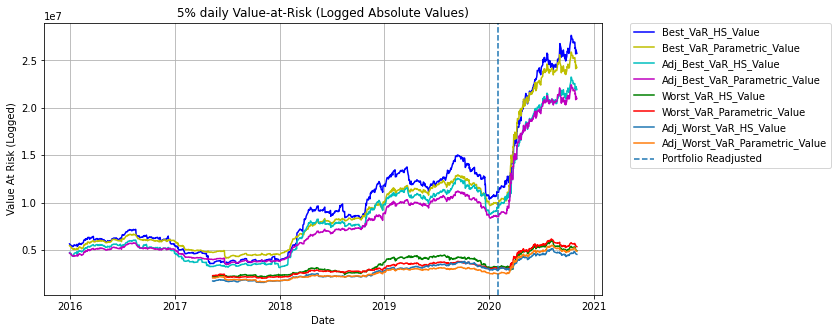

In [107]:
#plot for VaR in absolute value
plt.figure(figsize=(10,5))
plt.plot(best_returns_df['Date'], best_returns_df['VaR_HS_Value'], 'b-', label='Best_VaR_HS_Value')
plt.plot(best_returns_df['Date'], best_returns_df['VaR_Parametric_Value'], 'y-', label='Best_VaR_Parametric_Value')
plt.plot(adj_best_returns_df['Date'], adj_best_returns_df['VaR_HS_Value'], 'c-', label='Adj_Best_VaR_HS_Value')
plt.plot(adj_best_returns_df['Date'], adj_best_returns_df['VaR_Parametric_Value'], 'm-', label='Adj_Best_VaR_Parametric_Value')
plt.plot(worst_returns_df['Date'], worst_returns_df['VaR_HS_Value'], 'g-', label='Worst_VaR_HS_Value')
plt.plot(worst_returns_df['Date'], worst_returns_df['VaR_Parametric_Value'], 'r-', label='Worst_VaR_Parametric_Value')
plt.plot(adj_worst_returns_df['Date'], adj_worst_returns_df['VaR_HS_Value'], '-', label='Adj_Worst_VaR_HS_Value')
plt.plot(adj_worst_returns_df['Date'], adj_worst_returns_df['VaR_Parametric_Value'], '-', label='Adj_Worst_VaR_Parametric_Value')
#plt.xlim(date(2020, 1, 1), date(2020, 11, 1))
plt.axvline(x = date(2020, 2, 1), ls = '--', label = "Portfolio Readjusted")
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk (Logged)')
plt.title('5% daily Value-at-Risk (Logged Absolute Values)')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

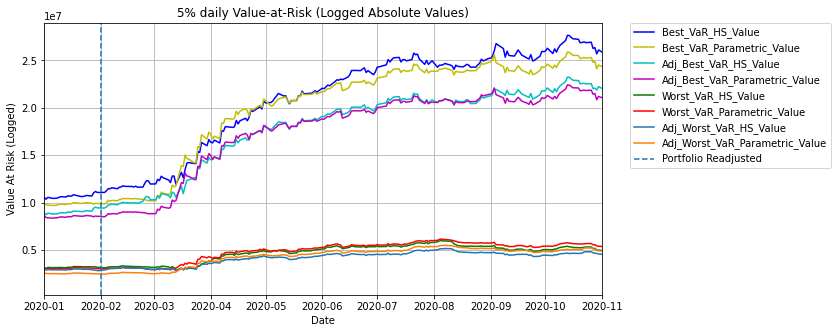

In [108]:
#plot for VaR in absolute value
plt.figure(figsize=(10,5))
plt.plot(best_returns_df['Date'], best_returns_df['VaR_HS_Value'], 'b-', label='Best_VaR_HS_Value')
plt.plot(best_returns_df['Date'], best_returns_df['VaR_Parametric_Value'], 'y-', label='Best_VaR_Parametric_Value')
plt.plot(adj_best_returns_df['Date'], adj_best_returns_df['VaR_HS_Value'], 'c-', label='Adj_Best_VaR_HS_Value')
plt.plot(adj_best_returns_df['Date'], adj_best_returns_df['VaR_Parametric_Value'], 'm-', label='Adj_Best_VaR_Parametric_Value')
plt.plot(worst_returns_df['Date'], worst_returns_df['VaR_HS_Value'], 'g-', label='Worst_VaR_HS_Value')
plt.plot(worst_returns_df['Date'], worst_returns_df['VaR_Parametric_Value'], 'r-', label='Worst_VaR_Parametric_Value')
plt.plot(adj_worst_returns_df['Date'], adj_worst_returns_df['VaR_HS_Value'], '-', label='Adj_Worst_VaR_HS_Value')
plt.plot(adj_worst_returns_df['Date'], adj_worst_returns_df['VaR_Parametric_Value'], '-', label='Adj_Worst_VaR_Parametric_Value')
plt.xlim(date(2020, 1, 1), date(2020, 11, 1))
plt.axvline(x = date(2020, 2, 1), ls = '--', label = "Portfolio Readjusted")
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk (Logged)')
plt.title('5% daily Value-at-Risk (Logged Absolute Values)')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

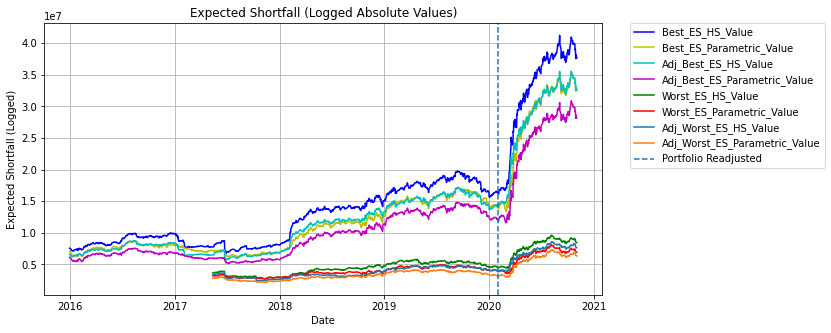

In [109]:
#plot for ES in absolute value
plt.figure(figsize=(10,5))
plt.plot(best_returns_df['Date'], best_returns_df['ES_HS_Value'], 'b-', label='Best_ES_HS_Value')
plt.plot(best_returns_df['Date'], best_returns_df['ES_Parametric_Value'], 'y-', label='Best_ES_Parametric_Value')
plt.plot(adj_best_returns_df['Date'], adj_best_returns_df['ES_HS_Value'], 'c-', label='Adj_Best_ES_HS_Value')
plt.plot(adj_best_returns_df['Date'], adj_best_returns_df['ES_Parametric_Value'], 'm-', label='Adj_Best_ES_Parametric_Value')
plt.plot(worst_returns_df['Date'], worst_returns_df['ES_HS_Value'], 'g-', label='Worst_ES_HS_Value')
plt.plot(worst_returns_df['Date'], worst_returns_df['ES_Parametric_Value'], 'r-', label='Worst_ES_Parametric_Value')
plt.plot(adj_worst_returns_df['Date'], adj_worst_returns_df['ES_HS_Value'], '-', label='Adj_Worst_ES_HS_Value')
plt.plot(adj_worst_returns_df['Date'], adj_worst_returns_df['ES_Parametric_Value'], '-', label='Adj_Worst_ES_Parametric_Value')
#plt.xlim(date(2020, 1, 1), date(2020, 11, 1))
plt.grid(True)
plt.xlabel('Date')
plt.axvline(x = date(2020, 2, 1), ls = '--', label = "Portfolio Readjusted")
plt.ylabel('Expected Shortfall (Logged)')
plt.title('Expected Shortfall (Logged Absolute Values)')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

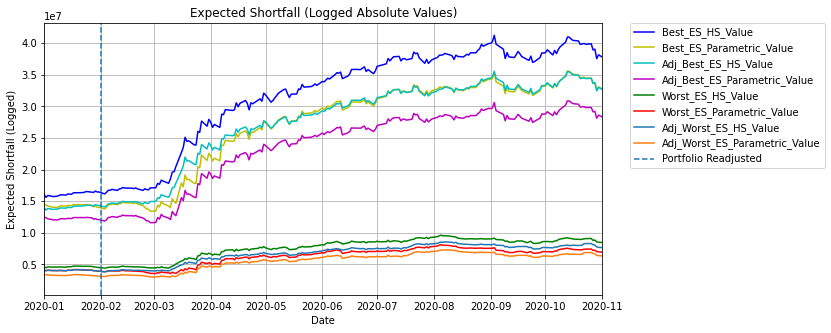

In [110]:
#plot for ES in absolute value
plt.figure(figsize=(10,5))
plt.plot(best_returns_df['Date'], best_returns_df['ES_HS_Value'], 'b-', label='Best_ES_HS_Value')
plt.plot(best_returns_df['Date'], best_returns_df['ES_Parametric_Value'], 'y-', label='Best_ES_Parametric_Value')
plt.plot(adj_best_returns_df['Date'], adj_best_returns_df['ES_HS_Value'], 'c-', label='Adj_Best_ES_HS_Value')
plt.plot(adj_best_returns_df['Date'], adj_best_returns_df['ES_Parametric_Value'], 'm-', label='Adj_Best_ES_Parametric_Value')
plt.plot(worst_returns_df['Date'], worst_returns_df['ES_HS_Value'], 'g-', label='Worst_ES_HS_Value')
plt.plot(worst_returns_df['Date'], worst_returns_df['ES_Parametric_Value'], 'r-', label='Worst_ES_Parametric_Value')
plt.plot(adj_worst_returns_df['Date'], adj_worst_returns_df['ES_HS_Value'], '-', label='Adj_Worst_ES_HS_Value')
plt.plot(adj_worst_returns_df['Date'], adj_worst_returns_df['ES_Parametric_Value'], '-', label='Adj_Worst_ES_Parametric_Value')
plt.xlim(date(2020, 1, 1), date(2020, 11, 1))
plt.grid(True)
plt.axvline(x = date(2020, 2, 1), ls = '--', label = "Portfolio Readjusted")
plt.xlabel('Date')
plt.ylabel('Expected Shortfall (Logged)')
plt.title('Expected Shortfall (Logged Absolute Values)')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

In [111]:
#In absolute values, percentage values will be below
Best_VaR_HS_Value = best_returns_df.iloc[len(best_returns_df.index)-1, best_returns_df.columns.get_loc("VaR_HS_Value")]
Best_VaR_Parametric_Value = best_returns_df.iloc[len(best_returns_df.index)-1, best_returns_df.columns.get_loc("VaR_Parametric_Value")]
Best_ES_HS_Value = best_returns_df.iloc[len(best_returns_df.index)-1, best_returns_df.columns.get_loc("ES_HS_Value")]
Best_ES_Parametric_Value = best_returns_df.iloc[len(best_returns_df.index)-1, best_returns_df.columns.get_loc("ES_Parametric_Value")]
print("Best portfolio: 5% VaR HS value is $" + str(Best_VaR_HS_Value))
print("Best portfolio: 5% VaR parametric value is $" + str(Best_VaR_Parametric_Value))
print("Best portfolio: Expected shortfall HS value is $" + str(Best_ES_HS_Value))
print("Best portfolio: Expected shortfall parametric value is $" + str(Best_ES_Parametric_Value))

Best portfolio: 5% VaR HS value is $25738887.27
Best portfolio: 5% VaR parametric value is $24241989.05
Best portfolio: Expected shortfall HS value is $37634423.78
Best portfolio: Expected shortfall parametric value is $32590993.65


In [112]:
#In absolute values, percentage values will be below
Adj_Best_VaR_HS_Value = adj_best_returns_df.iloc[len(adj_best_returns_df.index)-1, adj_best_returns_df.columns.get_loc("VaR_HS_Value")]
Adj_Best_VaR_Parametric_Value = adj_best_returns_df.iloc[len(adj_best_returns_df.index)-1, adj_best_returns_df.columns.get_loc("VaR_Parametric_Value")]
Adj_Best_ES_HS_Value = adj_best_returns_df.iloc[len(adj_best_returns_df.index)-1, adj_best_returns_df.columns.get_loc("ES_HS_Value")]
Adj_Best_ES_Parametric_Value = adj_best_returns_df.iloc[len(adj_best_returns_df.index)-1, adj_best_returns_df.columns.get_loc("ES_Parametric_Value")]
print("Adjusted best portfolio: 5% VaR HS value is $" + str(Adj_Best_VaR_HS_Value))
print("Adjusted best portfolio: 5% VaR parametric value is $" + str(Adj_Best_VaR_Parametric_Value))
print("Adjusted best portfolio: Expected shortfall HS value is $" + str(Adj_Best_ES_HS_Value))
print("Adjusted best portfolio: Expected shortfall parametric value is $" + str(Adj_Best_ES_Parametric_Value))

Adjusted best portfolio: 5% VaR HS value is $21923060.04
Adjusted best portfolio: 5% VaR parametric value is $20964121.28
Adjusted best portfolio: Expected shortfall HS value is $32546203.78
Adjusted best portfolio: Expected shortfall parametric value is $28188300.96


In [113]:
#In absolute values, percentage values will be below
Worst_VaR_HS_Value = worst_returns_df.iloc[len(worst_returns_df.index)-1, worst_returns_df.columns.get_loc("VaR_HS_Value")]
Worst_VaR_Parametric_Value = worst_returns_df.iloc[len(worst_returns_df.index)-1, worst_returns_df.columns.get_loc("VaR_Parametric_Value")]
Worst_ES_HS_Value = worst_returns_df.iloc[len(worst_returns_df.index)-1, worst_returns_df.columns.get_loc("ES_HS_Value")]
Worst_ES_Parametric_Value = worst_returns_df.iloc[len(worst_returns_df.index)-1, worst_returns_df.columns.get_loc("ES_Parametric_Value")]
print("Worst portfolio: 5% VaR HS value is $" + str(Worst_VaR_HS_Value))
print("Worst portfolio: 5% VaR parametric value is $" + str(Worst_VaR_Parametric_Value))
print("Worst portfolio: Expected shortfall HS value is $" + str(Worst_ES_HS_Value))
print("Worst portfolio: Expected shortfall parametric value is $" + str(Worst_ES_Parametric_Value))

Worst portfolio: 5% VaR HS value is $4918953.13
Worst portfolio: 5% VaR parametric value is $5338295.17
Worst portfolio: Expected shortfall HS value is $8440170.58
Worst portfolio: Expected shortfall parametric value is $6918872.6


In [114]:
#In absolute values, percentage values will be below
Adj_Worst_VaR_HS_Value = adj_worst_returns_df.iloc[len(adj_worst_returns_df.index)-1, adj_worst_returns_df.columns.get_loc("VaR_HS_Value")]
Adj_Worst_VaR_Parametric_Value = adj_worst_returns_df.iloc[len(adj_worst_returns_df.index)-1, adj_worst_returns_df.columns.get_loc("VaR_Parametric_Value")]
Adj_Worst_ES_HS_Value = adj_worst_returns_df.iloc[len(adj_worst_returns_df.index)-1, adj_worst_returns_df.columns.get_loc("ES_HS_Value")]
Adj_Worst_ES_Parametric_Value = adj_worst_returns_df.iloc[len(adj_worst_returns_df.index)-1, adj_worst_returns_df.columns.get_loc("ES_Parametric_Value")]
print("Adjusted worst portfolio: 5% VaR HS value is $" + str(Adj_Worst_VaR_HS_Value))
print("Adjusted worst portfolio: 5% VaR parametric value is $" + str(Adj_Worst_VaR_Parametric_Value))
print("Adjusted worst portfolio: Expected shortfall HS value is $" + str(Adj_Worst_ES_HS_Value))
print("Adjusted worst portfolio: Expected shortfall parametric value is $" + str(Adj_Worst_ES_Parametric_Value))

Adjusted worst portfolio: 5% VaR HS value is $4526526.58
Adjusted worst portfolio: 5% VaR parametric value is $4859196.62
Adjusted worst portfolio: Expected shortfall HS value is $7638653.49
Adjusted worst portfolio: Expected shortfall parametric value is $6328449.39


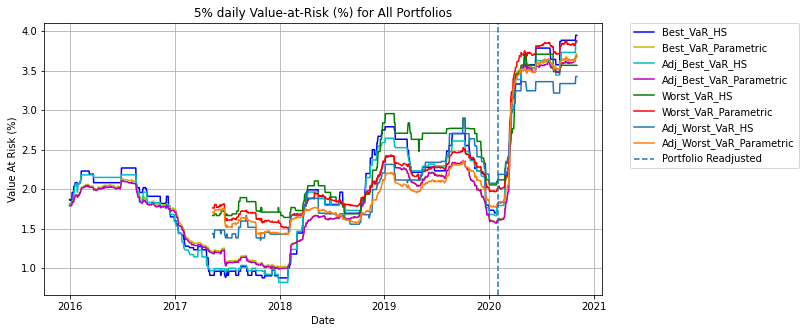

In [115]:
#plot for VaR (%)
plt.figure(figsize=(10,5))
plt.plot(best_returns_df['Date'], abs(best_returns_df['VaR_HS']*100), 'b-', label='Best_VaR_HS')
plt.plot(best_returns_df['Date'], abs(best_returns_df['VaR_Parametric']*100), 'y-', label='Best_VaR_Parametric')
plt.plot(adj_best_returns_df['Date'], abs(adj_best_returns_df['VaR_HS']*100), 'c-', label='Adj_Best_VaR_HS')
plt.plot(adj_best_returns_df['Date'], abs(adj_best_returns_df['VaR_Parametric']*100), 'm-', label='Adj_Best_VaR_Parametric')
plt.plot(worst_returns_df['Date'], abs(worst_returns_df['VaR_HS']*100), 'g-', label='Worst_VaR_HS')
plt.plot(worst_returns_df['Date'], abs(worst_returns_df['VaR_Parametric']*100), 'r-', label='Worst_VaR_Parametric')
plt.plot(adj_worst_returns_df['Date'], abs(adj_worst_returns_df['VaR_HS']*100), '-', label='Adj_Worst_VaR_HS')
plt.plot(adj_worst_returns_df['Date'], abs(adj_worst_returns_df['VaR_Parametric']*100), '-', label='Adj_Worst_VaR_Parametric')
plt.grid(True)
plt.axvline(x = date(2020, 2, 1), ls = '--', label = "Portfolio Readjusted")
plt.xlabel('Date')
plt.ylabel('Value At Risk (%)')
plt.title('5% daily Value-at-Risk (%) for All Portfolios')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

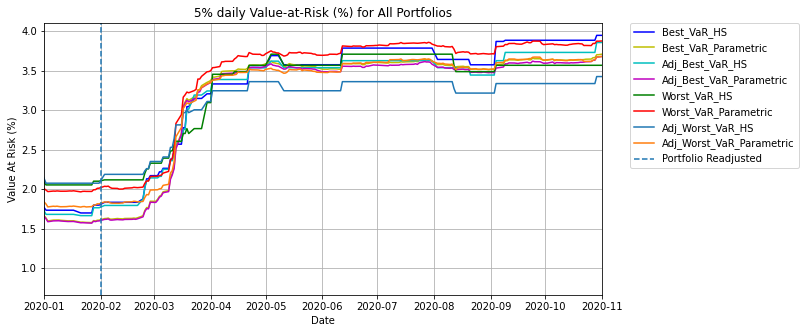

In [116]:
#plot for VaR (%)
plt.figure(figsize=(10,5))
plt.plot(best_returns_df['Date'], abs(best_returns_df['VaR_HS']*100), 'b-', label='Best_VaR_HS')
plt.plot(best_returns_df['Date'], abs(best_returns_df['VaR_Parametric']*100), 'y-', label='Best_VaR_Parametric')
plt.plot(adj_best_returns_df['Date'], abs(adj_best_returns_df['VaR_HS']*100), 'c-', label='Adj_Best_VaR_HS')
plt.plot(adj_best_returns_df['Date'], abs(adj_best_returns_df['VaR_Parametric']*100), 'm-', label='Adj_Best_VaR_Parametric')
plt.plot(worst_returns_df['Date'], abs(worst_returns_df['VaR_HS']*100), 'g-', label='Worst_VaR_HS')
plt.plot(worst_returns_df['Date'], abs(worst_returns_df['VaR_Parametric']*100), 'r-', label='Worst_VaR_Parametric')
plt.plot(adj_worst_returns_df['Date'], abs(adj_worst_returns_df['VaR_HS']*100), '-', label='Adj_Worst_VaR_HS')
plt.plot(adj_worst_returns_df['Date'], abs(adj_worst_returns_df['VaR_Parametric']*100), '-', label='Adj_Worst_VaR_Parametric')
plt.grid(True)
plt.xlim(date(2020, 1, 1), date(2020, 11, 1))
plt.axvline(x = date(2020, 2, 1), ls = '--', label = "Portfolio Readjusted")
plt.xlabel('Date')
plt.ylabel('Value At Risk (%)')
plt.title('5% daily Value-at-Risk (%) for All Portfolios')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

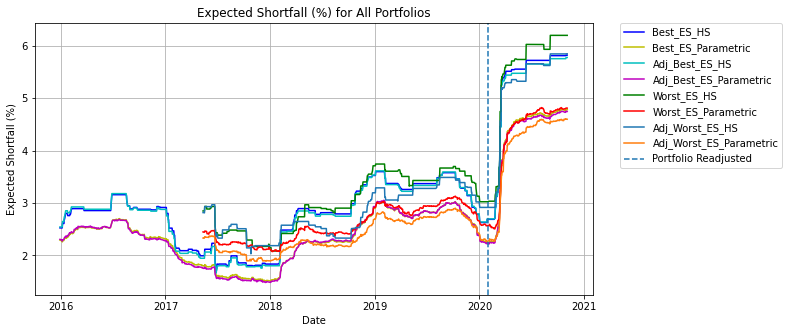

In [117]:
#plot for ES (%)
plt.figure(figsize=(10,5))
plt.plot(best_returns_df['Date'], abs(best_returns_df['ES_HS']*100), 'b-', label='Best_ES_HS')
plt.plot(best_returns_df['Date'], abs(best_returns_df['ES_Parametric']*100), 'y-', label='Best_ES_Parametric')
plt.plot(adj_best_returns_df['Date'], abs(adj_best_returns_df['ES_HS']*100), 'c-', label='Adj_Best_ES_HS')
plt.plot(adj_best_returns_df['Date'], abs(adj_best_returns_df['ES_Parametric']*100), 'm-', label='Adj_Best_ES_Parametric')
plt.plot(worst_returns_df['Date'], abs(worst_returns_df['ES_HS']*100), 'g-', label='Worst_ES_HS')
plt.plot(worst_returns_df['Date'], abs(worst_returns_df['ES_Parametric']*100), 'r-', label='Worst_ES_Parametric')
plt.plot(adj_worst_returns_df['Date'], abs(adj_worst_returns_df['ES_HS']*100), '-', label='Adj_Worst_ES_HS')
plt.plot(adj_worst_returns_df['Date'], abs(adj_worst_returns_df['ES_Parametric']*100), '-', label='Adj_Worst_ES_Parametric')
#plt.xlim(date(2020, 1, 1), date(2020, 11, 1))
plt.grid(True)
plt.axvline(x = date(2020, 2, 1), ls = '--', label = "Portfolio Readjusted")
plt.xlabel('Date')
plt.ylabel('Expected Shortfall (%)')
plt.title('Expected Shortfall (%) for All Portfolios')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

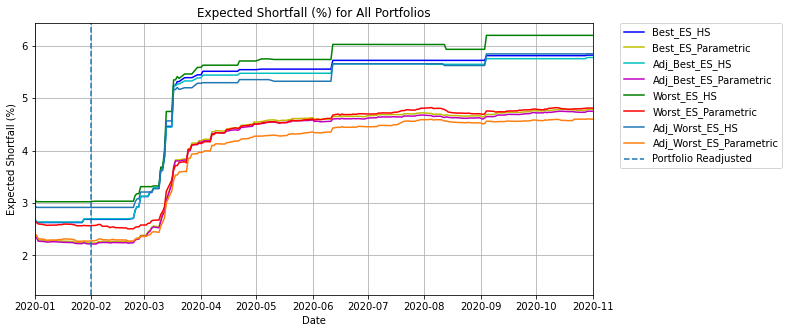

In [118]:
#plot for ES (%)
plt.figure(figsize=(10,5))
plt.plot(best_returns_df['Date'], abs(best_returns_df['ES_HS']*100), 'b-', label='Best_ES_HS')
plt.plot(best_returns_df['Date'], abs(best_returns_df['ES_Parametric']*100), 'y-', label='Best_ES_Parametric')
plt.plot(adj_best_returns_df['Date'], abs(adj_best_returns_df['ES_HS']*100), 'c-', label='Adj_Best_ES_HS')
plt.plot(adj_best_returns_df['Date'], abs(adj_best_returns_df['ES_Parametric']*100), 'm-', label='Adj_Best_ES_Parametric')
plt.plot(worst_returns_df['Date'], abs(worst_returns_df['ES_HS']*100), 'g-', label='Worst_ES_HS')
plt.plot(worst_returns_df['Date'], abs(worst_returns_df['ES_Parametric']*100), 'r-', label='Worst_ES_Parametric')
plt.plot(adj_worst_returns_df['Date'], abs(adj_worst_returns_df['ES_HS']*100), '-', label='Adj_Worst_ES_HS')
plt.plot(adj_worst_returns_df['Date'], abs(adj_worst_returns_df['ES_Parametric']*100), '-', label='Adj_Worst_ES_Parametric')
plt.xlim(date(2020, 1, 1), date(2020, 11, 1))
plt.grid(True)
plt.axvline(x = date(2020, 2, 1), ls = '--', label = "Portfolio Readjusted")
plt.xlabel('Date')
plt.ylabel('Expected Shortfall (%)')
plt.title('Expected Shortfall (%) for All Portfolios')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

In [119]:
#best portfolio in percentage
Best_VaR_HS = abs(round(best_returns_df.iloc[len(best_returns_df.index)-1, best_returns_df.columns.get_loc("VaR_HS")]*100,2))
Best_VaR_Parametric = abs(round(best_returns_df.iloc[len(best_returns_df.index)-1, best_returns_df.columns.get_loc("VaR_Parametric")]*100,2))
Best_ES_HS = abs(round(best_returns_df.iloc[len(best_returns_df.index)-1, best_returns_df.columns.get_loc("ES_HS")]*100,2))
Best_ES_Parametric = abs(round(best_returns_df.iloc[len(best_returns_df.index)-1, best_returns_df.columns.get_loc("ES_Parametric")]*100,2))
print("Best portfolio: 5% VaR HS is " + str(Best_VaR_HS) + "%")
print("Best portfolio: 5% VaR parametric is " + str(Best_VaR_Parametric) + "%")
print("Best portfolio: Expected shortfall HS is " + str(Best_ES_HS) + "%")
print("Best portfolio: Expected shortfall parametric is " + str(Best_ES_Parametric) + "%")

Best portfolio: 5% VaR HS is 3.95%
Best portfolio: 5% VaR parametric is 3.71%
Best portfolio: Expected shortfall HS is 5.82%
Best portfolio: Expected shortfall parametric is 4.78%


In [120]:
#optimised portfolio in percentage
Optimised_VaR_HS = abs(round(optimised_returns_df.iloc[len(optimised_returns_df.index)-1, optimised_returns_df.columns.get_loc("VaR_HS")]*100,2))
Optimised_VaR_Parametric = abs(round(optimised_returns_df.iloc[len(optimised_returns_df.index)-1, optimised_returns_df.columns.get_loc("VaR_Parametric")]*100,2))
Optimised_ES_HS = abs(round(optimised_returns_df.iloc[len(optimised_returns_df.index)-1, optimised_returns_df.columns.get_loc("ES_HS")]*100,2))
Optimised_ES_Parametric = abs(round(optimised_returns_df.iloc[len(optimised_returns_df.index)-1, optimised_returns_df.columns.get_loc("ES_Parametric")]*100,2))
print("Optimised portfolio: 5% VaR HS is " + str(Optimised_VaR_HS) + "%")
print("Optimised portfolio: 5% VaR parametric is " + str(Optimised_VaR_Parametric) + "%")
print("Optimised portfolio: Expected shortfall HS is " + str(Optimised_ES_HS) + "%")
print("Optimised portfolio: Expected shortfall parametric is " + str(Optimised_ES_Parametric) + "%")

Optimised portfolio: 5% VaR HS is 3.83%
Optimised portfolio: 5% VaR parametric is 3.73%
Optimised portfolio: Expected shortfall HS is 5.92%
Optimised portfolio: Expected shortfall parametric is 4.77%


In [121]:
#benchmark portfolio in percentage
Benchmark_VaR_HS = abs(round(benchmark_returns_df.iloc[len(benchmark_returns_df.index)-1, benchmark_returns_df.columns.get_loc("VaR_HS")]*100,2))
Benchmark_VaR_Parametric = abs(round(benchmark_returns_df.iloc[len(benchmark_returns_df.index)-1, benchmark_returns_df.columns.get_loc("VaR_Parametric")]*100,2))
Benchmark_ES_HS = abs(round(benchmark_returns_df.iloc[len(benchmark_returns_df.index)-1, benchmark_returns_df.columns.get_loc("ES_HS")]*100,2))
Benchmark_ES_Parametric = abs(round(benchmark_returns_df.iloc[len(benchmark_returns_df.index)-1, benchmark_returns_df.columns.get_loc("ES_Parametric")]*100,2))
print("Benchmark portfolio: 5% VaR HS is " + str(Benchmark_VaR_HS) + "%")
print("Benchmark portfolio: 5% VaR parametric is " + str(Benchmark_VaR_Parametric) + "%")
print("Benchmark portfolio: Expected shortfall HS is " + str(Benchmark_ES_HS) + "%")
print("Benchmark portfolio: Expected shortfall parametric is " + str(Benchmark_ES_Parametric) + "%")

Benchmark portfolio: 5% VaR HS is 3.73%
Benchmark portfolio: 5% VaR parametric is 4.25%
Benchmark portfolio: Expected shortfall HS is 7.07%
Benchmark portfolio: Expected shortfall parametric is 5.66%


In [122]:
#adj best portfolio in percentage
Adj_Best_VaR_HS = abs(round(adj_best_returns_df.iloc[len(adj_best_returns_df.index)-1, adj_best_returns_df.columns.get_loc("VaR_HS")]*100,2))
Adj_Best_VaR_Parametric = abs(round(adj_best_returns_df.iloc[len(adj_best_returns_df.index)-1, adj_best_returns_df.columns.get_loc("VaR_Parametric")]*100,2))
Adj_Best_ES_HS = abs(round(adj_best_returns_df.iloc[len(adj_best_returns_df.index)-1, adj_best_returns_df.columns.get_loc("ES_HS")]*100,2))
Adj_Best_ES_Parametric = abs(round(adj_best_returns_df.iloc[len(adj_best_returns_df.index)-1, adj_best_returns_df.columns.get_loc("ES_Parametric")]*100,2))
print("Adjusted best portfolio: 5% VaR HS is " + str(Adj_Best_VaR_HS) + "%")
print("Adjusted best portfolio: 5% VaR parametric is " + str(Adj_Best_VaR_Parametric) + "%")
print("Adjusted best portfolio: Expected shortfall HS is " + str(Adj_Best_ES_HS) + "%")
print("Adjusted best portfolio: Expected shortfall parametric is " + str(Adj_Best_ES_Parametric) + "%")

Adjusted best portfolio: 5% VaR HS is 3.86%
Adjusted best portfolio: 5% VaR parametric is 3.68%
Adjusted best portfolio: Expected shortfall HS is 5.78%
Adjusted best portfolio: Expected shortfall parametric is 4.75%


In [123]:
#worst portfolio in percentage
Worst_VaR_HS = abs(round(worst_returns_df.iloc[len(worst_returns_df.index)-1, worst_returns_df.columns.get_loc("VaR_HS")]*100,2))
Worst_VaR_Parametric = abs(round(worst_returns_df.iloc[len(worst_returns_df.index)-1, worst_returns_df.columns.get_loc("VaR_Parametric")]*100,2))
Worst_ES_HS = abs(round(worst_returns_df.iloc[len(worst_returns_df.index)-1, worst_returns_df.columns.get_loc("ES_HS")]*100,2))
Worst_ES_Parametric = abs(round(worst_returns_df.iloc[len(worst_returns_df.index)-1, worst_returns_df.columns.get_loc("ES_Parametric")]*100,2))
print("Worst portfolio: 5% VaR HS is " + str(Worst_VaR_HS) + "%")
print("Worst portfolio: 5% VaR parametric is " + str(Worst_VaR_Parametric) + "%")
print("Worst portfolio: Expected shortfall HS is " + str(Worst_ES_HS) + "%")
print("Worst portfolio: Expected shortfall parametric is " + str(Worst_ES_Parametric) + "%")

Worst portfolio: 5% VaR HS is 3.57%
Worst portfolio: 5% VaR parametric is 3.88%
Worst portfolio: Expected shortfall HS is 6.2%
Worst portfolio: Expected shortfall parametric is 4.81%


In [124]:
#adj worst portfolio in percentage
Adj_Worst_VaR_HS = abs(round(adj_worst_returns_df.iloc[len(adj_worst_returns_df.index)-1, adj_worst_returns_df.columns.get_loc("VaR_HS")]*100,2))
Adj_Worst_VaR_Parametric = abs(round(adj_worst_returns_df.iloc[len(adj_worst_returns_df.index)-1, adj_worst_returns_df.columns.get_loc("VaR_Parametric")]*100,2))
Adj_Worst_ES_HS = abs(round(adj_worst_returns_df.iloc[len(adj_worst_returns_df.index)-1, adj_worst_returns_df.columns.get_loc("ES_HS")]*100,2))
Adj_Worst_ES_Parametric = abs(round(adj_worst_returns_df.iloc[len(adj_worst_returns_df.index)-1, adj_worst_returns_df.columns.get_loc("ES_Parametric")]*100,2))
print("Adjusted worst portfolio: 5% VaR HS is " + str(Adj_Worst_VaR_HS) + "%")
print("Adjusted worst portfolio: 5% VaR parametric is " + str(Adj_Worst_VaR_Parametric) + "%")
print("Adjusted worst portfolio: Expected shortfall HS is " + str(Adj_Worst_ES_HS) + "%")
print("Adjusted worst portfolio: Expected shortfall parametric is " + str(Adj_Worst_ES_Parametric) + "%")

Adjusted worst portfolio: 5% VaR HS is 3.42%
Adjusted worst portfolio: 5% VaR parametric is 3.68%
Adjusted worst portfolio: Expected shortfall HS is 5.85%
Adjusted worst portfolio: Expected shortfall parametric is 4.6%


# Extra: Changes to sector weights

# Monthly return

In [126]:
#calculating monthly returns for best_returns_df3
jan_start = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-01-02')[0])), 'portfolio_value'].tolist()[0]
jan_end = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-01-31')[0])), 'portfolio_value'].tolist()[0]
feb_start = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-02-03')[0])), 'portfolio_value'].tolist()[0]
feb_end = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-02-28')[0])), 'portfolio_value'].tolist()[0]
mar_start = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-03-02')[0])), 'portfolio_value'].tolist()[0]
mar_end = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-03-31')[0])), 'portfolio_value'].tolist()[0]
apr_start = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-04-01')[0])), 'portfolio_value'].tolist()[0]
apr_end = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-04-30')[0])), 'portfolio_value'].tolist()[0]
may_start = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-05-01')[0])), 'portfolio_value'].tolist()[0]
may_end = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-05-29')[0])), 'portfolio_value'].tolist()[0]
jun_start = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-06-01')[0])), 'portfolio_value'].tolist()[0]
jun_end = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-06-30')[0])), 'portfolio_value'].tolist()[0]
jul_start = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-07-01')[0])), 'portfolio_value'].tolist()[0]
jul_end = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-07-31')[0])), 'portfolio_value'].tolist()[0]
aug_start = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-08-03')[0])), 'portfolio_value'].tolist()[0]
aug_end = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-08-31')[0])), 'portfolio_value'].tolist()[0]
sep_start = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-09-01')[0])), 'portfolio_value'].tolist()[0]
sep_end = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-09-30')[0])), 'portfolio_value'].tolist()[0]
oct_start = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-10-01')[0])), 'portfolio_value'].tolist()[0]
oct_end = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-10-30')[0])), 'portfolio_value'].tolist()[0]
nov_start = best_returns_df3.loc[(list(np.where(best_returns_df3["Date"]=='2020-11-02')[0])), 'portfolio_value'].tolist()[0]
b_start = [jan_start, feb_start, mar_start, apr_start, may_start, jun_start, jul_start, aug_start, sep_start, oct_start, nov_start]
b_end = [jan_end, feb_end, mar_end, apr_end, may_end, jun_end, jul_end, aug_end, sep_end, oct_end]
b_month_data = []
for i in range(len(b_start)-1):
    b_month_data.append(round((np.log(b_end[i]/b_start[i]))*100,2))
best_data = {'Monthly Logged Returns (%)': b_month_data}
best_monthly = pd.DataFrame(data = best_data, index = ['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020'])
best_monthly


Monthly Logged Returns (%)
Jan 2020                       -0.70
Feb 2020                      -10.36
Mar 2020                      -11.05
Apr 2020                       17.04
May 2020                       10.16
Jun 2020                        4.15
Jul 2020                        3.61
Aug 2020                        4.77
Sep 2020                       -5.93
Oct 2020                       -3.64

In [127]:
#calculating monthly returns for adj_best_returns_df3
jan_start = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-01-02')[0])), 'portfolio_value'].tolist()[0]
jan_end = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-01-31')[0])), 'portfolio_value'].tolist()[0]
feb_start = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-02-03')[0])), 'portfolio_value'].tolist()[0]
feb_end = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-02-28')[0])), 'portfolio_value'].tolist()[0]
mar_start = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-03-02')[0])), 'portfolio_value'].tolist()[0]
mar_end = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-03-31')[0])), 'portfolio_value'].tolist()[0]
apr_start = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-04-01')[0])), 'portfolio_value'].tolist()[0]
apr_end = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-04-30')[0])), 'portfolio_value'].tolist()[0]
may_start = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-05-01')[0])), 'portfolio_value'].tolist()[0]
may_end = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-05-29')[0])), 'portfolio_value'].tolist()[0]
jun_start = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-06-01')[0])), 'portfolio_value'].tolist()[0]
jun_end = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-06-30')[0])), 'portfolio_value'].tolist()[0]
jul_start = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-07-01')[0])), 'portfolio_value'].tolist()[0]
jul_end = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-07-31')[0])), 'portfolio_value'].tolist()[0]
aug_start = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-08-03')[0])), 'portfolio_value'].tolist()[0]
aug_end = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-08-31')[0])), 'portfolio_value'].tolist()[0]
sep_start = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-09-01')[0])), 'portfolio_value'].tolist()[0]
sep_end = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-09-30')[0])), 'portfolio_value'].tolist()[0]
oct_start = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-10-01')[0])), 'portfolio_value'].tolist()[0]
oct_end = adj_best_returns_df3.loc[(list(np.where(adj_best_returns_df3["Date"]=='2020-10-30')[0])), 'portfolio_value'].tolist()[0]
adj_b_start = [jan_start, feb_start, mar_start, apr_start, may_start, jun_start, jul_start, aug_start, sep_start, oct_start]
adj_b_end = [jan_end, feb_end, mar_end, apr_end, may_end, jun_end, jul_end, aug_end, sep_end, oct_end]
adj_b_month_data = []
for i in range(len(adj_b_start)):
    adj_b_month_data.append(round((np.log(adj_b_end[i]/adj_b_start[i]))*100,2))
adj_best_data = {'Monthly Logged Returns (%)': adj_b_month_data}
adj_best_monthly = pd.DataFrame(data = adj_best_data, index = ['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020'])
adj_best_monthly

Monthly Logged Returns (%)
Jan 2020                       -0.53
Feb 2020                       -9.95
Mar 2020                      -10.47
Apr 2020                       16.88
May 2020                        9.82
Jun 2020                        3.98
Jul 2020                        3.27
Aug 2020                        5.10
Sep 2020                       -5.81
Oct 2020                       -4.00

In [128]:
#calculating monthly returns for worst_returns_df3
jan_start = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-01-02')[0])), 'portfolio_value'].tolist()[0]
jan_end = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-01-31')[0])), 'portfolio_value'].tolist()[0]
feb_start = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-02-03')[0])), 'portfolio_value'].tolist()[0]
feb_end = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-02-28')[0])), 'portfolio_value'].tolist()[0]
mar_start = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-03-02')[0])), 'portfolio_value'].tolist()[0]
mar_end = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-03-31')[0])), 'portfolio_value'].tolist()[0]
apr_start = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-04-01')[0])), 'portfolio_value'].tolist()[0]
apr_end = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-04-30')[0])), 'portfolio_value'].tolist()[0]
may_start = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-05-01')[0])), 'portfolio_value'].tolist()[0]
may_end = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-05-29')[0])), 'portfolio_value'].tolist()[0]
jun_start = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-06-01')[0])), 'portfolio_value'].tolist()[0]
jun_end = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-06-30')[0])), 'portfolio_value'].tolist()[0]
jul_start = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-07-01')[0])), 'portfolio_value'].tolist()[0]
jul_end = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-07-31')[0])), 'portfolio_value'].tolist()[0]
aug_start = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-08-03')[0])), 'portfolio_value'].tolist()[0]
aug_end = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-08-31')[0])), 'portfolio_value'].tolist()[0]
sep_start = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-09-01')[0])), 'portfolio_value'].tolist()[0]
sep_end = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-09-30')[0])), 'portfolio_value'].tolist()[0]
oct_start = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-10-01')[0])), 'portfolio_value'].tolist()[0]
oct_end = worst_returns_df3.loc[(list(np.where(worst_returns_df3["Date"]=='2020-10-30')[0])), 'portfolio_value'].tolist()[0]
w_start = [jan_start, feb_start, mar_start, apr_start, may_start, jun_start, jul_start, aug_start, sep_start, oct_start]
w_end = [jan_end, feb_end, mar_end, apr_end, may_end, jun_end, jul_end, aug_end, sep_end, oct_end]
w_month_data = []
for i in range(len(w_start)):
    w_month_data.append(round((np.log(w_end[i]/w_start[i]))*100,2))
worst_data = {'Monthly Logged Returns (%)': w_month_data}
worst_monthly = pd.DataFrame(data = worst_data, index = ['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020'])
worst_monthly

Monthly Logged Returns (%)
Jan 2020                       -4.58
Feb 2020                       -8.82
Mar 2020                      -12.84
Apr 2020                       15.03
May 2020                       10.03
Jun 2020                        2.34
Jul 2020                        9.08
Aug 2020                       -3.89
Sep 2020                       -9.38
Oct 2020                       -2.28

In [129]:
#calculating monthly returns for adj_worst_returns_df3
jan_start = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-01-02')[0])), 'portfolio_value'].tolist()[0]
jan_end = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-01-31')[0])), 'portfolio_value'].tolist()[0]
feb_start = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-02-03')[0])), 'portfolio_value'].tolist()[0]
feb_end = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-02-28')[0])), 'portfolio_value'].tolist()[0]
mar_start = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-03-02')[0])), 'portfolio_value'].tolist()[0]
mar_end = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-03-31')[0])), 'portfolio_value'].tolist()[0]
apr_start = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-04-01')[0])), 'portfolio_value'].tolist()[0]
apr_end = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-04-30')[0])), 'portfolio_value'].tolist()[0]
may_start = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-05-01')[0])), 'portfolio_value'].tolist()[0]
may_end = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-05-29')[0])), 'portfolio_value'].tolist()[0]
jun_start = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-06-01')[0])), 'portfolio_value'].tolist()[0]
jun_end = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-06-30')[0])), 'portfolio_value'].tolist()[0]
jul_start = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-07-01')[0])), 'portfolio_value'].tolist()[0]
jul_end = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-07-31')[0])), 'portfolio_value'].tolist()[0]
aug_start = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-08-03')[0])), 'portfolio_value'].tolist()[0]
aug_end = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-08-31')[0])), 'portfolio_value'].tolist()[0]
sep_start = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-09-01')[0])), 'portfolio_value'].tolist()[0]
sep_end = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-09-30')[0])), 'portfolio_value'].tolist()[0]
oct_start = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-10-01')[0])), 'portfolio_value'].tolist()[0]
oct_end = adj_worst_returns_df3.loc[(list(np.where(adj_worst_returns_df3["Date"]=='2020-10-30')[0])), 'portfolio_value'].tolist()[0]
adj_w_start = [jan_start, feb_start, mar_start, apr_start, may_start, jun_start, jul_start, aug_start, sep_start, oct_start]
adj_w_end = [jan_end, feb_end, mar_end, apr_end, may_end, jun_end, jul_end, aug_end, sep_end, oct_end]
adj_w_month_data = []
for i in range(len(adj_w_start)):
    adj_w_month_data.append(round((np.log(adj_w_end[i]/adj_w_start[i]))*100,2))
adj_worst_data = {'Monthly Logged Returns (%)': adj_w_month_data}
adj_worst_monthly = pd.DataFrame(data = adj_worst_data, index = ['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020'])
adj_worst_monthly

Monthly Logged Returns (%)
Jan 2020                       -6.02
Feb 2020                       -7.04
Mar 2020                      -10.12
Apr 2020                       14.42
May 2020                        8.72
Jun 2020                       -0.85
Jul 2020                       10.69
Aug 2020                       -3.49
Sep 2020                       -9.54
Oct 2020                       -0.45

In [130]:
returns_data = {'Best': best_monthly['Monthly Logged Returns (%)'], 'Adjusted Best': adj_best_monthly['Monthly Logged Returns (%)'], 
             'Worst': worst_monthly['Monthly Logged Returns (%)'], 'Adjusted Worst': adj_worst_monthly['Monthly Logged Returns (%)']}
monthly_returns = pd.DataFrame(returns_data)
monthly_returns

Best  Adjusted Best  Worst  Adjusted Worst
Jan 2020  -0.70          -0.53  -4.58           -6.02
Feb 2020 -10.36          -9.95  -8.82           -7.04
Mar 2020 -11.05         -10.47 -12.84          -10.12
Apr 2020  17.04          16.88  15.03           14.42
May 2020  10.16           9.82  10.03            8.72
Jun 2020   4.15           3.98   2.34           -0.85
Jul 2020   3.61           3.27   9.08           10.69
Aug 2020   4.77           5.10  -3.89           -3.49
Sep 2020  -5.93          -5.81  -9.38           -9.54
Oct 2020  -3.64          -4.00  -2.28           -0.45

In [131]:
#95th percentile value of daily returns
best_quantiles05 = round((best_returns_df3['Daily_Returns'].quantile([0.05])).tolist()[0], 5)
adj_best_quantiles05 = round((adj_best_returns_df3['Daily_Returns'].quantile([0.05])).tolist()[0], 5)
worst_quantiles05 = round((worst_returns_df3['Daily_Returns'].quantile([0.05])).tolist()[0], 5)
adj_worst_quantiles05 = round((adj_worst_returns_df3['Daily_Returns'].quantile([0.05])).tolist()[0], 5)
print("Best: " + str(best_quantiles05))
print("Adjusted best: " + str(adj_best_quantiles05))
print("Worst: " + str(worst_quantiles05))
print("Adjusted worst: " + str(adj_worst_quantiles05))
#can see that the 95th percentile value of daily returns for best and adjusted best portfolio is very similar, 
#while there is 0.02 difference for the worst and adjusted worst portfolio. 

Best: 0.97826
Adjusted best: 0.97848
Worst: 0.97513
Adjusted worst: 0.97749


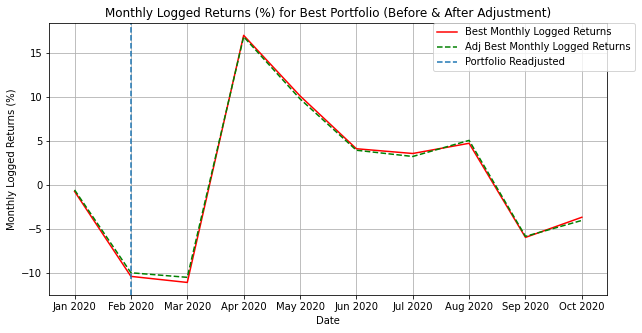

In [132]:
plt.figure(figsize=(10,5))
plt.plot(best_monthly['Monthly Logged Returns (%)'], 'r-', label='Best Monthly Logged Returns')
plt.plot(adj_best_monthly['Monthly Logged Returns (%)'], 'g--', label='Adj Best Monthly Logged Returns')
plt.grid(True)
plt.xlabel('Date')
plt.axvline(x = 'Feb 2020', ls = '--', label = "Portfolio Readjusted")
plt.ylabel('Monthly Logged Returns (%)')
plt.title('Monthly Logged Returns (%) for Best Portfolio (Before & After Adjustment)')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

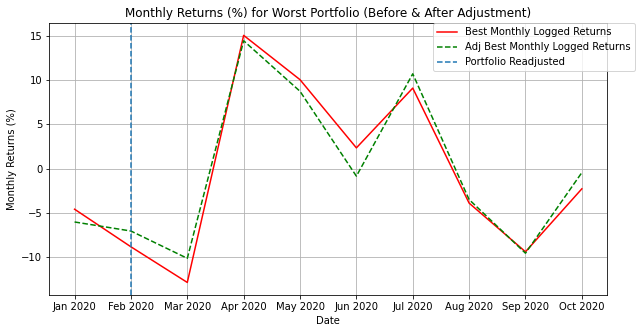

In [133]:
plt.figure(figsize=(10,5))
plt.plot(worst_monthly['Monthly Logged Returns (%)'], 'r-', label='Best Monthly Logged Returns')
plt.plot(adj_worst_monthly['Monthly Logged Returns (%)'], 'g--', label='Adj Best Monthly Logged Returns')
plt.grid(True)
plt.xlabel('Date')
plt.axvline(x = 'Feb 2020', ls = '--', label = "Portfolio Readjusted")
plt.ylabel('Monthly Returns (%)')
plt.title('Monthly Returns (%) for Worst Portfolio (Before & After Adjustment)')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

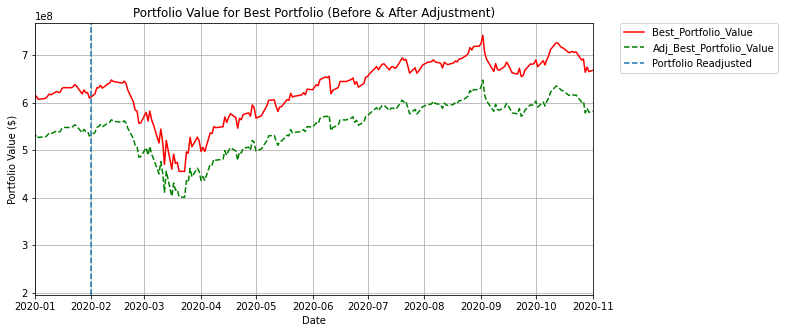

In [134]:
#plot for daily returns 
plt.figure(figsize=(10,5))
plt.plot(best_returns_df['Date'], best_returns_df['portfolio_value'], 'r-', label='Best_Portfolio_Value')
plt.plot(adj_best_returns_df['Date'], adj_best_returns_df['portfolio_value'], 'g--', label='Adj_Best_Portfolio_Value')
plt.grid(True)
plt.xlabel('Date')
plt.xlim(date(2020, 1, 1), date(2020, 11, 1))
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value for Best Portfolio (Before & After Adjustment)')
plt.axvline(x = date(2020, 2, 1), ls = '--', label = "Portfolio Readjusted")
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

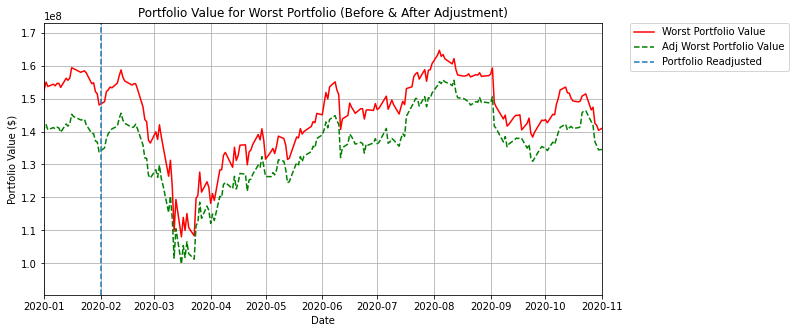

In [135]:
#plot for daily returns 
plt.figure(figsize=(10,5))
plt.plot(worst_returns_df['Date'], worst_returns_df['portfolio_value'], 'r-', label='Worst Portfolio Value')
plt.plot(adj_worst_returns_df['Date'], adj_worst_returns_df['portfolio_value'], 'g--', label='Adj Worst Portfolio Value')
plt.grid(True)
plt.xlabel('Date')
plt.xlim(date(2020, 1, 1), date(2020, 11, 1))
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value for Worst Portfolio (Before & After Adjustment)')
plt.axvline(x = date(2020, 2, 1), ls = '--', label = "Portfolio Readjusted")
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

### Look at the changes in portfolio values based on a 100k investment into each fund

In [136]:
funds = ["Best", "Adjusted Best", "Worst", "Adjusted Worst"]
months = ['Feb 2020', 'Oct 2020', 'Changes']
investments = pd.DataFrame(columns = funds, index = months)
investments.iloc[0] = 100000
funds_data = [best_returns_df3, adj_best_returns_df3, worst_returns_df3, adj_worst_returns_df3]
oct_investment = []
changes = []
for data in funds_data:
    investment = 100000 #start with 100k invested into the fund
    feb_start = data.loc[(list(np.where(data["Date"]=='2020-01-02')[0])), 'portfolio_value'].tolist()[0]
    oct_end = data.loc[(list(np.where(data["Date"]=='2020-10-30')[0])), 'portfolio_value'].tolist()[0]
    oct_investment.append(round(oct_end/feb_start*investment,2))
    changes.append(round(oct_end/feb_start*investment - investment,2))    
investments.iloc[1] = oct_investment
investments.iloc[2] = changes

In [137]:
investments

Best Adjusted Best    Worst Adjusted Worst
Feb 2020   100000        100000   100000         100000
Oct 2020   108402        108866  90551.1        94602.3
Changes   8401.56       8866.09 -9448.91       -5397.71

# Standard deviation by daily return for each month

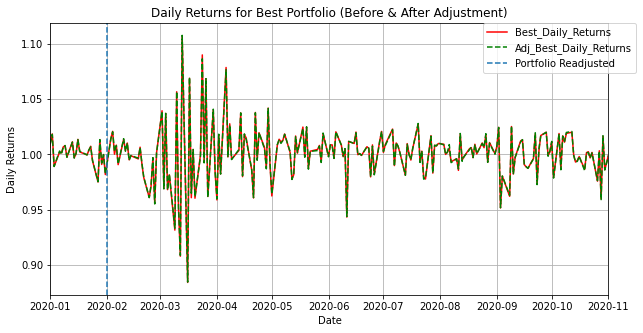

In [138]:
#plot for daily returns 
plt.figure(figsize=(10,5))
plt.plot(best_returns_df['Date'], best_returns_df['Daily_Returns'], 'r-', label='Best_Daily_Returns')
plt.plot(adj_best_returns_df['Date'], adj_best_returns_df['Daily_Returns'], 'g--', label='Adj_Best_Daily_Returns')
plt.grid(True)
plt.xlabel('Date')
plt.xlim(date(2020, 1, 1), date(2020, 11, 1))
plt.ylabel('Daily Returns')
plt.title('Daily Returns for Best Portfolio (Before & After Adjustment)')
plt.axvline(x = date(2020, 2, 1), ls = '--', label = "Portfolio Readjusted")
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

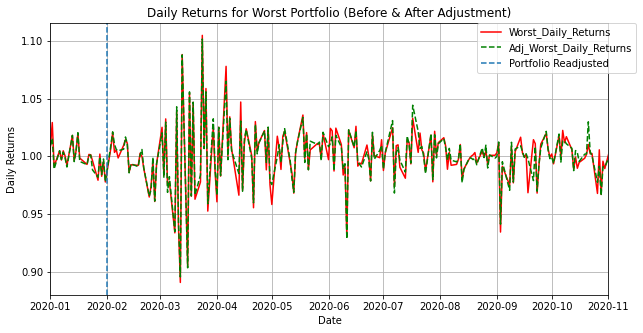

In [139]:
#plot for daily returns 
plt.figure(figsize=(10,5))
plt.plot(worst_returns_df['Date'], worst_returns_df['Daily_Returns'], 'r-', label='Worst_Daily_Returns')
plt.plot(adj_worst_returns_df['Date'], adj_worst_returns_df['Daily_Returns'], 'g--', label='Adj_Worst_Daily_Returns')
plt.grid(True)
plt.xlabel('Date')
plt.xlim(date(2020, 1, 1), date(2020, 11, 1))
plt.axvline(x = date(2020, 2, 1), ls = '--', label = "Portfolio Readjusted")
plt.ylabel('Daily Returns')
plt.title('Daily Returns for Worst Portfolio (Before & After Adjustment)')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

In [140]:
best_returns_df4 = deepcopy(best_returns_df)
best_returns_df4.set_index('Date', inplace=True)
best_risk = pd.DataFrame(best_returns_df4['log_return'].resample('M').std())
best_risk['Annualised Std'] = best_risk['log_return']*math.sqrt(252)
best_risk.columns = ['Monthly Std', 'Annualised Monthly Std']
best_risk = best_risk.loc[date(2020, 1, 1):date(2020, 11, 1)]
best_risk

Monthly Std  Annualised Monthly Std
Date                                           
2020-01-31     0.010574                0.167865
2020-02-29     0.017958                0.285073
2020-03-31     0.059090                0.938022
2020-04-30     0.028277                0.448884
2020-05-31     0.016408                0.260469
2020-06-30     0.017086                0.271237
2020-07-31     0.013475                0.213904
2020-08-31     0.008284                0.131512
2020-09-30     0.020320                0.322574
2020-10-31     0.015843                0.251499

In [141]:
adj_best_returns_df4 = deepcopy(adj_best_returns_df)
adj_best_returns_df4.set_index('Date', inplace=True)
adj_best_risk = pd.DataFrame(adj_best_returns_df4['log_return'].resample('M').std())
adj_best_risk['Annualised Std'] = adj_best_risk['log_return']*math.sqrt(252)
adj_best_risk.columns = ['Monthly Std', 'Annualised Monthly Std']
adj_best_risk = adj_best_risk.loc[date(2020, 1, 1):date(2020, 11, 1)]
adj_best_risk

Monthly Std  Annualised Monthly Std
Date                                           
2020-01-31     0.010382                0.164810
2020-02-29     0.017888                0.283970
2020-03-31     0.058621                0.930575
2020-04-30     0.027830                0.441791
2020-05-31     0.016054                0.254852
2020-06-30     0.016938                0.268879
2020-07-31     0.013585                0.215661
2020-08-31     0.008395                0.133274
2020-09-30     0.020394                0.323742
2020-10-31     0.016132                0.256091

In [142]:
worst_returns_df4 = deepcopy(worst_returns_df)
worst_returns_df4.set_index('Date', inplace=True)
worst_risk = pd.DataFrame(worst_returns_df4['log_return'].resample('M').std())
worst_risk['Annualised Std'] = worst_risk['log_return']*math.sqrt(252)
worst_risk.columns = ['Monthly Std', 'Annualised Monthly Std']
worst_risk = worst_risk.loc[date(2020, 1, 1):date(2020, 11, 1)]
worst_risk

Monthly Std  Annualised Monthly Std
Date                                           
2020-01-31     0.012458                0.197771
2020-02-29     0.016086                0.255353
2020-03-31     0.056858                0.902587
2020-04-30     0.030503                0.484214
2020-05-31     0.018904                0.300090
2020-06-30     0.021775                0.345669
2020-07-31     0.015906                0.252499
2020-08-31     0.008209                0.130319
2020-09-30     0.021231                0.337027
2020-10-31     0.013884                0.220398

In [143]:
adj_worst_returns_df4 = deepcopy(adj_worst_returns_df)
adj_worst_returns_df4.set_index('Date', inplace=True)
adj_worst_risk = pd.DataFrame(adj_worst_returns_df4['log_return'].resample('M').std())
adj_worst_risk['Annualised Std'] = adj_worst_risk['log_return']*math.sqrt(252)
adj_worst_risk.columns = ['Monthly Std', 'Annualised Monthly Std']
adj_worst_risk = adj_worst_risk.loc[date(2020, 1, 1):date(2020, 11, 1)]
adj_worst_risk

Monthly Std  Annualised Monthly Std
Date                                           
2020-01-31     0.011163                0.177202
2020-02-29     0.016870                0.267810
2020-03-31     0.055677                0.883844
2020-04-30     0.026027                0.413158
2020-05-31     0.016691                0.264961
2020-06-30     0.020652                0.327846
2020-07-31     0.017371                0.275752
2020-08-31     0.008574                0.136109
2020-09-30     0.018955                0.300903
2020-10-31     0.013816                0.219320

In [144]:
risk_data = {'Best': best_risk['Annualised Monthly Std'], 'Adjusted Best': adj_best_risk['Annualised Monthly Std'], 
             'Worst': worst_risk['Annualised Monthly Std'], 'Adjusted Worst': adj_worst_risk['Annualised Monthly Std']}
monthly_risk = pd.DataFrame(risk_data)
monthly_risk

Best  Adjusted Best     Worst  Adjusted Worst
Date                                                         
2020-01-31  0.167865       0.164810  0.197771        0.177202
2020-02-29  0.285073       0.283970  0.255353        0.267810
2020-03-31  0.938022       0.930575  0.902587        0.883844
2020-04-30  0.448884       0.441791  0.484214        0.413158
2020-05-31  0.260469       0.254852  0.300090        0.264961
2020-06-30  0.271237       0.268879  0.345669        0.327846
2020-07-31  0.213904       0.215661  0.252499        0.275752
2020-08-31  0.131512       0.133274  0.130319        0.136109
2020-09-30  0.322574       0.323742  0.337027        0.300903
2020-10-31  0.251499       0.256091  0.220398        0.219320

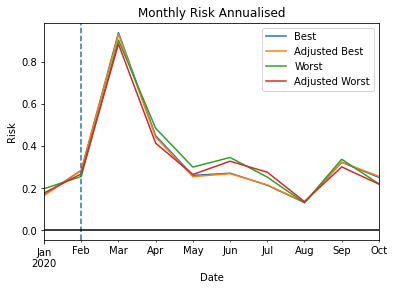

In [147]:
monthly_risk.plot()
plt.title("Monthly Risk Annualised")
plt.ylabel("Risk")
plt.axvline(x = date(2020, 2, 1), ls = '--', label = "Portfolio Readjusted")
plt.axhline(y=0, color='black', linestyle='-')

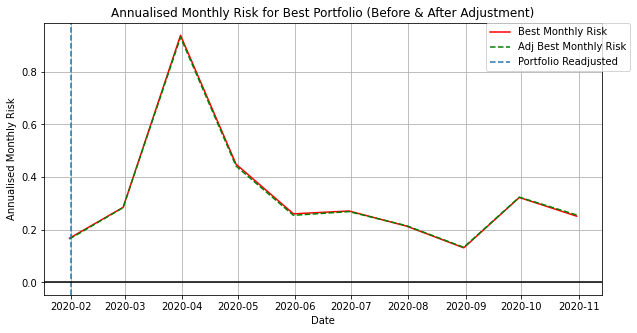

In [148]:
plt.figure(figsize=(10,5))
plt.plot(monthly_risk['Best'], 'r-', label='Best Monthly Risk')
plt.plot(monthly_risk['Adjusted Best'], 'g--', label='Adj Best Monthly Risk')
plt.grid(True)
plt.xlabel('Date')
plt.axvline(x = "2020-02-01", ls = '--', label = "Portfolio Readjusted")
plt.ylabel('Annualised Monthly Risk')
plt.title('Annualised Monthly Risk for Best Portfolio (Before & After Adjustment)')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.axhline(y=0, color='black', linestyle='-')
locs, labels = plt.xticks()
plt.show()

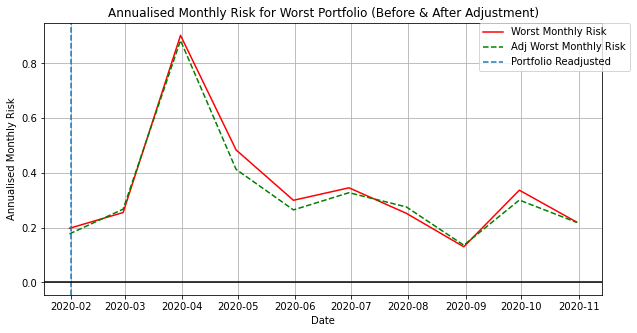

In [149]:
plt.figure(figsize=(10,5))
plt.plot(monthly_risk['Worst'], 'r-', label='Worst Monthly Risk')
plt.plot(monthly_risk['Adjusted Worst'], 'g--', label='Adj Worst Monthly Risk')
plt.grid(True)
plt.xlabel('Date')
plt.axvline(x = "2020-02-01", ls = '--', label = "Portfolio Readjusted")
plt.ylabel('Annualised Monthly Risk')
plt.title('Annualised Monthly Risk for Worst Portfolio (Before & After Adjustment)')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.axhline(y=0, color='black', linestyle='-')
locs, labels = plt.xticks()
plt.show()

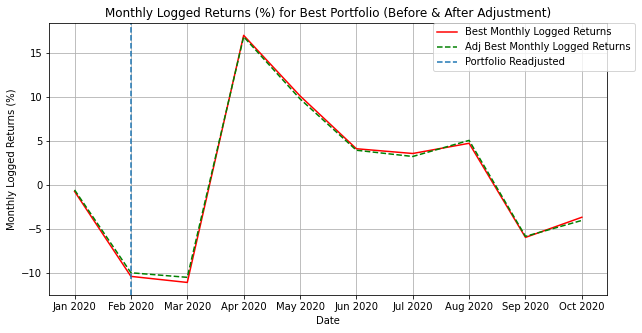

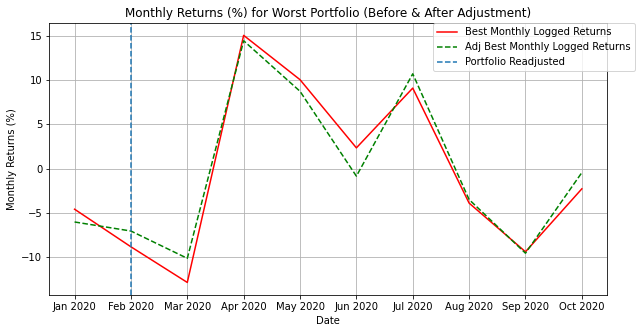

In [150]:
plt.figure(figsize=(10,5))
plt.plot(best_monthly['Monthly Logged Returns (%)'], 'r-', label='Best Monthly Logged Returns')
plt.plot(adj_best_monthly['Monthly Logged Returns (%)'], 'g--', label='Adj Best Monthly Logged Returns')
plt.grid(True)
plt.xlabel('Date')
plt.axvline(x = 'Feb 2020', ls = '--', label = "Portfolio Readjusted")
plt.ylabel('Monthly Logged Returns (%)')
plt.title('Monthly Logged Returns (%) for Best Portfolio (Before & After Adjustment)')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(worst_monthly['Monthly Logged Returns (%)'], 'r-', label='Best Monthly Logged Returns')
plt.plot(adj_worst_monthly['Monthly Logged Returns (%)'], 'g--', label='Adj Best Monthly Logged Returns')
plt.grid(True)
plt.xlabel('Date')
plt.axvline(x = 'Feb 2020', ls = '--', label = "Portfolio Readjusted")
plt.ylabel('Monthly Returns (%)')
plt.title('Monthly Returns (%) for Worst Portfolio (Before & After Adjustment)')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

# Q4

In [2]:
import numpy as np
import scipy.stats as si
import sympy as sy
import pandas as pd

In [3]:
from pandas_datareader.data import DataReader

def get_data_for_multiple_stocks(tickers, start_date, end_date):
    #read in stock data
    #date: YYYY-MM-DD
    s = DataReader(tickers[0], 'yahoo', start_date, end_date)[["Adj Close"]]
    #get log returns
    s[tickers[0]] = s['Adj Close']

    stocks = s[[tickers[0]]]

    for ticker in tickers[1:]:
        s = DataReader(ticker, 'yahoo', start_date, end_date)
        s[ticker] = s['Adj Close']
        stocks[ticker] = s[ticker]
        
    return stocks.iloc[1:].fillna(0)

In [4]:
optimised_tickers = ["GOOGL", "GOOG", "FB", "AMZN", "EBAY", "CSCO", "JNPR", "QCOM", "ACN", "AKAM", 
                     "GPN", "IBM", "V", "INTC", "KLAC", "NXPI", "SWKS", "XLNX", "CHKP", "CTXS", 
                     "MSFT", "ORCL", "SNPS", "VMW", "AAPL", "IAC","HPQ", "NTAP", "STX", "WDC"] 

optimised_weights = [0.025,  0.025, 0.0336, 0.07, 0.0,
             0.00181, 0.0, 0.0, 0.03346, 0.0,
             0.0104, 0.0, 0.02808, 0.1, 0.00104,
             0.0, 0.0, 0.0, 0.0, 0.0,
             0.08871, 0.0, 0.02998, 0.14565, 0.025,
             0.17315, 0.01975, 0.18938, 0.0, 0.0]

In [5]:
df = pd.DataFrame({"Stocks": optimised_tickers,
                  "Weights": optimised_weights})
df.head(10)

Stocks  Weights
0  GOOGL  0.02500
1   GOOG  0.02500
2     FB  0.03360
3   AMZN  0.07000
4   EBAY  0.00000
5   CSCO  0.00181
6   JNPR  0.00000
7   QCOM  0.00000
8    ACN  0.03346
9   AKAM  0.00000

In [6]:
df["Weights"][4] == 0

True

In [7]:
nonzero_stocks = []
nonzero_weights = []

for i in range(len(df)):
    if df["Weights"][i] != 0:
        nonzero_stocks.append(df["Stocks"][i])
        nonzero_weights.append(df["Weights"][i])
        
nonzero_stocks

['GOOGL',
 'GOOG',
 'FB',
 'AMZN',
 'CSCO',
 'ACN',
 'GPN',
 'V',
 'INTC',
 'KLAC',
 'MSFT',
 'SNPS',
 'VMW',
 'AAPL',
 'IAC',
 'HPQ',
 'NTAP']

In [8]:
nonzero_weights

[0.025,
 0.025,
 0.0336,
 0.07,
 0.00181,
 0.03346,
 0.0104,
 0.02808,
 0.1,
 0.00104,
 0.08871,
 0.02998,
 0.14565,
 0.025,
 0.17315,
 0.01975,
 0.18938]

### Calculation and preparation of my optimised portfolio daily return

In [9]:
from math import floor
jan =  get_data_for_multiple_stocks(nonzero_stocks, start_date = "2020-01-01",end_date= "2020-01-02")
rogsx_value = 664311647.77
num_shares = []
i=0

for s in nonzero_stocks:
    num = (nonzero_weights[i]*rogsx_value)/jan[s][0]
    num_shares.append(floor(num))
    i+=1

num_shares

[12134,
 12145,
 106401,
 24500,
 25498,
 107469,
 37334,
 98203,
 1119049,
 3837,
 369816,
 139399,
 621671,
 224915,
 1376089,
 649164,
 2073413]

In [10]:
optimised = get_data_for_multiple_stocks(nonzero_stocks, start_date = "2018-12-31",end_date= "2019-12-31")

optimised['portfolio_value'] = round(optimised[nonzero_stocks[0]]*num_shares[0],2)
for i in range(1,17):
    optimised['portfolio_value'] += round(optimised[nonzero_stocks[i]]*num_shares[i],2)
optimised

GOOGL         GOOG          FB         AMZN       CSCO  \
Date                                                                       
2019-01-02  1054.680054  1045.849976  135.679993  1539.130005  40.382099   
2019-01-03  1025.469971  1016.059998  131.740005  1500.280029  38.913486   
2019-01-04  1078.069946  1070.709961  137.949997  1575.390015  40.666344   
2019-01-07  1075.920044  1068.390015  138.050003  1629.510010  40.941113   
2019-01-08  1085.369995  1076.280029  142.529999  1656.579956  41.272739   
...                 ...          ...         ...          ...        ...   
2019-12-24  1344.430054  1343.560059  205.119995  1789.209961  46.192528   
2019-12-26  1362.469971  1360.400024  207.789993  1868.770020  46.260204   
2019-12-27  1354.640015  1351.890015  208.100006  1869.800049  46.182861   
2019-12-30  1339.709961  1336.140015  204.410004  1846.890015  46.008842   
2019-12-31  1339.390015  1337.020020  205.250000  1847.839966  46.366550   

                   ACN         GPN           V       INTC        KLAC  \
Date                                                                    
2019-01-02  136.644974  101.556984  131.264542  44.819595   87.492149   
2019-01-03  131.979675   98.262337  126.534225  42.353947   82.583893   
2019-01-04  137.111526  102.273636  131.985474  44.952866   87.867485   
2019-01-07  137.587784  104.413689  134.365448  45.162308   89.118614   
2019-01-08  141.067322  107.170845  135.096252  45.447910   87.703873   
...                ...         ...         ...        ...         ...   
2019-12-24  208.266663  182.231567  186.422501  57.968597  175.626389   
2019-12-26  208.699707  182.879410  188.002792  58.368649  176.257462   
2019-12-27  208.867004  182.281387  188.231369  58.622341  176.030670   
2019-12-30  207.311966  180.746521  186.680908  58.173500  175.882767   
2019-12-31  207.243088  181.952499  186.750488  58.397919  175.685547   

                  MSFT        SNPS         VMW       AAPL        IAC  \
Date                                                                   
2019-01-02   98.860214   84.050003  136.160004  38.249401  59.017681   
2019-01-03   95.223351   81.110001  130.669998  34.439476  56.810741   
2019-01-04   99.652115   83.900002  138.910004  35.909672  59.921413   
2019-01-07   99.779205   85.760002  143.740005  35.829746  59.276360   
2019-01-08  100.502670   86.099998  146.800003  36.512772  60.664703   
...                ...         ...         ...        ...        ...   
2019-12-24  156.137955  138.210007  151.020004  69.886818  80.736740   
2019-12-26  157.417786  140.070007  153.460007  71.273392  81.814011   
2019-12-27  157.705505  140.619995  154.160004  71.246353  82.678452   
2019-12-30  156.346298  139.100006  152.429993  71.669212  81.882774   
2019-12-31  156.455429  139.199997  151.789993  72.192863  81.568436   

                  HPQ       NTAP  portfolio_value  
Date                                               
2019-01-02  19.392473  56.203262     5.123936e+08  
2019-01-03  18.734465  53.896629     4.921306e+08  
2019-01-04  19.477079  55.725067     5.161771e+08  
2019-01-07  19.693279  55.443768     5.200308e+08  
2019-01-08  19.937683  55.012440     5.257982e+08  
...               ...        ...              ...  
2019-12-24  20.016390  60.294880     6.482288e+08  
2019-12-26  20.113605  59.968758     6.549939e+08  
2019-12-27  19.958061  58.923237     6.546859e+08  
2019-12-30  19.919176  59.019154     6.498593e+08  
2019-12-31  19.977503  59.709770     6.510942e+08  

[252 rows x 18 columns]

In [11]:
optimised['portfolio_value'][0]

512393617.23

In [12]:
optimised['prev_close_val'] = optimised['portfolio_value'].shift(1)
optimised['log_return'] = np.log(optimised['portfolio_value']/optimised['prev_close_val'])
optimised

GOOGL         GOOG          FB         AMZN       CSCO  \
Date                                                                       
2019-01-02  1054.680054  1045.849976  135.679993  1539.130005  40.382099   
2019-01-03  1025.469971  1016.059998  131.740005  1500.280029  38.913486   
2019-01-04  1078.069946  1070.709961  137.949997  1575.390015  40.666344   
2019-01-07  1075.920044  1068.390015  138.050003  1629.510010  40.941113   
2019-01-08  1085.369995  1076.280029  142.529999  1656.579956  41.272739   
...                 ...          ...         ...          ...        ...   
2019-12-24  1344.430054  1343.560059  205.119995  1789.209961  46.192528   
2019-12-26  1362.469971  1360.400024  207.789993  1868.770020  46.260204   
2019-12-27  1354.640015  1351.890015  208.100006  1869.800049  46.182861   
2019-12-30  1339.709961  1336.140015  204.410004  1846.890015  46.008842   
2019-12-31  1339.390015  1337.020020  205.250000  1847.839966  46.366550   

                   ACN         GPN           V       INTC        KLAC  \
Date                                                                    
2019-01-02  136.644974  101.556984  131.264542  44.819595   87.492149   
2019-01-03  131.979675   98.262337  126.534225  42.353947   82.583893   
2019-01-04  137.111526  102.273636  131.985474  44.952866   87.867485   
2019-01-07  137.587784  104.413689  134.365448  45.162308   89.118614   
2019-01-08  141.067322  107.170845  135.096252  45.447910   87.703873   
...                ...         ...         ...        ...         ...   
2019-12-24  208.266663  182.231567  186.422501  57.968597  175.626389   
2019-12-26  208.699707  182.879410  188.002792  58.368649  176.257462   
2019-12-27  208.867004  182.281387  188.231369  58.622341  176.030670   
2019-12-30  207.311966  180.746521  186.680908  58.173500  175.882767   
2019-12-31  207.243088  181.952499  186.750488  58.397919  175.685547   

                  MSFT        SNPS         VMW       AAPL        IAC  \
Date                                                                   
2019-01-02   98.860214   84.050003  136.160004  38.249401  59.017681   
2019-01-03   95.223351   81.110001  130.669998  34.439476  56.810741   
2019-01-04   99.652115   83.900002  138.910004  35.909672  59.921413   
2019-01-07   99.779205   85.760002  143.740005  35.829746  59.276360   
2019-01-08  100.502670   86.099998  146.800003  36.512772  60.664703   
...                ...         ...         ...        ...        ...   
2019-12-24  156.137955  138.210007  151.020004  69.886818  80.736740   
2019-12-26  157.417786  140.070007  153.460007  71.273392  81.814011   
2019-12-27  157.705505  140.619995  154.160004  71.246353  82.678452   
2019-12-30  156.346298  139.100006  152.429993  71.669212  81.882774   
2019-12-31  156.455429  139.199997  151.789993  72.192863  81.568436   

                  HPQ       NTAP  portfolio_value  prev_close_val  log_return  
Date                                                                           
2019-01-02  19.392473  56.203262     5.123936e+08             NaN         NaN  
2019-01-03  18.734465  53.896629     4.921306e+08    5.123936e+08   -0.040349  
2019-01-04  19.477079  55.725067     5.161771e+08    4.921306e+08    0.047706  
2019-01-07  19.693279  55.443768     5.200308e+08    5.161771e+08    0.007438  
2019-01-08  19.937683  55.012440     5.257982e+08    5.200308e+08    0.011029  
...               ...        ...              ...             ...         ...  
2019-12-24  20.016390  60.294880     6.482288e+08    6.488065e+08   -0.000891  
2019-12-26  20.113605  59.968758     6.549939e+08    6.482288e+08    0.010382  
2019-12-27  19.958061  58.923237     6.546859e+08    6.549939e+08   -0.000470  
2019-12-30  19.919176  59.019154     6.498593e+08    6.546859e+08   -0.007400  
2019-12-31  19.977503  59.709770     6.510942e+08    6.498593e+08    0.001898  

[252 rows x 20 columns]

### Calculation and preparation of benchmark for OLS  regression and beta

In [13]:
benchmark = ['^GSPC']

bm = get_data_for_multiple_stocks(benchmark, start_date = "2018-12-31",end_date= "2019-12-31")
bm['prev_close_val'] = bm['^GSPC'].shift(1)
bm['log_return'] = np.log(bm['^GSPC']/bm['prev_close_val'])
bm

^GSPC  prev_close_val  log_return
Date                                               
2019-01-02  2510.030029             NaN         NaN
2019-01-03  2447.889893     2510.030029   -0.025068
2019-01-04  2531.939941     2447.889893    0.033759
2019-01-07  2549.689941     2531.939941    0.006986
2019-01-08  2574.409912     2549.689941    0.009649
...                 ...             ...         ...
2019-12-24  3223.379883     3224.010010   -0.000195
2019-12-26  3239.909912     3223.379883    0.005115
2019-12-27  3240.020020     3239.909912    0.000034
2019-12-30  3221.290039     3240.020020   -0.005798
2019-12-31  3230.780029     3221.290039    0.002942

[252 rows x 3 columns]

In [14]:
benchmark = ['VGT']

bm2 = get_data_for_multiple_stocks(benchmark, start_date = "2018-12-31",end_date= "2019-12-31")
bm2['prev_close_val'] = bm2['VGT'].shift(1)
bm2['log_return'] = np.log(bm2['VGT']/bm2['prev_close_val'])
bm2

VGT  prev_close_val  log_return
Date                                              
2019-01-02  163.418015             NaN         NaN
2019-01-03  155.341583      163.418015   -0.050685
2019-01-04  162.096405      155.341583    0.042565
2019-01-07  163.907501      162.096405    0.011111
2019-01-08  165.483612      163.907501    0.009570
...                ...             ...         ...
2019-12-24  241.740097      241.720261    0.000082
2019-12-26  243.603821      241.740097    0.007680
2019-12-27  243.514587      243.603821   -0.000366
2019-12-30  242.067215      243.514587   -0.005961
2019-12-31  242.731445      242.067215    0.002740

[252 rows x 3 columns]

In [15]:
OPT_return = pd.DataFrame({'opt_log_return': optimised['log_return']}).reset_index()
GSPC_return = pd.DataFrame({'GSPC_log_return': bm['log_return']}).reset_index()
VGT_return = pd.DataFrame({'VGT_log_return': bm2['log_return']}).reset_index()

OPT_return

Date  opt_log_return
0   2019-01-02             NaN
1   2019-01-03       -0.040349
2   2019-01-04        0.047706
3   2019-01-07        0.007438
4   2019-01-08        0.011029
..         ...             ...
247 2019-12-24       -0.000891
248 2019-12-26        0.010382
249 2019-12-27       -0.000470
250 2019-12-30       -0.007400
251 2019-12-31        0.001898

[252 rows x 2 columns]

In [16]:
GSPC_return

Date  GSPC_log_return
0   2019-01-02              NaN
1   2019-01-03        -0.025068
2   2019-01-04         0.033759
3   2019-01-07         0.006986
4   2019-01-08         0.009649
..         ...              ...
247 2019-12-24        -0.000195
248 2019-12-26         0.005115
249 2019-12-27         0.000034
250 2019-12-30        -0.005798
251 2019-12-31         0.002942

[252 rows x 2 columns]

In [17]:
VGT_return

Date  VGT_log_return
0   2019-01-02             NaN
1   2019-01-03       -0.050685
2   2019-01-04        0.042565
3   2019-01-07        0.011111
4   2019-01-08        0.009570
..         ...             ...
247 2019-12-24        0.000082
248 2019-12-26        0.007680
249 2019-12-27       -0.000366
250 2019-12-30       -0.005961
251 2019-12-31        0.002740

[252 rows x 2 columns]

In [18]:
from functools import reduce


dfs = [OPT_return, GSPC_return, VGT_return]
Stock_return = reduce(lambda left,right: pd.merge(left,right, on='Date'), dfs)
Stock_return = Stock_return[['Date','opt_log_return','GSPC_log_return','VGT_log_return']]
Stock_return.dropna(inplace=True)
Stock_return

Date  opt_log_return  GSPC_log_return  VGT_log_return
1   2019-01-03       -0.040349        -0.025068       -0.050685
2   2019-01-04        0.047706         0.033759        0.042565
3   2019-01-07        0.007438         0.006986        0.011111
4   2019-01-08        0.011029         0.009649        0.009570
5   2019-01-09        0.012722         0.004090        0.012405
..         ...             ...              ...             ...
247 2019-12-24       -0.000891        -0.000195        0.000082
248 2019-12-26        0.010382         0.005115        0.007680
249 2019-12-27       -0.000470         0.000034       -0.000366
250 2019-12-30       -0.007400        -0.005798       -0.005961
251 2019-12-31        0.001898         0.002942        0.002740

[251 rows x 4 columns]

#### Risk free rate of 2% converted to daily log returns

In [19]:
rf = np.log(2/25200 + 1)
rf

7.93619301238376e-05

In [20]:
Stock_return['Effective_log_return'] = Stock_return['opt_log_return']-rf
Stock_return['GSPC_Effective_log_return'] = Stock_return['GSPC_log_return']-rf
Stock_return['VGT_Effective_log_return'] = Stock_return['VGT_log_return']-rf
Stock_return

Date  opt_log_return  GSPC_log_return  VGT_log_return  \
1   2019-01-03       -0.040349        -0.025068       -0.050685   
2   2019-01-04        0.047706         0.033759        0.042565   
3   2019-01-07        0.007438         0.006986        0.011111   
4   2019-01-08        0.011029         0.009649        0.009570   
5   2019-01-09        0.012722         0.004090        0.012405   
..         ...             ...              ...             ...   
247 2019-12-24       -0.000891        -0.000195        0.000082   
248 2019-12-26        0.010382         0.005115        0.007680   
249 2019-12-27       -0.000470         0.000034       -0.000366   
250 2019-12-30       -0.007400        -0.005798       -0.005961   
251 2019-12-31        0.001898         0.002942        0.002740   

     Effective_log_return  GSPC_Effective_log_return  VGT_Effective_log_return  
1               -0.040428                  -0.025148                 -0.050764  
2                0.047627                   0.033680                  0.042485  
3                0.007359                   0.006907                  0.011032  
4                0.010950                   0.009569                  0.009491  
5                0.012643                   0.004010                  0.012326  
..                    ...                        ...                       ...  
247             -0.000970                  -0.000275                  0.000003  
248              0.010303                   0.005036                  0.007601  
249             -0.000550                  -0.000045                 -0.000446  
250             -0.007479                  -0.005877                 -0.006041  
251              0.001819                   0.002862                  0.002661  

[251 rows x 7 columns]

In [21]:
import statsmodels.formula.api as smf
results = smf.ols('Effective_log_return ~ VGT_Effective_log_return', data=Stock_return).fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Effective_log_return   R-squared:                       0.788
Model:                              OLS   Adj. R-squared:                  0.787
Method:                   Least Squares   F-statistic:                     925.1
Date:                  Thu, 12 Nov 2020   Prob (F-statistic):           7.97e-86
Time:                          19:28:46   Log-Likelihood:                 938.75
No. Observations:                   251   AIC:                            -1873.
Df Residuals:                       249   BIC:                            -1866.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Inte

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
cc = 0.788**(0.5)
print("VGT Correlation coefficient is " + str(cc))

VGT Correlation coefficient is 0.8876936408468858


#### Beta is 0.9749 based on OLS regresion for VGT

In [23]:
results = smf.ols('Effective_log_return ~ GSPC_Effective_log_return', data=Stock_return).fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Effective_log_return   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.694
Method:                   Least Squares   F-statistic:                     568.7
Date:                  Thu, 12 Nov 2020   Prob (F-statistic):           3.09e-66
Time:                          19:28:46   Log-Likelihood:                 893.34
No. Observations:                   251   AIC:                            -1783.
Df Residuals:                       249   BIC:                            -1776.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

#### Beta is 1.3230 based on OLS regresion for SPY

In [24]:
cc = 0.695**(0.5)
print("GSPC Correlation coefficient is " + str(cc))

GSPC Correlation coefficient is 0.8336666000266533


Since VGT has a higher R^2 and correlation, VGT seems to be a better fit

### HS VaR calculations and loss limit
We will be using historical VaR as a reference point because we are not going to assume that normal distribution for the portflio returns and because it is a more commonly used reference.

In [25]:
quantiles = optimised['log_return'].quantile([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
quantiles

0.01   -0.038044
0.05   -0.021103
0.10   -0.012870
0.25   -0.005365
0.50    0.002714
0.75    0.008708
0.90    0.013822
0.95    0.017169
0.99    0.023661
Name: log_return, dtype: float64

In [26]:
# calculate $VaR in percentage as of 31st dec 2019
VaR_todayHS = 1-np.exp(quantiles[0.05])
VaR_todayHS*=100
print("95% VaR based on historical simulation is " + str(VaR_todayHS) + "%")

95% VaR based on historical simulation is 2.08815634568168%


### Based on CAPM model, we calculate the expected return for our portfolio using VGT as market return

In [27]:
ER_M = (np.exp(Stock_return['VGT_log_return'].mean()) - 1) * 100 * 252
beta = 0.9749
Rf = 2

ER = Rf + beta*(ER_M-Rf)
d_ER = ER/252
print("Expected annual return based on CAPM model is " + str(ER) + "%")
print("Expected daily return based on CAPM model is " + str(d_ER) + "%")

Expected annual return based on CAPM model is 38.80576477269596%
Expected daily return based on CAPM model is 0.1539911300503808%


In [28]:
daily_mean = np.exp(Stock_return['Effective_log_return'].mean()) - 1
daily_mean*=100
daily_mean
print("Mean daily return " + str(daily_mean) + "%")

Mean daily return 0.08754481939774461%


In [29]:
mean_diff = d_ER - daily_mean 
print("Mean daily return difference is " +str(mean_diff) + "%")

Mean daily return difference is 0.06644631065263618%


In [30]:
VaR_todayHS-mean_diff

2.021710035029044

In [31]:
VaR_3months_est = (VaR_todayHS-mean_diff) * (252/4)**(0.5)
print("VaR estimate for 3 months  is " + str(VaR_3months_est) + "%")

VaR estimate for 3 months  is 16.0468259273116%


Based on the VaR estimate, we are looking to limit our loss to 16.05% of our entire portfolio after 3 months

In [32]:
VGT_last_price = bm2['VGT'][-1]
print("Price of VGT as of 31st December 2019 is " + "{:.2f}".format(VGT_last_price))

Price of VGT as of 31st December 2019 is 242.73


In [33]:
beta = 0.9749
strike = (1-0.1605/beta) * VGT_last_price
print("Strike Price of VGT to go for is " + "{:.2f}".format(strike))

Strike Price of VGT to go for is 202.77


In [34]:
portfolio_value = optimised['portfolio_value'][0]
num_options = portfolio_value/VGT_last_price
print("Number of VGT options to go for is " + "{:.2f}".format(num_options/100))

Number of VGT options to go for is 21109.49


We are lookintg to purchase 21110 put options of lot 100 at the strike price of 205

### Import VGT options csv

In [35]:
options_df = pd.read_csv("VGT_Vanguard Information Technology ETF.csv")

In [36]:
options_df

secid        date             symbol  symbol_flag      exdate  \
0   120145  2019/12/31  VGT 200117C225000            1  2020/01/17   
1   120145  2019/12/31  VGT 200117C230000            1  2020/01/17   
2   120145  2019/12/31  VGT 200117C235000            1  2020/01/17   
3   120145  2019/12/31  VGT 200117C240000            1  2020/01/17   
4   120145  2019/12/31  VGT 200117C245000            1  2020/01/17   
..     ...         ...                ...          ...         ...   
85  120145  2019/12/31  VGT 200821P235000            1  2020/08/21   
86  120145  2019/12/31  VGT 200821P240000            1  2020/08/21   
87  120145  2019/12/31  VGT 200821P245000            1  2020/08/21   
88  120145  2019/12/31  VGT 200821P250000            1  2020/08/21   
89  120145  2019/12/31  VGT 200821P255000            1  2020/08/21   

     last_date cp_flag  strike_price  best_bid  best_offer  ...   sic  \
0   2019/12/18       C        225000     16.00        22.3  ...  6722   
1          NaN       C        230000     11.10        17.1  ...  6722   
2   2019/12/02       C        235000      6.50        11.6  ...  6722   
3   2019/12/23       C        240000      2.30         9.6  ...  6722   
4   2019/12/31       C        245000      2.55         3.8  ...  6722   
..         ...     ...           ...       ...         ...  ...   ...   
85  2019/12/27       P        235000      4.50        12.5  ...  6722   
86         NaN       P        240000      6.00        14.3  ...  6722   
87         NaN       P        245000      8.00        16.4  ...  6722   
88         NaN       P        250000     10.50        18.7  ...  6722   
89         NaN       P        255000     13.50        21.5  ...  6722   

    index_flag  exchange_d  class  issue_type  industry_group  \
0            0           1    NaN           %             426   
1            0           1    NaN           %             426   
2            0           1    NaN           %             426   
3            0           1    NaN           %             426   
4            0           1    NaN           %             426   
..         ...         ...    ...         ...             ...   
85           0           1    NaN           %             426   
86           0           1    NaN           %             426   
87           0           1    NaN           %             426   
88           0           1    NaN           %             426   
89           0           1    NaN           %             426   

                issuer  div_convention  exercise_style  am_set_flag  
0   VANGUARD WORLD FDS             NaN               A            0  
1   VANGUARD WORLD FDS             NaN               A            0  
2   VANGUARD WORLD FDS             NaN               A            0  
3   VANGUARD WORLD FDS             NaN               A            0  
4   VANGUARD WORLD FDS             NaN               A            0  
..                 ...             ...             ...          ...  
85  VANGUARD WORLD FDS             NaN               A            0  
86  VANGUARD WORLD FDS             NaN               A            0  
87  VANGUARD WORLD FDS             NaN               A            0  
88  VANGUARD WORLD FDS             NaN               A            0  
89  VANGUARD WORLD FDS             NaN               A            0  

[90 rows x 38 columns]

In [37]:
from copy import deepcopy

put_options_df = options_df[options_df.cp_flag == 'P']
put_options_df

secid        date             symbol  symbol_flag      exdate  \
6   120145  2019/12/31  VGT 200117P225000            1  2020/01/17   
7   120145  2019/12/31  VGT 200117P230000            1  2020/01/17   
8   120145  2019/12/31  VGT 200117P235000            1  2020/01/17   
9   120145  2019/12/31  VGT 200117P240000            1  2020/01/17   
10  120145  2019/12/31  VGT 200117P245000            1  2020/01/17   
11  120145  2019/12/31  VGT 200117P250000            1  2020/01/17   
26  120145  2019/12/31  VGT 200221P200000            1  2020/02/21   
27  120145  2019/12/31  VGT 200221P205000            1  2020/02/21   
28  120145  2019/12/31  VGT 200221P210000            1  2020/02/21   
29  120145  2019/12/31  VGT 200221P215000            1  2020/02/21   
30  120145  2019/12/31  VGT 200221P220000            1  2020/02/21   
31  120145  2019/12/31  VGT 200221P225000            1  2020/02/21   
32  120145  2019/12/31  VGT 200221P230000            1  2020/02/21   
33  120145  2019/12/31  VGT 200221P240000            1  2020/02/21   
34  120145  2019/12/31  VGT 200221P250000            1  2020/02/21   
35  120145  2019/12/31  VGT 200221P260000            1  2020/02/21   
36  120145  2019/12/31  VGT 200221P270000            1  2020/02/21   
37  120145  2019/12/31  VGT 200221P280000            1  2020/02/21   
38  120145  2019/12/31  VGT 200221P290000            1  2020/02/21   
39  120145  2019/12/31  VGT 200221P300000            1  2020/02/21   
60  120145  2019/12/31  VGT 200515P205000            1  2020/05/15   
61  120145  2019/12/31  VGT 200515P210000            1  2020/05/15   
62  120145  2019/12/31  VGT 200515P215000            1  2020/05/15   
63  120145  2019/12/31  VGT 200515P220000            1  2020/05/15   
64  120145  2019/12/31  VGT 200515P225000            1  2020/05/15   
65  120145  2019/12/31  VGT 200515P230000            1  2020/05/15   
66  120145  2019/12/31  VGT 200515P235000            1  2020/05/15   
67  120145  2019/12/31  VGT 200515P240000            1  2020/05/15   
68  120145  2019/12/31  VGT 200515P245000            1  2020/05/15   
69  120145  2019/12/31  VGT 200515P250000            1  2020/05/15   
70  120145  2019/12/31  VGT 200515P255000            1  2020/05/15   
71  120145  2019/12/31  VGT 200515P260000            1  2020/05/15   
72  120145  2019/12/31  VGT 200515P265000            1  2020/05/15   
73  120145  2019/12/31  VGT 200515P270000            1  2020/05/15   
74  120145  2019/12/31  VGT 200515P275000            1  2020/05/15   
75  120145  2019/12/31  VGT 200515P280000            1  2020/05/15   
76  120145  2019/12/31  VGT 200515P285000            1  2020/05/15   
77  120145  2019/12/31  VGT 200515P290000            1  2020/05/15   
78  120145  2019/12/31  VGT 200515P295000            1  2020/05/15   
79  120145  2019/12/31  VGT 200515P300000            1  2020/05/15   
85  120145  2019/12/31  VGT 200821P235000            1  2020/08/21   
86  120145  2019/12/31  VGT 200821P240000            1  2020/08/21   
87  120145  2019/12/31  VGT 200821P245000            1  2020/08/21   
88  120145  2019/12/31  VGT 200821P250000            1  2020/08/21   
89  120145  2019/12/31  VGT 200821P255000            1  2020/08/21   

     last_date cp_flag  strike_price  best_bid  best_offer  ...   sic  \
6   2019/12/10       P        225000      0.10        2.30  ...  6722   
7   2019/12/30       P        230000      0.20        0.55  ...  6722   
8   2019/12/30       P        235000      0.65        1.20  ...  6722   
9   2019/12/30       P        240000      0.05        5.80  ...  6722   
10  2019/12/27       P        245000      0.05        6.00  ...  6722   
11         NaN       P        250000      2.60        9.60  ...  6722   
26  2019/12/27       P        200000      0.00        1.20  ...  6722   
27  2019/12/12       P        205000      0.00        1.00  ...  6722   
28  2019/12/03       P        210000      0.20        1.15  ...  6722   
29  2019/11/20       P        215000      0.00        

In [38]:
select_VGT = put_options_df.loc[put_options_df['strike_price'] == 205000]
select_VGT

secid        date             symbol  symbol_flag      exdate  \
27  120145  2019/12/31  VGT 200221P205000            1  2020/02/21   
60  120145  2019/12/31  VGT 200515P205000            1  2020/05/15   

     last_date cp_flag  strike_price  best_bid  best_offer  ...   sic  \
27  2019/12/12       P        205000      0.00        1.00  ...  6722   
60  2019/12/31       P        205000      1.75        2.45  ...  6722   

    index_flag  exchange_d  class  issue_type  industry_group  \
27           0           1    NaN           %             426   
60           0           1    NaN           %             426   

                issuer  div_convention  exercise_style  am_set_flag  
27  VANGUARD WORLD FDS             NaN               A            0  
60  VANGUARD WORLD FDS             NaN               A            0  

[2 rows x 38 columns]

In [39]:
select_VGT.iloc[0]['best_offer']

1.0

In [40]:
# We are lookintg to purchase 4120 put options of lot 100 at the strike price of 205
total_cost = 21110*select_VGT.iloc[0]['best_offer']*100
perc = round(total_cost/portfolio_value *100,2)

print('Total Cost of buying VGT option to cross hedge is $' + str(total_cost))
print('Cost is ' + str(perc) +'% of total portfolio value' )

Total Cost of buying VGT option to cross hedge is $2111000.0
Cost is 0.41% of total portfolio value


#### VGT does not have options with expiration date in March 2020

### Based on CAPM model, we calculate the expected return for our portfolio using S&P 500 as market return

In [41]:
ER_M = (np.exp(Stock_return['GSPC_log_return'].mean()) - 1) * 100 * 252
beta = 1.3230
Rf = 2

ER = Rf + beta*(ER_M-Rf)
d_ER = ER/252
print("Expected annual return based on CAPM model is " + str(ER) + "%")
print("Expected daily return based on CAPM model is " + str(d_ER) + "%")

Expected annual return based on CAPM model is 32.90026059764513%
Expected daily return based on CAPM model is 0.13055658967319494%


In [42]:
daily_mean = np.exp(Stock_return['Effective_log_return'].mean()) - 1
daily_mean*=100
daily_mean
print("Mean daily return " + str(daily_mean) + "%")

Mean daily return 0.08754481939774461%


In [43]:
mean_diff = d_ER - daily_mean 
print("Mean daily return difference is " +str(mean_diff) + "%")

Mean daily return difference is 0.043011770275450334%


In [44]:
VaR_todayHS-mean_diff

2.0451445754062294

In [45]:
VaR_3months_est = (VaR_todayHS-mean_diff) * (252/4)**(0.5)
print("VaR estimate for 3 months  is " + str(round(VaR_3months_est,1)) + "%")

VaR estimate for 3 months  is 16.2%


In [46]:
GSPC_last_price = bm['^GSPC'][-1]
print("Price of GSPC as of 31st December 2019 is " + "{:.2f}".format(GSPC_last_price))

Price of GSPC as of 31st December 2019 is 3230.78


In [47]:
beta = 1.3230
strike = (1-0.162/beta) * GSPC_last_price
print("Strike Price of GSPC to go for is " + "{:.2f}".format(strike))

Strike Price of GSPC to go for is 2835.17


In [48]:
portfolio_value = optimised['portfolio_value'][0]
num_options = portfolio_value/GSPC_last_price
print("Number of GSPC options to go for is " + "{:.2f}".format(num_options/100))

Number of GSPC options to go for is 1585.97


We are lookintg to purchase 1586 put options of lot 100 at the strike price of 2840

### Import S&P options csv

In [49]:
options_df = pd.read_csv("S&P500.csv")

In [50]:
options_df

date              symbol     exdate   last_date cp_flag  \
0    12/31/2019  SPX 200320C1600000  3/20/2020   9/20/2019       C   
1    12/31/2019  SPX 200320C1625000  3/20/2020         NaN       C   
2    12/31/2019  SPX 200320C1650000  3/20/2020         NaN       C   
3    12/31/2019  SPX 200320C1675000  3/20/2020  12/16/2019       C   
4    12/31/2019  SPX 200320C1700000  3/20/2020  12/13/2019       C   
..          ...                 ...        ...         ...     ...   
917  12/31/2019  SPX 200918P3950000  9/18/2020         NaN       P   
918  12/31/2019  SPX 200918P4000000  9/18/2020         NaN       P   
919  12/31/2019  SPX 200918P4050000  9/18/2020         NaN       P   
920  12/31/2019  SPX 200918P4100000  9/18/2020  10/30/2019       P   
921  12/31/2019  SPX 200918P4200000  9/18/2020         NaN       P   

     strike_price  best_bid  best_offer  volume  open_interest  \
0         1600000    1616.6      1626.9       0              2   
1         1625000    1591.8      1602.0       0              0   
2         1650000    1566.9      1577.1       0              0   
3         1675000    1542.0      1552.2       0              7   
4         1700000    1517.2      1527.4       0              5   
..            ...       ...         ...     ...            ...   
917       3950000     704.7       720.6       0              0   
918       4000000     753.5       769.5       0              0   
919       4050000     802.7       818.5       0              0   
920       4100000     851.6       867.5       0             10   
921       4200000     949.8       965.9       0              0   

     impl_volatility     delta     gamma       vega      theta  contract_size  \
0                NaN       NaN       NaN        NaN        NaN            100   
1                NaN       NaN       NaN        NaN        NaN            100   
2                NaN       NaN       NaN        NaN        NaN            100   
3                NaN       NaN       NaN        NaN        NaN            100   
4                NaN       NaN       NaN        NaN        NaN            100   
..               ...       ...       ...        ...        ...            ...   
917         0.107298 -0.972635  0.000127  101.55290   3.625372            100   
918         0.106712 -0.977426  0.000091   72.18085   6.704523            100   
919         0.107506 -0.980162  0.000068   54.37631   8.855608            100   
920         0.101138 -0.984369  0.000033   24.77867  12.039220            100   
921              NaN       NaN       NaN        NaN        NaN            100   

     forward_price              issuer  
0      3230.845157  CBOE S&P 500 INDEX  
1      3230.845157  CBOE S&P 500 INDEX  
2      3230.845157  CBOE S&P 500 INDEX  
3      3230.845157  CBOE S&P 500 INDEX  
4      3230.845157  CBOE S&P 500 INDEX  
..             ...                 ...  
917    3229.911905  CBOE S&P 500 INDEX  
918    3229.911905  CBOE S&P 500 INDEX  
919    3229.911905  CBOE S&P 500 INDEX  
920    3229.911905  CBOE S&P 500 INDEX  
921    3229.911905  CBOE S&P 500 INDEX  

[922 rows x 18 columns]

In [51]:
from copy import deepcopy

put_options_df = options_df[options_df.cp_flag == 'P']
put_options_df

date              symbol     exdate   last_date cp_flag  \
279  12/31/2019  SPX 200320P1600000  3/20/2020  12/30/2019       P   
280  12/31/2019  SPX 200320P1625000  3/20/2020   12/4/2019       P   
281  12/31/2019  SPX 200320P1650000  3/20/2020  12/26/2019       P   
282  12/31/2019  SPX 200320P1675000  3/20/2020  12/10/2019       P   
283  12/31/2019  SPX 200320P1700000  3/20/2020  12/20/2019       P   
..          ...                 ...        ...         ...     ...   
917  12/31/2019  SPX 200918P3950000  9/18/2020         NaN       P   
918  12/31/2019  SPX 200918P4000000  9/18/2020         NaN       P   
919  12/31/2019  SPX 200918P4050000  9/18/2020         NaN       P   
920  12/31/2019  SPX 200918P4100000  9/18/2020  10/30/2019       P   
921  12/31/2019  SPX 200918P4200000  9/18/2020         NaN       P   

     strike_price  best_bid  best_offer  volume  open_interest  \
279       1600000      0.10        0.25       0          22681   
280       1625000      0.15        0.25       0            636   
281       1650000      0.15        0.30       0          10480   
282       1675000      0.15        0.30       0           3402   
283       1700000      0.20        0.30       0          16825   
..            ...       ...         ...     ...            ...   
917       3950000    704.70      720.60       0              0   
918       4000000    753.50      769.50       0              0   
919       4050000    802.70      818.50       0              0   
920       4100000    851.60      867.50       0             10   
921       4200000    949.80      965.90       0              0   

     impl_volatility     delta     gamma        vega      theta  \
279         0.497467 -0.000807  0.000004    4.155507  -4.772179   
280         0.492681 -0.000923  0.000004    4.699281  -5.344648   
281         0.487326 -0.001041  0.000005    5.247411  -5.903119   
282         0.477045 -0.001063  0.000005    5.349542  -5.891029   
283         0.471311 -0.001186  0.000006    5.914837  -6.435166   
..               ...       ...       ...         ...        ...   
917         0.107298 -0.972635  0.000127  101.552900   3.625372   
918         0.106712 -0.977426  0.000091   72.180850   6.704523   
919         0.107506 -0.980162  0.000068   54.376310   8.855608   
920         0.101138 -0.984369  0.000033   24.778670  12.039220   
921              NaN       NaN       NaN         NaN        NaN   

     contract_size  forward_price              issuer  
279            100    3230.845157  CBOE S&P 500 INDEX  
280            100    3230.845157  CBOE S&P 500 INDEX  
281            100    3230.845157  CBOE S&P 500 INDEX  
282            100    3230.845157  CBOE S&P 500 INDEX  
283            100    3230.845157  CBOE S&P 500 INDEX  
..             ...            ...                 ...  
917            100    3229.911905  CBOE S&P 500 INDEX  
918            100    3229.911905  CBOE S&P 500 INDEX  
919            100    3229.911905  CBOE S&P 500 INDEX  
920            100    3229.911905  CBOE S&P 500 INDEX  
921            100    3229.911905  CBOE S&P 500 INDEX  

[461 rows x 18 columns]

In [52]:
select = put_options_df.loc[put_options_df['strike_price'] == 2840000]
select

date              symbol     exdate   last_date cp_flag  \
410  12/31/2019  SPX 200320P2840000  3/20/2020  12/31/2019       P   

     strike_price  best_bid  best_offer  volume  open_interest  \
410       2840000      13.8        14.1     341            244   

     impl_volatility     delta     gamma      vega     theta  contract_size  \
410         0.214585 -0.089535  0.000501  242.9029 -120.1349            100   

     forward_price              issuer  
410    3230.845157  CBOE S&P 500 INDEX

In [53]:
select.iloc[0]['best_offer']

14.1

In [54]:
#We are lookintg to purchase 310 put options of lot 100 at the strike price of 2820
total_cost = round(1586*select.iloc[0]['best_offer']*100,2)
perc = round(total_cost/portfolio_value *100,2)

print('Total Cost of buying S&P options to cross hedge is $' + str(total_cost))
print('Cost is ' + str(perc) +'% of total portfolio value' )

Total Cost of buying S&P options to cross hedge is $2236260.0
Cost is 0.44% of total portfolio value


### Calculation & comparision of return at the end of March
For our options, we decided to go with put options from S&P, the reason being that S&P has a decent correlation with our porfolio. and since there isn't options that have expiration date in March 2020 for VGT. S&P 500 options will provide a more realistic approach for our hedging.

In [55]:
optimised_no_hedge = get_data_for_multiple_stocks(nonzero_stocks, start_date = "2019-12-31",end_date= "2020-03-20")

In [56]:
optimised_no_hedge['portfolio_value'] = round(optimised_no_hedge[nonzero_stocks[0]]*num_shares[0],2)
for i in range(1,17):
    optimised_no_hedge['portfolio_value'] += round(optimised_no_hedge[nonzero_stocks[i]]*num_shares[i],2)

optimised_no_hedge

GOOGL         GOOG          FB         AMZN       CSCO  \
Date                                                                       
2019-12-31  1339.390015  1337.020020  205.250000  1847.839966  46.366550   
2020-01-02  1368.680054  1367.369995  209.779999  1898.010010  47.155396   
2020-01-03  1361.520020  1360.660034  208.669998  1874.969971  46.386028   
2020-01-06  1397.810059  1394.209961  212.600006  1902.880005  46.551586   
2020-01-07  1395.109985  1393.339966  213.059998  1906.859985  46.249683   
2020-01-08  1405.040039  1404.319946  215.220001  1891.969971  46.278904   
2020-01-09  1419.790039  1419.829956  218.300003  1901.050049  46.084126   
2020-01-10  1428.959961  1429.729980  218.059998  1883.160034  45.899090   
2020-01-13  1440.030029  1439.229980  221.910004  1891.300049  46.717148   
2020-01-14  1430.589966  1430.880005  219.059998  1869.439941  46.541851   
2020-01-15  1439.199951  1439.199951  221.149994  1862.020020  46.756104   
2020-01-16  1450.160034  1451.699951  221.770004  1877.939941  47.768940   
2020-01-17  1479.520020  1480.390015  222.139999  1864.719971  47.739723   
2020-01-21  1482.250000  1484.400024  221.440002  1892.000000  47.525467   
2020-01-22  1483.869995  1485.949951  221.320007  1887.459961  47.788422   
2020-01-23  1484.689941  1486.650024  219.759995  1884.579956  47.720245   
2020-01-24  1466.170044  1466.709961  217.940002  1861.640015  47.574165   
2020-01-27  1431.729980  1433.900024  214.869995  1828.339966  46.230209   
2020-01-28  1450.500000  1452.560059  217.789993  1853.250000  46.522373   
2020-01-29  1456.699951  1458.630005  223.229996  1858.000000  45.821175   
2020-01-30  1454.250000  1455.839966  209.529999  1870.680054  46.006214   
2020-01-31  1432.780029  1434.229980  201.910004  2008.719971  44.769386   
2020-02-03  1482.599976  1485.939941  204.190002  2004.199951  45.314754   
2020-02-04  1445.410034  1447.069946  209.830002  2049.669922  46.376289   
2020-02-05  1446.050049  1448.229980  210.110001  2039.869995  47.184612   
2020-02-06  1475.969971  1476.229980  210.850006  2050.229980  47.418346   
2020-02-07  1479.109985  1479.229980  212.330002  2079.280029  46.717148   
2020-02-10  1508.660034  1508.680054  213.059998  2133.909912  47.593643   
2020-02-11  1510.060059  1508.790039  207.190002  2150.800049  47.846855   
2020-02-12  1518.630005  1518.270020  210.759995  2160.000000  48.625957   
2020-02-13  1513.390015  1514.660034  213.139999  2149.870117  46.084126   
2020-02-14  1518.729980  1520.739990  214.179993  2134.870117  45.743267   
2020-02-18  1519.439941  1519.670044  217.800003  2155.669922  45.373192   
2020-02-19  1524.869995  1526.689941  217.490005  2170.219971  45.081028   
2020-02-20  1516.989990  1518.150024  214.580002  2153.100098  45.626396   
2020-02-21  1483.459961  1485.109985  210.179993  2095.969971  45.090763   
2020-02-24  1419.859985  1421.589966  200.720001  2009.290039  42.850834   
2020-02-25  1386.319946  1388.449951  196.770004  1972.739990  41.623745   
2020-02-26  1390.469971  1393.180054  197.199997  1979.589966  41.058891   
2020-02-27  1314.949951  1318.089966  189.750000  1884.300049  38.994259   
2020-02-28  1339.250000  1339.329956  192.470001  1883.750000  38.887131   
2020-03-02  1386.319946  1389.109985  196.440002  1953.949951  40.094746   
2020-03-03  1337.719971  1341.390015  185.889999  1908.989990  38.994259   
2020-03-04  1381.599976  1386.520020  191.759995  1975.829956  40.309002   
2020-03-05  1314.760010  1319.040039  185.169998  1924.030029  38.536533   
2020-03-06  1295.739990  1298.410034  181.089996  1901.089966  38.643665   
2020-03-09  1215.790039  1215.560059  169.500000  1800.609985  36.968582   
2020-03-10  1275.170044  1280.390015  178.190002  1891.819946  39.033215   
2020-03-11  1210.900024  1215.410034  170.240005  1820.859985  36.082352   
2020-03-12  1111.550049  1114.910034  154.470001  1676.609985  32.332905   
2020-03-13  1214.270020  1219.729980  170.279999  1785.000000  36.

In [57]:
perc_returns = optimised_no_hedge['portfolio_value'][-1]/optimised_no_hedge['portfolio_value'][0] - 1
print('Returns by the 20th of March w/o hedging is ' + str(round(perc_returns*100,2)) + "%")

Returns by the 20th of March w/o hedging is -29.63%


In [58]:
optimised_no_hedge = get_data_for_multiple_stocks(nonzero_stocks, start_date = "2019-12-31",end_date= "2020-03-31")

In [59]:
optimised_no_hedge['portfolio_value'] = round(optimised_no_hedge[nonzero_stocks[0]]*num_shares[0],2)
for i in range(1,17):
    optimised_no_hedge['portfolio_value'] += round(optimised_no_hedge[nonzero_stocks[i]]*num_shares[i],2)

optimised_no_hedge

GOOGL         GOOG          FB         AMZN       CSCO  \
Date                                                                       
2019-12-31  1339.390015  1337.020020  205.250000  1847.839966  46.366550   
2020-01-02  1368.680054  1367.369995  209.779999  1898.010010  47.155396   
2020-01-03  1361.520020  1360.660034  208.669998  1874.969971  46.386028   
2020-01-06  1397.810059  1394.209961  212.600006  1902.880005  46.551586   
2020-01-07  1395.109985  1393.339966  213.059998  1906.859985  46.249683   
...                 ...          ...         ...          ...        ...   
2020-03-25  1101.619995  1102.489990  156.210007  1885.839966  36.686157   
2020-03-26  1162.920044  1161.750000  163.339996  1955.489990  39.520157   
2020-03-27  1110.260010  1110.709961  156.789993  1900.099976  37.806122   
2020-03-30  1146.310059  1146.819946  165.949997  1963.949951  39.266945   
2020-03-31  1161.949951  1162.810059  166.800003  1949.719971  38.283325   

                   ACN         GPN           V       INTC        KLAC  \
Date                                                                    
2019-12-31  207.243088  181.952499  186.750488  58.397919  175.685547   
2020-01-02  206.829712  185.052139  189.950775  59.363903  180.024200   
2020-01-03  206.485229  183.786346  188.440079  58.641853  176.582870   
2020-01-06  205.136902  187.344482  188.032593  58.475975  172.609055   
2020-01-07  200.707962  186.746475  187.535660  57.500240  173.979675   
...                ...         ...         ...        ...         ...   
2020-03-25  149.998978  146.377625  161.023163  50.262642  136.222473   
2020-03-26  169.284836  152.534073  168.089935  54.459370  148.400925   
2020-03-27  160.926331  144.641464  160.804184  51.351048  140.949188   
2020-03-30  167.783096  150.897659  164.795425  54.410343  148.163116   
2020-03-31  161.301758  143.913055  160.366241  53.066994  142.435562   

                  MSFT        SNPS         VMW       AAPL        IAC  \
Date                                                                   
2019-12-31  156.455429  139.199997  151.789993  72.192863  81.568436   
2020-01-02  159.352386  142.869995  155.639999  73.840042  83.588737   
2020-01-03  157.368179  141.759995  154.020004  73.122154  83.140144   
2020-01-06  157.774948  141.979996  154.059998  73.704819  83.248199   
2020-01-07  156.336395  142.960007  150.339996  73.358185  83.775375   
...                ...         ...         ...        ...        ...   
2020-03-25  146.158630  121.320000  116.199997  60.503517  57.868370   
2020-03-26  155.301025  127.970001  124.720001  63.687393  59.017681   
2020-03-27  148.924225  124.379997  115.739998  61.050594  58.143417   
2020-03-30  159.399673  129.309998  120.519997  62.792850  58.942371   
2020-03-31  156.892731  128.789993  121.099998  62.664707  58.686970   

                  HPQ       NTAP  portfolio_value  
Date                                               
2019-12-31  19.977503  59.709770     6.510942e+08  
2020-01-02  20.210819  60.676422     6.643154e+08  
2020-01-03  19.958061  59.642109     6.574079e+08  
2020-01-06  20.035835  59.497108     6.593445e+08  
2020-01-07  20.084440  59.883770     6.565789e+08  
...               ...        ...              ...  
2020-03-25  15.091625  36.432915     5.064628e+08  
2020-03-26  17.603624  41.034157     5.412764e+08  
2020-03-27  16.543877  38.888199     5.171297e+08  
2020-03-30  17.505499  39.361858     5.360259e+08  
2020-03-31  17.034502  40.299503     5.338282e+08  

[63 rows x 18 columns]

In [60]:
perc_returns = optimised_no_hedge['portfolio_value'][-1]/optimised_no_hedge['portfolio_value'][0] - 1
print('Returns by the end of March w/o hedging is ' + str(round(perc_returns*100,2)) + '%')

Returns by the end of March w/o hedging is -18.01%


### Loss w/o hedging vs w hedging 20th March

In [61]:
benchmark = ['^GSPC']

bm = get_data_for_multiple_stocks(benchmark, start_date = "2019-12-31",end_date= "2020-03-20")
bm

^GSPC
Date                   
2019-12-31  3230.780029
2020-01-02  3257.850098
2020-01-03  3234.850098
2020-01-06  3246.280029
2020-01-07  3237.179932
2020-01-08  3253.050049
2020-01-09  3274.699951
2020-01-10  3265.350098
2020-01-13  3288.129883
2020-01-14  3283.149902
2020-01-15  3289.290039
2020-01-16  3316.810059
2020-01-17  3329.620117
2020-01-21  3320.790039
2020-01-22  3321.750000
2020-01-23  3325.540039
2020-01-24  3295.469971
2020-01-27  3243.629883
2020-01-28  3276.239990
2020-01-29  3273.399902
2020-01-30  3283.659912
2020-01-31  3225.520020
2020-02-03  3248.919922
2020-02-04  3297.590088
2020-02-05  3334.689941
2020-02-06  3345.780029
2020-02-07  3327.709961
2020-02-10  3352.090088
2020-02-11  3357.750000
2020-02-12  3379.449951
2020-02-13  3373.939941
2020-02-14  3380.159912
2020-02-18  3370.290039
2020-02-19  3386.149902
2020-02-20  3373.229980
2020-02-21  3337.750000
2020-02-24  3225.889893
2020-02-25  3128.209961
2020-02-26  3116.389893
2020-02-27  2978.760010
2020-02-28  2954.219971
2020-03-02  3090.229980
2020-03-03  3003.370117
2020-03-04  3130.120117
2020-03-05  3023.939941
2020-03-06  2972.370117
2020-03-09  2746.560059
2020-03-10  2882.229980
2020-03-11  2741.379883
2020-03-12  2480.639893
2020-03-13  2711.020020
2020-03-16  2386.129883
2020-03-17  2529.189941
2020-03-18  2398.100098
2020-03-19  2409.389893
2020-03-20  2304.919922

In [62]:
GSPC_actual_price = round(bm['^GSPC'][-1],2)
GSPC_actual_price

2304.92

In [63]:
strike_price = 2840
num_options = 1586*100
payoff = (strike_price - GSPC_actual_price) * num_options
payoff

84863687.99999999

In [64]:
loss = 29.63/100 * portfolio_value
hedged_loss = loss - payoff
hedge_perc_loss = hedged_loss/portfolio_value *100 
print('Based on 20th March 2020')
print('Without hedging, loss would be 29.63%' )
print('With hedging, loss would be ' + str(round(hedge_perc_loss,2)) + "%")

Based on 20th March 2020
Without hedging, loss would be 29.63%
With hedging, loss would be 13.07%


### Loss w/o hedging vs w hedging 31st March

In [65]:
benchmark = ['^GSPC']

bm = get_data_for_multiple_stocks(benchmark, start_date = "2019-12-31",end_date= "2020-03-31")
bm

^GSPC
Date                   
2019-12-31  3230.780029
2020-01-02  3257.850098
2020-01-03  3234.850098
2020-01-06  3246.280029
2020-01-07  3237.179932
...                 ...
2020-03-25  2475.560059
2020-03-26  2630.070068
2020-03-27  2541.469971
2020-03-30  2626.649902
2020-03-31  2584.590088

[63 rows x 1 columns]

In [66]:
GSPC_actual_price = round(bm['^GSPC'][-1],2)
GSPC_actual_price

2584.59

In [67]:
strike_price = 2840
num_options = 1586*100
payoff = (strike_price - GSPC_actual_price) * num_options
payoff

40508025.99999998

In [68]:
loss = 18.01/100 * portfolio_value
hedged_loss = loss - payoff
hedge_perc_loss = hedged_loss/portfolio_value *100 
print('Based on 31th March 2020')
print('Without hedging, loss would be 18.01%' )
print('With hedging, loss would be ' + str(round(hedge_perc_loss,2)) + "%")

Based on 31th March 2020
Without hedging, loss would be 18.01%
With hedging, loss would be 10.1%


In [69]:
import numpy as np
import math
import pandas as pd
import datetime
from datetime import datetime, date
from copy import deepcopy
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
from scipy.stats import norm
import cvxpy as cvx
import seaborn as sns
%matplotlib inline
import pypfopt
from pypfopt import risk_models
from pypfopt import plotting
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from collections import OrderedDict


import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Time series decomposition
#!pip install stldecompose
from stldecompose import decompose

# Chart drawing
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Mute sklearn warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

# Show charts when running kernel
init_notebook_mode(connected=True)

# Change default background color for all visualizations
layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(250,250,250,0.8)')
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'


In [70]:
#obtain portfolio of stocks
#code taken from tutorial 3 optimisation
def get_data_for_multiple_stocks(tickers, start_date, end_date):
    #read in stock data
    #date: YYYY-MM-DD
    s = DataReader(tickers[0], 'yahoo', start_date, end_date)[["Adj Close"]]
    #get log returns
    s[tickers[0]] = s['Adj Close']

    stocks = s[[tickers[0]]]

    for ticker in tickers[1:]:
        s = DataReader(ticker, 'yahoo', start_date, end_date)
        s[ticker] = s['Adj Close']
        stocks[ticker] = s[ticker]
        
    return stocks.iloc[1:].fillna(0)

In [71]:
#tickers not included but are in the holdings, not top 30: GLW, DELL, HPE
#retrieved from October 21, 2019 data from https://www.oakfunds.com/assets/files/h/oak-10.31.19-annual-report.pdf
best_tickers = ["GOOGL", "GOOG", "FB", "IAC", "AMZN", "EBAY", "CSCO", "JNPR", "QCOM", "ACN", "AKAM", "GPN", "IBM", "V", "INTC", "KLAC", "NXPI", "SWKS", "XLNX", "CHKP", "CTXS", "MSFT", "ORCL", "SNPS", "VMW", "AAPL", "HPQ", "NTAP", "STX", "WDC"] 
best_holdings_shares = [18300, 26276, 143225, 98885, 15400, 336300, 598000, 447000, 159000, 101275, 136200, 128157, 80900, 60000, 557800, 215400, 133550, 113970, 197800, 169700, 129280, 280200, 439641, 159000, 140600, 161720, 480500, 321700, 329400, 204600]
best_holdings = pd.DataFrame(columns=best_tickers)
best_holdings.loc[0] = best_holdings_shares
best_returns_df = get_data_for_multiple_stocks(best_tickers, start_date="2015-01-01", end_date="2020-11-01")
best_returns_df

GOOGL         GOOG          FB         IAC         AMZN  \
Date                                                                        
2015-01-02   529.549988   523.373108   78.449997   19.352539   308.519989   
2015-01-05   519.460022   512.463013   77.190002   19.240211   302.190002   
2015-01-06   506.640015   500.585632   76.150002   19.310818   295.290009   
2015-01-07   505.149994   499.727997   76.150002   19.275517   298.420013   
2015-01-08   506.910004   501.303680   78.180000   19.747293   300.459991   
...                 ...          ...         ...         ...          ...   
2020-10-26  1584.290039  1590.449951  277.109985  125.769997  3207.040039   
2020-10-27  1598.880005  1604.260010  283.290009  127.470001  3286.330078   
2020-10-28  1510.800049  1516.619995  267.670013  123.370003  3162.780029   
2020-10-29  1556.880005  1567.239990  280.829987  125.349998  3211.010010   
2020-10-30  1616.109985  1621.010010  263.109985  120.720001  3036.149902   

                 EBAY       CSCO       JNPR        QCOM         ACN  ...  \
Date                                                                 ...   
2015-01-02  23.046915  22.964809  19.757004   60.774788   78.904068  ...   
2015-01-05  22.854210  22.507343  19.536995   60.488415   77.571823  ...   
2015-01-06  22.558998  22.499020  19.264179   59.629311   77.012268  ...   
2015-01-07  22.522099  22.706963  19.695400   60.324776   78.628738  ...   
2015-01-08  23.128920  22.881630  20.267429   60.962967   79.827751  ...   
...               ...        ...        ...         ...         ...  ...   
2020-10-26  53.340000  37.669998  21.889999  126.199997  219.229996  ...   
2020-10-27  53.549999  36.869999  21.850000  125.910004  220.660004  ...   
2020-10-28  53.250000  35.709999  20.480000  121.580002  213.940002  ...   
2020-10-29  49.279999  35.689999  19.690001  126.440002  216.440002  ...   
2020-10-30  47.630001  35.900002  19.719999  123.360001  216.910004  ...   

                  CTXS        MSFT       ORCL        SNPS         VMW  \
Date                                                                    
2015-01-02   49.282051   41.647892  40.292976   43.099998   68.177483   
2015-01-05   48.187405   41.264908  39.727905   42.540001   67.313530   
2015-01-06   46.836571   40.659245  39.317783   42.160000   65.452713   
2015-01-07   47.535278   41.175831  39.326889   42.209999   65.502556   
2015-01-08   47.752651   42.387146  39.563850   42.860001   66.275124   
...                ...         ...        ...         ...         ...   
2020-10-26  123.820000  210.080002  57.490002  220.630005  142.619995   
2020-10-27  119.470001  213.250000  57.080002  222.910004  139.100006   
2020-10-28  114.820000  202.679993  55.590000  217.820007  129.889999   
2020-10-29  113.919998  204.720001  56.020000  219.460007  129.759995   
2020-10-30  113.269997  202.470001  56.110001  213.860001  128.729996   

                  AAPL        HPQ       NTAP        STX        WDC  
Date                                                                
2015-01-02   24.696352  15.134839  35.532898  47.154106  91.047844  
2015-01-05   24.000614  14.882843  34.324467  46.904118  89.844086  
2015-01-06   24.002876  14.770003  34.015938  45.611343  87.840591  
2015-01-07   24.339447  14.943014  34.192368  45.904182  89.159760  
2015-01-08   25.274624  15.300328  34.898075  46.732704  91.006638  
...                ...        ...        ...        ...        ...  
2020-10-26  114.851852  18.250000  44.930000  48.959999  40.490002  
2020-10-27  116.399178  17.980000  44.049999  48.560001  40.320000  
2020-10-28  111.008476  17.350000  42.290001  47.740002  38.810001  
2020-10-29  115.121384  17.780001  44.110001  47.660000  38.110001  
2020-10-30  108.672516  17.959999  43.889999  47.820000  37.730000  

[1469 rows x 30 columns]

In [72]:
best_holdings

GOOGL   GOOG      FB    IAC   AMZN    EBAY    CSCO    JNPR    QCOM     ACN  \
0  18300  26276  143225  98885  15400  336300  598000  447000  159000  101275   

   ...    CTXS    MSFT    ORCL    SNPS     VMW    AAPL     HPQ    NTAP  \
0  ...  129280  280200  439641  159000  140600  161720  480500  321700   

      STX     WDC  
0  329400  204600  

[1 rows x 30 columns]

In [73]:
#calculating portfolio value & log return for best portfolio
best_returns_df['portfolio_value'] = 0
for i in range(len(best_returns_df)):
    portfolio_value = 0
    for j in range(30): #set to 30 otherwise it will include the portfolio_value column
        stock_price = best_returns_df.iloc[i, j]
        stock_holdings = best_holdings.iloc[0, j]
        stock_value = stock_price * stock_holdings
        portfolio_value += stock_value
        best_returns_df.iloc[i, 30] = round(portfolio_value,2)
best_returns_df['prev_close_value'] = best_returns_df['portfolio_value'].shift(1)
best_returns_df['log_return'] = np.log(best_returns_df['portfolio_value']/best_returns_df['prev_close_value'])
best_returns_df.reset_index(inplace=True)
best_returns_df['Date'] = pd.to_datetime(best_returns_df['Date'], infer_datetime_format=True)
best_returns_df

Date        GOOGL         GOOG          FB         IAC  \
0    2015-01-02   529.549988   523.373108   78.449997   19.352539   
1    2015-01-05   519.460022   512.463013   77.190002   19.240211   
2    2015-01-06   506.640015   500.585632   76.150002   19.310818   
3    2015-01-07   505.149994   499.727997   76.150002   19.275517   
4    2015-01-08   506.910004   501.303680   78.180000   19.747293   
...         ...          ...          ...         ...         ...   
1464 2020-10-26  1584.290039  1590.449951  277.109985  125.769997   
1465 2020-10-27  1598.880005  1604.260010  283.290009  127.470001   
1466 2020-10-28  1510.800049  1516.619995  267.670013  123.370003   
1467 2020-10-29  1556.880005  1567.239990  280.829987  125.349998   
1468 2020-10-30  1616.109985  1621.010010  263.109985  120.720001   

             AMZN       EBAY       CSCO       JNPR        QCOM  ...  \
0      308.519989  23.046915  22.964809  19.757004   60.774788  ...   
1      302.190002  22.854210  22.507343  19.536995   60.488415  ...   
2      295.290009  22.558998  22.499020  19.264179   59.629311  ...   
3      298.420013  22.522099  22.706963  19.695400   60.324776  ...   
4      300.459991  23.128920  22.881630  20.267429   60.962967  ...   
...           ...        ...        ...        ...         ...  ...   
1464  3207.040039  53.340000  37.669998  21.889999  126.199997  ...   
1465  3286.330078  53.549999  36.869999  21.850000  125.910004  ...   
1466  3162.780029  53.250000  35.709999  20.480000  121.580002  ...   
1467  3211.010010  49.279999  35.689999  19.690001  126.440002  ...   
1468  3036.149902  47.630001  35.900002  19.719999  123.360001  ...   

            SNPS         VMW        AAPL        HPQ       NTAP        STX  \
0      43.099998   68.177483   24.696352  15.134839  35.532898  47.154106   
1      42.540001   67.313530   24.000614  14.882843  34.324467  46.904118   
2      42.160000   65.452713   24.002876  14.770003  34.015938  45.611343   
3      42.209999   65.502556   24.339447  14.943014  34.192368  45.904182   
4      42.860001   66.275124   25.274624  15.300328  34.898075  46.732704   
...          ...         ...         ...        ...        ...        ...   
1464  220.630005  142.619995  114.851852  18.250000  44.930000  48.959999   
1465  222.910004  139.100006  116.399178  17.980000  44.049999  48.560001   
1466  217.820007  129.889999  111.008476  17.350000  42.290001  47.740002   
1467  219.460007  129.759995  115.121384  17.780001  44.110001  47.660000   
1468  213.860001  128.729996  108.672516  17.959999  43.889999  47.820000   

            WDC  portfolio_value  prev_close_value  log_return  
0     91.047844     2.947197e+08               NaN         NaN  
1     89.844086     2.902461e+08      2.947197e+08   -0.015296  
2     87.840591     2.852071e+08      2.902461e+08   -0.017514  
3     89.159760     2.876121e+08      2.852071e+08    0.008397  
4     91.006638     2.933383e+08      2.876121e+08    0.019714  
...         ...              ...               ...         ...  
1464  40.490002     6.893803e+08      7.065219e+08   -0.024561  
1465  40.320000     6.915985e+08      6.893803e+08    0.003213  
1466  38.810001     6.637215e+08      6.915985e+08   -0.041143  
1467  38.110001     6.745660e+08      6.637215e+08    0.016207  
1468  37.730000     6.651560e+08      6.745660e+08   -0.014048  

[1469 rows x 34 columns]

In [74]:
#From the optimised portfolio convert the weights into a df for easy calculation later
w3b = OrderedDict([('GOOGL', 0.025), ('GOOG', 0.025), ('FB', 0.0336), ('AMZN', 0.07), ('EBAY', 0.0),
             ('CSCO', 0.00181), ('JNPR', 0.0), ('QCOM', 0.0), ('ACN', 0.03346), ('AKAM', 0.0), ('GPN', 0.0104),
             ('IBM', 0.0), ('V', 0.02808), ('INTC', 0.1), ('KLAC', 0.00104), ('NXPI', 0.0), ('SWKS', 0.0),
             ('XLNX', 0.0), ('CHKP', 0.0), ('CTXS', 0.0), ('MSFT', 0.08871), ('ORCL', 0.0), ('SNPS', 0.02998),
             ('VMW', 0.14565), ('AAPL', 0.025), ('IAC', 0.17315), ('HPQ', 0.01975), ('NTAP', 0.18938),
             ('STX', 0.0), ('WDC', 0.0)])
w3b_df = pd.DataFrame(w3b, index=[0])
w3b_df = w3b_df.loc[:, (w3b_df != 0).any(axis=0)]
w3b_df.loc[1] = 0
w3b_df.loc[2] = 0

In [75]:
#Calculate the stocks holdings for optimised portfolio based on 2019-12-31 portfolio value
end_best_value = best_returns_df.iloc[len(best_returns_df.index)-1, best_returns_df.columns.get_loc("portfolio_value")]
for i in range(len(w3b_df.columns)):
    #second row would be the total amount allocated to that stock based on optimised weightage
    w3b_df.iloc[1, i] = end_best_value * w3b_df.iloc[0, i]
    #third row would be the amount of stock owned based on the total amount allocated to it
    stock_price = best_returns_df.iloc[len(best_returns_df.index)-1, best_returns_df.columns.get_loc(w3b_df.columns[i])]
    #used floor to ensure whole stocks are owned
    w3b_df.iloc[2, i] = math.floor(w3b_df.iloc[1, i]/stock_price)    
w3b_df
#first row is the weights of each stock
#second row is the absolute value that is allocated to that stock
#third row is the number of stocks being held, also assumed that the number of stocks stays constant throughout

GOOGL          GOOG            FB          AMZN          CSCO  \
0  2.500000e-02  2.500000e-02  3.360000e-02  7.000000e-02  1.810000e-03   
1  1.662890e+07  1.662890e+07  2.234924e+07  4.656092e+07  1.203932e+06   
2  1.028900e+04  1.025800e+04  8.494200e+04  1.533500e+04  3.353500e+04   

            ACN           GPN             V          INTC           KLAC  \
0  3.346000e-02  1.040000e-02  2.808000e-02  1.000000e-01       0.001040   
1  2.225612e+07  6.917622e+06  1.867758e+07  6.651560e+07  691762.205514   
2  1.026050e+05  4.385400e+04  1.029420e+05  1.513084e+06    3508.000000   

           MSFT          SNPS           VMW          AAPL           IAC  \
0  8.871000e-02  2.998000e-02  1.456500e-01  2.500000e-02  1.731500e-01   
1  5.900599e+07  1.994138e+07  9.687997e+07  1.662890e+07  1.151718e+08   
2  2.914300e+05  9.324500e+04  7.525820e+05  1.530180e+05  9.540400e+05   

            HPQ          NTAP  
0  1.975000e-02  1.893800e-01  
1  1.313683e+07  1.259672e+08  
2  7.314490e+05  2.870066e+06

In [76]:
#get ticker prices for optimised portfolio
optimised_tickers = list(w3b_df.columns.values)
optimised_names = optimised_tickers
optimised_holdings = (pd.DataFrame(w3b_df.iloc[2])).transpose()
optimised_returns_df = get_data_for_multiple_stocks(optimised_tickers, start_date="2015-01-01", end_date="2020-11-01")
optimised_returns_df

GOOGL         GOOG          FB         AMZN       CSCO  \
Date                                                                       
2015-01-02   529.549988   523.373108   78.449997   308.519989  22.964809   
2015-01-05   519.460022   512.463013   77.190002   302.190002  22.507343   
2015-01-06   506.640015   500.585632   76.150002   295.290009  22.499020   
2015-01-07   505.149994   499.727997   76.150002   298.420013  22.706963   
2015-01-08   506.910004   501.303680   78.180000   300.459991  22.881630   
...                 ...          ...         ...          ...        ...   
2020-10-26  1584.290039  1590.449951  277.109985  3207.040039  37.669998   
2020-10-27  1598.880005  1604.260010  283.290009  3286.330078  36.869999   
2020-10-28  1510.800049  1516.619995  267.670013  3162.780029  35.709999   
2020-10-29  1556.880005  1567.239990  280.829987  3211.010010  35.689999   
2020-10-30  1616.109985  1621.010010  263.109985  3036.149902  35.900002   

                   ACN         GPN           V       INTC        KLAC  \
Date                                                                    
2015-01-02   78.904068   40.040497   63.475796  30.858051   60.265717   
2015-01-05   77.571823   39.360336   62.074650  30.510092   58.919609   
2015-01-06   77.012268   38.908539   61.674656  29.941477   57.179123   
2015-01-07   78.628738   39.365299   62.500984  30.569496   58.130825   
2015-01-08   79.827751   42.090927   63.339291  31.138117   59.099659   
...                ...         ...         ...        ...         ...   
2020-10-26  219.229996  168.800003  192.779541  46.382637  198.940002   
2020-10-27  220.660004  164.759995  189.774063  45.310432  198.589996   
2020-10-28  213.940002  159.100006  180.597885  43.930473  190.550003   
2020-10-29  216.440002  156.169998  184.591858  43.791485  201.949997   
2020-10-30  216.910004  157.740005  181.436630  43.960255  197.179993   

                  MSFT        SNPS         VMW        AAPL         IAC  \
Date                                                                     
2015-01-02   41.647892   43.099998   68.177483   24.696352   19.352539   
2015-01-05   41.264908   42.540001   67.313530   24.000614   19.240211   
2015-01-06   40.659245   42.160000   65.452713   24.002876   19.310818   
2015-01-07   41.175831   42.209999   65.502556   24.339447   19.275517   
2015-01-08   42.387146   42.860001   66.275124   25.274624   19.747293   
...                ...         ...         ...         ...         ...   
2020-10-26  210.080002  220.630005  142.619995  114.851852  125.769997   
2020-10-27  213.250000  222.910004  139.100006  116.399178  127.470001   
2020-10-28  202.679993  217.820007  129.889999  111.008476  123.370003   
2020-10-29  204.720001  219.460007  129.759995  115.121384  125.349998   
2020-10-30  202.470001  213.860001  128.729996  108.672516  120.720001   

                  HPQ       NTAP  
Date                              
2015-01-02  15.134839  35.532898  
2015-01-05  14.882843  34.324467  
2015-01-06  14.770003  34.015938  
2015-01-07  14.943014  34.192368  
2015-01-08  15.300328  34.898075  
...               ...        ...  
2020-10-26  18.250000  44.930000  
2020-10-27  17.980000  44.049999  
2020-10-28  17.350000  42.290001  
2020-10-29  17.780001  44.110001  
2020-10-30  17.959999  43.889999  

[1469 rows x 17 columns]

In [77]:
optimised_returns_df

GOOGL         GOOG          FB         AMZN       CSCO  \
Date                                                                       
2015-01-02   529.549988   523.373108   78.449997   308.519989  22.964809   
2015-01-05   519.460022   512.463013   77.190002   302.190002  22.507343   
2015-01-06   506.640015   500.585632   76.150002   295.290009  22.499020   
2015-01-07   505.149994   499.727997   76.150002   298.420013  22.706963   
2015-01-08   506.910004   501.303680   78.180000   300.459991  22.881630   
...                 ...          ...         ...          ...        ...   
2020-10-26  1584.290039  1590.449951  277.109985  3207.040039  37.669998   
2020-10-27  1598.880005  1604.260010  283.290009  3286.330078  36.869999   
2020-10-28  1510.800049  1516.619995  267.670013  3162.780029  35.709999   
2020-10-29  1556.880005  1567.239990  280.829987  3211.010010  35.689999   
2020-10-30  1616.109985  1621.010010  263.109985  3036.149902  35.900002   

                   ACN         GPN           V       INTC        KLAC  \
Date                                                                    
2015-01-02   78.904068   40.040497   63.475796  30.858051   60.265717   
2015-01-05   77.571823   39.360336   62.074650  30.510092   58.919609   
2015-01-06   77.012268   38.908539   61.674656  29.941477   57.179123   
2015-01-07   78.628738   39.365299   62.500984  30.569496   58.130825   
2015-01-08   79.827751   42.090927   63.339291  31.138117   59.099659   
...                ...         ...         ...        ...         ...   
2020-10-26  219.229996  168.800003  192.779541  46.382637  198.940002   
2020-10-27  220.660004  164.759995  189.774063  45.310432  198.589996   
2020-10-28  213.940002  159.100006  180.597885  43.930473  190.550003   
2020-10-29  216.440002  156.169998  184.591858  43.791485  201.949997   
2020-10-30  216.910004  157.740005  181.436630  43.960255  197.179993   

                  MSFT        SNPS         VMW        AAPL         IAC  \
Date                                                                     
2015-01-02   41.647892   43.099998   68.177483   24.696352   19.352539   
2015-01-05   41.264908   42.540001   67.313530   24.000614   19.240211   
2015-01-06   40.659245   42.160000   65.452713   24.002876   19.310818   
2015-01-07   41.175831   42.209999   65.502556   24.339447   19.275517   
2015-01-08   42.387146   42.860001   66.275124   25.274624   19.747293   
...                ...         ...         ...         ...         ...   
2020-10-26  210.080002  220.630005  142.619995  114.851852  125.769997   
2020-10-27  213.250000  222.910004  139.100006  116.399178  127.470001   
2020-10-28  202.679993  217.820007  129.889999  111.008476  123.370003   
2020-10-29  204.720001  219.460007  129.759995  115.121384  125.349998   
2020-10-30  202.470001  213.860001  128.729996  108.672516  120.720001   

                  HPQ       NTAP  
Date                              
2015-01-02  15.134839  35.532898  
2015-01-05  14.882843  34.324467  
2015-01-06  14.770003  34.015938  
2015-01-07  14.943014  34.192368  
2015-01-08  15.300328  34.898075  
...               ...        ...  
2020-10-26  18.250000  44.930000  
2020-10-27  17.980000  44.049999  
2020-10-28  17.350000  42.290001  
2020-10-29  17.780001  44.110001  
2020-10-30  17.959999  43.889999  

[1469 rows x 17 columns]

In [78]:
#calculating portfolio value & log return for optimised portfolio
optimised_returns_df['portfolio_value'] = 0
for i in range(len(optimised_returns_df)):
    portfolio_value = 0
    for j in range(len(optimised_returns_df.columns)-1): #set to len(columns)-1 otherwise it will include the portfolio_value column
        stock_price = optimised_returns_df.iloc[i, j]
        stock_holdings = optimised_holdings.iloc[0, j]
        stock_value = stock_price * stock_holdings
        portfolio_value += stock_value
        optimised_returns_df.iloc[i, len(optimised_returns_df.columns)-1] = round(portfolio_value,2)
optimised_returns_df['prev_close_value'] = optimised_returns_df['portfolio_value'].shift(1)
optimised_returns_df['log_return'] = np.log(optimised_returns_df['portfolio_value']/optimised_returns_df['prev_close_value'])
optimised_returns_df.reset_index(inplace=True)
optimised_returns_df['Date'] = pd.to_datetime(optimised_returns_df['Date'], infer_datetime_format=True)
optimised_returns_df

Date        GOOGL         GOOG          FB         AMZN       CSCO  \
0    2015-01-02   529.549988   523.373108   78.449997   308.519989  22.964809   
1    2015-01-05   519.460022   512.463013   77.190002   302.190002  22.507343   
2    2015-01-06   506.640015   500.585632   76.150002   295.290009  22.499020   
3    2015-01-07   505.149994   499.727997   76.150002   298.420013  22.706963   
4    2015-01-08   506.910004   501.303680   78.180000   300.459991  22.881630   
...         ...          ...          ...         ...          ...        ...   
1464 2020-10-26  1584.290039  1590.449951  277.109985  3207.040039  37.669998   
1465 2020-10-27  1598.880005  1604.260010  283.290009  3286.330078  36.869999   
1466 2020-10-28  1510.800049  1516.619995  267.670013  3162.780029  35.709999   
1467 2020-10-29  1556.880005  1567.239990  280.829987  3211.010010  35.689999   
1468 2020-10-30  1616.109985  1621.010010  263.109985  3036.149902  35.900002   

             ACN         GPN           V       INTC  ...        MSFT  \
0      78.904068   40.040497   63.475796  30.858051  ...   41.647892   
1      77.571823   39.360336   62.074650  30.510092  ...   41.264908   
2      77.012268   38.908539   61.674656  29.941477  ...   40.659245   
3      78.628738   39.365299   62.500984  30.569496  ...   41.175831   
4      79.827751   42.090927   63.339291  31.138117  ...   42.387146   
...          ...         ...         ...        ...  ...         ...   
1464  219.229996  168.800003  192.779541  46.382637  ...  210.080002   
1465  220.660004  164.759995  189.774063  45.310432  ...  213.250000   
1466  213.940002  159.100006  180.597885  43.930473  ...  202.679993   
1467  216.440002  156.169998  184.591858  43.791485  ...  204.720001   
1468  216.910004  157.740005  181.436630  43.960255  ...  202.470001   

            SNPS         VMW        AAPL         IAC        HPQ       NTAP  \
0      43.099998   68.177483   24.696352   19.352539  15.134839  35.532898   
1      42.540001   67.313530   24.000614   19.240211  14.882843  34.324467   
2      42.160000   65.452713   24.002876   19.310818  14.770003  34.015938   
3      42.209999   65.502556   24.339447   19.275517  14.943014  34.192368   
4      42.860001   66.275124   25.274624   19.747293  15.300328  34.898075   
...          ...         ...         ...         ...        ...        ...   
1464  220.630005  142.619995  114.851852  125.769997  18.250000  44.930000   
1465  222.910004  139.100006  116.399178  127.470001  17.980000  44.049999   
1466  217.820007  129.889999  111.008476  123.370003  17.350000  42.290001   
1467  219.460007  129.759995  115.121384  125.349998  17.780001  44.110001   
1468  213.860001  128.729996  108.672516  120.720001  17.959999  43.889999   

      portfolio_value  prev_close_value  log_return  
0        2.890304e+08               NaN         NaN  
1        2.830730e+08      2.890304e+08   -0.020827  
2        2.791273e+08      2.830730e+08   -0.014037  
3        2.812261e+08      2.791273e+08    0.007491  
4        2.865376e+08      2.812261e+08    0.018711  
...               ...               ...         ...  
1464     6.962121e+08      7.190127e+08   -0.032225  
1465     6.938773e+08      6.962121e+08   -0.003359  
1466     6.640783e+08      6.938773e+08   -0.043895  
1467     6.760033e+08      6.640783e+08    0.017798  
1468     6.651588e+08      6.760033e+08   -0.016172  

[1469 rows x 21 columns]

In [79]:
#obtain portfolio of stocks
#code taken from tutorial 3 optimisation
def get_data_for_multiple_stocks(tickers, start_date, end_date):
    #read in stock data
    #date: YYYY-MM-DD
    s = DataReader(tickers[0], 'yahoo', start_date, end_date)[["Adj Close"]]
    #get log returns
    s[tickers[0]] = s['Adj Close'].pct_change()[1:]

    stocks = s[[tickers[0]]]

    for ticker in tickers[1:]:
        s = DataReader(ticker, 'yahoo', start_date, end_date)
        s[ticker] = s['Adj Close']
        stocks[ticker] = s[ticker].pct_change()[1:]
        
    return stocks.iloc[1:].fillna(0)

In [80]:
optimised_returns_df1 = get_data_for_multiple_stocks(optimised_tickers, start_date="2015-01-01", end_date="2020-11-01")
optimised_returns_df1.reset_index(inplace=True)
optimised_returns_df1['Date'] = pd.to_datetime(optimised_returns_df1['Date'], infer_datetime_format=True)
optimised_returns_df1

Date     GOOGL      GOOG        FB      AMZN      CSCO       ACN  \
0    2015-01-02 -0.002092 -0.003020  0.005511 -0.005897 -0.000724 -0.005262   
1    2015-01-05 -0.019054 -0.020846 -0.016061 -0.020517 -0.019920 -0.016884   
2    2015-01-06 -0.024679 -0.023177 -0.013473 -0.022833 -0.000370 -0.007213   
3    2015-01-07 -0.002941 -0.001713  0.000000  0.010600  0.009242  0.020990   
4    2015-01-08  0.003484  0.003153  0.026658  0.006836  0.007692  0.015249   
...         ...       ...       ...       ...       ...       ...       ...   
1464 2020-10-26 -0.029817 -0.030804 -0.026967  0.000824 -0.029624 -0.045581   
1465 2020-10-27  0.009209  0.008683  0.022302  0.024724 -0.021237  0.006523   
1466 2020-10-28 -0.055089 -0.054630 -0.055138 -0.037595 -0.031462 -0.030454   
1467 2020-10-29  0.030500  0.033377  0.049165  0.015249 -0.000560  0.011686   
1468 2020-10-30  0.038044  0.034309 -0.063099 -0.054456  0.005884  0.002172   

           GPN         V      INTC      KLAC      MSFT      SNPS       VMW  \
0    -0.000991  0.010755  0.001929 -0.000427  0.006674 -0.008512 -0.005453   
1    -0.016987 -0.022074 -0.011276 -0.022336 -0.009196 -0.012993 -0.012672   
2    -0.011478 -0.006444 -0.018637 -0.029540 -0.014677 -0.008933 -0.027644   
3     0.011739  0.013398  0.020975  0.016644  0.012705  0.001186  0.000762   
4     0.069239  0.013413  0.018601  0.016666  0.029418  0.015399  0.011794   
...        ...       ...       ...       ...       ...       ...       ...   
1464 -0.046274 -0.024948 -0.030705 -0.020820 -0.028442 -0.026947 -0.044102   
1465 -0.023934 -0.015590 -0.023117 -0.001759  0.015089  0.010334 -0.024681   
1466 -0.034353 -0.048353 -0.030456 -0.040485 -0.049566 -0.022834 -0.066211   
1467 -0.018416  0.022115 -0.003164  0.059827  0.010065  0.007529 -0.001001   
1468  0.010053 -0.017093  0.003854 -0.023620 -0.010991 -0.025517 -0.007938   

          AAPL       IAC       HPQ      NTAP  
0    -0.009513 -0.008061  0.002741  0.000241  
1    -0.028172 -0.005804 -0.016650 -0.034009  
2     0.000094  0.003670 -0.007582 -0.008989  
3     0.014022 -0.001828  0.011714  0.005187  
4     0.038422  0.024475  0.023912  0.020639  
...        ...       ...       ...       ...  
1464  0.000087 -0.027376 -0.045502 -0.041800  
1465  0.013472  0.013517 -0.014795 -0.019586  
1466 -0.046312 -0.032164 -0.035039 -0.039955  
1467  0.037050  0.016049  0.024784  0.043036  
1468 -0.056018 -0.036937  0.010124 -0.004988  

[1469 rows x 18 columns]

In [81]:
optimised_returns_df1['portfolio_value'] = optimised_returns_df['portfolio_value']
optimised_returns_df1

Date     GOOGL      GOOG        FB      AMZN      CSCO       ACN  \
0    2015-01-02 -0.002092 -0.003020  0.005511 -0.005897 -0.000724 -0.005262   
1    2015-01-05 -0.019054 -0.020846 -0.016061 -0.020517 -0.019920 -0.016884   
2    2015-01-06 -0.024679 -0.023177 -0.013473 -0.022833 -0.000370 -0.007213   
3    2015-01-07 -0.002941 -0.001713  0.000000  0.010600  0.009242  0.020990   
4    2015-01-08  0.003484  0.003153  0.026658  0.006836  0.007692  0.015249   
...         ...       ...       ...       ...       ...       ...       ...   
1464 2020-10-26 -0.029817 -0.030804 -0.026967  0.000824 -0.029624 -0.045581   
1465 2020-10-27  0.009209  0.008683  0.022302  0.024724 -0.021237  0.006523   
1466 2020-10-28 -0.055089 -0.054630 -0.055138 -0.037595 -0.031462 -0.030454   
1467 2020-10-29  0.030500  0.033377  0.049165  0.015249 -0.000560  0.011686   
1468 2020-10-30  0.038044  0.034309 -0.063099 -0.054456  0.005884  0.002172   

           GPN         V      INTC      KLAC      MSFT      SNPS       VMW  \
0    -0.000991  0.010755  0.001929 -0.000427  0.006674 -0.008512 -0.005453   
1    -0.016987 -0.022074 -0.011276 -0.022336 -0.009196 -0.012993 -0.012672   
2    -0.011478 -0.006444 -0.018637 -0.029540 -0.014677 -0.008933 -0.027644   
3     0.011739  0.013398  0.020975  0.016644  0.012705  0.001186  0.000762   
4     0.069239  0.013413  0.018601  0.016666  0.029418  0.015399  0.011794   
...        ...       ...       ...       ...       ...       ...       ...   
1464 -0.046274 -0.024948 -0.030705 -0.020820 -0.028442 -0.026947 -0.044102   
1465 -0.023934 -0.015590 -0.023117 -0.001759  0.015089  0.010334 -0.024681   
1466 -0.034353 -0.048353 -0.030456 -0.040485 -0.049566 -0.022834 -0.066211   
1467 -0.018416  0.022115 -0.003164  0.059827  0.010065  0.007529 -0.001001   
1468  0.010053 -0.017093  0.003854 -0.023620 -0.010991 -0.025517 -0.007938   

          AAPL       IAC       HPQ      NTAP  portfolio_value  
0    -0.009513 -0.008061  0.002741  0.000241     2.890304e+08  
1    -0.028172 -0.005804 -0.016650 -0.034009     2.830730e+08  
2     0.000094  0.003670 -0.007582 -0.008989     2.791273e+08  
3     0.014022 -0.001828  0.011714  0.005187     2.812261e+08  
4     0.038422  0.024475  0.023912  0.020639     2.865376e+08  
...        ...       ...       ...       ...              ...  
1464  0.000087 -0.027376 -0.045502 -0.041800     6.962121e+08  
1465  0.013472  0.013517 -0.014795 -0.019586     6.938773e+08  
1466 -0.046312 -0.032164 -0.035039 -0.039955     6.640783e+08  
1467  0.037050  0.016049  0.024784  0.043036     6.760033e+08  
1468 -0.056018 -0.036937  0.010124 -0.004988     6.651588e+08  

[1469 rows x 19 columns]

In [82]:
optimised_returns_df1['% Returns'] = optimised_returns_df1['portfolio_value'].pct_change()[1:]
optimised_returns_df1['% Returns'] = optimised_returns_df1['% Returns'].fillna(0)
labels = []
for row in optimised_returns_df1['% Returns']:
    if row > 0:
        labels.append(1)
    else:
        labels.append(0)
        
optimised_returns_df1['labels'] = labels
optimised_returns_df1.tail()

Date     GOOGL      GOOG        FB      AMZN      CSCO       ACN  \
1464 2020-10-26 -0.029817 -0.030804 -0.026967  0.000824 -0.029624 -0.045581   
1465 2020-10-27  0.009209  0.008683  0.022302  0.024724 -0.021237  0.006523   
1466 2020-10-28 -0.055089 -0.054630 -0.055138 -0.037595 -0.031462 -0.030454   
1467 2020-10-29  0.030500  0.033377  0.049165  0.015249 -0.000560  0.011686   
1468 2020-10-30  0.038044  0.034309 -0.063099 -0.054456  0.005884  0.002172   

           GPN         V      INTC  ...      MSFT      SNPS       VMW  \
1464 -0.046274 -0.024948 -0.030705  ... -0.028442 -0.026947 -0.044102   
1465 -0.023934 -0.015590 -0.023117  ...  0.015089  0.010334 -0.024681   
1466 -0.034353 -0.048353 -0.030456  ... -0.049566 -0.022834 -0.066211   
1467 -0.018416  0.022115 -0.003164  ...  0.010065  0.007529 -0.001001   
1468  0.010053 -0.017093  0.003854  ... -0.010991 -0.025517 -0.007938   

          AAPL       IAC       HPQ      NTAP  portfolio_value  % Returns  \
1464  0.000087 -0.027376 -0.045502 -0.041800     6.962121e+08  -0.031711   
1465  0.013472  0.013517 -0.014795 -0.019586     6.938773e+08  -0.003354   
1466 -0.046312 -0.032164 -0.035039 -0.039955     6.640783e+08  -0.042946   
1467  0.037050  0.016049  0.024784  0.043036     6.760033e+08   0.017957   
1468 -0.056018 -0.036937  0.010124 -0.004988     6.651588e+08  -0.016042   

      labels  
1464       0  
1465       0  
1466       0  
1467       1  
1468       0  

[5 rows x 21 columns]

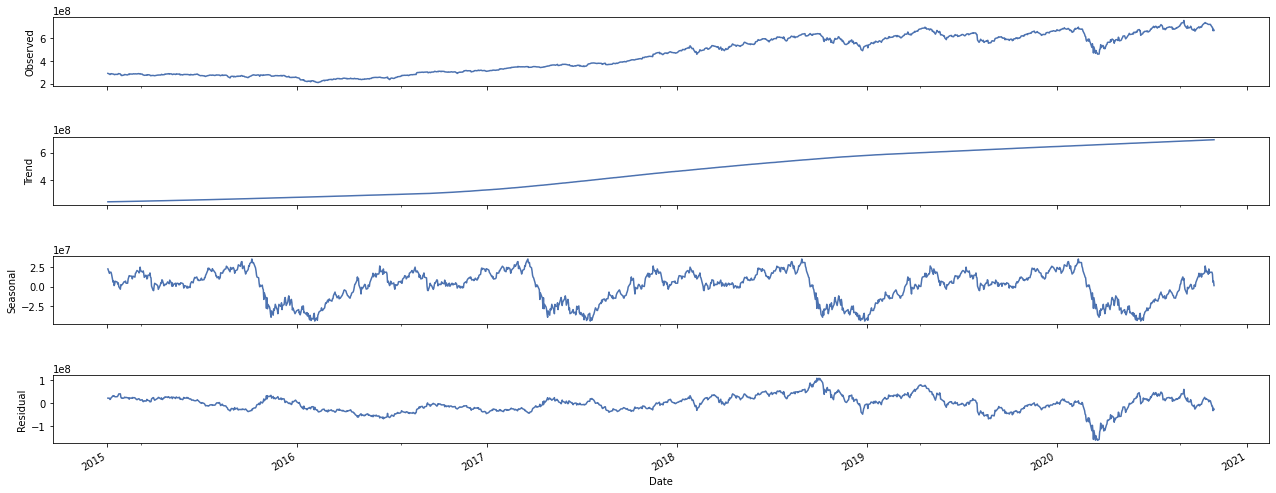

In [83]:
df = optimised_returns_df1
df_close = df[['Date', 'portfolio_value']].copy()
df_close = df_close.set_index('Date')
df_close.head()

decomp = decompose(df_close, period=365)
fig = decomp.plot()
fig.set_size_inches(20, 8)

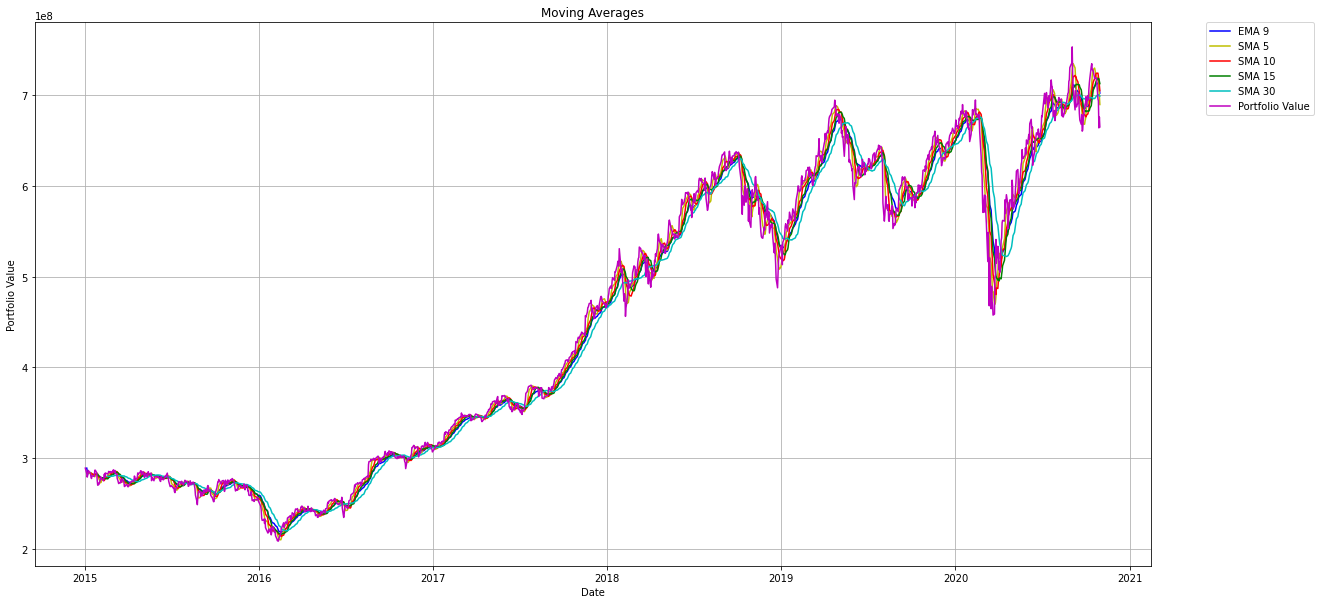

In [84]:
df['EMA_9'] = df['portfolio_value'].ewm(9).mean().shift()
df['SMA_5'] = df['portfolio_value'].rolling(5).mean().shift()
df['SMA_10'] = df['portfolio_value'].rolling(10).mean().shift()
df['SMA_15'] = df['portfolio_value'].rolling(15).mean().shift()
df['SMA_30'] = df['portfolio_value'].rolling(30).mean().shift()

plt.figure(figsize=(20,10))
plt.plot(df['Date'], df['EMA_9'], 'b-',label='EMA 9')
plt.plot(df['Date'], df['SMA_5'], 'y-',label='SMA 5')
plt.plot(df['Date'], df['SMA_10'], 'r-',label='SMA 10')
plt.plot(df['Date'], df['SMA_15'], 'g-',label='SMA 15')
plt.plot(df['Date'], df['SMA_30'], 'c-',label='SMA 30')
plt.plot(df['Date'], df['portfolio_value'], 'm-',label='Portfolio Value')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Moving Averages')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

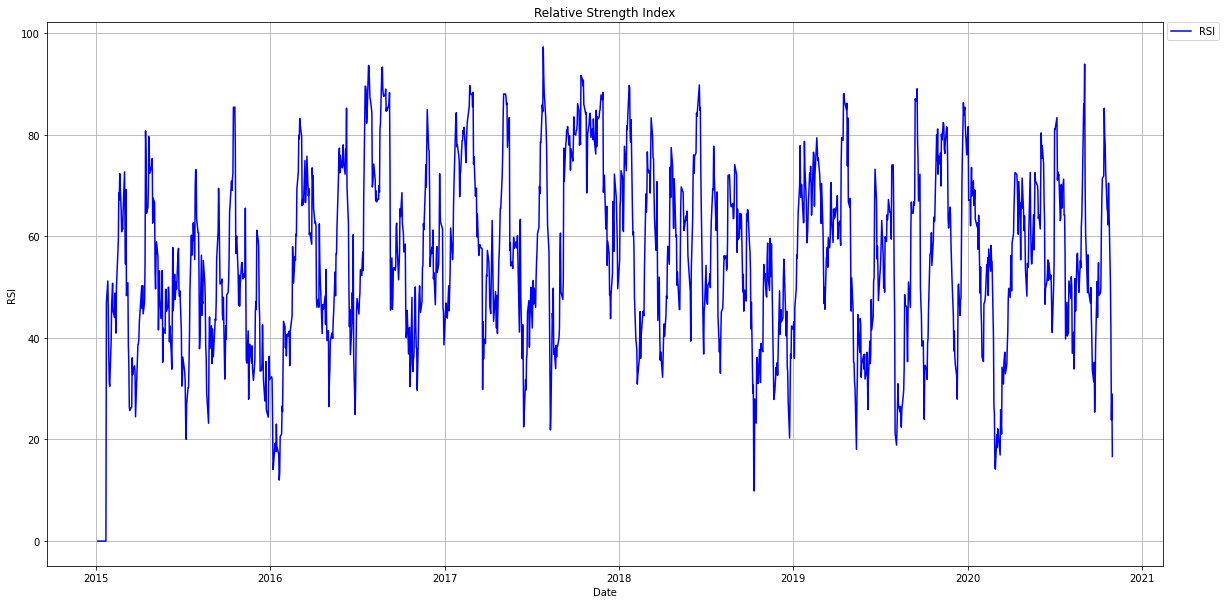

In [85]:
def relative_strength_idx(df, n=14):
    close = df['portfolio_value']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

df['RSI'] = relative_strength_idx(df).fillna(0)


plt.figure(figsize=(20,10))
plt.plot(df['Date'], df['RSI'], 'b-',label='RSI')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

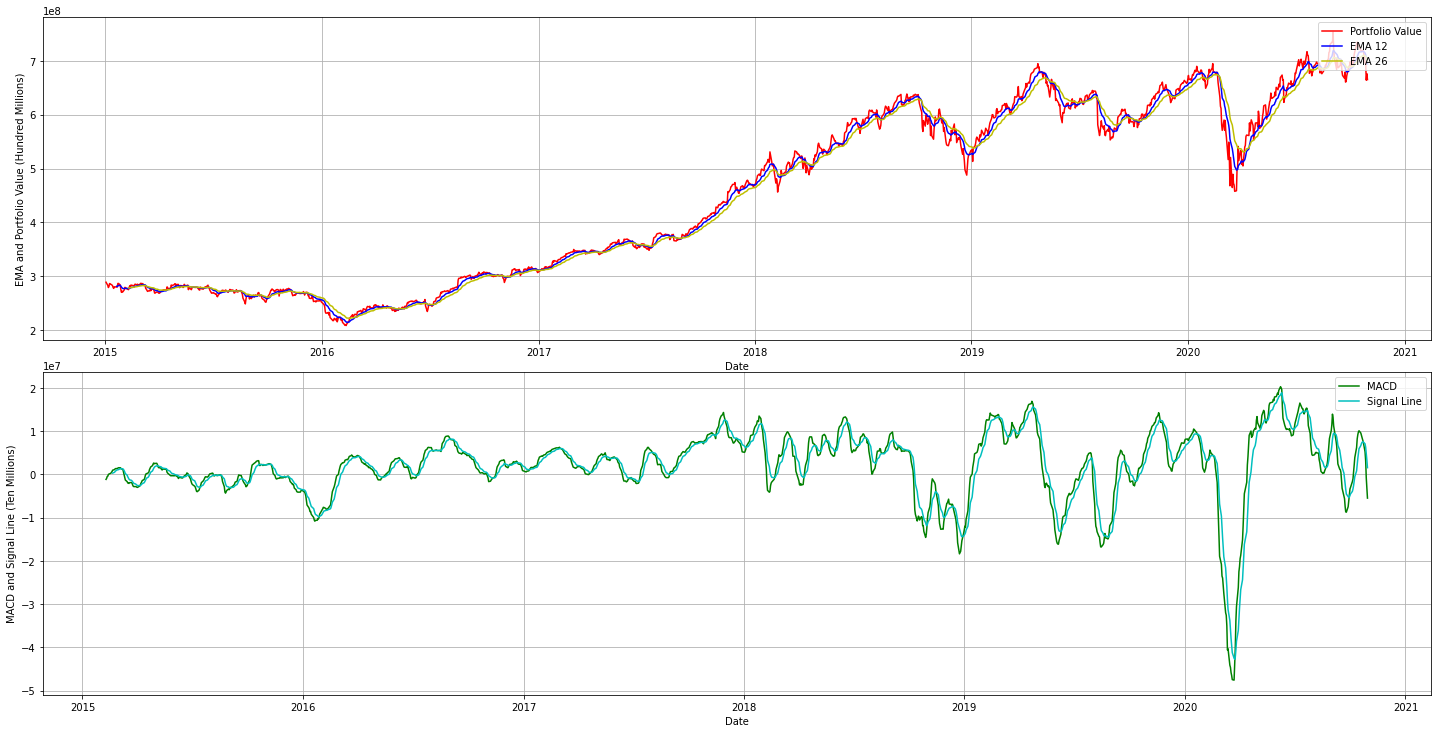

In [86]:
EMA_12 = pd.Series(df['portfolio_value'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(df['portfolio_value'].ewm(span=26, min_periods=26).mean())
df['MACD'] = pd.Series(EMA_12 - EMA_26)
df['MACD_signal'] = pd.Series(df.MACD.ewm(span=9, min_periods=9).mean())


fig, axs = plt.subplots(2, figsize=(20,10))
fig.tight_layout()
axs[0].plot(df['Date'], df['portfolio_value'], 'r-',label='Portfolio Value')
axs[0].plot(df['Date'], EMA_12, 'b-',label='EMA 12')
axs[0].plot(df['Date'], EMA_26, 'y-',label='EMA 26')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('EMA and Portfolio Value (Hundred Millions)')
axs[0].legend(loc="upper right")
axs[1].plot(df['Date'], df['MACD'], 'g-',label='MACD')
axs[1].plot(df['Date'], df['MACD_signal'], 'c-',label='Signal Line')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('MACD and Signal Line (Ten Millions)')
axs[1].legend(loc="upper right")
axs[0].grid(True)
axs[1].grid(True)

In [87]:
df['portfolio_value'] = df['portfolio_value'].shift(-1)

In [88]:
df = df.iloc[33:] # Because of moving averages and MACD line
df = df[:-1]      # Because of shifting portfolio value

df.index = range(len(df))
len(df)



1435

In [89]:
df.head()

Date     GOOGL      GOOG        FB      AMZN      CSCO       ACN  \
0 2015-02-20 -0.008510 -0.007221  0.006044  0.012296  0.010235  0.002437   
1 2015-02-23 -0.012551 -0.013062 -0.013267 -0.009175  0.000675  0.000884   
2 2015-02-24  0.006822  0.007859 -0.004947 -0.004077  0.000000  0.003091   
3 2015-02-25  0.016114  0.014513  0.014149  0.017909 -0.004725 -0.002751   
4 2015-02-26  0.021851  0.021347  0.010684 -0.001479  0.014242 -0.003311   

        GPN         V      INTC  ...  % Returns  labels         EMA_9  \
0  0.005422  0.014493  0.005846  ...   0.007045       1  2.801413e+08   
1 -0.005177  0.000037 -0.018890  ...  -0.004724       0  2.806862e+08   
2 -0.003361 -0.001978  0.019253  ...   0.004295       1  2.810352e+08   
3  0.002285  0.001982 -0.013368  ...  -0.002447       0  2.814725e+08   
4  0.007272  0.002710 -0.008837  ...  -0.001580       0  2.817929e+08   

          SMA_5        SMA_10        SMA_15        SMA_30        RSI  \
0  2.822625e+08  2.803051e+08  2.785983e+08  2.799841e+08  72.308508   
1  2.836026e+08  2.810317e+08  2.794721e+08  2.801245e+08  64.951504   
2  2.836802e+08  2.817628e+08  2.803587e+08  2.800429e+08  60.876004   
3  2.842040e+08  2.827724e+08  2.810338e+08  2.800226e+08  62.504951   
4  2.845780e+08  2.833226e+08  2.813741e+08  2.800488e+08  61.354068   

           MACD    MACD_signal  
0  9.809421e+05  308577.564598  
1  1.103433e+06  486671.407698  
2  1.278292e+06  659873.454453  
3  1.347664e+06  807581.922344  
4  1.352355e+06  922874.836731  

[5 rows x 29 columns]

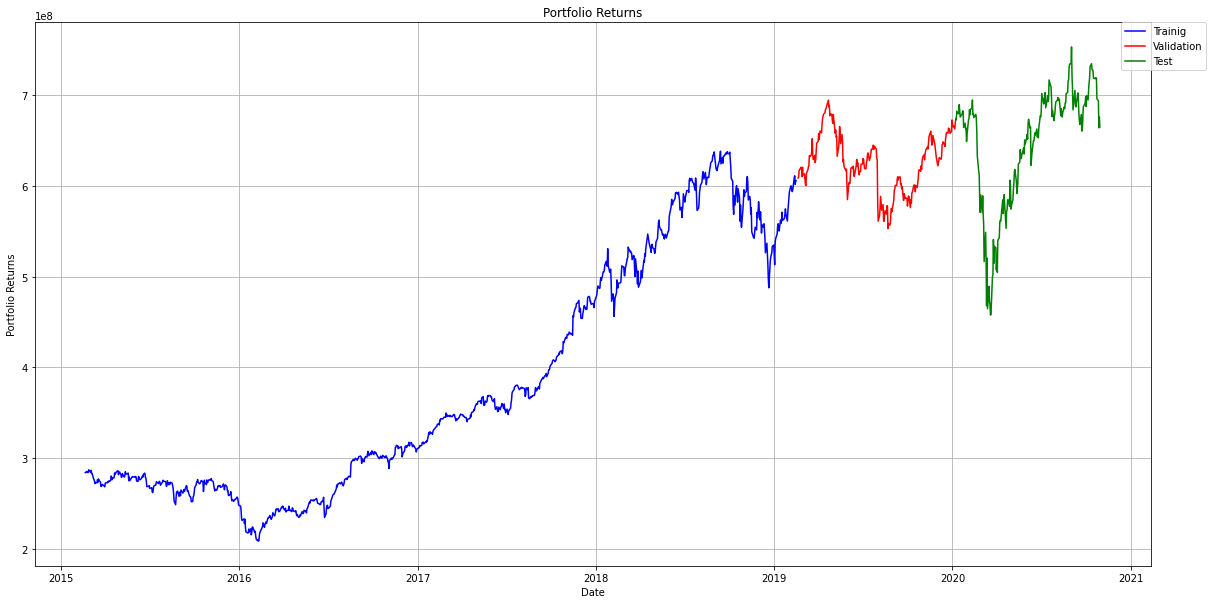

In [90]:
test_size  = 0.143
valid_size = 0.157

test_split_idx = int(df.shape[0] * (1-test_size))
valid_split_idx = int(df.shape[0] * (1-(valid_size+test_size)))

train_df = df.loc[:valid_split_idx].copy()
valid_df = df.loc[valid_split_idx+1:test_split_idx].copy()
test_df = df.loc[test_split_idx+1:].copy()

plt.figure(figsize=(20,10))
plt.plot(train_df['Date'], train_df['portfolio_value'], 'b-',label='Trainig')
plt.plot(valid_df['Date'], valid_df['portfolio_value'], 'r-',label='Validation')
plt.plot(test_df['Date'], test_df['portfolio_value'], 'g-',label='Test')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
plt.title('Portfolio Returns')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
locs, labels = plt.xticks()
plt.show()

In [91]:
y_train = train_df['portfolio_value'].copy()
X_train = train_df.drop(['Date','portfolio_value','labels','% Returns'], 1)

y_valid = valid_df['portfolio_value'].copy()
X_valid = valid_df.drop(['Date','portfolio_value','labels','% Returns'], 1)

y_test  = test_df['portfolio_value'].copy()
X_test  = test_df.drop(['Date','portfolio_value','labels','% Returns'], 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GOOGL        1005 non-null   float64
 1   GOOG         1005 non-null   float64
 2   FB           1005 non-null   float64
 3   AMZN         1005 non-null   float64
 4   CSCO         1005 non-null   float64
 5   ACN          1005 non-null   float64
 6   GPN          1005 non-null   float64
 7   V            1005 non-null   float64
 8   INTC         1005 non-null   float64
 9   KLAC         1005 non-null   float64
 10  MSFT         1005 non-null   float64
 11  SNPS         1005 non-null   float64
 12  VMW          1005 non-null   float64
 13  AAPL         1005 non-null   float64
 14  IAC          1005 non-null   float64
 15  HPQ          1005 non-null   float64
 16  NTAP         1005 non-null   float64
 17  EMA_9        1005 non-null   float64
 18  SMA_5        1005 non-null   float64
 19  SMA_10

In [92]:
%%time

parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

[19:31:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:31:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:31:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:31:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:31:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:31:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:32:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:32:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:32:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:32:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:32:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:32:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:32:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:32:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:32:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:32:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:32:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:32:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:33:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:33:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:33:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:33:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:33:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:33:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:33:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:33:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:33:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:33:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:33:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:33:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:34:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:34:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:34:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:34:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:34:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:34:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:34:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:34:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:34:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:34:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:34:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:34:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:35:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:35:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:35:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:35:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:35:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:35:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:35:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:35:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:35:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:35:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:35:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:35:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:35:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:35:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:35:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:36:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:36:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:36:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:36:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:36:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:36:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:36:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:36:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:36:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:36:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:36:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:36:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:36:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:36:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:36:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:36:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:36:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:36:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:37:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:37:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:37:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:37:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:37:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:37:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:37:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:37:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:37:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:37:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:37:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:37:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:38:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:38:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:38:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:38:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:38:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:38:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:38:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:39:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:39:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:39:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:39:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:39:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:39:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:39:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:39:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:39:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:39:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:39:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:39:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:39:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:39:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:39:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:40:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:40:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:40:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:40:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:40:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:40:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:40:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:40:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:40:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:40:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:40:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:40:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:41:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:41:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:41:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:41:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:41:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:41:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:41:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:41:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:41:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:41:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:41:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:41:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:41:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:41:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:41:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:41:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:41:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:41:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:41:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:41:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:41:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:42:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:42:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:42:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:42:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:42:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:42:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:42:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:42:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:42:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

[19:43:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:43:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:43:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameter

In [93]:
%%time

model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

CPU times: user 750 ms, sys: 7.14 ms, total: 757 ms
Wall time: 228 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

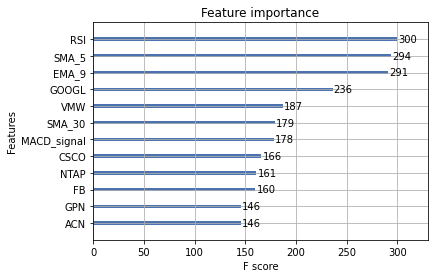

In [94]:
plot_importance(model, max_num_features=12)

In [95]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

y_true = [6.73182204e+08 6.82494723e+08 6.79600322e+08 6.80474721e+08
 6.89794457e+08]
y_pred = [6.1037651e+08 6.1154381e+08 6.0928723e+08 6.1120794e+08 6.0847277e+08]


In [96]:
print(f'Mean Squared Error = {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error = {mean_absolute_error(y_test, y_pred)}')

Mean Squared Error = 5077413846220090.0
Mean Absolute Error = 62394763.463219516


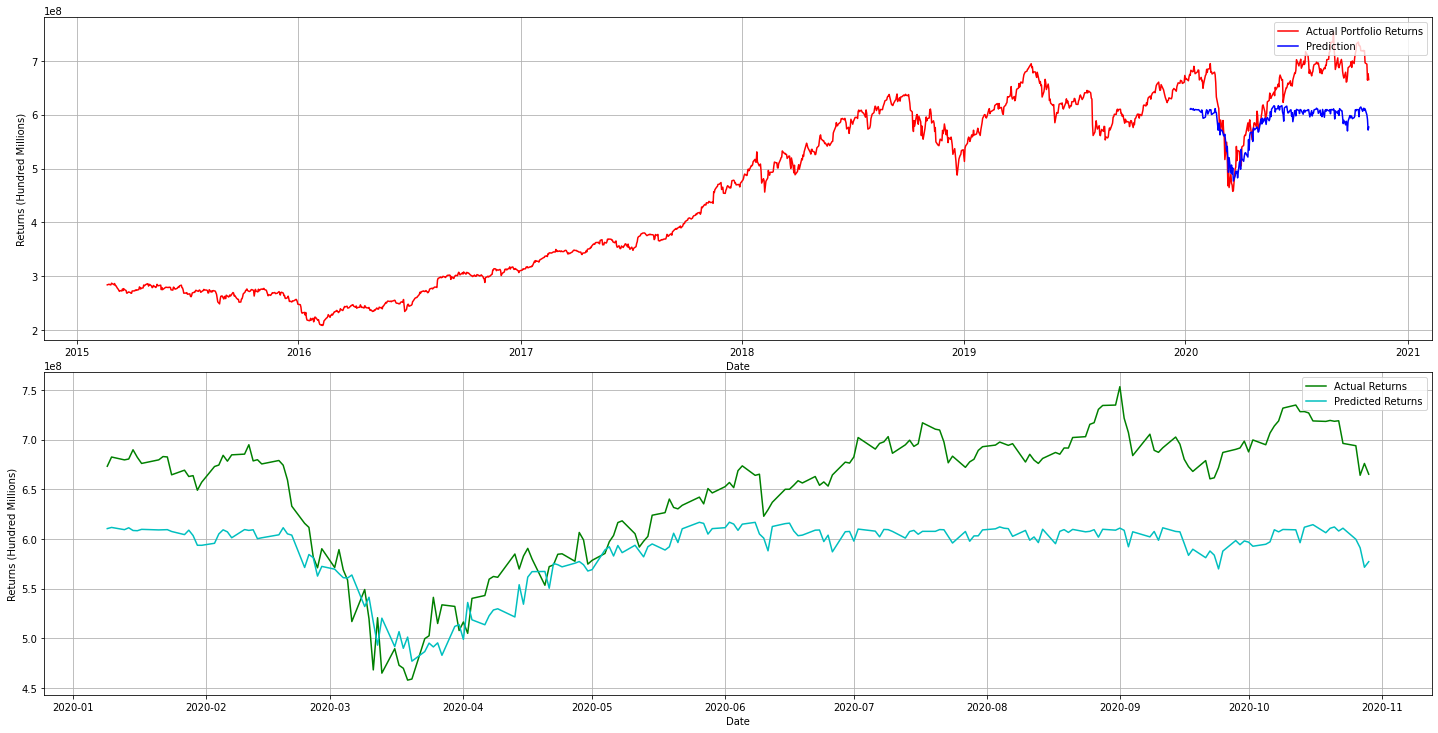

In [97]:
predicted_prices = df.loc[test_split_idx+1:].copy()
predicted_prices['portfolio_value'] = y_pred


fig, axs = plt.subplots(2, figsize=(20,10))
fig.tight_layout()
axs[0].plot(df['Date'], df['portfolio_value'], 'r-',label='Actual Portfolio Returns')
axs[0].plot(predicted_prices['Date'], predicted_prices['portfolio_value'], 'b-',label='Prediction')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Returns (Hundred Millions)')
axs[0].legend(loc="upper right")
axs[1].plot(predicted_prices['Date'], y_test, 'g-',label='Actual Returns')
axs[1].plot(predicted_prices['Date'], y_pred, 'c-',label='Predicted Returns')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Returns (Hundred Millions)')
axs[1].legend(loc="upper right")
axs[0].grid(True)
axs[1].grid(True)

In [98]:
test_size  = 0.147
valid_size = 0.153

test_split_idx = int(df.shape[0] * (1-test_size))
valid_split_idx = int(df.shape[0] * (1-(valid_size+test_size)))

train_df = df.loc[:valid_split_idx].copy()
valid_df = df.loc[valid_split_idx+1:test_split_idx].copy()
test_df = df.loc[test_split_idx+1:].copy()

y_train = train_df['labels'].copy()
X_train = train_df.drop(['Date','portfolio_value','labels','% Returns','EMA_9','SMA_5','SMA_10','SMA_15','SMA_30','RSI','MACD','MACD_signal'], 1)

y_valid = valid_df['labels'].copy()
X_valid = valid_df.drop(['Date','portfolio_value','labels','% Returns','EMA_9','SMA_5','SMA_10','SMA_15','SMA_30','RSI','MACD','MACD_signal'], 1)

y_test  = test_df['labels'].copy()
X_test  = test_df.drop(['Date','portfolio_value','labels','% Returns','EMA_9','SMA_5','SMA_10','SMA_15','SMA_30', 'RSI','MACD','MACD_signal'], 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOGL   1005 non-null   float64
 1   GOOG    1005 non-null   float64
 2   FB      1005 non-null   float64
 3   AMZN    1005 non-null   float64
 4   CSCO    1005 non-null   float64
 5   ACN     1005 non-null   float64
 6   GPN     1005 non-null   float64
 7   V       1005 non-null   float64
 8   INTC    1005 non-null   float64
 9   KLAC    1005 non-null   float64
 10  MSFT    1005 non-null   float64
 11  SNPS    1005 non-null   float64
 12  VMW     1005 non-null   float64
 13  AAPL    1005 non-null   float64
 14  IAC     1005 non-null   float64
 15  HPQ     1005 non-null   float64
 16  NTAP    1005 non-null   float64
dtypes: float64(17)
memory usage: 133.6 KB


In [99]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    
    'objective': 'binary:logistic',  # error evaluation for multiclass training
    
    }  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

#------------- numpy array ------------------
# training and testing - numpy matrices
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

# extracting most confident predictions
best_preds = preds > 0.5 #have to set threshold for binary classification
print ("Numpy array precision:", precision_score(y_test, best_preds))
print ("Numpy array f1 score:", f1_score(y_test, best_preds))

Numpy array precision: 0.9727272727272728
Numpy array f1 score: 0.9264069264069266


In [100]:
preds

array([0.99513227, 0.00407496, 0.9555652 , 0.3188782 , 0.99469453,
       0.9906508 , 0.04566937, 0.9953176 , 0.04427253, 0.7581271 ,
       0.9954834 , 0.04182724, 0.09267984, 0.61978555, 0.9865704 ,
       0.04521406, 0.00274442, 0.5121282 , 0.00856795, 0.7232351 ,
       0.00878411, 0.99533576, 0.99206173, 0.83031297, 0.9948723 ,
       0.00657816, 0.98527443, 0.91919255, 0.9944739 , 0.00916992,
       0.08520078, 0.0086014 , 0.97566855, 0.19196285, 0.00324912,
       0.00274442, 0.00445484, 0.03716133, 0.00274442, 0.32218757,
       0.9954834 , 0.00274442, 0.9954834 , 0.00274442, 0.00937935,
       0.00274442, 0.9954834 , 0.00274442, 0.00274442, 0.9900477 ,
       0.00274442, 0.9928322 , 0.04257736, 0.24260727, 0.03431418,
       0.2685683 , 0.9954834 , 0.22711478, 0.9954834 , 0.00274442,
       0.9954834 , 0.34706718, 0.00274442, 0.99393   , 0.0034164 ,
       0.9954834 , 0.8158946 , 0.9954834 , 0.9029083 , 0.11596197,
       0.9954834 , 0.00555507, 0.9937349 , 0.9821139 , 0.00565

In [101]:
print(confusion_matrix(y_test,best_preds))
tn, fp, fn, tp = confusion_matrix(y_test,best_preds).ravel()
(tn, fp, fn, tp)

[[ 86   3]
 [ 14 107]]


(86, 3, 14, 107)

In [102]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, best_preds)

0.9252948277463089

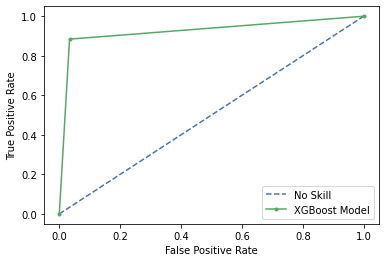

In [103]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
fpr, tpr, _ = roc_curve(y_test, best_preds)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='XGBoost Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

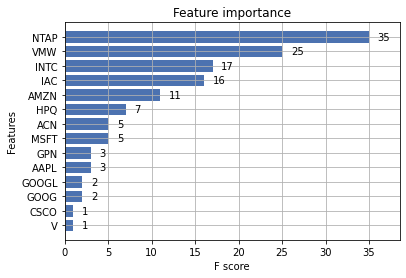

In [104]:
xgb.plot_importance(bst, height=0.8)
plt.show()

<AxesSubplot:>

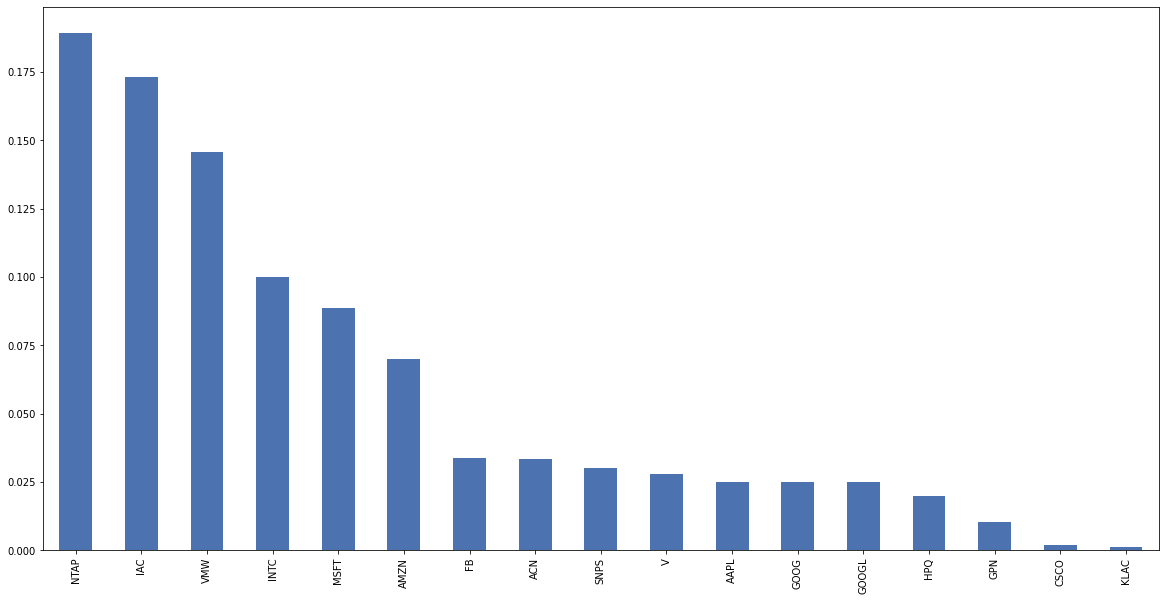

In [105]:
w3b_df.iloc[0].sort_values(ascending = False).plot.bar(figsize = (20,10))

## Add ACN stock to FB, SNPS stock to MSFT, GPN to INTC, CSCO, HPQ,  KLAC TO V, GOOGL TO GOOG, V to AMZN

<AxesSubplot:>

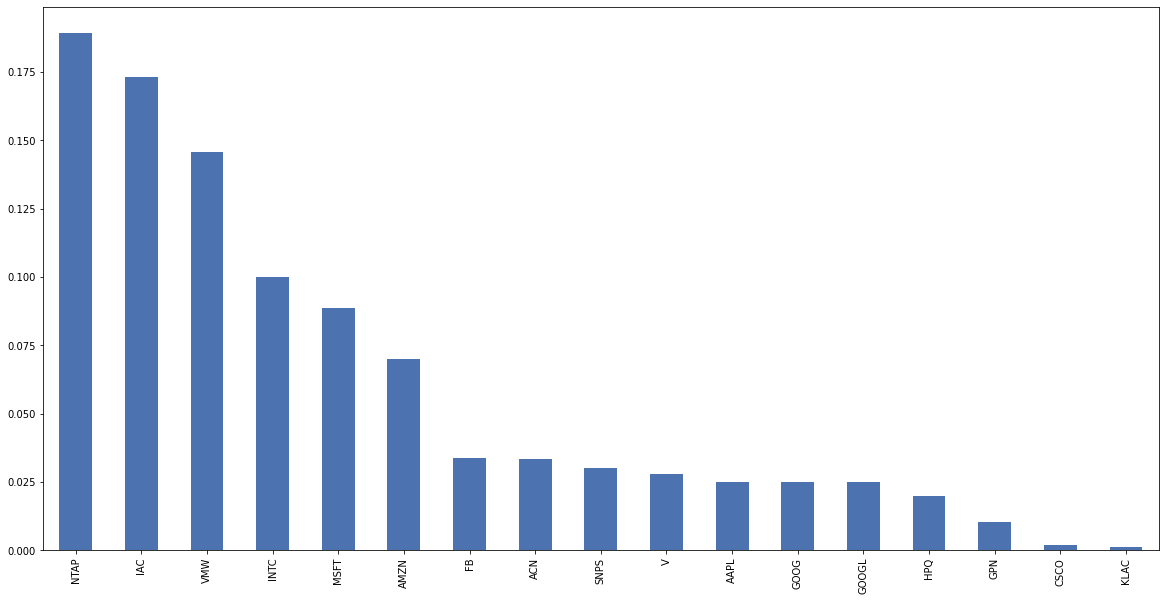

In [106]:
w3b_df.iloc[0].sort_values(ascending = False).plot.bar(figsize = (20,10))

In [107]:
optimised_returns_df1 = get_data_for_multiple_stocks(optimised_tickers, start_date="2020-10-01", end_date="2020-11-01")
optimised_returns_df1.reset_index(inplace=True)
optimised_returns_df1['Date'] = pd.to_datetime(optimised_returns_df1['Date'], infer_datetime_format=True)
optimised_returns_df1

Date     GOOGL      GOOG        FB      AMZN      CSCO       ACN  \
0  2020-10-01  0.015216  0.013943  0.018060  0.023035 -0.005893 -0.003584   
1  2020-10-02 -0.021708 -0.021254 -0.025091 -0.029883 -0.013660 -0.012346   
2  2020-10-05  0.018707  0.018925  0.018120  0.023744  0.007839  0.004901   
3  2020-10-06 -0.021452 -0.021924 -0.022634 -0.031020  0.000000 -0.014050   
4  2020-10-07  0.005596  0.004713 -0.002088  0.030881  0.021519  0.014069   
5  2020-10-08  0.016647  0.017558  0.021850 -0.001608  0.009898  0.009667   
6  2020-10-09  0.018214  0.019712  0.002616  0.030120  0.001508  0.017621   
7  2020-10-12  0.035844  0.035592  0.042730  0.047550  0.012798  0.008308   
8  2020-10-13  0.001585  0.001612  0.001414  0.000203 -0.013627 -0.005247   
9  2020-10-14 -0.002316 -0.002291 -0.015644 -0.023208  0.002009  0.000218   
10 2020-10-15 -0.005098 -0.005708 -0.018762 -0.007450  0.002006 -0.002877   
11 2020-10-16  0.007863  0.008902 -0.002962 -0.019750  0.004754  0.005595   
12 2020-10-19 -0.024080 -0.024412 -0.017035 -0.020014 -0.021414 -0.016562   
13 2020-10-20  0.013811  0.013893  0.023565  0.003056 -0.002544  0.018343   
14 2020-10-21  0.022507  0.024024  0.041748 -0.009969 -0.003571  0.011763   
15 2020-10-22  0.013033  0.013820 -0.002189 -0.002681 -0.006144 -0.021278   
16 2020-10-23  0.016382  0.015892  0.023983  0.008815  0.000000  0.006838   
17 2020-10-26 -0.029817 -0.030804 -0.026967  0.000824 -0.029624 -0.045581   
18 2020-10-27  0.009209  0.008683  0.022302  0.024724 -0.021237  0.006523   
19 2020-10-28 -0.055089 -0.054630 -0.055138 -0.037595 -0.031462 -0.030454   
20 2020-10-29  0.030500  0.033377  0.049165  0.015249 -0.000560  0.011686   
21 2020-10-30  0.038044  0.034309 -0.063099 -0.054456  0.005884  0.002172   

         GPN         V      INTC      KLAC      MSFT      SNPS       VMW  \
0   0.009348  0.016903  0.008884  0.027047  0.010127  0.014534  0.007169   
1  -0.004519 -0.009294 -0.023545 -0.035280 -0.029511 -0.023216 -0.012094   
2  -0.010704  0.010324  0.013331  0.041623  0.020321  0.021646  0.014760   
3  -0.009064 -0.015181 -0.006191 -0.000600 -0.021247 -0.010617  0.013374   
4   0.010805  0.010077  0.025307  0.015363  0.019037  0.024214  0.005102   
5   0.026808  0.002519  0.013290  0.018679  0.003574 -0.002278  0.016920   
6   0.012283  0.018031 -0.010305  0.021046  0.024836  0.017304  0.008186   
7  -0.003482 -0.001162  0.020068  0.016632  0.025902  0.027421  0.004885   
8  -0.016982 -0.010077 -0.000928  0.025122  0.006594 -0.003276  0.018526   
9  -0.015775 -0.010376 -0.005202 -0.017914 -0.008974 -0.006004  0.003999   
10 -0.006603 -0.013106  0.005602 -0.013472 -0.005433  0.005379 -0.015932   
11  0.005908  0.003558  0.005757 -0.022009  0.000000 -0.006797 -0.003721   
12 -0.028747 -0.016429  0.007755 -0.007630 -0.024766 -0.009316 -0.017627   
13  0.013549  0.003706 -0.021070 -0.005271  0.002007  0.009048 -0.002401   
14 -0.001721  0.003692  0.001310  0.002819  0.000699  0.004638  0.000869   
15  0.011034 -0.002217  0.007477 -0.014493  0.000419 -0.010024 -0.013161   
16  0.006082  0.000101 -0.105751 -0.000689  0.006236  0.006973  0.010019   
17 -0.046274 -0.024948 -0.030705 -0.020820 -0.028442 -0.026947 -0.044102   
18 -0.023934 -0.015590 -0.023117 -0.001759  0.015089  0.010334 -0.024681   
19 -0.034353 -0.048353 -0.030456 -0.040485 -0.049566 -0.022834 -0.066211   
20 -0.018416  0.022115 -0.003164  0.059827  0.010065  0.007529 -0.001001   
21  0.010053 -0.017093  0.003854 -0.023620 -0.010991 -0.025517 -0.007938   

        AAPL       IAC       HPQ      NTAP  
0   0.008462  0.041743  0.000527 -0.021670  
1  -0.032280 -0.010258  0.004737 -0.003031  
2   0.030791  0.025425  0.011524  0.013798  
3  -0.028669 -0.001342 -0.018125  0.000231  
4   0.016967  0.012572  0.014241  0.028367  
5  -0.000956 -0.030845  0.008840  0.048742  
6   0.017396  0.007896 -0.001546 -0.008431  
7   0.063521  0.001839  0.023748  0.017005  
8  -0.026527  0.008778 -0.007564  0.004930  
9   0.000743 -0.027211 -0.009146 -0.00

In [108]:
optimised_returns_df1['portfolio_value'] = optimised_returns_df['portfolio_value']
optimised_returns_df1.tail()

Date     GOOGL      GOOG        FB      AMZN      CSCO       ACN  \
17 2020-10-26 -0.029817 -0.030804 -0.026967  0.000824 -0.029624 -0.045581   
18 2020-10-27  0.009209  0.008683  0.022302  0.024724 -0.021237  0.006523   
19 2020-10-28 -0.055089 -0.054630 -0.055138 -0.037595 -0.031462 -0.030454   
20 2020-10-29  0.030500  0.033377  0.049165  0.015249 -0.000560  0.011686   
21 2020-10-30  0.038044  0.034309 -0.063099 -0.054456  0.005884  0.002172   

         GPN         V      INTC      KLAC      MSFT      SNPS       VMW  \
17 -0.046274 -0.024948 -0.030705 -0.020820 -0.028442 -0.026947 -0.044102   
18 -0.023934 -0.015590 -0.023117 -0.001759  0.015089  0.010334 -0.024681   
19 -0.034353 -0.048353 -0.030456 -0.040485 -0.049566 -0.022834 -0.066211   
20 -0.018416  0.022115 -0.003164  0.059827  0.010065  0.007529 -0.001001   
21  0.010053 -0.017093  0.003854 -0.023620 -0.010991 -0.025517 -0.007938   

        AAPL       IAC       HPQ      NTAP  portfolio_value  
17  0.000087 -0.027376 -0.045502 -0.041800     2.702374e+08  
18  0.013472  0.013517 -0.014795 -0.019586     2.723315e+08  
19 -0.046312 -0.032164 -0.035039 -0.039955     2.707909e+08  
20  0.037050  0.016049  0.024784  0.043036     2.751832e+08  
21 -0.056018 -0.036937  0.010124 -0.004988     2.795058e+08

In [109]:
optimised_returns_df1['% Returns'] = optimised_returns_df1['portfolio_value'].pct_change()[1:]
optimised_returns_df1['% Returns'] = optimised_returns_df1['% Returns'].fillna(0)
labels = []
for row in optimised_returns_df1['% Returns']:
    if row > 0:
        labels.append(1)
    else:
        labels.append(0)
        
optimised_returns_df1['labels'] = labels
optimised_returns_df1.tail()

Date     GOOGL      GOOG        FB      AMZN      CSCO       ACN  \
17 2020-10-26 -0.029817 -0.030804 -0.026967  0.000824 -0.029624 -0.045581   
18 2020-10-27  0.009209  0.008683  0.022302  0.024724 -0.021237  0.006523   
19 2020-10-28 -0.055089 -0.054630 -0.055138 -0.037595 -0.031462 -0.030454   
20 2020-10-29  0.030500  0.033377  0.049165  0.015249 -0.000560  0.011686   
21 2020-10-30  0.038044  0.034309 -0.063099 -0.054456  0.005884  0.002172   

         GPN         V      INTC  ...      MSFT      SNPS       VMW      AAPL  \
17 -0.046274 -0.024948 -0.030705  ... -0.028442 -0.026947 -0.044102  0.000087   
18 -0.023934 -0.015590 -0.023117  ...  0.015089  0.010334 -0.024681  0.013472   
19 -0.034353 -0.048353 -0.030456  ... -0.049566 -0.022834 -0.066211 -0.046312   
20 -0.018416  0.022115 -0.003164  ...  0.010065  0.007529 -0.001001  0.037050   
21  0.010053 -0.017093  0.003854  ... -0.010991 -0.025517 -0.007938 -0.056018   

         IAC       HPQ      NTAP  portfolio_value  % Returns  labels  
17 -0.027376 -0.045502 -0.041800     2.702374e+08  -0.019267       0  
18  0.013517 -0.014795 -0.019586     2.723315e+08   0.007749       1  
19 -0.032164 -0.035039 -0.039955     2.707909e+08  -0.005657       0  
20  0.016049  0.024784  0.043036     2.751832e+08   0.016220       1  
21 -0.036937  0.010124 -0.004988     2.795058e+08   0.015708       1  

[5 rows x 21 columns]

<AxesSubplot:>

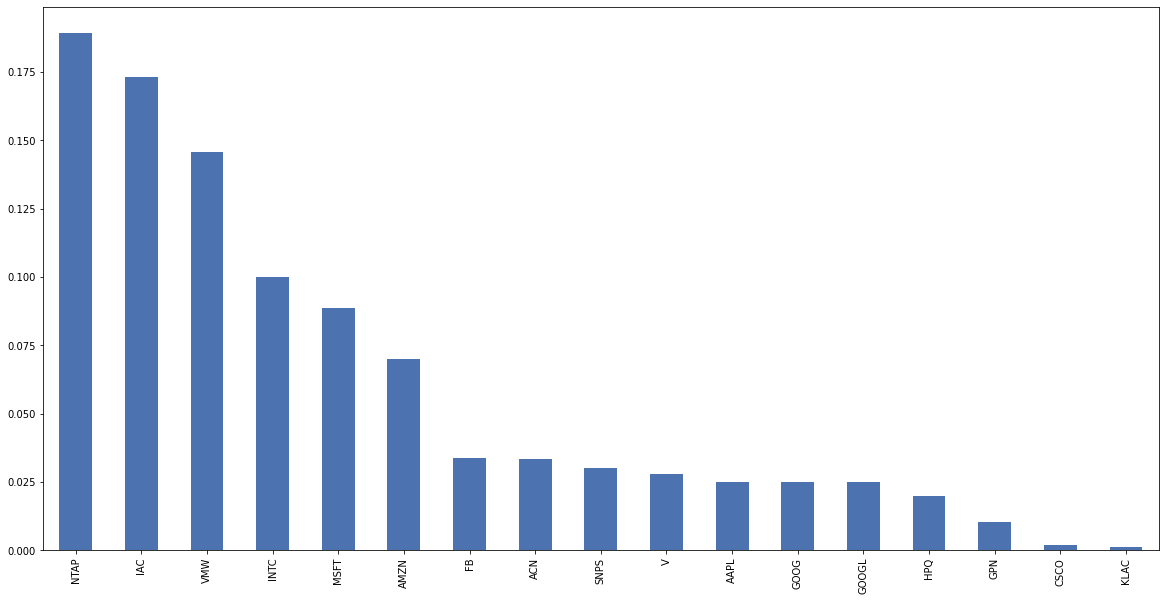

In [110]:
w3b_df.iloc[0].sort_values(ascending = False).plot.bar(figsize = (20,10))